# 09/01/2023

In [1]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

from nnn.uv import *

In [2]:
# copy pasted from command center for convenience
# only one peak found by AnalyzePeaks
hplc_clean_seqid = ["WC68_stem_3p", "WC68_stem_5p", "WC1025_split_5p", \
"WC1025_split_3p", "WC1375_stem_5p", "WC1375_stem_3p", "DMM004_5p", \
"DMM004_3p", "DMM005_5p", "DMM005_3p", "DMM006_5p", "DMM007_5p", \
"DMM007_3p", "BC0", "BC1", "BC6", "BC7", "BC8", "BC9", "BC10", \
"BC11", "MMCNNN2328", "MMCNNN2331", "MMCNNN2334", "MMCNNN2335", \
"MMCNNN2336", "MMCNNN2337", "MMTM1325", "MMTM176", "MMTM178", \
"MMTM179", "MMTM181", "MMTM185", "MMTM189", "MMTM1917", "MMTM29", \
"MMTM397", "MMTM509", "MMTM877", "DMM003_3p_rc", "DMM004_3p_rc", \
"DMM005_3p_rc", "DMM006_3p_rc", "DMM007_3p_rc", "TETNN1003", \
"TETNN999", "TETNN963", "TETNN979", "TETNNN1696", "TETNNN2082", \
"TETNNN1570", "HP002", "HP003", "HP004", "HP005", "HP007", "HP008", \
"HP010", "HP011", "HP012", "HP014", "HP015", "HP016", "HP017", \
"HP018", "HP019", "HP021", "HP022", "HP023", "HP024"]

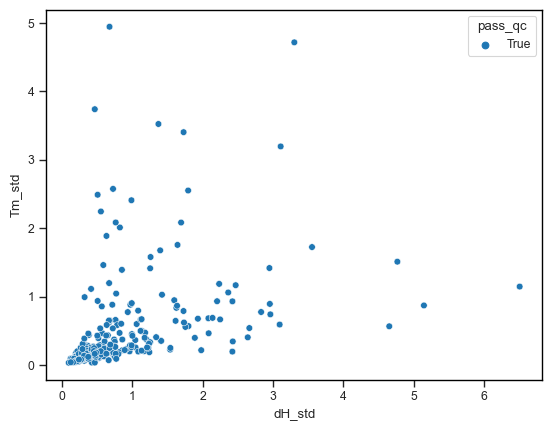

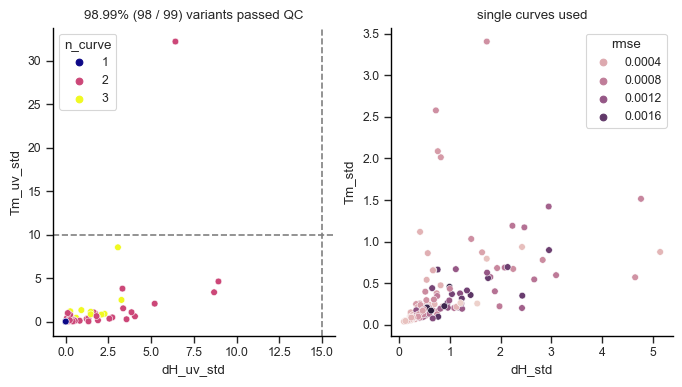

In [21]:
sample_sheet_file = './data/uv_melt/ECLTables/ECLSampleSheet230502.csv'
datadir="./data/uv_melt/ECLExportAuto"
result_file='./data/uv_melt/uvmelt_230502_2.csv'
agg_result_file='./data/uv_melt/uvmelt_agg_230901.csv'

result_df = pd.read_csv(result_file, index_col=0)
result_agg_df = agg_fit_result(uvmelt_result_file=result_file,
                               agg_result_file=agg_result_file,
                               single_curve_qc_criteria='rmse < 0.002 & dH_std < 10 & Tm_std < 5 & dH < 0 & dH > -100 & Tm > 0 & Tm < 120',
                               Tm_std_thresh=10, dH_std_thresh=15,
                               sample_sheet_file=sample_sheet_file, 
                               clean=True, only_use_cooling=True)

# result_agg_df = result_agg_df[result_agg_df.SEQID.isin(hplc_clean_seqid)]

arr = pd.read_csv('./data/models/raw/arr_v0_n=30680.csv', index_col=0)
vf = result_agg_df.query('is_hairpin & Na_mM == 25').sort_values(by=['conc_uM', 'n_curve', 'curve_date']).drop_duplicates(keep='last').merge(arr, how='left', on='SEQID')

In [22]:
vf.query('Series == "TETRAloop"')

,SEQID,curve_date,curve_num,dH_uv,dH_uv_std,n_curve,Tm_uv,Tm_uv_std,dG_37_uv,dG_37_uv_std,...,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK,dG_37_ensemble_150mM_NUPACK,dG_37_ensemble_75mM_NUPACK,GC,Tm_NUPACK_salt_corrected,dG_37_NUPACK_salt_corrected,dH_NUPACK_salt_corrected,dS_NUPACK_salt_corrected
16,TETNN1015,23021507,1,-29.562349,0.000000,1,38.461181,0.000000,-0.138621,0.000000,...,-4.163524,((((....)))),-4.05,-3.465498,-3.183308,91.666667,73.387648,-3.475614,-33.1,-0.093664
17,TETNN975,23021507,4,-48.349492,0.000000,1,37.302019,0.000000,-0.047036,0.000000,...,-4.155647,((((....)))),-4.05,-3.452252,-3.169357,91.666667,73.387648,-3.475614,-33.1,-0.093664
18,TETNNN1847,23021619,3,-28.837501,0.000000,1,42.169901,0.000000,-0.472812,0.000000,...,-3.765972,((((((....)))))),-3.46,-2.906052,-2.525961,50.000000,53.458982,-2.146765,-42.6,-0.126197
19,TETNNN1848,23021619,1,-21.186329,0.000000,1,46.257751,0.000000,-0.614067,0.000000,...,-4.436789,((((((....)))))),-4.16,-3.561343,-3.171318,50.000000,58.886898,-2.834434,-43.0,-0.125230
20,TETNNN615,23021619,2,-34.817570,0.000000,1,37.320681,0.000000,-0.035963,0.000000,...,-3.915848,((((((....)))))),-3.61,-3.059909,-2.681449,50.000000,53.488442,-2.241276,-44.4,-0.131517
21,TETNNN621,23021619,5,-25.905671,0.000000,1,41.268529,0.000000,-0.351694,0.000000,...,-3.914762,((((((....)))))),-3.61,-3.052501,-2.670119,50.000000,52.518474,-2.191952,-46.0,-0.136676
22,TETNNN707,23021619,4,-24.963212,0.000000,1,42.537764,0.000000,-0.437902,0.000000,...,-4.008500,((((((....)))))),-3.71,-3.142388,-2.757800,50.000000,53.754691,-2.316614,-45.2,-0.133774
23,TETNNN1696,23021722,6,-25.233867,0.000000,1,44.488611,0.000000,-0.594911,0.000000,...,-4.000516,((((((....)))))),-3.71,-3.131158,-2.745105,50.000000,55.418960,-2.393682,-42.7,-0.125713
24,TETNNN2253,23021722,3,-32.635698,0.000000,1,39.492385,0.000000,-0.260172,0.000000,...,-4.282492,((((((....)))))),-3.95,-3.426296,-3.044862,50.000000,55.527326,-2.553531,-45.3,-0.133323
25,TETNNN757,23021722,2,-30.827404,0.000000,1,41.115577,0.000000,-0.403711,0.000000,...,-3.822023,((((((....)))))),-3.51,-2.961271,-2.579639,50.000000,53.212881,-2.165938,-43.6,-0.129260


In [23]:
test_df = result_df.query('curve_date == 22110802 & curve_num == 3')
test_df

,curve_date,curve_num,curve_name,dH,dH_std,Tm,Tm_std,fmax,fmax_std,fmin,...,celsius_max,data_file,blank,pass_qc,SEQID,conc_uM,Na_mM,Cuvette,dG_37,dS
22110802_3_SecondaryCoolingCurve,22110802,3,SecondaryCoolingCurve,-45.132363,0.771430,41.072769,0.095283,0.267021,0.005539,0.004690,...,75.0,/Users/yuxi/workspace/nnn_analysis/data/uv_mel...,NaN,True,TETNNN1262,9.0,25.0,ECL micro cuvette,-0.584979,-0.143632
22110802_3_CoolingCurve,22110802,3,CoolingCurve,-46.872421,0.664720,40.643825,0.075176,0.244224,0.003876,0.004179,...,75.0,/Users/yuxi/workspace/nnn_analysis/data/uv_mel...,NaN,True,TETNNN1262,9.0,25.0,ECL micro cuvette,-0.544290,-0.149373
22110802_3_MeltingCurve,22110802,3,MeltingCurve,-51.560828,0.425422,41.348980,0.040505,0.135016,0.002251,0.009507,...,75.0,/Users/yuxi/workspace/nnn_analysis/data/uv_mel...,NaN,True,TETNNN1262,9.0,25.0,ECL micro cuvette,-0.712998,-0.163946
22110802_3_SecondaryMeltingCurve,22110802,3,SecondaryMeltingCurve,-54.609370,0.467209,42.347007,0.040154,0.134388,0.002246,0.005842,...,75.0,/Users/yuxi/workspace/nnn_analysis/data/uv_mel...,NaN,True,TETNNN1262,9.0,25.0,ECL micro cuvette,-0.925513,-0.173090


In [16]:
test_df['isCooling'] = result_df.curve_name.apply(lambda x: 'Cooling' in x)
# test_df.query('isCooling')

In [18]:
test_df.query('isCooling')

,curve_date,curve_num,curve_name,dH,dH_std,Tm,Tm_std,fmax,fmax_std,fmin,...,data_file,blank,pass_qc,SEQID,conc_uM,Na_mM,Cuvette,dG_37,dS,isCooling
22110802_3_SecondaryCoolingCurve,22110802,3,SecondaryCoolingCurve,-45.132363,0.77143,41.072769,0.095283,0.267021,0.005539,0.004690,...,/Users/yuxi/workspace/nnn_analysis/data/uv_mel...,NaN,True,TETNNN1262,9.0,25.0,ECL micro cuvette,-0.584979,-0.143632,True
22110802_3_CoolingCurve,22110802,3,CoolingCurve,-46.872421,0.66472,40.643825,0.075176,0.244224,0.003876,0.004179,...,/Users/yuxi/workspace/nnn_analysis/data/uv_mel...,NaN,True,TETNNN1262,9.0,25.0,ECL micro cuvette,-0.544290,-0.149373,True


# 09/19/2023

In [1]:
from scipy.cluster.hierarchy import ward, fcluster, dendrogram
from scipy.spatial.distance import pdist

In [ ]:
Z = ward(pdist())

#### A version from previously filtered, potentially with melt curve too 

In [214]:
uv_df = pd.read_csv('./data/models/processed/uv_hairpin_arr_salt_hplc_filtered.csv', index_col=0)
uv_df.TargetStruct = uv_df.TargetStruct.fillna('('*6+'....'+')'*6)

uv_df = uv_df[['dG_37_uv', 'Tm_uv', 'dH_uv', 'sequence', 'TargetStruct']]
val_df = uv_df.rename(columns=lambda x: x.replace('_uv', '')).rename(columns=dict(sequence='RefSeq'))
val_df = val_df.loc[[x for x in val_df.index if x.startswith('HP')]]

In [215]:
val_df_2 = val_df.copy()

In [216]:
val_df = pd.concat((val_df_1, val_df_2)).drop_duplicates()

CPU times: user 1.23 s, sys: 46.1 ms, total: 1.27 s
Wall time: 1.05 s


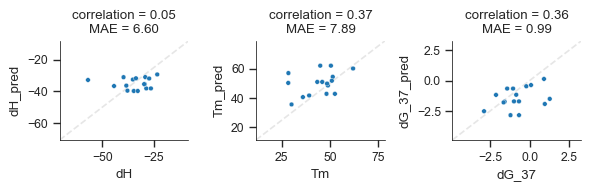

In [218]:
%%time
val_result_df = modeling.make_model_validation_df(val_df, 
                                  model='nupack', model_param_file='./models/dna-nnn-1step.json',)

modeling.plot_validation_result_all_params(val_result_df)

CPU times: user 1.06 s, sys: 49.2 ms, total: 1.11 s
Wall time: 889 ms


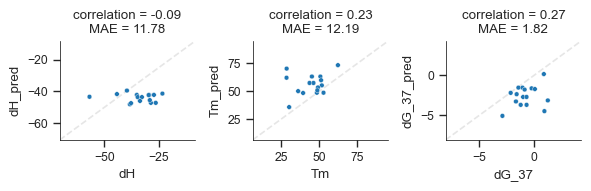

In [219]:
%%time
val_result_df = modeling.make_model_validation_df(val_df, 
                                  model='nupack', model_param_file='./models/dna04.json',)

modeling.plot_validation_result_all_params(val_result_df)

# Passive aggressive

In [225]:
from sklearn.linear_model import PassiveAggressiveRegressor

(27732, 1399)
CPU times: user 23.2 s, sys: 386 ms, total: 23.6 s
Wall time: 23.7 s


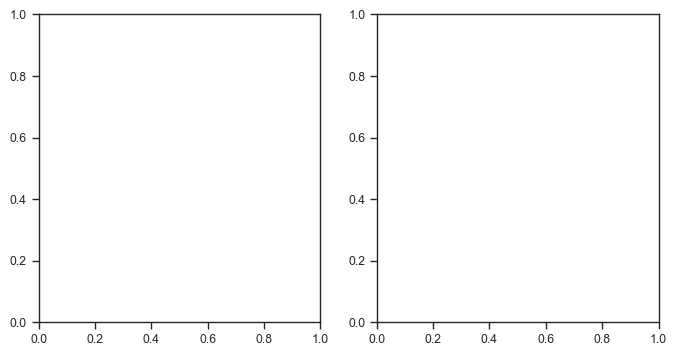

In [228]:
%%time
# with one single nupack-style hairpin mismatch parameter (.+.)
# no closing loop base pair param (as it's linearly dependent on the hairpin mismatch parameter)

feats = mf.get_feature_count_matrix(arr_1M, feature_method='get_feature_list', 
                                    fit_intercept=False, symmetry=False, sep_base_stack=True, hairpin_mm=True, ignore_base_stack=False)
print(feats.shape)

lr_dict = dict(dH=None, dG=None)
fig, ax = plt.subplots(1, 2, figsize=(8,4))
# lr_dict['dH'] = mf.fit_param(arr_1M, data_split_dict, param='dH', feats=feats, ax=ax[0])
lr_dict['dG'] = mf.fit_param(arr_1M, data_split_dict, param='dG_37', feats=feats, method='passive_aggressive', ax=ax[1])

In [235]:
preds = lr_dict['dG'].predict(feats)

In [236]:
preds.shape, arr_1M.shape

((27732,), (27732, 12))

In [238]:
arr_1M['pred'] = preds

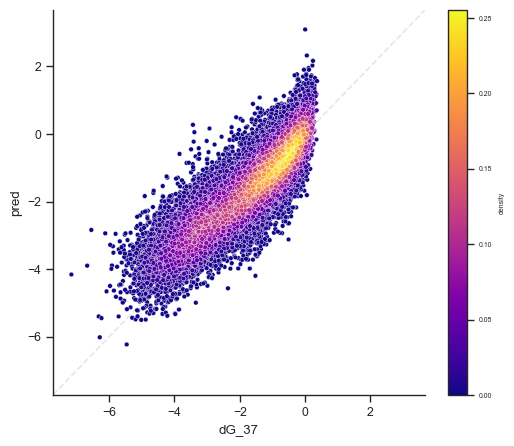

In [242]:
plotting.plot_colored_scatter_comparison(data=arr_1M, x='dG_37', y='pred', color_by_density=True)

In [243]:
util.mae(preds, arr_1M.dG_37)

0.506762824820986

# 09/27/2023

Regularize parameters to original NUPACK ones.

In [30]:
from scipy import optimize as opt
from sklearn.preprocessing import MinMaxScaler

In [118]:
def objective_func(coef, X, y, coef_p, reg_lambda):
    """
    X·coef = y
    """
    m = len(y)
    residual = X @ coef - y
    pred_cost = np.mean(residual**2)
    reg_cost = reg_lambda * np.mean(np.square(coef - coef_p))

    return pred_cost + reg_cost

def fit_regularized_linear_regression(X, y, coef_p, reg_lambda):
    coef0 = coef_p.copy()
    result = opt.minimize(fun=objective_func, x0=coef0,
                          args=(X, y, coef_p, reg_lambda),
                          method='BFGS')
    return result.x

# Example
# n = X.shape[0]
# X = feats.iloc[:n,:].values
# y = arr_1M.dG_37.values[:n]
# v_prior = np.ones(X.shape[1])*.5
# lambda_reg = 1e-7

X = np.array([[1,1],[0,1]])
y = np.array([2,1])
v_prior = np.array([3.5,3.5])
lambda_reg = 5e-1

v = fit_regularized_linear_regression(X, y, v_prior, lambda_reg)
print(v)

[1.68181815 1.22727264]


In [119]:
lr = util.LinearRegressionRegularized()
lr.fit(X, y, v_prior, reg_lambda=0)
lr.coef_

array([0.99999964, 0.99999957])

In [129]:
coef_df = pd.DataFrame(data=dict(a=[2],b=[1])).T

In [124]:
coef_df

,0
a,1
b,1


In [134]:
lr = util.LinearRegressionRegularized(reg_lambda=0)
lr.fit_with_some_coef_fixed(X, y, feature_names=['a','b'], fixed_feature_names=['a'], coef_df=coef_df, debug=True)
lr.coef_, lr.metrics

known_param_mask:  1 ['a']
X_unknown, X_known:  (2, 1) (2, 1)
coef_known:  [2]
X_unknown, y_tilde, coef_unknown: 
 [[1]
 [1]]
[0 1]
[1]
fitted_coef_unknown:  [0.5]


(array([2. , 0.5]),
 {'rsqr': 0.0, 'rmse': 0.5, 'mae': 0.5, 'dof': 0, 'chisq': nan, 'redchi': nan})

In [138]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [139]:
arr_1M = pd.read_csv('./data/models/processed/arr_v1_1M_n=27732.csv', index_col=0)
data_split_dict = fileio.read_json('./data/models/raw/data_split.json')
santa_lucia = fileio.read_santalucia_df('./data/literature/SantaLucia.tsv')

arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)
arr_adj = pd.read_csv('./data/models/processed/arr_v1_adjusted_n=27732.csv', index_col=0)
agg_result_file='./data/uv_melt/uvmelt_agg_230901.csv'
uv_df = pd.read_csv(agg_result_file, index_col=0).set_index('SEQID')
annotation = pd.read_table('./data/annotation/NNNlib2b_annotation_20220519.tsv', index_col=0)

ecl_oligo_df = pd.read_csv('./data/uv_melt/ECLTables/ECLOligos230502.csv', index_col=0)

In [168]:
%%time
arr4fit = arr_1M.query('Series == "WatsonCrick"')
feats = mf.get_feature_count_matrix(arr4fit, feature_method='get_nupack_feature_list', 
                                    feature_style='nupack', fit_intercept=False, directly_fit_3_4_hairpin_loop=False)
print(feats.shape)

(2027, 24)
CPU times: user 716 ms, sys: 5.82 ms, total: 721 ms
Wall time: 718 ms


In [185]:
""" Fixed parameters during training """
param_set_template_file = './models/dna04.json'
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch']
fixed_coef_df, fixed_feature_names = mupack.get_fixed_params(param_set_template_file=param_set_template_file, fixed_pclass=fixed_pclass, return_full_coef_df=True)
print(len(fixed_feature_names))

fixed_feature_names = [x for x in fixed_feature_names if x in feats.columns]
print('#fixed features =', len(fixed_feature_names))

12750
#fixed features = 24


In [176]:
train_data = dict(X=feats.values, y=arr4fit['dG_37'].values.flatten(), feature_names=feats.columns.tolist(), param='dG', split='train')

In [182]:
train_data['feature_names']

['hairpin_mismatch#AATG',
 'hairpin_mismatch#ACGG',
 'hairpin_mismatch#AGCG',
 'hairpin_mismatch#ATAG',
 'stack#AATT',
 'stack#ACGT',
 'stack#AGCT',
 'stack#ATAT',
 'stack#CATG',
 'stack#CCGG',
 'stack#CGCG',
 'stack#CTAG',
 'stack#GATC',
 'stack#GCGC',
 'stack#GGCC',
 'stack#GTAC',
 'stack#TATA',
 'stack#TCGA',
 'stack#TGCA',
 'stack#TTAA',
 'terminal_penalty#AT',
 'terminal_penalty#CG',
 'terminal_penalty#GC',
 'terminal_penalty#TA']

In [184]:
train_data['X'].shape, train_data['y'].shape, len(train_data['feature_names'])

((2027, 24), (2027,), 24)

In [186]:
fixed_feature_names = [x for x in train_data['feature_names'] if not x.startswith('stack')]

In [187]:
fixed_feature_names

['hairpin_mismatch#AATG',
 'hairpin_mismatch#ACGG',
 'hairpin_mismatch#AGCG',
 'hairpin_mismatch#ATAG',
 'terminal_penalty#AT',
 'terminal_penalty#CG',
 'terminal_penalty#GC',
 'terminal_penalty#TA']

In [233]:
lr = util.LinearRegressionRegularized(reg_lambda=50)
coef_df = fixed_coef_df[['dG']]
extra_coef_list = [x for x in feats.columns if not x in coef_df.index]
extra_coef_df = pd.DataFrame(index=extra_coef_list, data=0.0, columns=coef_df.columns)
coef_df = pd.concat((coef_df, extra_coef_df), axis=0)
lr.fit_with_some_coef_fixed(train_data['X'], train_data['y'], 
                            feature_names=train_data['feature_names'], fixed_feature_names=fixed_feature_names,
                            coef_df=coef_df, debug=True
)

known_param_mask:  8 ['hairpin_mismatch#AATG', 'hairpin_mismatch#ACGG', 'hairpin_mismatch#AGCG', 'hairpin_mismatch#ATAG', 'terminal_penalty#AT', 'terminal_penalty#CG', 'terminal_penalty#GC', 'terminal_penalty#TA']
X_unknown, X_known:  (2027, 16) (2027, 8)
fitted_coef_unknown:  [-0.68169188 -1.18973343 -0.9031511  -0.60143245 -1.17043879 -1.6717051
 -1.96280185 -1.00783348 -0.8501603  -2.00946268 -1.42136998 -1.01807493
 -0.28662329 -1.05241665 -1.09893833 -0.69694587]


In [234]:
def is_wc_stack(stack):
    return stack[0] == util.rcompliment(stack[-1]) and stack[1] == util.rcompliment(stack[-2])



param_set_template_file = './models/dna04.json'
# param_json_file = './models/dna-nnn-regularized.json'

p_old_dict = fileio.read_json(param_set_template_file)
# p_new_dict = fileio.read_json(param_json_file)

key = 'stack'
df = pd.DataFrame(data=dict(old=p_old_dict['dG'][key]))
df = df.loc[[is_wc_stack(x) for x in df.index]]

In [235]:
df['new'] = [lr.coef_df.loc['stack#'+x, 'dG_37'] for x in df.index]

In [236]:
df = df.rename_axis('RefSeq').reset_index()

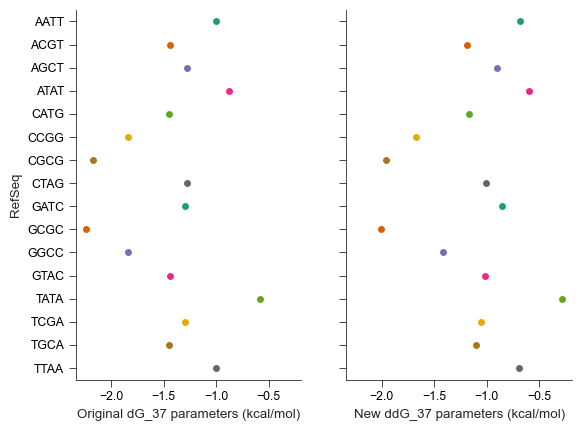

In [237]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
palette = 'Dark2'
sns.stripplot(data=df, orient='h', y='RefSeq', x='old', ax=ax[0], palette=palette)
ax[0].set_xlabel('Original dG_37 parameters (kcal/mol)')
sns.stripplot(data=df, orient='h', y='RefSeq', x='new', ax=ax[1], palette=palette)
ax[1].set_xlabel('New ddG_37 parameters (kcal/mol)')
ax[1].set_ylabel('')
util.beutify_all_ax(ax, x_locator=.5)

In [239]:
lr.metrics

{'rsqr': -4.067551803418677,
 'rmse': 3.2509699459762755,
 'mae': 3.149582435374231,
 'dof': 2003,
 'chisq': nan,
 'redchi': nan}

In [167]:
%%time 
# fig, ax = plt.subplots(1, 2, figsize=(8,4))

lr_dict = defaultdict()
param_name_dict = dict(dH='dH', dG='dG_37')
for i,param in enumerate(param_name_dict):
    print('Fitting', param, 'parameters...')
    lr_dict[param] = mf.fit_param(arr_1M, data_split_dict, param=param_name_dict[param], feats=feats,
                                  method='regularized',
                                  fix_coef_kwargs=dict(fix_some_coef=True, fixed_feature_names=fixed_feature_names, coef_df=fixed_coef_df[[param]]),
                                  regularization_kwargs=dict(reg_lambda=1e3, coef_df=fixed_coef_df[[param]])
                                 )
print('Done!')

Fitting dH parameters...


KeyError: "['BNNN9649', 'BNNN4011', 'MMGTP3641', 'TRINNN937', 'MMACP2182', 'MMACP1581', 'BNNN5865', 'MMTM1972', 'MMGTP2610', 'MMTM323', 'TETNNN616', 'BNNN5832', 'BNN406', 'MMTM869', 'BNNN7694', 'TETNNN2081', 'TRINNN383', 'BNNN9595', 'BNNN7164', 'WB_controls260831', 'MMGTP3093', 'MMTM700', 'MMCNNN425', 'MMGTP1873', 'MMCNNN391', 'MMTM615', 'MMGTP1261', 'MMACP2530', 'MMCNNN2563', 'MMACP976', 'BNNN5114', 'BNN92', 'BNNN9769', 'MMACP3184', 'MMACP1271', 'BNNN5903', 'TETNN222', 'MMTM427', 'MMTM752', 'MMCNNN1300', 'TETNNN181', 'MMGTP2674', 'BNN310', 'TETNNN1163', 'TETNNN2326', 'TRINNN392', 'BNNN5953', 'BNNN7308', 'TRINNN903', 'TETNNN946', 'TETNNN1683', 'TETNNN3700', 'MMTM2266', 'MMACP1870', 'TETNNN541', 'BNNN4749', 'MMGTP1688', 'MMGTP2669', 'BNNN9766', 'TETNNN2586', 'TRINNN330', 'TETNNN1239', 'BNNN9402', 'MMCNNN1860', 'MMTM1384', 'MMGTP452', 'MMCNNN282', 'TETNNN3878', 'TETNNN1351', 'MMCNNN1853', 'TETNN188', 'MMTM1190', 'TETNNN2521', 'MMCNN86', 'MMACP2288', 'MMACP1272', 'MMGTP1841', 'BNNN9773', 'BNNN5478', 'BNNN2539', 'MMGTP3712', 'BNNN5884', 'TETNNN2627', 'BNNN2885', 'BNNN8567', 'MMTM1198', 'TETNNN1465', 'BNNN9862', 'BNNN9175', 'TETNN1260', 'BNNN8138', 'MMACP1267', 'MMACP3825', 'BNNN5237', 'BNNN9516', 'BNNN6069', 'BNNN3583', 'BNNN8251', 'TETNNN1726', 'BNNN9629', 'BNNN25', 'MMCNNN728', 'BNNN5187', 'BNNN9844', 'BNNN8963', 'TETNNN3525', 'BNNN8497', 'BNNN2338', 'BNNN2959', 'MMGTP2021', 'TETNNN1142', 'MMACP1702', 'MMGTP2208', 'TETNNN265', 'BNNN8394', 'BNNN6276', 'TETNNN93', 'TETNN475', 'TETNNN3444', 'MMTM732', 'BNNN470', 'BNNN2656', 'MMCNNN88', 'BNNN8670', 'MMGTP3702', 'BNNN6987', 'BNNN2019', 'MMGTP1510', 'MMGTP1946', 'BNNN2106', 'TRINNN488', 'BNNN6291', 'MMTM2143', 'MMTM364', 'BNNN7410', 'BNNN6813', 'TRINNN629', 'BNNN2109', 'BNNN5663', 'BNNN7970', 'MMCNNN1792', 'TETNNN3698', 'BNNN5086', 'MMGTP2456', 'MMGTP1084', 'MMACP1176', 'MMGTP1671', 'BNNN9633', 'MMGTP437', 'BNNN3195', 'BNNN8880', 'TETNNN3022', 'MMGTP313', 'TRINNN714', 'MMGTP1034', 'BNNN5929', 'BNNN5807', 'MMGTP1686', 'BNNN5786', 'BNNN3924', 'BNNN7223', 'MMACP3170', 'BNNN1727', 'MMACP2425', 'TRINN271', 'MMTM2085', 'MMACP1905', 'BNNN9417', 'MMTM195', 'TETNN119', 'MMCNNN1755', 'BNNN831', 'MMTM1520', 'BNNN4576', 'BNNN6288', 'MMGTP2603', 'MMTM2201', 'MMGTP698', 'BNNN5911', 'TETNNN1825', 'MMCNNN923', 'BNNN5847', 'BNNN8890', 'MMGTP424', 'MMGTP2866', 'TETNNN1766', 'TRINNN71', 'TETNNN3680', 'TRINNN553', 'BNNN6016', 'TETNNN3440', 'TETNNN1986', 'BNNN4819', 'BNNN8772', 'MMCNNN965', 'MMTM1625', 'MMCNNN1060', 'MMTM15', 'BNNN1266', 'TETNNN2997', 'MMGTP481', 'MMGTP1407', 'MMCNNN1624', 'BNNN9162', 'MMCNNN2609', 'BNNN2560', 'BNNN6026', 'BNNN3443', 'TETNNN3538', 'TETNNN2093', 'TETNNN1605', 'TETNNN3985', 'BNNN5031', 'BNNN5024', 'BNNN3763', 'MMGTP3814', 'BNNN9612', 'TETNNN2654', 'BNNN6299', 'MMCNNN1571', 'BNNN5102', 'MMTM591', 'BNNN7485', 'TETNN164', 'TETNNN2274', 'MMGTP3078', 'BNNN343', 'BNNN8330', 'MMCNNN669', 'TETNNN2097', 'MMGTP2822', 'TRINNN940', 'TETNN215', 'MMGTP31', 'BNNN6548', 'BNNN765', 'MMGTP2190', 'MMTM530', 'MMGTP857', 'BNNN7278', 'BNNN7765', 'MMGTP1571', 'BNN587', 'BNNN2100', 'MMACP3151', 'TETNNN1484', 'MMTM1229', 'MMACP1837', 'MMGTP2293', 'BNNN4510', 'MMGTP1213', 'MMGTP2348', 'BNNN589', 'MMACP1090', 'MMTM790', 'MMACP59', 'MMCNNN2293', 'BNNN3554', 'BNNN4880', 'BNNN7684', 'MMACP886', 'BNNN8907', 'BNNN642', 'TETNNN2215', 'TETNNN3423', 'BNNN4406', 'BNNN3832', 'TETNNN344', 'MMGTP1607', 'BNNN5926', 'MMCNNN1025', 'MMACP877', 'MMACP3633', 'BNNN8763', 'MMTM1133', 'BNNN3727', 'MMCNNN881', 'BNNN8222', 'MMCNNN1890', 'MMACP1549', 'BNNN1373', 'TETNNN1493', 'MMCNNN1248', 'MMTM1096', 'MMCNN41', 'MMACP2667', 'MMGTP2276', 'MMCNNN1282', 'MMCNNN1394', 'MMACP1465', 'MMTM1062', 'BNNN10166', 'MMACP1056', 'BNNN8603', 'BNNN1096', 'BNNN7458', 'TETNNN2658', 'BNNN1300', 'BNNN7301', 'TETNNN3331', 'BNN184', 'MMCNNN1314', 'MMGTP1016', 'MMACP2483', 'BNNN3843', 'MMCNNN2448', 'TRINNN860', 'BNNN2871', 'BNNN7434', 'MMCNNN1013', 'MMACP3157', 'BNNN8794', 'MMACP2106', 'BNNN8776', 'MMACP629', 'MMTM1147', 'TETNN35', 'MMACP3299', 'MMGTP552', 'BNNN7506', 'TETNN273', 'BNNN4408', 'TETNNN2254', 'MMCNNN1404', 'BNNN6301', 'TETNNN3840', 'MMCNNN1175', 'MMTM414', 'BNNN1553', 'TETNNN2136', 'BNNN2668', 'MMCNNN1859', 'BNNN3318', 'BNNN4811', 'BNNN4344', 'MMCNNN971', 'TETNNN223', 'MMACP870', 'BNNN8621', 'MMCNNN2935', 'BNNN8575', 'BNNN6168', 'MMTM1204', 'MMCNNN807', 'BNNN4515', 'TETNNN1275', 'BNNN9609', 'BNNN4302', 'BNNN6009', 'TETNN555', 'TETNNN1064', 'TETNNN1747', 'MMCNNN867', 'BNNN8743', 'BNNN8664', 'BNN407', 'TETNNN71', 'BNN598', 'BNNN6186', 'MMTM1338', 'MMCNNN2729', 'MMGTP3634', 'BNNN2731', 'TRINNN350', 'BNNN4753', 'MMCNNN1202', 'MMGTP3180', 'BNNN4591', 'TETNNN1506', 'BNNN3130', 'BNNN1793', 'BNNN4888', 'TETNNN1161', 'MMACP166', 'BNNN8024', 'BNNN5673', 'MMGTP1900', 'TETNNN1526', 'MMACP3225', 'BNNN8741', 'MMGTP1992', 'MMCNNN657', 'BNNN307', 'MMACP773', 'TRINNN402', 'BNNN5094', 'TRINN162', 'MMGTP1759', 'TRINN110', 'MMCNNN1262', 'BNN183', 'MMGTP2761', 'BNNN8629', 'MMGTP650', 'BNNN7006', 'BNNN7202', 'BNNN2160', 'BNNN8037', 'BNNN7717', 'BNNN8144', 'TETNNN2404', 'TETNNN2200', 'MMGTP1961', 'MMTM929', 'BNN221', 'MMCNNN865', 'BNNN2673', 'TETNN1178', 'BNNN4669', 'TRINNN507', 'TETNN270', 'TETNNN3371', 'MMCNN68', 'MMGTP354', 'MMGTP2893', 'BNNN21', 'BNNN180', 'BNNN7275', 'MMTM486', 'MMCNNN1705', 'MMCNNN3028', 'MMTM1778', 'BNNN4615', 'MMACP3056', 'MMCNNN1016', 'BNNN4508', 'BNNN1284', 'MMTM774', 'MMTM1895', 'TETNNN771', 'TRINNN40', 'MMTM928', 'MMCNNN2514', 'TETNNN2477', 'MMCNNN3004', 'TETNNN742', 'TETNNN1537', 'BNNN7575', 'TETNNN1954', 'MMGTP372', 'BNNN5037', 'MMGTP987', 'MMTM1941', 'TETNNN560', 'TRINNN587', 'BNNN9607', 'MMGTP1122', 'MMGTP473', 'BNNN746', 'BNNN9943', 'BNNN4813', 'MMGTP2697', 'TETNNN59', 'TETNNN3512', 'BNN433', 'BNNN2801', 'MMGTP1247', 'TETNNN3088', 'MMTM1796', 'BNNN8097', 'BNNN9909', 'BNNN6696', 'MMACP1979', 'MMGTP953', 'BNNN9010', 'TETNNN3253', 'BNNN2212', 'MMCNNN92', 'MMTM832', 'MMTM1883', 'MMTM566', 'BNNN739', 'BNNN1598', 'BNNN3020', 'BNNN2203', 'MMGTP1693', 'MMCNNN1942', 'MMACP2738', 'TETNNN2828', 'MMGTP892', 'MMTM1580', 'MMGTP2755', 'MMCNNN1889', 'BNNN4099', 'MMGTP3297', 'TETNN317', 'BNNN3051', 'BNNN1605', 'BNNN4578', 'MMACP169', 'BNNN9798', 'MMTM642', 'BNNN6468', 'MMCNNN1741', 'MMACP2381', 'MMACP2464', 'BNNN614', 'BNNN4689', 'BNNN8455', 'MMCNNN2946', 'TETNNN1229', 'TETNNN1001', 'MMGTP1645', 'TETNNN325', 'MMACP3076', 'BNNN8871', 'BNNN8169', 'MMCNNN1228', 'MMACP41', 'MMGTP1913', 'MMACP1895', 'MMACP535', 'BNNN246', 'TRINNN644', 'BNNN4922', 'BNNN356', 'TETNNN2646', 'MMACP3176', 'MMTM1638', 'MMCNNN1115', 'TRINNN581', 'MMTM117', 'MMGTP969', 'BNNN2509', 'TETNNN2062', 'MMTM1839', 'TETNNN287', 'BNNN7201', 'MMGTP1649', 'MMGTP768', 'BNNN10038', 'MMGTP3564', 'BNNN3381', 'BNNN7157', 'TETNNN2749', 'MMACP2300', 'BNNN9505', 'BNNN8764', 'BNNN4106', 'BNNN4342', 'MMCNNN387', 'BNNN7869', 'MMTM1992', 'MMGTP1892', 'MMGTP2297', 'BNNN5952', 'BNNN6664', 'MMCNNN1246', 'MMCNNN1177', 'MMGTP2340', 'MMACP2870', 'BNNN8088', 'BNNN4980', 'MMCNNN1686', 'MMGTP546', 'TETNN452', 'BNNN8999', 'TETNNN3898', 'TRINNN836', 'MMGTP3547', 'TETNNN2961', 'TETNN622', 'BNN239', 'BNNN5045', 'BNNN9697', 'MMCNNN287', 'MMCNNN1864', 'BNNN3158', 'TRINNN270', 'MMCNNN897', 'BNNN9089', 'MMACP2143', 'MMCNNN1858', 'MMGTP1912', 'MMTM1850', 'MMTM1426', 'TRINNN852', 'MMCNNN2351', 'MMCNN59', 'BNNN6212', 'MMTM1544', 'BNNN2336', 'BNNN5072', 'MMCNN116', 'TRINNN596', 'BNNN8902', 'BNNN3706', 'BNN414', 'BNNN3280', 'BNNN6413', 'MMACP2115', 'MMCNN27', 'TETNNN484', 'MMACP2283', 'TETNNN8', 'TRINNN617', 'TETNNN3474', 'BNNN6477', 'MMGTP2376', 'TETNNN991', 'TETNNN1477', 'MMGTP3035', 'MMACP2144', 'BNNN5010', 'TRINN137', 'TETNNN279', 'BNNN3910', 'MMTM446', 'MMTM1448', 'MMTM1530', 'BNNN7106', 'BNNN3181', 'TETNNN159', 'MMACP1799', 'MMGTP1552', 'BNNN9957', 'BNNN4914', 'MMTM952', 'MMACP3694', 'MMCNNN197', 'BNNN8645', 'MMACP675', 'MMCNNN872', 'MMGTP156', 'MMTM2267', 'TETNNN246', 'BNNN8894', 'BNNN8433', 'TETNNN1764', 'TRINN132', 'MMTM183', 'BNNN986', 'MMGTP1995', 'MMGTP66', 'MMCNNN1038', 'BNNN762', 'BNNN8329', 'BNNN4421', 'BNNN509', 'BNNN7710', 'MMACP1678', 'MMTM371', 'BNNN6034', 'MMACP2390', 'MMGTP942', 'BNNN4565', 'TETNNN2421', 'TRINN144', 'BNNN468', 'BNNN5773', 'MMGTP789', 'MMGTP1065', 'MMTM855', 'TRINNN930', 'TETNN38', 'BNNN4426', 'BNNN5527', 'TETNNN2536', 'MMTM1002', 'TETNNN3332', 'MMGTP1592', 'BNNN9250', 'BNNN9526', 'BNNN7573', 'TETNNN2469', 'MMACP986', 'TETNN524', 'BNNN6260', 'TETNNN3872', 'BNNN780', 'TETNNN1994', 'MMCNNN1525', 'MMACP3125', 'TETNNN2764', 'BNNN4600', 'MMGTP874', 'BNNN7505', 'MMTM232', 'MMTM1436', 'TETNNN871', 'MMACP246', 'BNNN9575', 'BNNN2559', 'BNNN6892', 'TETNNN940', 'TETNNN2266', 'MMACP1098', 'TRINN19', 'TETNN142', 'BNNN4832', 'MMACP2793', 'BNNN7059', 'TRINNN641', 'MMTM1861', 'BNNN8848', 'MMACP869', 'MMACP2631', 'MMACP7', 'TETNN615', 'TETNNN794', 'BNNN10105', 'MMGTP2071', 'MMTM1388', 'MMTM297', 'MMGTP117', 'TETNN390', 'BNNN7904', 'TETNNN1443', 'MMACP759', 'TRINNN826', 'BNNN1869', 'BNNN2249', 'BNNN4195', 'MMGTP3655', 'MMGTP2487', 'MMGTP2482', 'BNNN19', 'TETNNN309', 'TRINNN332', 'MMCNNN559', 'BNNN2532', 'BNNN8066', 'BNNN7571', 'BNNN2438', 'MMGTP2106', 'MMCNNN2534', 'TRINNN920', 'MMACP5', 'BNNN7412', 'BNNN806', 'MMGTP832', 'MMGTP2983', 'TETNNN1018', 'TETNNN3175', 'BNNN8278', 'TRINN127', 'MMACP3791', 'TRINNN675', 'MMTM2299', 'BNNN6336', 'MMCNNN788', 'MMCNNN1489', 'MMACP3102', 'BNNN3678', 'BNNN5993', 'BNNN6073', 'MMGTP3681', 'TETNNN4073', 'MMACP3600', 'MMGTP3663', 'BNNN4121', 'MMCNNN793', 'BNNN4227', 'BNNN4890', 'MMGTP807', 'BNNN8971', 'BNNN270', 'BNN346', 'TETNNN3528', 'BNNN8238', 'MMCNNN3037', 'BNNN5890', 'TETNNN2645', 'TETNNN2952', 'BNNN4143', 'BNNN8057', 'BNNN7878', 'BNNN6285', 'BNNN9184', 'MMCNN28', 'MMGTP3004', 'MMTM1928', 'TETNNN549', 'MMGTP885', 'MMGTP1432', 'TETNNN3416', 'BNNN2940', 'TRINNN859', 'BNNN9722', 'BNNN965', 'BNNN3325', 'BNNN9488', 'BNNN2484', 'MMACP184', 'TETNN71', 'TETNNN1515', 'TETNNN1213', 'MMCNNN1244', 'TETNN77', 'MMACP1652', 'MMTM1345', 'BNNN3155', 'MMGTP977', 'TETNNN1620', 'MMACP1877', 'BNNN6714', 'MMCNNN1031', 'BNNN6325', 'BNNN5013', 'BNNN449', 'BNNN3172', 'BNNN9833', 'MMTM419', 'TETNNN894', 'BNNN8124', 'MMTM2294', 'TRINNN420', 'TETNNN1104', 'MMACP375', 'TETNN491', 'BNNN5601', 'MMCNNN231', 'MMTM1387', 'MMACP2080', 'BNNN7283', 'MMCNNN1964', 'TETNNN1917', 'BNNN3934', 'BNNN4109', 'BNNN4862', 'TETNNN252', 'MMACP200', 'TRINNN100', 'BNNN4741', 'BNNN4230', 'BNNN1415', 'TETNNN1160', 'BNNN8023', 'MMTM1155', 'BNNN1576', 'MMACP2250', 'MMTM243', 'MMGTP62', 'TETNNN2358', 'BNNN9336', 'TETNN281', 'BNNN9012', 'BNNN4754', 'BNNN7370', 'MMGTP1142', 'MMCNNN1438', 'BNNN599', 'BNNN8281', 'MMTM944', 'TRINNN401', 'MMACP2644', 'MMCNNN1432', 'MMGTP3500', 'MMGTP1218', 'TETNN260', 'TETNN510', 'BNNN2001', 'BNNN9970', 'BNNN1730', 'BNNN3963', 'TETNNN1934', 'MMTM1409', 'TRINNN679', 'TETNNN3785', 'MMGTP2760', 'TETNNN697', 'MMACP1522', 'MMGTP3407', 'MMGTP1053', 'BNNN5366', 'BNNN9934', 'TETNNN790', 'BNNN1910', 'MMGTP3606', 'BNNN5340', 'BNNN5722', 'BNNN277', 'MMACP1514', 'TETNNN1323', 'BNNN5342', 'BNNN9413', 'TETNNN1973', 'BNNN4257', 'BNNN6774', 'TETNNN1209', 'BNNN3993', 'MMTM694', 'MMGTP2318', 'BNNN1711', 'MMGTP2865', 'TETNNN3931', 'BNNN641', 'TETNNN2161', 'BNNN8578', 'BNNN9878', 'MMCNNN911', 'MMCNNN770', 'TETNNN1285', 'MMTM970', 'MMGTP3734', 'MMCNNN347', 'BNNN4041', 'TETNNN4058', 'BNNN3972', 'MMGTP3482', 'TETNNN4004', 'BNNN9900', 'MMGTP233', 'MMTM809', 'BNNN8960', 'BNNN4724', 'TETNNN1190', 'BNNN3341', 'TRINN87', 'BNNN5491', 'BNN581', 'TRINN169', 'TETNN528', 'BNNN5592', 'BNNN2651', 'MMGTP441', 'MMGTP3455', 'MMACP2559', 'TETNNN3714', 'MMCNNN663', 'MMCNNN2670', 'BNNN8005', 'MMCNNN585', 'MMGTP3367', 'MMACP3079', 'MMGTP2166', 'MMTM2289', 'BNNN9153', 'TETNNN3971', 'MMCNNN1934', 'TRINNN875', 'MMACP2370', 'TRINNN850', 'BNNN4601', 'BNNN4900', 'TETNNN1342', 'MMACP1852', 'MMGTP2142', 'TETNNN1101', 'MMGTP2736', 'MMCNN174', 'BNNN7604', 'MMACP3302', 'MMTM44', 'MMACP655', 'MMCNNN2654', 'TETNNN3143', 'BNNN5378', 'MMGTP1667', 'BNNN7349', 'BNNN3500', 'BNNN8235', 'BNNN2042', 'TETNNN249', 'BNN424', 'MMACP2336', 'MMCNNN651', 'MMACP1823', 'MMCNNN749', 'TETNNN3661', 'BNNN2702', 'MMACP294', 'TETNNN253', 'MMGTP42', 'BNNN1539', 'MMGTP431', 'BNN630', 'MMACP3644', 'BNNN10154', 'BNNN8654', 'MMTM1817', 'MMACP2282', 'MMCNN4', 'BNNN5733', 'MMCNN9', 'MMTM1252', 'MMGTP159', 'MMACP3830', 'MMACP1594', 'BNNN677', 'TETNNN174', 'MMTM1884', 'MMGTP3096', 'MMGTP2388', 'MMTM1445', 'BNNN7387', 'MMCNNN2608', 'BNNN832', 'MMACP2268', 'MMGTP598', 'BNNN8952', 'MMACP2578', 'MMCNNN977', 'BNNN4266', 'MMACP946', 'MMCNNN470', 'BNNN4256', 'BNNN889', 'BNN343', 'MMACP3078', 'BNNN9670', 'TETNNN2622', 'MMTM417', 'MMACP320', 'TRINNN77', 'MMGTP2985', 'TRINNN648', 'MMCNNN1789', 'BNNN7269', 'MMCNNN2583', 'TETNNN1627', 'MMACP1994', 'MMTM2172', 'BNNN7719', 'TETNNN436', 'TETNN1182', 'TETNNN1783', 'MMGTP2379', 'BNNN6425', 'MMGTP2595', 'MMCNNN2973', 'TETNNN388', 'MMACP2007', 'TETNNN1643', 'BNNN4381', 'BNNN4699', 'MMTM1639', 'MMCNNN2082', 'MMGTP1467', 'MMACP2099', 'MMGTP2426', 'BNNN4466', 'TETNNN629', 'MMTM314', 'BNNN4942', 'MMACP1795', 'MMGTP2539', 'TETNNN3774', 'BNNN1078', 'TETNNN2300', 'MMGTP2140', 'TETNNN3499', 'MMACP899', 'TETNNN1247', 'BNNN3167', 'MMCNNN1338', 'MMGTP926', 'BNNN8640', 'MMGTP2074', 'BNNN8094', 'MMTM23', 'MMGTP2224', 'TETNNN951', 'BNNN4621', 'MMACP3527', 'MMGTP1445', 'MMCNNN2649', 'MMGTP236', 'MMGTP158', 'MMCNNN2164', 'TRINNN15', 'BNNN5055', 'BNNN3470', 'TETNN356', 'MMGTP989', 'MMGTP1191', 'BNNN624', 'MMTM223', 'MMGTP975', 'BNNN4156', 'MMTM2019', 'BNNN2985', 'TETNNN3514', 'BNNN4451', 'BNNN1680', 'TRINNN267', 'BNNN2074', 'TRINNN137', 'BNN44', 'TETNNN1393', 'MMCNNN1747', 'BNNN9653', 'MMGTP1436', 'BNNN3108', 'MMTM134', 'BNN233', 'MMGTP1181', 'BNNN3598', 'TETNNN2399', 'MMACP2202', 'MMTM2012', 'MMACP1976', 'TETNNN1231', 'BNNN2231', 'MMGTP2007', 'MMGTP3414', 'MMGTP1536', 'BNNN5161', 'MMGTP1202', 'TRINNN666', 'BNNN7864', 'MMACP927', 'TETNNN2590', 'MMCNNN907', 'TRINNN491', 'BNNN8185', 'TETNNN335', 'MMACP955', 'BNNN4486', 'TETNNN2509', 'TETNNN1727', 'BNNN1059', 'MMGTP3238', 'MMACP651', 'BNNN7792', 'TETNN232', 'BNN114', 'MMACP2686', 'TETNNN3021', 'TETNNN1013', 'BNNN9923', 'MMGTP2492', 'BNNN2004', 'BNNN6184', 'TETNNN867', 'MMCNNN2751', 'MMACP702', 'MMTM1459', 'BNNN1435', 'TETNN194', 'MMTM46', 'BNNN3131', 'TETNN380', 'MMCNNN433', 'MMTM1259', 'TETNNN2304', 'MMTM744', 'TETNNN606', 'MMACP2289', 'BNNN7372', 'BNNN2704', 'BNNN5521', 'TETNNN1525', 'BNNN6988', 'TETNNN555', 'BNNN8237', 'TETNNN142', 'BNNN5489', 'MMTM1876', 'TETNNN4', 'TETNNN858', 'BNNN4844', 'MMCNNN953', 'BNNN1400', 'MMTM409', 'BNNN9143', 'MMACP1693', 'MMGTP1575', 'BNNN7178', 'BNNN2558', 'MMCNN161', 'BNNN6119', 'BNN566', 'MMGTP43', 'MMACP3169', 'BNNN8133', 'TETNNN1575', 'MMTM217', 'BNNN6483', 'MMGTP1232', 'MMGTP716', 'MMGTP416', 'MMACP3517', 'TETNN130', 'MMCNNN2983', 'BNNN5730', 'TETNNN1877', 'TRINNN448', 'BNNN6439', 'MMACP3569', 'TETNNN1881', 'TETNNN345', 'BNNN1952', 'TETNNN3243', 'MMACP600', 'MMCNNN45', 'MMACP2577', 'TRINNN949', 'BNNN3915', 'TETNN604', 'MMACP3041', 'BNNN2492', 'MMCNNN1112', 'MMACP1517', 'TETNNN3412', 'BNNN9341', 'TRINNN932', 'TETNNN2267', 'MMCNNN2140', 'BNNN3916', 'BNNN8639', 'BNNN3675', 'MMGTP2313', 'MMACP3093', 'BNNN3533', 'BNNN5688', 'BNNN2523', 'MMACP2224', 'MMCNNN1608', 'TETNNN507', 'MMGTP3752', 'TETNN301', 'MMACP1847', 'MMTM1456', 'TETNNN1565', 'MMCNNN558', 'MMTM50', 'TETNNN2318', 'MMGTP872', 'MMGTP1010', 'MMGTP2228', 'MMGTP656', 'MMGTP1919', 'TETNNN5', 'MMGTP678', 'TRINNN631', 'BNNN7182', 'TETNNN1874', 'MMCNNN2800', 'MMCNNN434', 'TRINN302', 'TETNNN1146', 'MMCNNN1770', 'MMCNN121', 'BNNN5517', 'TRINNN310', 'TETNNN1177', 'BNNN7473', 'MMTM2333', 'BNNN6509', 'MMTM313', 'BNNN10222', 'TRINNN400', 'BNNN4202', 'TETNNN2431', 'TETNNN1268', 'MMACP156', 'MMGTP1182', 'TETNNN101', 'BNNN2873', 'BNNN3052', 'TETNNN17', 'MMACP564', 'BNNN7074', 'BNNN1852', 'MMGTP1258', 'BNNN7555', 'BNNN3890', 'TETNNN915', 'TETNN133', 'MMGTP1198', 'BNNN6627', 'MMGTP3148', 'TETNNN3802', 'TETNNN29', 'TRINNN812', 'BNNN7243', 'TRINNN503', 'BNNN2083', 'MMGTP235', 'MMCNNN339', 'BNNN8819', 'BNNN6367', 'MMCNNN2778', 'MMTM1462', 'TRINNN338', 'MMACP3278', 'MMGTP3740', 'TRINNN158', 'BNNN4015', 'BNNN953', 'TETNN63', 'MMGTP643', 'MMACP541', 'MMTM636', 'MMTM1097', 'TETNNN3685', 'BNNN7337', 'BNN337', 'BNNN2197', 'TETNN159', 'MMACP1053', 'BNNN5319', 'TETNNN1201', 'MMGTP2076', 'TETNNN2455', 'BNNN9703', 'MMACP1113', 'BNNN7161', 'MMCNNN1424', 'BNNN242', 'MMCNNN1597', 'MMCNNN1321', 'TRINNN842', 'BNNN9792', 'TETNNN25', 'BNNN1401', 'MMCNNN2055', 'BNNN3906', 'MMGTP2448', 'BNNN7598', 'BNNN7187', 'BNNN923', 'BNNN4745', 'BNN623', 'TETNNN569', 'TETNNN3379', 'MMCNNN1947', 'BNNN9387', 'MMACP1521', 'BNNN1411', 'MMGTP1535', 'TETNNN52', 'MMCNNN121', 'MMTM805', 'MMGTP985', 'MMTM357', 'MMGTP1872', 'MMGTP1731', 'BNNN6476', 'MMTM1274', 'TRINNN443', 'TETNN438', 'MMGTP2642', 'TETNNN2415', 'MMACP3232', 'MMACP1421', 'MMGTP3466', 'MMGTP427', 'TRINNN264', 'MMTM1606', 'MMACP1107', 'TETNN648', 'MMCNNN1054', 'MMGTP153', 'MMACP1785', 'BNNN4845', 'TETNNN3321', 'MMACP2657', 'BNNN9552', 'MMGTP2051', 'BNNN569', 'BNNN2805', 'MMTM39', 'BNNN8539', 'TETNNN966', 'MMGTP1396', 'BNNN2035', 'MMCNN84', 'BNNN1308', 'TETNNN2183', 'TETNNN511', 'TETNNN1301', 'MMCNNN1726', 'BNNN5097', 'MMACP404', 'MMGTP246', 'BNNN5392', 'MMTM957', 'BNNN3531', 'BNNN9731', 'TRINNN7', 'MMCNNN2502', 'MMACP627', 'TETNNN3121', 'MMCNNN2508', 'BNNN9993', 'MMGTP544', 'MMACP3115', 'BNNN9260', 'MMGTP1355', 'TRINNN843', 'BNNN6577', 'MMGTP1808', 'BNNN1048', 'MMGTP2698', 'BNNN2556', 'MMGTP1666', 'BNNN3541', 'BNNN9666', 'BNNN8305', 'BNNN4012', 'MMTM1040', 'MMTM748', 'TETNNN3656', 'MMACP863', 'MMTM2304', 'TETNN279', 'MMCNNN1554', 'BNNN8050', 'MMTM1812', 'BNNN9101', 'TETNNN115', 'MMGTP361', 'MMCNNN2236', 'MMCNNN1336', 'BNNN7132', 'TRINNN700', 'TRINNN578', 'TETNNN2585', 'MMTM2192', 'TETNNN730', 'BNNN500', 'BNNN8838', 'MMACP3676', 'TRINNN142', 'MMGTP2528', 'MMCNNN272', 'BNNN9886', 'MMACP425', 'BNNN1635', 'TRINNN965', 'MMCNNN2184', 'BNNN6716', 'MMTM2133', 'MMGTP48', 'TETNN286', 'BNNN10068', 'MMTM859', 'BNNN1532', 'MMACP1773', 'MMACP160', 'TETNN14', 'MMGTP1077', 'MMTM504', 'BNNN3880', 'BNNN2506', 'TETNNN3350', 'TETNNN1915', 'MMGTP2507', 'MMTM1532', 'BNNN6279', 'BC7', 'TRINNN427', 'BNNN5668', 'TETNN558', 'TETNN1210', 'MMACP1642', 'MMCNNN1697', 'BNNN1880', 'MMGTP3131', 'BNNN7612', 'MMTM1238', 'TETNNN44', 'MMCNN144', 'MMCNNN2359', 'TETNNN679', 'TETNNN2595', 'MMCNNN2506', 'MMGTP1260', 'MMTM1177', 'BNNN8267', 'BNNN3696', 'MMTM671', 'MMCNNN2389', 'BNNN8186', 'MMGTP1025', 'MMACP2125', 'TETNNN957', 'BNN280', 'BNNN6289', 'BNNN7340', 'TRINNN374', 'BNNN6480', 'MMTM1115', 'TETNNN1204', 'TETNNN3302', 'BNNN3808', 'MMACP2857', 'BNNN9214', 'MMGTP1989', 'TETNN701', 'MMCNNN1039', 'MMACP3775', 'BNNN7415', 'TETNN280', 'MMGTP3317', 'MMGTP3589', 'MMTM757', 'MMGTP3614', 'BNNN8962', 'TRINN12', 'BNN11', 'TETNN661', 'MMCNNN2796', 'MMACP2162', 'MMACP2369', 'BNN474', 'BNNN4799', 'MMGTP3565', 'MMGTP2940', 'BNNN7143', 'BNNN8860', 'MMACP1496', 'BNNN5928', 'BNNN487', 'MMCNNN719', 'TETNNN408', 'MMCNNN729', 'TRINNN208', 'BNNN4360', 'MMCNNN1400', 'TETNNN2353', 'MMGTP511', 'BNNN8376', 'MMGTP675', 'MMACP1216', 'TETNNN32', 'MMCNNN29', 'MMACP1357', 'BNNN6669', 'BNNN9525', 'MMGTP1705', 'MMACP1807', 'BNNN3856', 'BNN395', 'TETNNN809', 'MMACP1538', 'MMGTP2136', 'MMCNNN792', 'TETNNN357', 'TETNNN875', 'TETNN406', 'BNNN6485', 'BNNN1610', 'TRINNN763', 'MMGTP2827', 'BNNN9395', 'MMACP1328', 'TRINN130', 'BNNN2383', 'TRINNN223', 'BNNN8606', 'TETNN101', 'TRINNN222', 'TETNNN1075', 'TETNNN1850', 'BNNN6022', 'MMGTP1632', 'MMCNNN443', 'BNNN5959', 'MMCNNN1181', 'MMTM1128', 'TETNNN1409', 'BNNN4850', 'MMGTP3189', 'BNNN2114', 'BNNN4624', 'TETNNN1350', 'MMGTP794', 'MMCNNN2690', 'TETNNN1164', 'TETNNN1670', 'MMTM280', 'MMGTP922', 'BNN20', 'TETNNN15', 'BNNN8012', 'TETNNN2374', 'BNNN914', 'MMACP3215', 'MMACP953', 'TETNNN1652', 'MMACP1970', 'BNNN6020', 'BNNN467', 'BNNN4523', 'TETNNN1271', 'TETNNN2866', 'TRINNN422', 'BNNN807', 'BNNN7390', 'MMGTP3497', 'MMTM1283', 'TRINNN65', 'MMACP3712', 'MMCNNN2443', 'TETNNN421', 'MMACP2965', 'TETNNN2290', 'MMCNNN972', 'MMGTP2753', 'TETNNN1128', 'TETNNN967', 'MMCNNN2014', 'MMGTP3732', 'TETNN174', 'MMACP143', 'BNNN6154', 'BNNN5118', 'BNNN6214', 'MMCNNN1840', 'MMGTP1011', 'BNNN5958', 'MMGTP562', 'MMACP2072', 'MMTM1257', 'TETNN242', 'BNNN3117', 'BNNN1101', 'BNNN6530', 'MMACP1190', 'BNNN6388', 'MMCNNN1650', 'MMCNNN1288', 'MMGTP3147', 'MMACP2158', 'TETNNN1251', 'MMGTP2967', 'MMACP2455', 'BNNN7270', 'TETNNN3429', 'TETNNN3288', 'TETNNN2141', 'MMGTP3199', 'BNNN3773', 'BNNN7068', 'BNNN9578', 'TETNNN2566', 'MMCNNN986', 'BNNN2326', 'TETNN402', 'BNNN3165', 'MMGTP1582', 'MMACP2237', 'BNNN1778', 'BNNN3760', 'TETNNN577', 'MMCNNN1734', 'MMCNNN1145', 'MMTM112', 'TETNN512', 'MMTM1958', 'BNNN4161', 'TRINNN173', 'TETNNN613', 'MMGTP2587', 'BNNN185', 'BNNN9136', 'TETNNN3874', 'TETNNN1480', 'TETNNN3579', 'TETNNN196', 'MMACP1068', 'MMTM93', 'BNNN510', 'MMCNNN557', 'TRINNN979', 'BNNN2662', 'BNNN7494', 'MMACP2783', 'BNNN8220', 'BNNN5577', 'TRINNN676', 'BNNN8849', 'MMCNNN2519', 'MMGTP2292', 'MMTM923', 'TETNN15', 'MMCNNN1613', 'TETNNN2377', 'TETNN675', 'BNNN8231', 'BNNN2916', 'TETNNN339', 'MMGTP2210', 'BNNN1127', 'MMTM1950', 'MMGTP3474', 'BNNN6093', 'MMTM2337', 'TETNNN2607', 'TRINN270', 'BNNN10023', 'TETNNN1755', 'MMCNNN2347', 'MMGTP3082', 'BNNN3540', 'TETNNN1377', 'BNNN10029', 'BNNN7582', 'TETNN398', 'MMGTP3119', 'TRINN25', 'MMACP2270', 'BNNN3718', 'TETNNN2871', 'TETNNN3924', 'BNNN4026', 'MMGTP994', 'TETNNN1666', 'MMTM980', 'MMGTP748', 'MMCNNN2224', 'BNNN10180', 'TETNNN4082', 'MMACP289', 'BNNN8732', 'MMACP1043', 'TETNN515', 'BNNN7827', 'MMCNNN2673', 'TETNNN1624', 'TETNN12', 'BNN213', 'BNNN9425', 'MMACP3181', 'MMTM1037', 'MMCNNN1156', 'BNNN1427', 'BNNN7504', 'MMACP3818', 'MMGTP1547', 'MMGTP420', 'BNNN7607', 'MMTM309', 'TETNNN2222', 'MMTM1819', 'BNNN2105', 'TETNNN2906', 'MMCNNN2551', 'BNNN7081', 'BNNN7962', 'BNNN5883', 'MMTM95', 'MMCNNN875', 'TETNNN3516', 'TETNN649', 'MMACP1356', 'TETNNN2328', 'BNNN8400', 'BNNN9849', 'BNNN4733', 'TRINNN990', 'TRINNN931', 'MMCNNN1821', 'BNNN9678', 'BNNN7254', 'MMACP2335', 'TETNNN1996', 'BNNN5181', 'MMCNNN34', 'TETNNN2180', 'MMTM1545', 'MMTM502', 'MMACP1556', 'BNNN9829', 'MMGTP2859', 'BNNN6820', 'MMTM157', 'BNNN448', 'TRINN102', 'BNNN2000', 'MMCNNN2399', 'MMTM149', 'BNNN4465', 'MMCNNN2766', 'MMGTP3700', 'BNNN1726', 'MMTM505', 'BNNN1129', 'BNNN5322', 'MMACP3309', 'MMGTP2640', 'BNNN4677', 'TETNNN2674', 'MMGTP1257', 'MMCNNN1349', 'MMACP380', 'MMGTP364', 'BNN323', 'MMGTP87', 'BNNN7581', 'BNNN2529', 'BNN377', 'TETNNN2220', 'BNNN9523', 'TETNN645', 'MMGTP3612', 'TETNN706', 'TETNN217', 'MMGTP2847', 'BNNN5990', 'BNNN7786', 'MMCNNN2167', 'MMACP2326', 'BNNN1556', 'MMGTP720', 'BNNN6384', 'MMACP1763', 'BNNN4738', 'BNNN8403', 'MMACP2564', 'MMACP1731', 'MMGTP751', 'MMTM213', 'MMGTP919', 'BNNN9115', 'BNNN5253', 'TETNNN154', 'MMCNNN2056', 'BNNN3925', 'MMTM341', 'BNNN4769', 'TETNNN517', 'MMACP1495', 'TETNNN1336', 'MMCNNN2999', 'MMCNNN1167', 'MMTM1578', 'MMGTP3453', 'MMGTP1454', 'BNNN6753', 'MMCNNN1303', 'BNNN10104', 'BNNN7261', 'TETNNN2970', 'MMCNNN855', 'BNN602', 'MMACP3586', 'MMGTP3469', 'BNNN6083', 'MMCNNN1103', 'MMGTP2146', 'MMCNNN2457', 'MMCNNN2490', 'TETNNN2887', 'MMGTP1252', 'BNNN4712', 'MMGTP743', 'BNNN6354', 'TETNNN759', 'BNNN3043', 'MMTM1466', 'MMCNNN1383', 'TETNNN1238', 'MMGTP1766', 'BNNN933', 'TRINNN591', 'MMTM1023', 'MMGTP2030', 'TETNNN1203', 'BNNN8130', 'TETNNN3159', 'TRINN35', 'BNNN5108', 'BNN463', 'MMGTP1548', 'MMGTP2216', 'TETNNN3523', 'BNNN4752', 'BNNN8662', 'BNNN7490', 'MMTM1775', 'BNNN1639', 'TETNNN3642', 'MMTM975', 'TETNNN521', 'MMGTP1718', 'BNNN4297', 'BNNN5627', 'BNNN5343', 'TRINNN309', 'BNNN9352', 'MMGTP815', 'TETNNN1303', 'MMACP1590', 'MMGTP2334', 'TETNNN3199', 'MMCNNN919', 'BNNN9282', 'BNNN9483', 'TRINNN612', 'TETNNN3194', 'MMGTP2695', 'TETNNN3248', 'BNNN2172', 'TRINNN439', 'MMACP1352', 'MMTM1451', 'TETNNN2341', 'BNNN3388', 'TETNNN554', 'MMGTP2447', 'TETNNN2803', 'MMCNNN960', 'TRINNN432', 'TETNN338', 'BNNN5171', 'BNNN1760', 'BNNN9982', 'TETNNN1110', 'MMCNNN2617', 'TRINNN1011', 'BNNN4841', 'MMACP1218', 'BNNN3493', 'TETNNN2443', 'MMGTP3541', 'MMTM1246', 'BNNN4430', 'TETNNN40', 'BNNN7323', 'BNNN1291', 'TRINN161', 'MMGTP2170', 'BNNN4089', 'TETNNN2559', 'BNNN5466', 'BNN423', 'BNNN10200', 'MMGTP3628', 'MMGTP175', 'MMACP1684', 'BNNN4105', 'MMGTP258', 'BNNN3986', 'BNNN6687', 'BNNN1062', 'TETNNN805', 'MMTM2261', 'BNNN9775', 'TRINNN841', 'BNNN2012', 'BNNN8263', 'BNNN4024', 'MMCNNN2147', 'BNNN3031', 'MMGTP3256', 'TETNNN3172', 'TETNN754', 'MMTM1333', 'MMTM1816', 'MMGTP2262', 'BNNN1631', 'BNNN4070', 'BNNN1425', 'TETNNN3832', 'BNNN3767', 'TETNNN3742', 'BNNN6165', 'MMTM791', 'MMACP2446', 'MMGTP2828', 'MMACP58', 'BNNN6343', 'MMTM1266', 'BNNN9057', 'TRINNN991', 'MMTM1369', 'TETNNN2252', 'MMGTP555', 'MMTM239', 'MMGTP1518', 'TETNN594', 'MMCNNN2950', 'MMTM1900', 'MMGTP2311', 'TETNN431', 'MMACP1000', 'MMCNNN1102', 'MMCNNN2022', 'BNNN6992', 'MMACP3378', 'BNN455', 'BNNN2323', 'BNNN8891', 'MMTM864', 'BNNN5583', 'MMCNNN1433', 'TETNN285', 'BNNN610', 'BNNN8543', 'MMCNN48', 'BNNN427', 'TRINNN105', 'BNNN1691', 'BNNN7912', 'MMGTP1309', 'MMCNNN1952', 'BNNN8214', 'BNNN6986', 'BNNN7983', 'BNNN3203', 'MMCNNN1261', 'TETNN181', 'MMACP383', 'MMGTP2144', 'MMGTP563', 'TETNNN3328', 'MMTM714', 'MMGTP1960', 'MMGTP1405', 'MMGTP966', 'TETNNN3918', 'BNNN9040', 'BNNN9086', 'TRINNN471', 'MMGTP867', 'BNNN7393', 'MMGTP1036', 'BNNN4331', 'BNNN490', 'MMCNNN1042', 'BNN582', 'BNNN9989', 'MMCNNN2521', 'TETNNN3189', 'BNNN5384', 'TETNNN1908', 'TETNNN1003', 'BNNN10146', 'MMCNNN2312', 'MMGTP955', 'MMGTP793', 'BNNN471', 'BNNN5388', 'TETNNN2807', 'BNNN7401', 'BNNN8990', 'MMTM1667', 'MMGTP956', 'TETNNN340', 'MMGTP1745', 'MMCNNN618', 'MMCNNN46', 'MMTM2044', 'MMGTP3178', 'BNNN1383', 'MMGTP1630', 'BNNN3937', 'MMGTP2553', 'BNNN10205', 'MMCNNN169', 'MMTM1777', 'MMCNNN2035', 'TETNNN1429', 'MMGTP3047', 'MMGTP3195', 'BNNN5233', 'TETNNN2104', 'MMCNNN1638', 'MMACP1718', 'MMCNNN1135', 'MMGTP3726', 'MMGTP2981', 'BNNN7309', 'BNN45', 'BNNN1571', 'TRINNN154', 'BNNN2233', 'MMACP1651', 'MMCNNN1157', 'BNN477', 'BNNN8002', 'MMTM457', 'BNNN8288', 'BNNN8496', 'BNN59', 'MMGTP895', 'MMGTP3762', 'MMGTP1096', 'TETNNN22', 'MMGTP2626', 'BNNN9264', 'MMCNNN2497', 'BNN99', 'MMACP3559', 'BNNN9932', 'BNNN3686', 'MMCNNN730', 'TETNNN4001', 'BNNN1959', 'TETNNN1752', 'BNNN10089', 'MMCNNN2785', 'BNNN4362', 'TETNNN2679', 'TETNNN955', 'BNNN352', 'MMCNNN917', 'TETNNN823', 'MMGTP2851', 'BNNN4325', 'MMGTP947', 'MMCNN42', 'BNNN3516', 'TETNN639', 'TETNN394', 'BNNN4898', 'MMACP2344', 'BNN211', 'BNN360', 'TETNNN2367', 'MMGTP3335', 'TETNNN470', 'BNNN5289', 'TETNNN1518', 'BNNN5496', 'MMTM895', 'TRINNN362', 'BNN70', 'BNNN5708', 'MMACP998', 'BNNN3562', 'MMGTP2371', 'MMGTP1717', 'BNNN5650', 'BNN79', 'MMGTP1926', 'BNNN1920', 'BNNN4276', 'BNNN2622', 'MMACP750', 'MMTM542', 'MMTM1730', 'MMCNNN2882', 'MMACP3202', 'BNNN6290', 'TETNNN821', 'BNNN2670', 'MMGTP3818', 'BNNN8457', 'MMCNNN465', 'TRINNN630', 'TRINN54', 'BNNN4226', 'MMGTP1602', 'MMTM1277', 'BNNN5099', 'MMGTP68', 'MMGTP3417', 'TETNNN1015', 'MMACP775', 'TETNNN3367', 'MMTM1918', 'MMGTP1174', 'MMTM1669', 'MMGTP256', 'BNNN438', 'MMTM516', 'MMACP2059', 'TETNNN66', 'MMACP1116', 'BNNN127', 'MMCNNN1477', 'MMTM906', 'TRINNN388', 'MMTM604', 'BNNN9598', 'TETNNN239', 'MMGTP1517', 'MMGTP1617', 'MMTM2310', 'MMGTP1615', 'TRINNN152', 'TETNNN2029', 'MMACP2969', 'BNNN3977', 'MMGTP1953', 'TRINNN654', 'MMGTP2752', 'BNNN10014', 'BNNN8756', 'MMTM144', 'MMACP3558', 'MMTM425', 'MMGTP2854', 'BNNN5776', 'BNNN5945', 'MMTM2356', 'MMACP2508', 'TRINNN814', 'MMTM1072', 'BNNN5955', 'BNNN8463', 'TETNNN1025', 'MMACP3247', 'MMACP1483', 'TETNNN2530', 'MMTM220', 'MMCNNN2909', 'MMACP774', 'MMCNNN1926', 'BNNN8213', 'BNNN2503', 'BNNN6512', 'TETNNN1941', 'BNNN5433', 'MMACP766', 'MMGTP373', 'MMACP3787', 'BNNN4559', 'MMGTP1237', 'BNNN6783', 'MMACP514', 'MMACP992', 'MMCNNN1689', 'MMGTP3376', 'MMCNNN2181', 'TETNNN1539', 'MMGTP3103', 'BNN512', 'BNNN8974', 'TETNNN835', 'TETNN570', 'BNN321', 'BNNN4117', 'MMACP1929', 'TETNN193', 'MMACP3455', 'BNNN580', 'TETNNN2773', 'TETNNN1580', 'MMTM1138', 'TETNN702', 'BNNN8264', 'MMGTP616', 'TETNNN1073', 'MMTM320', 'MMTM1491', 'BNNN5603', 'BNNN2052', 'MMGTP2149', 'BNNN2238', 'MMACP1618', 'MMGTP3057', 'MMCNNN705', 'BNNN6207', 'BNNN6769', 'TETNNN3376', 'BNNN9514', 'TETNN563', 'MMCNNN564', 'BNN29', 'BNNN7900', 'MMGTP2175', 'TETNN391', 'BNNN7824', 'TRINNN76', 'BNNN8295', 'TETNNN3312', 'TETNNN3963', 'MMACP1235', 'BNN135', 'MMGTP839', 'TETNNN3128', 'BNNN9983', 'MMCNNN1096', 'MMCNNN421', 'MMACP2736', 'BNNN8837', 'MMCNNN1731', 'BNN352', 'BNNN9641', 'MMACP171', 'BNNN7289', 'TETNNN306', 'TETNNN4008', 'BNNN4410', 'BNNN1682', 'BNNN6846', 'BNNN9974', 'MMGTP1150', 'MMTM1172', 'BNNN2421', 'BNNN3049', 'MMCNNN1606', 'BNNN9147', 'BNNN10133', 'BNNN5857', 'BNNN10027', 'TETNNN2784', 'MMCNNN346', 'BNNN959', 'BNNN5871', 'MMTM199', 'TETNNN941', 'BNNN2924', 'MMCNNN2942', 'TRINNN417', 'TETNNN3835', 'TETNNN1320', 'TETNNN3624', 'TETNN630', 'MMGTP2000', 'BNNN9098', 'TETNNN2746', 'MMGTP2754', 'BNN358', 'MMCNNN1410', 'BNNN5874', 'BNNN3616', 'BNNN8247', 'BNN95', 'BNNN8719', 'BNNN2787', 'BNNN2860', 'MMGTP1494', 'BNN252', 'BNNN9668', 'MMTM690', 'MMACP2898', 'BNNN6039', 'BNNN4794', 'MMGTP663', 'BNNN5682', 'TETNNN2188', 'BNNN6420', 'BNNN9445', 'TETNNN2227', 'MMCNNN1669', 'BNNN7217', 'TETNNN943', 'BNNN6514', 'BNNN3726', 'TETNNN1698', 'BNNN9632', 'BNNN2918', 'MMGTP3502', 'MMGTP2103', 'TETNNN1675', 'BNNN2813', 'TETNNN2345', 'MMGTP2126', 'TETNNN2390', 'MMACP3388', 'MMGTP3179', 'BNNN2332', 'BNNN6414', 'BNNN7082', 'TRINNN437', 'BNNN2514', 'MMGTP1563', 'BNNN415', 'MMCNNN1335', 'BNN10', 'TETNNN3077', 'BNNN2610', 'BNNN1745', 'BNNN4378', 'MMGTP2655', 'BNN208', 'BNNN5224', 'MMCNNN2341', 'MMTM1346', 'BNNN2056', 'BNNN8858', 'TETNNN3730', 'MMACP276', 'MMGTP230', 'MMTM471', 'MMGTP3784', 'TETNNN2615', 'MMGTP1240', 'TETNNN3613', 'BNNN9495', 'TETNN396', 'BNNN9726', 'MMACP1723', 'TETNN597', 'BNNN1200', 'BNNN2363', 'TETNNN495', 'MMACP3218', 'BNNN9622', 'BNNN4462', 'TETNN207', 'TETNNN1490', 'BNNN6036', 'BNNN4254', 'BNNN1707', 'BNNN3486', 'MMCNNN1558', 'MMGTP3507', 'BNNN9206', 'BNNN9266', 'TETNNN1965', 'BNNN1919', 'BNNN4255', 'MMGTP1266', 'TETNN386', 'TRINNN375', 'MMACP2616', 'BNNN2013', 'MMTM550', 'MMACP1375', 'BNN541', 'BNNN9158', 'TETNNN2261', 'TETNNN2880', 'MMCNNN39', 'TETNN741', 'MMACP963', 'TETNNN3215', 'MMGTP2141', 'BNNN1143', 'BNNN6642', 'BNNN4873', 'BNNN10193', 'TETNNN2130', 'BNNN5861', 'TETNNN1118', 'BNNN9583', 'MMACP2156', 'MMGTP3152', 'MMTM1028', 'BNNN3882', 'TETNNN1587', 'BNNN4779', 'BNNN6199', 'MMACP2209', 'TETNNN2488', 'MMGTP129', 'BNNN5919', 'BNNN351', 'TETNNN2182', 'TETNNN111', 'BNNN3980', 'MMGTP2317', 'MMACP65', 'TRINNN561', 'MMTM1149', 'MMGTP1324', 'BNNN4928', 'BNNN7529', 'MMACP1463', 'MMGTP483', 'MMGTP2974', 'TETNNN2804', 'TETNNN1306', 'MMGTP3137', 'BNNN1907', 'TETNNN53', 'BNNN3990', 'BNNN7130', 'MMCNNN982', 'MMCNNN409', 'BNNN4250', 'BNNN5100', 'MMGTP1514', 'MMACP1291', 'BNNN1043', 'MMGTP840', 'TETNNN7', 'MMGTP1154', 'MMACP2814', 'MMGTP1352', 'MMGTP3430', 'TETNNN2438', 'MMCNNN996', 'MMTM1857', 'BNNN1118', 'BNNN7876', 'MMGTP2217', 'MMACP3752', 'TETNNN151', 'MMGTP3188', 'TETNNN3470', 'MMCNNN2446', 'BNNN4433', 'MMACP3315', 'MMCNNN1531', 'MMCNNN1147', 'BNNN9373', 'MMACP1171', 'MMCNNN3039', 'TRINN33', 'BNNN7616', 'MMACP2663', 'MMGTP3061', 'TETNN559', 'BNNN4233', 'MMGTP398', 'TETNNN472', 'MMCNNN432', 'MMTM2099', 'MMGTP2838', 'MMACP2449', 'BNNN1229', 'MMTM2329', 'MMTM385', 'BNNN8118', 'BNN400', 'TETNNN2569', 'BNNN6024', 'BNNN5273', 'MMGTP269', 'MMCNNN1381', 'TETNNN1714', 'BNNN2666', 'BNN596', 'TETNNN1237', 'BNNN8806', 'MMACP2085', 'MMGTP1980', 'MMCNNN2517', 'MMGTP3133', 'TETNN420', 'BNNN5889', 'MMGTP982', 'BNNN4152', 'BNNN4243', 'MMGTP998', 'TETNNN3049', 'MMCNNN2307', 'MMCNNN2849', 'MMCNNN582', 'MMCNNN2309', 'MMGTP283', 'MMACP2580', 'TRINNN546', 'BNNN5681', 'MMACP2989', 'MMACP2627', 'MMACP756', 'MMACP3018', 'BNNN4908', 'MMGTP2356', 'TETNNN866', 'TETNN560', 'BNNN3582', 'MMCNNN2339', 'MMGTP3355', 'TETNNN2068', 'MMACP793', 'BNNN7797', 'BNNN6997', 'MMTM1875', 'TRINNN856', 'BNNN2692', 'TETNNN314', 'TETNNN4081', 'BNNN5510', 'BNNN4135', 'MMACP2389', 'MMCNNN2431', 'MMCNNN171', 'MMACP3099', 'BNNN6269', 'BNNN4536', 'MMTM234', 'BNNN7522', 'BNNN8341', 'MMACP1240', 'BNNN7780', 'BNNN4201', 'TETNNN2988', 'TRINNN431', 'MMGTP1944', 'MMCNNN101', 'MMGTP2936', 'BNN138', 'BNNN6010', 'TRINNN611', 'BNNN4404', 'TETNNN3598', 'MMACP1104', 'TETNN148', 'BNNN9337', 'BNNN3855', 'MMTM887', 'BNNN3816', 'MMGTP1597', 'MMACP3835', 'BNNN5003', 'TETNNN1156', 'BNNN4150', 'BNNN4491', 'TETNNN2072', 'MMGTP1934', 'MMCNNN480', 'TETNNN2171', 'MMACP1027', 'BNNN6755', 'TETNNN1828', 'MMGTP854', 'BNNN6934', 'TETNNN2392', 'BNNN1721', 'MMACP471', 'BNNN7946', 'MMACP3451', 'TRINNN178', 'TETNNN3015', 'TETNNN1270', 'MMGTP3819', 'BNNN10167', 'BNNN8625', 'MMGTP1420', 'MMCNNN654', 'BNNN2111', 'MMACP1894', 'BNNN6473', 'BNNN8569', 'MMTM1117', 'BNNN7200', 'TETNNN1514', 'TETNNN244', 'BNNN2661', 'BNNN6441', 'MMGTP3134', 'BNNN7944', 'MMTM1979', 'MMACP2123', 'MMGTP2252', 'BNNN5684', 'MMGTP1772', 'TETNNN745', 'BNNN4943', 'BNNN5471', 'BNNN6635', 'BNNN1611', 'BNNN7004', 'TRINNN879', 'BNN371', 'MMACP3310', 'MMACP725', 'TETNNN2781', 'TETNNN1574', 'TETNNN1655', 'TETNNN2305', 'BNNN2080', 'MMCNNN390', 'TETNN251', 'MMCNNN233', 'TETNNN2809', 'BNNN8865', 'BNNN9730', 'TRINN150', 'BNNN615', 'MMTM1607', 'BNNN3826', 'MMGTP1874', 'BNNN9455', 'TETNNN69', 'BNNN1431', 'BNNN4681', 'BNNN2895', 'BNNN6605', 'TETNNN1425', 'MMCNNN2222', 'BNNN4729', 'MMGTP3113', 'BNNN2038', 'BNNN10141', 'MMGTP3263', 'MMACP322', 'BNNN5493', 'MMCNNN2416', 'BNNN9316', 'TETNNN2537', 'MMCNNN10', 'MMACP3635', 'MMACP2216', 'BNNN9734', 'MMTM470', 'TETNNN1721', 'TRINNN294', 'BNNN3666', 'MMCNNN893', 'MMACP2352', 'MMACP2495', 'MMACP2984', 'BNNN8419', 'MMGTP3808', 'MMTM997', 'BNNN5607', 'MMGTP507', 'MMCNNN1348', 'MMACP2341', 'TETNNN2542', 'MMCNNN847', 'BNNN10057', 'BNNN9986', 'MMGTP79', 'BNNN7531', 'TETNN672', 'MMACP3782', 'MMTM1279', 'BNNN2081', 'TETNNN210', 'MMTM1965', 'BNNN10132', 'MMGTP757', 'BNNN5571', 'BNNN3171', 'TETNNN2718', 'MMACP633', 'TETNNN76', 'MMACP1640', 'MMACP1474', 'TETNNN2771', 'MMGTP2257', 'BNNN2243', 'MMCNNN376', 'MMACP434', 'BNNN6378', 'TETNN389', 'BNNN8658', 'TETNNN3650', 'MMGTP897', 'BNNN4283', 'TETNNN2958', 'MMACP2745', 'MMCNNN552', 'TETNN471', 'MMACP2420', 'MMGTP2200', 'BNNN7543', 'MMGTP1893', 'MMTM1114', 'MMACP2534', 'MMTM1059', 'TETNNN622', 'TETNNN973', 'MMGTP3435', 'BNNN1748', 'TETNNN3895', 'BNNN661', 'BNNN10098', 'BNNN5787', 'BNNN5389', 'MMACP2477', 'MMTM1281', 'MMACP1612', 'BNNN5639', 'BNNN1618', 'MMCNNN1203', 'MMGTP1923', 'MMCNNN2407', 'BNNN8361', 'BNNN3132', 'BNNN5337', 'MMGTP1486', 'MMCNNN337', 'BNNN1299', 'MMACP2518', 'TETNNN3768', 'TETNNN2110', 'MMACP3626', 'TETNN519', 'MMACP3747', 'MMACP2290', 'BNNN8301', 'MMCNNN843', 'MMCNNN289', 'BNNN971', 'MMGTP2300', 'TETNNN2187', 'BNNN8129', 'BNNN5252', 'MMTM698', 'MMTM594', 'BNNN1549', 'TETNNN2019', 'MMACP2054', 'MMGTP1736', 'BNNN7653', 'MMGTP2041', 'MMGTP2856', 'TETNNN2818', 'TETNNN2016', 'TETNNN190', 'TRINNN977', 'TRINNN236', 'BNNN2956', 'MMGTP1303', 'BNNN962', 'MMGTP2214', 'TRINNN923', 'BNNN9111', 'BNN43', 'MMCNNN724', 'MMACP3779', 'BNNN10020', 'MMCNNN1144', 'BNNN3136', 'BNNN291', 'MMGTP2060', 'MMGTP3163', 'BNNN6944', 'MMGTP2964', 'MMACP768', 'BNNN9412', 'TRINNN306', 'MMTM456', 'MMGTP1441', 'MMGTP787', 'BNNN6296', 'TETNNN945', 'MMCNNN1407', 'TETNNN2259', 'BNNN7145', 'MMGTP652', 'MMCNNN2095', 'BNN390', 'MMCNNN2979', 'MMCNNN1663', 'MMCNNN837', 'MMCNNN921', 'TETNNN3340', 'BNNN2722', 'MMTM1810', 'BNNN5853', 'TETNNN3611', 'TETNNN2004', 'BNNN6812', 'BNNN6177', 'MMCNNN2686', 'MMTM1905', 'MMACP2185', 'TETNNN3958', 'MMGTP1378', 'BNNN577', 'MMTM1996', 'BNNN9895', 'MMCNNN2765', 'MMCNNN2207', 'TETNNN3922', 'BNNN6156', 'MMGTP1611', 'BNNN7693', 'BNNN7957', 'BNNN6104', 'BNNN582', 'MMACP343', 'MMGTP1144', 'BNNN10206', 'BNNN9091', 'TETNNN2163', 'MMACP2979', 'MMCNNN2947', 'BNNN4965', 'BNNN9930', 'TETNNN1384', 'MMGTP344', 'MMCNNN1838', 'MMGTP2418', 'TETNNN2396', 'BNNN1933', 'BNNN6382', 'MMACP1775', 'TETNNN274', 'TETNNN31', 'MMGTP2706', 'MMACP2600', 'MMTM1220', 'MMGTP3331', 'TETNNN681', 'BNNN3346', 'BNNN4645', 'MMCNNN2226', 'TETNNN86', 'BNNN9240', 'BNNN8225', 'BNNN3679', 'MMACP2067', 'MMGTP2617', 'BNNN5561', 'BNNN4776', 'BNN36', 'BNNN8443', 'BNNN8825', 'BNNN10173', 'TETNNN1241', 'MMTM778', 'BNNN7502', 'BNNN3588', 'MMGTP1348', 'varloop257601', 'TETNNN3945', 'BNNN1734', 'TETNNN3968', 'BNNN2566', 'MMCNNN1364', 'BNNN5927', 'BNNN8217', 'BNNN8255', 'BNNN2497', 'BNNN6446', 'MMTM2293', 'TETNNN2710', 'BNNN4300', 'MMTM1124', 'MMTM454', 'TETNNN3614', 'TRINNN442', 'BNNN10213', 'MMCNNN908', 'MMCNN15', 'BNNN6075', 'MMGTP1680', 'MMTM233', 'TETNNN343', 'BNNN7397', 'BNNN101', 'BNNN8623', 'BNNN158', 'TETNNN1037', 'BNNN8056', 'MMGTP3719', 'TETNNN3343', 'BNNN8319', 'MMTM336', 'BNNN6751', 'MMACP353', 'TRINNN446', 'BNNN4526', 'BNNN9597', 'TETNNN3217', 'BNNN6332', 'MMGTP3690', 'MMCNNN2153', 'BNNN2432', 'TETNNN313', 'MMGTP1578', 'MMGTP1756', 'BNNN7413', 'MMGTP2361', 'BNNN4757', 'MMCNNN2905', 'MMCNNN2579', 'BNNN4545', 'BNNN594', 'TETNNN2400', 'TETNNN3938', 'BNNN10002', 'TETNNN782', 'MMCNNN800', 'BNNN6598', 'MMACP1346', 'MMGTP871', 'TETNNN387', 'MMCNNN2567', 'TETNNN3196', 'TETNNN3223', 'MMCNNN2427', 'MMACP3616', 'BNNN8252', 'TETNNN3081', 'TETNNN55', 'MMACP3749', 'TETNNN971', 'TRINNN9', 'MMGTP3741', 'TETNNN2237', 'MMTM1658', 'MMGTP1556', 'MMACP1419', 'MMGTP1409', 'MMCNNN2069', 'MMACP743', 'BNNN6163', 'TETNNN959', 'TETNNN1589', 'MMGTP3522', 'TETNNN798', 'BNNN1412', 'BNNN4935', 'BNNN4925', 'TETNN161', 'BNNN6216', 'MMGTP1192', 'BNNN3197', 'MMCNNN2653', 'BNNN2020', 'MMTM1200', 'BNNN4155', 'MMCNNN1184', 'MMCNNN1352', 'BNNN6049', 'TETNNN643', 'TETNNN715', 'BNN482', 'BNN459', 'TRINNN605', 'BNNN8181', 'TETNNN3778', 'BNNN6666', 'BNNN995', 'TETNNN98', 'MMTM712', 'TETNNN928', 'MMTM1896', 'MMCNNN236', 'TETNN552', 'MMACP2730', 'TRINN173', 'MMACP3496', 'MMGTP3622', 'MMCNNN368', 'BNNN1860', 'TETNNN2241', 'BNNN8506', 'BNNN6586', 'BNNN7227', 'BNNN9463', 'BNNN8048', 'BNNN491', 'MMACP1944', 'MMTM1215', 'MMCNNN364', 'MMCNNN2813', 'TETNNN3151', 'BNNN3952', 'BNNN8110', 'MMACP3493', 'TETNNN1992', 'BNNN1391', 'TETNNN1629', 'BNNN8308', 'BNNN7743', 'MMCNNN2897', 'BNNN7310', 'TETNN94', 'BNNN4606', 'MMTM3', 'MMACP234', 'MMGTP542', 'TETNNN3983', 'MMACP1175', 'BNNN9241', 'MMTM9', 'BNNN3056', 'MMTM1150', 'MMACP124', 'MMTM231', 'TETNN178', 'BNN157', 'BNNN1230', 'MMACP2499', 'BNNN8409', 'BNNN9071', 'TETNN208', 'MMGTP1564', 'TETNNN3446', 'BNNN1788', 'MMGTP591', 'TETNNN917', 'MMCNNN2311', 'MMGTP106', 'TRINNN563', 'BNNN5395', 'MMCNNN2279', 'BNNN8939', 'MMTM66', 'BNNN5018', 'MMACP1067', 'BNN133', 'MMGTP377', 'MMCNNN1588', 'MMGTP1566', 'MMACP818', 'TETNNN2128', 'BNNN1926', 'MMACP3122', 'TETNNN1293', 'MMGTP3505', 'TETNN1202', 'BNN509', 'MMGTP3694', 'BNNN3186', 'BNNN6469', 'BNNN9555', 'BNNN7980', 'MMGTP415', 'MMACP680', 'MMACP2676', 'BNNN4010', 'BNNN3241', 'BNNN3287', 'BNNN8016', 'MMACP488', 'MMGTP3097', 'MMCNNN1419', 'TETNNN1185', 'MMACP2500', 'TETNNN187', 'MMGTP3200', 'TETNNN1195', 'MMCNNN2546', 'BNNN9608', 'MMCNNN1961', 'BNNN3966', 'TETNNN3866', 'MMTM1454', 'MMGTP3525', 'TRINNN169', 'MMCNNN3064', 'BNNN2817', 'MMGTP1125', 'MMCNNN2227', 'BNNN916', 'MMGTP1117', 'TRINNN866', 'MMACP2350', 'BNNN9202', 'TETNNN1129', 'MMGTP3675', 'BNNN8712', 'TETNN1068', 'MMTM647', 'MMGTP1538', 'BNNN9027', 'TETNNN2291', 'TETNNN3047', 'TETNNN1007', 'MMCNNN1564', 'BNNN7019', 'TRINNN534', 'MMGTP571', 'TETNNN631', 'BNNN6329', 'TETNNN2433', 'MMTM490', 'TETNNN2588', 'BNNN4030', 'BNNN5036', 'BNNN5906', 'TETNNN70', 'MMGTP884', 'BNNN7910', 'MMCNNN533', 'MMGTP618', 'MMGTP729', 'MMACP842', 'MMACP3235', 'BNNN2359', 'TETNNN164', 'BNNN3459', 'BNNN5631', 'TRINN32', 'MMGTP3294', 'MMGTP323', 'BNNN6659', 'TETNNN1938', 'MMTM1904', 'MMGTP388', 'TRINNN601', 'BNNN9896', 'MMGTP814', 'MMACP1410', 'BNNN2040', 'BNNN651', 'BNNN4196', 'MMGTP73', 'BNNN9858', 'BNNN2057', 'MMACP2764', 'MMACP1004', 'MMTM881', 'TETNN1184', 'BNNN1280', 'MMTM838', 'MMGTP968', 'TETNNN3618', 'BNNN2582', 'TETNNN2498', 'BNN419', 'TETNN1087', 'MMCNNN1881', 'TETNNN9', 'TRINNN493', 'BNNN5781', 'MMGTP1595', 'BNNN9809', 'BNNN6311', 'MMACP751', 'MMACP2246', 'TRINN2', 'BNNN8321', 'MMGTP1551', 'BNNN6564', 'MMGTP3216', 'MMCNNN1983', 'TRINNN121', 'TRINN26', 'MMGTP2564', 'BNNN930', 'BNNN9553', 'TETNNN2817', 'MMGTP2153', 'MMCNNN1777', 'BNNN7363', 'MMGTP1860', 'BNNN3788', 'MMTM1418', 'MMGTP3822', 'MMACP1168', 'MMACP373', 'MMGTP2174', 'TRINNN215', 'MMACP1850', 'TETNNN2067', 'TRINNN472', 'MMCNN138', 'TETNN532', 'MMACP3838', 'BNNN3161', 'MMCNNN1220', 'MMGTP849', 'MMACP1152', 'MMCNNN697', 'TETNNN3815', 'BNNN4128', 'TETNNN2730', 'BNNN9927', 'BNNN6033', 'TETNNN562', 'TETNNN1115', 'BNNN6742', 'TETNNN536', 'TRINNN575', 'TETNNN1864', 'MMCNNN1908', 'TETNN166', 'MMTM1088', 'MMGTP2930', 'TETNNN1633', 'MMACP1515', 'TETNNN2501', 'MMGTP2805', 'TRINNN551', 'MMGTP80', 'BNNN7818', 'MMGTP594', 'BNNN4235', 'TETNNN849', 'MMCNNN1707', 'MMCNNN2229', 'TETNNN3857', 'BNNN1245', 'MMGTP3673', 'BNNN7423', 'BNNN7240', 'TETNNN2511', 'TETNNN4085', 'BNN40', 'TRINNN361', 'TRINNN782', 'MMGTP1979', 'BNNN1589', 'BNNN2659', 'TETNNN719', 'MMGTP2624', 'MMGTP3693', 'BNNN2244', 'TETNNN1187', 'BNNN4162', 'BNNN6230', 'TRINNN456', 'BNNN9709', 'MMGTP2135', 'BNNN2260', 'MMCNN154', 'MMGTP762', 'BNNN8230', 'TRINNN390', 'BNN378', 'MMGTP2026', 'MMGTP1401', 'MMCNNN2205', 'TRINNN732', 'MMACP3470', 'MMACP1925', 'TETNNN2543', 'MMGTP3247', 'BNNN9787', 'BNNN8022', 'BNNN6196', 'TETNNN368', 'BNNN3593', 'BNNN5234', 'BNNN6215', 'MMTM1479', 'TETNNN3727', 'TETNNN2381', 'TETNNN1797', 'MMGTP1746', 'BNNN7656', 'MMCNN12', 'BNNN8983', 'MMGTP3393', 'MMCNNN2260', 'MMGTP3377', 'BNNN1469', 'BNNN6638', 'MMGTP937', 'TRINNN771', 'BNNN8020', 'BNNN1153', 'TRINNN929', 'BNN179', 'TETNNN275', 'BNNN7314', 'TETNNN1578', 'MMACP2481', 'TETNNN1732', 'TETNN228', 'BNNN2272', 'MMCNNN2803', 'MMACP2285', 'BNNN5096', 'MMGTP2148', 'BNNN5467', 'MMCNNN1745', 'MMCNNN1444', 'MMTM2305', 'MMACP848', 'MMCNNN2143', 'MMACP2447', 'TETNNN281', 'MMTM1740', 'MMGTP2463', 'MMCNNN1353', 'BNNN8820', 'MMGTP1438', 'MMCNNN2960', 'BNNN4244', 'MMCNNN1813', 'TETNN110', 'TRINNN685', 'TETNN470', 'BNNN7934', 'TETNNN2375', 'MMGTP3104', 'MMGTP3570', 'BNNN757', 'MMTM1990', 'MMCNNN2676', 'MMACP2543', 'MMCNNN1086', 'MMTM1273', 'MMACP2412', 'BNNN5358', 'MMCNNN1454', 'TETNNN1344', 'MMGTP2097', 'MMACP2628', 'MMGTP1821', 'BNNN1925', 'MMTM245', 'TETNNN327', 'MMGTP3766', 'TETNN564', 'BNN161', 'MMGTP1613', 'BNNN9946', 'MMACP1810', 'MMCNNN1748', 'TETNN531', 'TETNN140', 'MMCNNN1806', 'MMCNNN841', 'BNNN5720', 'MMGTP164', 'TETNNN3754', 'MMGTP2584', 'TETNNN3966', 'MMCNNN2010', 'BNNN2490', 'BNNN9801', 'TETNNN3432', 'MMCNNN1990', 'BNNN1067', 'BNNN8619', 'TETNNN1481', 'MMACP1685', 'BNNN891', 'TETNN135', 'BNNN9688', 'BNNN7229', 'MMGTP1949', 'MMACP2175', 'TRINNN845', 'TETNNN3566', 'MMTM1129', 'TETNNN2414', 'BNNN6362', 'BNNN2379', 'MMACP2220', 'MMACP1767', 'MMGTP3520', 'MMCNN87', 'MMACP1967', 'BNNN5674', 'BNNN3019', 'BNNN3453', 'BNNN4139', 'BNNN794', 'MMTM2349', 'TETNNN3697', 'TETNNN1613', 'BNNN9467', 'BNNN2677', 'MMGTP2525', 'MMGTP1859', 'TETNNN571', 'MMCNNN835', 'BNNN9087', 'TETNN326', 'MMGTP2498', 'MMACP972', 'MMACP1058', 'TETNNN3977', 'MMGTP1356', 'MMCNNN1896', 'MMGTP695', 'TETNNN1970', 'TETNNN3563', 'MMGTP3579', 'BNNN10232', 'BNNN620', 'MMGTP2714', 'MMACP2364', 'BNNN7829', 'BNNN1464', 'BNNN9564', 'MMCNN32', 'BNNN8752', 'TETNNN1418', 'TETNNN447', 'MMACP1733', 'MMGTP722', 'MMGTP1295', 'MMCNNN2192', 'BNNN6711', 'MMGTP2500', 'MMACP2179', 'MMGTP3581', 'BNNN2502', 'MMCNNN2719', 'TETNNN1437', 'MMGTP3014', 'BNNN8695', 'MMGTP1246', 'TRINNN858', 'MMGTP2779', 'BNNN803', 'MMACP277', 'BNN315', 'BNNN6071', 'MMACP1482', 'BNNN9791', 'MMCNNN2116', 'BNN456', 'BNNN3328', 'BNNN6251', 'MMGTP2096', 'TETNNN2575', 'TETNNN2634', 'BNNN5321', 'BNNN3025', 'BNNN10192', 'MMCNNN614', 'MMACP2771', 'BNNN7657', 'BNNN1874', 'BNN8', 'MMTM1086', 'BNNN6131', 'TETNNN3517', 'TRINN151', 'TETNNN156', 'BNNN7955', 'MMACP154', 'TETNNN2184', 'BNNN2251', 'TETNN327', 'BNNN6395', 'MMGTP3159', 'MMGTP1813', 'BNNN6632', 'BNNN3071', 'TETNNN3216', 'BNNN8704', 'BNNN8395', 'MMCNNN862', 'TETNNN1822', 'MMGTP2440', 'MMGTP1146', 'TETNNN1977', 'MMCNN180', 'TETNNN1449', 'TRINNN364', 'TRINNN394', 'MMACP3389', 'BNNN3243', 'TETNNN3495', 'MMGTP3609', 'MMTM2246', 'TETNNN62', 'BNNN87', 'BNNN8131', 'MMGTP2112', 'TETNNN3356', 'TETNNN2825', 'MMACP463', 'BNNN7588', 'TETNNN2207', 'MMCNNN715', 'BNNN115', 'MMGTP1141', 'MMCNNN2784', 'BNNN9944', 'BNNN7949', 'TETNNN1898', 'MMTM13', 'BNNN7891', 'MMTM630', 'MMTM1126', 'MMGTP2474', 'MMTM515', 'MMACP3094', 'MMGTP2424', 'BNNN2348', 'MMACP1993', 'BNNN6327', 'MMACP1759', 'BNNN4743', 'BNNN5977', 'BNNN8945', 'BNNN5211', 'BNNN6040', 'MMGTP3418', 'BNNN4371', 'BNNN6720', 'BNNN7083', 'MMACP2135', 'BNNN6740', 'TRINNN391', 'MMCNNN2460', 'TETNNN1197', 'BNNN6639', 'MMGTP124', 'MMACP1446', 'BNNN4572', 'TRINNN899', 'TRINNN572', 'MMACP983', 'BNNN350', 'BNNN485', 'TETNNN2926', 'TETNNN3424', 'MMCNNN2592', 'BNNN1121', 'MMGTP3360', 'MMCNNN1945', 'BNNN5111', 'MMACP3495', 'BNNN9587', 'MMCNNN314', 'MMCNNN912', 'BNNN2581', 'TRINNN35', 'MMCNNN1823', 'TRINN5', 'BNNN7403', 'MMGTP180', 'TRINNN854', 'BNNN3608', 'MMGTP3503', 'BNNN2418', 'MMCNN167', 'MMCNNN2993', 'BNNN1125', 'BNNN4078', 'MMACP2941', 'TETNN32', 'TETNNN1862', 'BNNN2406', 'BNNN4956', 'BNNN6379', 'BNNN1386', 'BNNN3660', 'TETNN121', 'BNNN7662', 'MMACP3551', 'MMCNNN2814', 'TETNNN3279', 'MMACP2955', 'TETNNN502', 'TETNNN3181', 'TRINNN464', 'MMCNNN1547', 'MMACP3723', 'TETNNN3449', 'BNNN7186', 'BNNN5442', 'BNNN8967', 'TETNNN1289', 'TETNNN3592', 'MMGTP1572', 'BNNN4432', 'BNNN6295', 'MMCNNN2325', 'TRINNN247', 'BNNN8765', 'MMTM2160', 'TETNN367', 'TETNNN2226', 'BNNN8977', 'MMTM1560', 'TETNNN624', 'BNNN5305', 'BNNN1433', 'BNNN1474', 'TETNNN1509', 'TETNNN84', 'MMACP632', 'MMACP1682', 'MMCNNN723', 'BNNN8198', 'BNN241', 'MMACP1172', 'MMACP3363', 'BNNN8530', 'MMCNNN1275', 'TETNN718', 'MMGTP1072', 'BNNN9882', 'BNNN8926', 'TRINNN54', 'MMGTP67', 'MMGTP1584', 'BNNN9064', 'MMGTP1631', 'MMGTP822', 'BNNN3506', 'MMGTP382', 'BNNN2585', 'MMCNNN889', 'MMTM1929', 'MMACP2273', 'BNNN9462', 'BNNN9441', 'MMGTP1231', 'MMACP3511', 'TRINNN130', 'BNNN8375', 'MMACP2815', 'MMTM2170', 'MMGTP2355', 'BNNN7338', 'MMACP258', 'BNNN4005', 'MMACP1131', 'MMACP466', 'BNNN3149', 'BNNN3622', 'MMCNNN698', 'MMGTP309', 'MMTM797', 'BNNN4326', 'TETNNN2018', 'BNNN8299', 'MMCNNN2117', 'TETNNN3191', 'MMGTP2480', 'BNNN2267', 'BNNN7872', 'BNNN4046', 'MMGTP1447', 'MMACP400', 'BNNN9275', 'MMGTP2634', 'MMGTP3574', 'TETNNN3560', 'MMACP3383', 'BNNN7585', 'MMTM614', 'MMTM1113', 'MMACP1435', 'TETNNN3732', 'BNNN1608', 'BNNN5901', 'TETNN566', 'BNNN10036', 'BNNN8371', 'BNNN7207', 'TRINNN96', 'BNNN9397', 'BNNN7557', 'BNNN4212', 'TETNNN43', 'BNNN4903', 'BNNN2220', 'MMGTP1080', 'MMGTP2810', 'MMCNNN1682', 'MMTM24', 'MMCNNN2966', 'BNNN4199', 'MMACP2905', 'BNNN7487', 'BNNN1080', 'MMTM1672', 'BNNN9433', 'MMCNNN1374', 'MMACP3368', 'MMGTP2472', 'MMGTP1806', 'BNNN8917', 'MMTM204', 'MMACP3011', 'MMTM2208', 'MMCNNN1957', 'BNNN9199', 'MMGTP3761', 'MMCNNN1873', 'MMACP2061', 'MMCNNN2627', 'MMACP3047', 'TETNNN1958', 'BNNN2507', 'BNNN4447', 'BNNN2419', 'MMCNNN2152', 'MMGTP178', 'MMCNNN1831', 'MMTM2218', 'TETNNN2454', 'MMTM2040', 'MMACP2540', 'BNNN5441', 'BNNN9454', 'MMCNNN2647', 'TETNN441', 'MMCNNN1294', 'TETNNN1545', 'BNNN7437', 'TETNNN4029', 'TETNN206', 'MMACP2983', 'MMGTP334', 'TRINNN964', 'BNNN7288', 'BNNN6021', 'TRINNN595', 'BNNN6205', 'MMACP2012', 'TETNNN2393', 'BNNN6843', 'MMACP1294', 'MMACP931', 'MMCNNN1479', 'MMACP3008', 'MMTM2300', 'BNNN5502', 'MMGTP2254', 'MMCNNN1687', 'MMGTP440', 'BNNN8447', 'BNNN6573', 'TETNNN770', 'MMCNNN1231', 'TRINNN143', 'BNNN3625', 'MMGTP910', 'MMCNNN2968', 'TETNNN717', 'BNNN7906', 'MMGTP2723', 'MMGTP2353', 'BNNN4136', 'MMGTP3599', 'MMCNNN1124', 'BNNN6968', 'TETNNN3436', 'TETNNN2460', 'MMTM477', 'TETNNN767', 'BNNN1408', 'BNNN6680', 'TETNNN2232', 'MMTM1525', 'BNNN4976', 'MMTM469', 'MMGTP1399', 'BNNN5885', 'MMGTP374', 'MMGTP2316', 'BNNN6777', 'BNNN5841', 'BNNN2005', 'MMCNNN712', 'MMACP1259', 'TETNNN1208', 'MMGTP1972', 'BNNN2521', 'TETNNN2984', 'MMTM1031', 'BNNN5896', 'TRINN11', 'BNNN8476', 'BNNN10164', 'BNNN2781', 'MMGTP1651', 'BNNN8324', 'BNNN8122', 'BNNN346', 'TRINN45', 'BNNN4409', 'TETNN533', 'BNNN9774', 'BNNN2168', 'TETNNN3227', 'BNNN10048', 'MMGTP1975', 'TETNNN4083', 'MMCNNN247', 'MMGTP2367', 'BNNN7767', 'BNNN8896', 'BNNN8702', 'BNNN9423', 'BNNN1268', 'BNNN7426', 'TETNNN3794', 'TETNNN3334', 'TETNNN2279', 'TETNNN2075', 'MMACP1476', 'MMGTP414', 'BNNN2557', 'BNNN7046', 'MMGTP1840', 'BNNN2922', 'TRINNN328', 'BNNN5661', 'MMGTP2518', 'MMTM532', 'BNNN7583', 'MMCNN153', 'BNN362', 'BNNN7052', 'MMACP2064', 'BNNN9994', 'MMGTP393', 'MMACP1510', 'TRINN186', 'BNNN245', 'BNNN6035', 'BNNN6138', 'MMTM184', 'BNNN4877', 'MMCNNN2722', 'BNNN6459', 'TETNNN346', 'BNN235', 'TETNNN1302', 'MMGTP458', 'BNNN5615', 'MMGTP3235', 'TETNNN1422', 'MMGTP428', 'BNNN5623', 'MMCNNN361', 'BNNN9876', 'BNNN7825', 'BNNN4933', 'MMCNNN1363', 'TRINNN292', 'BNN326', 'TETNNN999', 'TETNNN376', 'MMACP1299', 'MMACP2397', 'BNNN8866', 'BNNN8028', 'TETNNN2721', 'TETNN198', 'MMCNNN2921', 'MMTM2194', 'TRINNN1009', 'MMTM397', 'MMGTP3130', 'TETNN150', 'BNNN4982', 'MMCNNN1714', 'MMACP1885', 'MMGTP1068', 'MMGTP520', 'MMGTP3573', 'MMTM279', 'BNNN8143', 'BNNN6896', 'BNNN496', 'MMGTP2129', 'BNN317', 'BNNN6502', 'BNNN4043', 'BNNN6462', 'MMCNNN1221', 'MMGTP2742', 'BNNN7086', 'BNNN10094', 'MMCNNN94', 'BNNN1843', 'BNNN5185', 'MMGTP229', 'BNNN9710', 'BNNN604', 'MMACP3578', 'TETNNN1276', 'MMGTP1544', 'TRINNN698', 'MMCNNN1939', 'TRINNN155', 'TETNNN2260', 'TETNNN3602', 'BNNN6058', 'MMCNNN863', 'BNNN8333', 'TETNNN1584', 'TETNNN3849', 'MMGTP392', 'BNNN9647', 'BNNN5793', 'MMTM71', 'BNNN592', 'BNNN9376', 'TETNNN3663', 'TETNNN2665', 'BNNN5212', 'MMCNNN2327', 'BNNN4632', 'MMACP1309', 'TRINNN21', 'BNNN4713', 'MMGTP2928', 'BC6', 'BNNN6392', 'BNNN4200', 'MMGTP1156', 'BNN2', 'MMGTP970', 'MMCNNN2535', 'BNNN5443', 'MMCNNN1852', 'BC2', 'MMGTP2310', 'TETNNN2023', 'BNNN81', 'MMGTP1395', 'TETNNN3777', 'MMGTP3128', 'BNNN4085', 'BNNN8611', 'TRINNN78', 'MMACP2519', 'TETNNN365', 'BNNN4119', 'MMGTP91', 'BNNN5987', 'BNNN8178', 'TETNN185', 'BNNN3970', 'BNNN6185', 'TETNNN722', 'BNNN3296', 'BNNN5057', 'BNNN8095', 'TETNN446', 'MMTM264', 'BNNN10095', 'MMCNNN1422', 'TETNNN3928', 'BNNN2222', 'BNNN7848', 'MMGTP2801', 'MMCNNN1928', 'BNNN9893', 'TETNNN3862', 'MMGTP2321', 'MMACP2630', 'BNNN890', 'BNNN8548', 'MMGTP3583', 'TRINN24', 'MMTM905', 'BNNN7100', 'MMGTP1248', 'MMCNNN2441', 'BNNN8438', 'MMGTP2042', 'MMACP1636', 'BNNN140', 'BNNN8696', 'MMACP367', 'TRINN95', 'MMGTP2573', 'TRINNN982', 'TETNN1073', 'MMTM1985', 'BNNN8029', 'TETNNN1056', 'MMACP587', 'BNNN5439', 'BNN438', 'TETNNN2856', 'MMGTP3490', 'MMGTP3511', 'MMACP1876', 'BNNN10025', 'BNNN1718', 'BNNN7902', 'BNNN9345', 'MMACP1787', 'MMGTP3241', 'BNNN137', 'BNNN6274', 'TETNN9', 'TRINN136', 'MMGTP1155', 'BNNN4978', 'BNNN7148', 'MMGTP2651', 'MMGTP3191', 'TETNNN525', 'MMACP1961', 'BNNN3961', 'BNNN5263', 'MMTM2', 'MMCNNN1359', 'MMACP1769', 'BNNN4087', 'TETNNN2517', 'BNNN993', 'MMCNN102', 'MMCNNN2566', 'MMGTP522', 'BNNN5269', 'MMCNNN2539', 'TETNN664', 'MMGTP2565', 'MMACP1689', 'MMCNNN1121', 'MMGTP584', 'TETNN82', 'BNNN3621', 'TRINNN359', 'BNNN7882', 'MMGTP2675', 'BNNN2958', 'BNNN9118', 'MMCNNN1887', 'BNNN10142', 'MMTM568', 'MMCNNN193', 'MMACP3111', 'MMACP1472', 'BNNN4517', 'TETNN434', 'MMCNNN1208', 'TETNNN3572', 'BNNN6593', 'BNNN3820', 'TETNNN1242', 'TRINNN626', 'BNNN2337', 'BNNN8507', 'MMCNNN1113', 'BNNN9874', 'MMTM1464', 'MMACP1888', 'BNNN1956', 'TETNNN1049', 'TETNNN1876', 'BNNN1751', 'TETNNN857', 'BNNN4770', 'TETNNN1138', 'MMACP1705', 'BNNN7931', 'MMGTP2180', 'BNN568', 'MMGTP114', 'BNNN4123', 'BNNN4842', 'MMGTP1111', 'BNNN1746', 'BNNN2487', 'TETNNN1821', 'BNNN2756', 'MMGTP172', 'TETNNN665', 'MMGTP2680', 'MMCNNN3045', 'TRINNN60', 'MMCNNN138', 'TETNNN452', 'BNNN6057', 'BNNN4374', 'MMACP2591', 'MMCNNN296', 'MMCNNN1827', 'TETNNN3158', 'TETNNN3646', 'BNNN2178', 'MMTM178', 'TRINNN634', 'MMACP2607', 'BNNN10211', 'BNNN10153', 'MMGTP3588', 'TETNNN23', 'BNNN9443', 'BNNN4896', 'BNNN2045', 'BNNN9686', 'MMTM463', 'TETNNN2277', 'MMGTP350', 'MMCNNN1560', 'TETNN120', 'MMGTP422', 'BNNN9679', 'MMACP413', 'MMGTP184', 'MMCNNN1199', 'TETNNN3381', 'MMTM2054', 'MMACP1572', 'BNNN8789', 'MMGTP3743', 'MMTM165', 'TETNN1185', 'MMACP1033', 'TETNNN2719', 'BNN102', 'BNNN2380', 'BNNN9803', 'TETNNN492', 'MMGTP1027', 'BNNN7058', 'MMACP2822', 'BNNN7762', 'TETNNN843', 'MMACP1507', 'TETNNN3880', 'MMCNNN1196', 'MMACP2238', 'MMCNNN884', 'TETNNN3281', 'BNNN9060', 'TETNNN2604', 'MMTM574', 'BNNN2513', 'MMTM2026', 'BNNN9338', 'BNNN7264', 'MMCNNN934', 'TETNNN324', 'TETNN92', 'MMACP244', 'BNNN7875', 'MMGTP179', 'MMCNNN795', 'TETNNN318', 'TETNNN2319', 'TETNNN3096', 'MMGTP1838', 'TETNN86', 'MMTM1854', 'MMGTP2790', 'MMGTP1480', 'MMTM1269', 'MMGTP1886', 'MMACP552', 'BNNN2961', 'MMTM661', 'TETNNN3391', 'TETNNN1722', 'MMTM2347', 'TETNNN2282', 'BNNN6265', 'BNNN3798', 'MMACP3336', 'TETNNN2931', 'TRINNN339', 'MMTM1085', 'TETNNN3926', 'TRINNN13', 'BNNN2971', 'BNNN6041', 'BNNN1875', 'BNNN2423', 'MMCNNN1943', 'MMGTP2890', 'MMCNNN2944', 'BNNN3060', 'MMCNNN2900', 'MMGTP2775', 'BNNN4664', 'MMACP728', 'MMACP1442', 'MMGTP3563', 'MMCNN61', 'MMACP3200', 'MMCNNN1739', 'MMTM1241', 'TETNNN3195', 'MMACP263', 'MMACP1758', 'MMCNNN2969', 'MMCNN126', 'BNNN3677', 'BNNN8724', 'BNNN8388', 'BNNN9605', 'MMACP209', 'TETNNN237', 'MMGTP1854', 'MMTM115', 'MMACP2967', 'MMCNNN41', 'TETNN154', 'BNNN4306', 'BNNN8165', 'BNNN5866', 'MMCNNN2589', 'BNNN9375', 'MMACP1853', 'TETNNN489', 'BNNN6235', 'MMGTP2203', 'MMCNNN266', 'BNNN9663', 'BNN101', 'BNNN1602', 'MMCNNN1544', 'MMACP2533', 'MMCNNN821', 'BNNN4796', 'MMACP1974', 'TETNNN317', 'BNNN8932', 'MMACP2094', 'MMACP3391', 'MMCNNN850', 'MMCNNN1617', 'BNNN6159', 'TETNNN1084', 'BNNN7963', 'TETNNN3970', 'BNNN10026', 'TRINNN623', 'BNNN4086', 'MMCNNN1659', 'MMTM128', 'BNNN7389', 'BNNN6132', 'TETNNN3564', 'MMACP1737', 'MMCNNN6', 'MMCNNN2298', 'BNNN8039', 'MMGTP1966', 'BNNN4267', 'BNNN8098', 'MMGTP1958', 'BNNN9713', 'MMACP948', 'BNNN7991', 'MMACP2889', 'BNNN4513', 'MMACP2294', 'TETNNN3146', 'TETNNN1494', 'MMACP2074', 'TETNN196', 'BNNN9897', 'MMACP3675', 'BNNN772', 'MMGTP314', 'TETNNN2780', 'MMCNNN1995', 'BNNN8070', 'MMTM677', 'BNNN8249', 'MMCNNN1512', 'MMTM2345', 'BNNN6492', 'BNNN10049', 'BNNN4977', 'BNNN6123', 'MMGTP1469', 'MMTM2098', 'MMCNN110', 'MMTM316', 'TETNNN1533', 'BNNN2837', 'MMACP2698', 'BNNN7190', 'MMACP682', 'TRINNN943', 'TETNN265', 'BNNN6866', 'TETNN459', 'MMACP3456', 'MMTM1936', 'MMACP2968', 'BNNN6231', 'MMACP1086', 'MMACP469', 'MMTM1986', 'MMGTP944', 'MMCNNN1991', 'TETNNN60', 'BNNN4445', 'BNNN3994', 'MMTM1647', 'TETNNN1406', 'MMCNNN1668', 'BNNN1105', 'TETNNN747', 'MMGTP2314', 'BNNN3331', 'BNNN4016', 'BNNN6438', 'MMGTP2352', 'MMTM1926', 'MMGTP25', 'BNNN4808', 'BNNN6629', 'BNNN5160', 'BNNN3643', 'TETNN23', 'MMACP815', 'MMCNNN2261', 'TETNNN214', 'MMGTP2707', 'BNNN5386', 'MMGTP3226', 'TETNNN57', 'MMGTP2299', 'TETNN147', 'TETNN93', 'MMACP433', 'TETNNN939', 'TRINNN835', 'TETNNN3106', 'MMCNNN2713', 'MMCNNN2450', 'TETNNN129', 'BNNN8442', 'BNNN4197', 'MMGTP715', 'BNNN3134', 'BNNN9255', 'BNNN5490', 'BNNN10165', 'MMGTP1994', 'TETNNN836', 'TETNNN2250', 'BNNN6692', 'TETNN638', 'MMCNNN1308', 'TETNNN2235', 'TETNN108', 'BNNN2434', 'MMCNNN2940', 'MMGTP2202', 'MMACP3277', 'MMGTP3793', 'BNNN3965', 'MMCNNN2453', 'BNNN7518', 'BNN264', 'TETNNN3234', 'BNN25', 'MMTM1499', 'BNNN4893', 'BNNN8591', 'BNNN8631', 'TETNNN4094', 'MMCNNN2400', 'MMGTP2803', 'MMTM2010', 'BNNN1578', 'BNNN6197', 'MMGTP26', 'TETNN313', 'BNNN8730', 'BNNN9388', 'MMGTP1293', 'BNNN8660', 'TETNNN588', 'MMACP1643', 'TRINN171', 'MMGTP2908', 'MMACP2621', 'TRINNN922', 'MMGTP3591', 'TRINNN867', 'BNNN7979', 'BNNN7928', 'BNNN8605', 'BNNN8437', 'MMGTP1058', 'MMGTP890', 'MMTM1680', 'MMCNNN1664', 'BNNN4963', 'BNNN4874', 'BNNN2545', 'BNNN4653', 'MMACP1627', 'MMACP1219', 'BNNN7856', 'MMTM1470', 'BNNN941', 'MMGTP853', 'TETNNN2611', 'TRINNN189', 'MMGTP2593', 'TETNNN702', 'TRINNN901', 'MMTM554', 'MMCNNN2660', 'MMGTP654', 'MMGTP343', 'BNNN8862', 'MMACP3330', 'TETNNN1132', 'BNNN5128', 'TRINNN87', 'MMACP2626', 'MMTM2086', 'MMCNNN1609', 'BNNN7672', 'MMGTP2075', 'BNNN4399', 'BNNN5221', 'BNNN8856', 'MMCNNN2577', 'TETNNN3868', 'BNNN2807', 'MMCNNN2105', 'MMGTP1226', 'MMCNNN1949', 'MMCNNN1309', 'BNNN7175', 'TETNNN4047', 'TETNN1539', 'MMACP2383', 'BNNN729', 'MMCNN187', 'TETNN31', 'MMCNN22', 'TETNNN2149', 'MMGTP3127', 'TETNNN240', 'BNNN3373', 'MMGTP2267', 'BNNN4913', 'MMCNNN283', 'MMGTP3617', 'MMACP2648', 'BNNN1120', 'BNNN6506', 'MMACP1745', 'BNNN1594', 'MMGTP1856', 'MMGTP3456', 'MMGTP3254', 'BNNN881', 'TETNN546', 'BNNN3938', 'TETNNN3894', 'MMGTP1670', 'MMCNNN464', 'TETNNN733', 'BNNN5756', 'MMCNN35', 'MMGTP928', 'TETNNN1014', 'BNNN102', 'BNNN7945', 'TETNNN1689', 'BNNN7775', 'BNNN1523', 'TETNNN699', 'BNNN5700', 'MMGTP3334', 'MMGTP3023', 'TETNN490', 'TRINNN691', 'TETNNN1337', 'TETNNN2384', 'BNNN7341', 'MMACP3238', 'BNNN1368', 'BNNN6920', 'BNN31', 'BNNN3013', 'BNNN9131', 'MMCNNN1132', 'TETNNN1404', 'BNNN4547', 'BNNN5230', 'MMCNNN623', 'MMGTP2575', 'TRINNN295', 'MMGTP962', 'MMGTP2080', 'MMTM608', 'BNNN8425', 'BNNN1142', 'MMGTP1119', 'TRINNN971', 'MMCNNN2345', 'BNNN6881', 'BNNN5895', 'MMGTP1609', 'TETNNN1784', 'TRINNN1022', 'BNN227', 'MMCNNN1204', 'BNNN1701', 'MMACP1290', 'MMACP1613', 'BNNN6730', 'BNNN6434', 'TETNNN1479', 'BNNN4424', 'MMCNNN828', 'TRINNN478', 'MMACP2168', 'MMCNNN2705', 'MMTM1931', 'BNNN5103', 'TETNNN497', 'BNNN6764', 'MMTM143', 'TETNNN2860', 'BNNN7726', 'BNNN9784', 'MMACP2959', 'BNNN5768', 'MMGTP3124', 'MMTM1674', 'MMTM1336', 'TETNNN1794', 'BNNN2391', 'MMACP3098', 'MMACP1173', 'MMCNNN2198', 'BNNN8707', 'TETNNN796', 'BNNN1942', 'MMACP3216', 'TETNN213', 'BNNN9765', 'TETNNN905', 'BNNN7681', 'BNNN4498', 'MMGTP1079', 'MMACP1088', 'MMCNNN929', 'MMTM534', 'BNNN4190', 'BNNN7958', 'MMGTP286', 'MMGTP1839', 'BNNN9664', 'BNNN3806', 'BNNN1536', 'TETNNN2895', 'MMACP3088', 'BNNN2863', 'BNNN3194', 'MMGTP3288', 'MMACP1663', 'MMACP3681', 'BNNN3510', 'BNNN4330', 'MMTM1164', 'BNNN4780', 'BNNN6649', 'TETNNN4007', 'BNNN9294', 'BNNN8760', 'TETNNN432', 'TETNNN2625', 'MMACP3305', 'BNNN9533', 'MMTM80', 'TETNNN4063', 'MMTM246', 'BNNN8089', 'MMGTP267', 'BNNN9777', 'MMGTP2689', 'BNNN9754', 'MMTM12', 'BNNN8468', 'MMTM2112', 'MMCNNN1815', 'MMTM508', 'BNNN9000', 'BNNN2780', 'MMTM648', 'TRINN172', 'TETNN311', 'MMGTP1086', 'MMCNNN4', 'TETNNN3773', 'MMGTP2189', 'TETNNN689', 'TETNNN3083', 'BNN484', 'MMTM668', 'MMGTP3602', 'BNN197', 'MMGTP261', 'TRINNN568', 'MMTM1404', 'BNNN4785', 'BNNN1761', 'MMCNNN2219', 'MMTM2213', 'MMCNNN2564', 'TETNNN2376', 'BNNN8382', 'MMGTP1365', 'MMGTP1928', 'BNNN5387', 'BNNN33', 'MMACP2881', 'TETNNN3414', 'TRINNN326', 'MMACP2695', 'TETNNN467', 'MMACP3475', 'MMCNNN1333', 'TRINN46', 'BNNN6705', 'TETNNN2147', 'MMTM1779', 'MMGTP515', 'BNNN9834', 'MMACP3658', 'MMCNNN1793', 'BNNN7857', 'MMACP2409', 'MMACP1544', 'BNNN3599', 'BNNN4111', 'MMGTP112', 'BNNN6122', 'MMCNNN1960', 'BNNN10174', 'BC4', 'BNNN925', 'MMGTP2831', 'MMCNNN1807', 'TETNN85', 'MMACP2387', 'MMACP3001', 'TETNNN1555', 'MMCNNN2018', 'MMGTP2585', 'BNNN8821', 'BNNN2821', 'BNNN4614', 'BNNN3107', 'MMGTP2374', 'TETNNN1501', 'MMGTP1367', 'BNNN576', 'TETNNN3536', 'MMCNNN2711', 'TRINN84', 'MMACP2977', 'MMGTP3227', 'BNNN4748', 'MMTM2274', 'MMGTP429', 'MMACP2817', 'BNNN5894', 'BNNN9187', 'MMTM624', 'TETNNN3473', 'MMTM445', 'TRINNN767', 'TETNNN2861', 'TETNNN2669', 'TETNNN3262', 'BNNN8119', 'BNNN447', 'MMACP3628', 'MMCNN97', 'BNNN10186', 'MMCNNN124', 'BNNN3556', 'TETNNN3588', 'MMGTP3302', 'MMACP60', 'BNNN2115', 'TETNNN532', 'MMTM2047', 'BNNN3642', 'TETNNN3272', 'BNNN9244', 'TRINNN234', 'BNNN6347', 'BNNN6938', 'MMGTP659', 'TETNNN2177', 'MMACP2280', 'TETNNN827', 'TETNNN3551', 'MMGTP1383', 'BNNN273', 'TETNNN1703', 'MMGTP1443', 'MMACP1918', 'MMCNNN1217', 'MMGTP3722', 'MMCNNN1842', 'BNN140', 'BNNN5728', 'MMGTP2781', 'MMTM49', 'MMTM154', 'TETNNN1637', 'MMACP3201', 'MMACP1511', 'MMCNNN2523', 'MMGTP2229', 'BNNN8921', 'BNNN6579', 'TETNNN3005', 'MMGTP353', 'MMACP3642', 'BNNN9343', 'MMGTP785', 'BNNN5483', 'BNNN3561', 'TETNN551', 'BNNN4518', 'BNNN4323', 'BNNN9603', 'MMCNNN168', 'MMGTP2368', 'MMTM10', 'BNNN8306', 'TETNNN2697', 'MMGTP226', 'TETNN642', 'MMCNNN529', 'TETNN220', 'TETNNN3117', 'TRINNN108', 'BNNN8090', 'MMCNNN1463', 'MMGTP3830', 'MMACP1038', 'MMCNNN1626', 'BNNN3245', 'TRINN53', 'BNNN2330', 'BNN339', 'MMACP1819', 'BNN190', 'BNNN1550', 'BNNN6418', 'MMCNNN587', 'BNNN8082', 'MMCNNN2125', 'TETNNN3738', 'TETNNN358', 'BNNN2861', 'BNNN7665', 'BNNN5255', 'BNNN8054', 'BNNN6676', 'TETNNN2584', 'MMCNNN1385', 'BNNN2990', 'BNNN4871', 'MMTM733', 'TETNNN3220', 'MMGTP3496', 'BNNN4924', 'MMGTP2169', 'MMGTP2094', 'BNNN3420', 'BNNN5270', 'MMTM1689', 'TETNNN3583', 'MMACP2225', 'BNNN2691', 'BNNN8947', 'MMGTP1654', 'MMTM311', 'BNNN5831', 'TETNN303', 'TETNNN2733', 'BNNN3768', 'MMTM682', 'TETNNN2095', 'MMACP90', 'BNN355', 'TETNN405', 'MMACP2527', 'MMGTP1102', 'BNNN2669', 'TETNNN3954', 'BNNN4023', 'MMGTP816', 'TETNNN2168', 'MMGTP2745', 'BNNN2277', 'BNNN1314', 'TETNN168', 'MMCNNN142', 'MMACP1811', 'TETNNN2', 'TETNNN2355', 'BNN42', 'MMTM1391', 'BNNN4464', 'TETNNN952', 'TRINNN11', 'BNNN3778', 'BNNN6778', 'TETNNN1198', 'BNNN6444', 'MMCNNN3052', 'MMGTP3346', 'BNN240', 'MMCNNN2391', 'BNNN7060', 'TETNNN2636', 'MMTM2151', 'BNNN7552', 'MMTM1301', 'BNNN6424', 'BNNN8588', 'BNNN10175', 'BNNN2686', 'BNNN3790', 'MMGTP263', 'MMGTP3158', 'MMGTP2548', 'TETNNN3855', 'TETNNN1672', 'MMGTP1910', 'MMGTP1176', 'BNNN6368', 'BNNN9491', 'BNNN4206', 'BNN122', 'TETNNN3969', 'BNNN8905', 'TETNNN3177', 'MMGTP2232', 'BNNN5744', 'MMCNNN3063', 'MMGTP3169', 'MMCNNN313', 'MMTM2149', 'MMTM991', 'BNNN2163', 'MMCNNN1482', 'MMCNNN1266', 'MMTM1195', 'MMACP3617', 'BNNN2636', 'TETNNN2351', 'BNN4', 'MMCNNN1660', 'TRINNN459', 'TRINNN745', 'BNNN2550', 'BNNN4337', 'BNNN2665', 'MMGTP2577', 'MMACP226', 'MMGTP1061', 'MMGTP54', 'BNNN7613', 'MMACP2062', 'MMGTP2181', 'MMCNNN48', 'MMACP2504', 'TETNNN105', 'BNNN2888', 'MMTM2281', 'MMGTP1788', 'TETNNN3741', 'BNNN9354', 'BNNN7248', 'BNNN764', 'MMGTP3194', 'MMCNNN1152', 'BNNN10062', 'BNNN2360', 'TRINNN368', 'BNN32', 'TETNNN179', 'BNNN2836', 'MMACP2442', 'TETNNN1928', 'BNNN5092', 'BNNN7215', 'TETNNN556', 'MMACP1848', 'BNNN3900', 'BNNN4941', 'BNNN1476', 'TETNNN1686', 'MMTM1169', 'TETNNN1663', 'MMCNNN2574', 'MMCNNN2529', 'BNNN3676', 'BNNN9660', 'BNNN7073', 'MMGTP306', 'BNNN4730', 'BNNN9571', 'MMGTP3048', 'MMCNNN2893', 'TETNNN2371', 'MMACP745', 'BNNN2530', 'BNNN5022', 'BNNN9037', 'BNNN5892', 'MMTM1982', 'BNNN1282', 'BNNN3339', 'MMACP3182', 'BNNN7973', 'MMGTP2729', 'TETNNN1432', 'TETNN573', 'BNNN4375', 'MMGTP292', 'TETNNN1964', 'MMACP2295', 'BNNN7740', 'MMGTP0', 'TETNNN1111', 'MMGTP1291', 'MMCNNN328', 'BNNN3626', 'BNNN6537', 'BNN556', 'MMACP1703', 'BNNN4964', 'BNNN6924', 'MMGTP1710', 'MMACP428', 'BNNN8761', 'BNNN9501', 'MMTM1573', 'TETNNN2223', 'BNNN1614', 'BNNN9367', 'MMACP2277', 'BNNN9238', 'TRINNN285', 'MMTM1372', 'TRINNN256', 'BNNN1362', 'MMCNNN1050', 'MMACP1681', 'MMCNNN2544', 'BNNN4731', 'BNNN5139', 'TETNNN3932', 'BNNN9066', 'BNNN7026', 'BNN632', 'TETNNN3417', 'MMGTP1417', 'TETNNN1', 'BNNN8471', 'MMCNNN2809', 'MMGTP1450', 'MMACP2133', 'MMGTP7', 'TRINNN518', 'BNNN7976', 'BNNN7008', 'MMACP2359', 'BNNN6254', 'MMGTP2627', 'MMACP2141', 'BNNN8227', 'TETNNN693', 'BNNN7320', 'MMCNNN2835', 'TETNNN3453', 'TETNNN152', 'BNNN5709', 'MMCNNN2412', 'BNNN1152', 'TETNNN284', 'TETNNN349', 'TETNNN1826', 'BNNN9362', 'TRINNN314', 'TETNNN3410', 'MMGTP20', 'BNNN7967', 'MMGTP1740', 'BNNN5614', 'BNNN9535', 'MMACP2075', 'BNNN3001', 'TETNN529', 'BNNN7686', 'MMACP2461', 'TRINN182', 'MMCNNN1193', 'MMCNNN1015', 'TETNNN690', 'MMACP1797', 'MMTM1256', 'MMCNNN298', 'MMTM1205', 'MMTM1842', 'BNNN6115', 'MMGTP2435', 'MMTM2330', 'TRINNN624', 'MMGTP3441', 'MMGTP1559', 'MMCNNN2318', 'MMGTP445', 'MMCNNN798', 'MMCNNN674', 'TETNNN934', 'BNNN8265', 'MMGTP1737', 'BNNN9931', 'MMTM137', 'MMTM1433', 'MMACP1263', 'BNN316', 'MMGTP1391', 'MMGTP347', 'BNNN611', 'MMGTP3165', 'MMCNN114', 'MMCNNN144', 'MMACP2697', 'BNNN7993', 'MMCNNN1633', 'MMACP1531', 'MMCNNN137', 'BNNN7688', 'MMACP985', 'MMTM1583', 'TETNN759', 'MMCNNN1100', 'MMGTP2505', 'MMCNNN2398', 'MMGTP3783', 'TETNNN2140', 'BNNN3930', 'MMGTP2644', 'TETNNN123', 'TETNNN1340', 'TRINN90', 'TETNNN1067', 'TETNN624', 'BNNN632', 'TRINNN196', 'MMACP159', 'TETNNN3141', 'MMGTP1173', 'BNNN6242', 'TETNNN785', 'MMTM966', 'MMGTP2450', 'MMACP962', 'TRINNN904', 'BNNN5602', 'BNNN9197', 'MMACP2254', 'MMCNNN1272', 'BNNN9558', 'BNNN4131', 'BNNN3620', 'MMCNNN920', 'BNNN5061', 'MMTM1377', 'BNNN3411', 'MMGTP1245', 'TETNN308', 'BNNN4072', 'MMCNNN1092', 'MMACP2944', 'MMGTP86', 'MMGTP3409', 'TETNN387', 'MMTM1299', 'MMCNNN845', 'MMTM2332', 'MMCNNN1604', 'BNNN5575', 'MMCNNN241', 'MMTM687', 'BNNN8582', 'MMGTP3737', 'BNNN3765', 'MMCNNN2478', 'MMTM962', 'BNN335', 'BNNN5904', 'BNNN7658', 'MMCNNN522', 'TETNNN1398', 'BNNN5918', 'BNNN731', 'BNNN2201', 'BNNN1271', 'TETNN316', 'TETNNN476', 'MMCNNN1070', 'BNNN1558', 'MMCNNN1105', 'MMTM1987', 'BNNN9132', 'BNNN9137', 'TETNNN3427', 'TETNNN2753', 'BNNN6072', 'BNNN5560', 'BNNN6818', 'MMGTP2383', 'MMGTP3002', 'MMACP1547', 'BNNN8440', 'BNNN5223', 'BNNN7813', 'MMTM1112', 'MMCNNN1483', 'BNNN6942', 'MMCNN8', 'TETNN713', 'TETNN106', 'MMGTP123', 'MMGTP3244', 'MMCNNN1471', 'BNNN10219', 'MMTM1367', 'BNNN8679', 'TRINNN148', 'MMTM1557', 'BNNN10037', 'MMCNNN935', 'MMTM1452', 'BNNN1156', 'MMACP1656', 'MMCNNN1763', 'BNNN7436', 'BNNN3386', 'MMGTP1901', 'MMCNNN797', 'MMCNNN2773', 'BNNN6905', 'MMGTP1123', 'TETNNN1582', 'MMACP2315', 'BNNN7847', 'MMTM806', 'MMACP3639', 'BNNN7266', 'BNNN2491', 'MMGTP1709', 'MMCNNN714', 'MMGTP1421', 'MMGTP1485', 'TETNNN1254', 'BNNN6523', 'MMACP539', 'TETNNN1046', 'TETNN495', 'MMGTP1126', 'TETNNN1682', 'MMGTP3789', 'BNNN1922', 'MMACP605', 'TETNNN2941', 'MMACP2084', 'TETNNN938', 'BNNN8590', 'MMTM1140', 'MMGTP959', 'MMCNNN2596', 'MMGTP34', 'MMTM2022', 'BNNN2433', 'BNNN9544', 'TETNNN1888', 'BNNN8817', 'TRINNN594', 'BNNN9728', 'MMGTP693', 'MMGTP2345', 'BNNN6993', 'MMACP3518', 'TETNNN3296', 'MMGTP1110', 'TETNNN3856', 'TETNNN145', 'BNNN1681', 'MMGTP791', 'MMACP744', 'BNNN6776', 'MMCNNN844', 'BNNN3662', 'BNNN7197', 'TETNNN3986', 'MMGTP756', 'TETNNN251', 'MMACP2643', 'MMACP2322', 'MMACP3447', 'MMGTP1180', 'BNNN4393', 'TRINNN915', 'MMCNN185', 'MMACP3395', 'TETNNN1072', 'MMGTP1950', 'MMGTP2749', 'MMTM2114', 'BNNN9889', 'BNNN7329', 'BNNN2210', 'TETNNN4012', 'MMGTP3785', 'MMTM1185', 'TETNNN3823', 'BNNN10053', 'BNNN5879', 'TETNNN978', 'MMCNNN2925', 'MMGTP1917', 'BNNN5810', 'MMGTP984', 'BNNN7492', 'TETNNN2676', 'BNNN5551', 'TETNN455', 'TETNN72', 'TETNNN706', 'MMCNNN2755', 'MMGTP2183', 'BNNN8310', 'BNNN2325', 'TRINNN316', 'BNNN4052', 'BNNN6779', 'TETNNN1383', 'BNNN10139', 'MMTM1846', 'TETNNN3124', 'MMACP2510', 'MMGTP2602', 'BNNN8624', 'TETNNN4010', 'MMCNNN2414', 'MMTM693', 'MMTM1722', 'TETNNN563', 'TETNNN323', 'BNNN767', 'BNNN5616', 'BNNN7901', 'MMACP2777', 'BNN311', 'MMCNNN2464', 'MMACP560', 'TETNNN2258', 'BNNN7623', 'MMACP337', 'MMCNNN613', 'MMACP604', 'BNNN5574', 'BNNN7890', 'MMTM1065', 'BNNN5528', 'MMTM2245', 'BNN525', 'MMACP3605', 'BNNN3220', 'BNNN9936', 'MMACP3448', 'MMGTP2495', 'BNNN6867', 'TETNNN414', 'TRINNN608', 'BNNN7155', 'MMTM1202', 'BNNN6745', 'BNNN9356', 'MMCNNN2449', 'MMACP286', 'MMACP1493', 'MMTM214', 'MMTM1067', 'TETNNN2148', 'TETNNN1202', 'BNNN1561', 'MMGTP36', 'MMACP2506', 'TRINNN449', 'MMGTP513', 'MMTM256', 'TETNNN3074', 'TETNNN1896', 'MMTM767', 'MMACP2437', 'MMGTP3059', 'BNNN3960', 'MMCNNN1154', 'MMGTP672', 'BNNN630', 'TETNNN2153', 'BNNN3276', 'BNNN422', 'BNN178', 'MMGTP177', 'TETNN409', 'MMGTP442', 'MMACP656', 'MMACP2594', 'BNNN7461', 'TETNNN3871', 'MMGTP2420', 'TETNNN1219', 'BNNN8280', 'MMCNNN757', 'TETNN417', 'BNN357', 'MMTM707', 'MMCNNN277', 'MMCNNN2639', 'TETNNN118', 'MMGTP1546', 'TETNNN198', 'TETNN87', 'MMTM384', 'BNNN3138', 'BNNN3857', 'MMGTP2199', 'MMTM1008', 'BNNN4499', 'MMCNNN145', 'MMTM2157', 'BNNN8456', 'BNN403', 'TETNNN3218', 'BNNN2635', 'MMCNNN418', 'TETNNN3940', 'MMACP207', 'MMGTP3074', 'MMTM83', 'TRINNN129', 'BNNN2701', 'MMGTP842', 'MMTM16', 'TRINNN600', 'TETNNN83', 'BNN123', 'MMCNNN2200', 'TETNN688', 'MMGTP50', 'MMACP1402', 'TETNN614', 'MMACP2448', 'BNNN2026', 'BNNN10162', 'BNNN4662', 'BNNN20', 'TETNNN3513', 'BNNN781', 'BNNN4557', 'BNNN5480', 'MMTM1318', 'TRINNN1002', 'TETNNN1476', 'BNNN9386', 'BNNN5314', 'BNNN85', 'BNNN1208', 'BNNN4103', 'BNNN3520', 'BNNN1856', 'MMACP1487', 'MMTM1082', 'BNNN7362', 'BNN429', 'MMGTP1242', 'MMACP3525', 'TETNNN2933', 'MMGTP3736', 'BNNN2043', 'TRINNN335', 'TETNNN1700', 'BNNN5078', 'MMTM743', 'BNNN8620', 'MMGTP241', 'MMTM1489', 'TETNNN2073', 'BNNN2679', 'MMTM2106', 'MMGTP1668', 'TETNNN3884', 'BNNN3445', 'TETNNN149', 'BNN396', 'MMGTP2919', 'TETNNN2579', 'TETNNN188', 'MMACP1670', 'TETNNN205', 'BNNN6268', 'BNNN7863', 'BNN265', 'MMCNNN1350', 'MMGTP803', 'MMACP2063', 'MMCNNN2299', 'BNNN10128', 'TRINNN213', 'MMGTP1749', 'BNNN4672', 'MMTM840', 'BNNN4608', 'MMACP3158', 'BNNN1878', 'TETNNN3307', 'BNNN4062', 'MMACP1603', 'MMACP242', 'MMACP3501', 'TETNNN3157', 'MMGTP1636', 'BNNN5646', 'MMACP767', 'BNNN7356', 'TETNN332', 'MMTM1718', 'BNNN4717', 'TRINN92', 'BNNN479', 'MMGTP3718', 'MMCNNN2029', 'TETNNN3647', 'MMGTP2154', 'TETNNN431', 'BNN60', 'BNNN2066', 'MMTM1480', 'BNNN955', 'BNNN9006', 'MMGTP3794', 'MMTM355', 'BNNN7853', 'TETNNN391', 'BNNN9665', 'TRINNN356', 'MMGTP204', 'BNNN1441', 'MMTM736', 'BNNN7851', 'MMGTP2100', 'TRINNN639', 'MMACP397', 'MMCNNN2595', 'TETNNN2713', 'MMCNNN1882', 'MMTM2257', 'TETNN229', 'MMACP558', 'BNNN5084', 'MMGTP3561', 'BNNN5703', 'TETNNN2695', 'TRINNN593', 'BNNN5025', 'BNNN7181', 'MMCNNN1929', 'MMACP733', 'BNNN7708', 'BNNN7700', 'MMTM499', 'BNNN6526', 'BNNN3139', 'BNNN1544', 'TETNNN89', 'TRINNN985', 'TETNNN3434', 'MMCNNN31', 'BNNN5203', 'MMGTP3811', 'TETNNN500', 'MMCNNN384', 'BNNN3853', 'MMGTP645', 'MMCNN132', 'TETNNN2287', 'MMGTP1109', 'BNNN9962', 'BNNN3021', 'BNNN2851', 'MMACP1117', 'MMACP2486', 'MMACP403', 'TETNN295', 'TETNNN4021', 'MMTM793', 'BNNN4650', 'MMCNNN890', 'MMGTP166', 'TETNNN1653', 'MMACP1070', 'BNNN9172', 'MMTM1442', 'MMCNNN2402', 'BNNN2224', 'BNNN8941', 'BNNN8434', 'MMGTP506', 'MMCNNN2428', 'BNNN2247', 'BNNN7095', 'BNNN3152', 'BNNN8793', 'BNNN3557', 'BNNN7519', 'MMGTP2727', 'BNNN355', 'BNNN1216', 'MMCNNN380', 'BNNN6906', 'BNNN8172', 'TRINNN786', 'BNNN9507', 'MMCNNN276', 'BNNN5610', 'BNNN2641', 'BNNN1893', 'BNNN3350', 'MMGTP1054', 'BNNN5546', 'BNN450', 'MMACP2472', 'TETNNN236', 'TETNNN483', 'MMCNNN1561', 'MMCNNN771', 'MMTM1343', 'MMTM1399', 'BNNN4304', 'BNNN9190', 'BNNN4975', 'TETNNN3325', 'MMACP3100', 'TETNNN2288', 'TETNNN3316', 'BNNN3097', 'MMCNNN372', 'TETNN289', 'TETNN302', 'MMACP2034', 'BNNN4056', 'MMGTP2407', 'BNNN6827', 'MMCNNN2688', 'BNNN5087', 'TETNNN2657', 'BNNN6594', 'BNNN3499', 'MMACP306', 'MMCNNN125', 'TETNNN3337', 'MMGTP3381', 'TETNNN416', 'BNNN3601', 'BNNN3069', 'BNNN5983', 'MMTM140', 'MMACP3591', 'WB3', 'TETNNN2129', 'BNNN6356', 'BNNN5034', 'BNNN6221', 'MMGTP143', 'TRINNN82', 'BNNN6623', 'BNNN8863', 'TETNNN3366', 'BNNN6591', 'BNNN4391', 'TETNNN3603', 'MMGTP409', 'MMCNNN1508', 'BNNN5671', 'MMGTP2633', 'BNNN3539', 'BNNN8510', 'MMACP1089', 'TRINNN114', 'BNNN9961', 'MMTM465', 'MMACP1930', 'TRINNN517', 'MMGTP1627', 'BNNN5020', 'MMTM749', 'TETNNN1091', 'MMCNNN1423', 'MMGTP1882', 'MMACP970', 'MMACP1707', 'BNNN5529', 'BNNN8874', 'BNNN7119', 'MMCNNN1101', 'BNNN6785', 'TETNN606', 'BNNN1051', 'BNNN6633', 'BNNN2008', 'MMACP974', 'BNNN4277', 'MMACP1119', 'MMGTP2335', 'TETNNN2193', 'MMCNNN1425', 'MMTM22', 'MMGTP218', 'MMACP3307', 'TETNNN1800', 'BNNN9963', 'TRINNN92', 'BNNN9690', 'MMGTP697', 'BNNN5071', 'TETNNN1380', 'BNNN4205', 'BNNN2017', 'MMGTP3568', 'MMGTP1881', 'BNN153', 'BNN237', 'BNNN6149', 'BNNN5511', 'MMGTP2554', 'MMACP2107', 'MMACP2026', 'BNNN6768', 'MMTM672', 'MMACP3064', 'MMTM1923', 'TRINNN97', 'TETNNN2767', 'MMGTP3809', 'BNNN3207', 'TETNNN714', 'BNNN2723', 'MMTM1427', 'BNNN6706', 'BNNN7463', 'MMGTP60', 'MMGTP864', 'TETNNN2688', 'BNNN9906', 'TETNN244', 'BNNN3078', 'TRINNN88', 'MMGTP371', 'MMCNNN1008', 'BNNN9353', 'TETNNN1215', 'TETNNN2178', 'BNNN2182', 'MMGTP1549', 'TETNN27', 'BNNN9054', 'TETNN483', 'MMCNNN96', 'MMCNNN1183', 'MMGTP1037', 'MMCNNN2850', 'BNNN2371', 'MMTM2367', 'TETNNN2283', 'TRINNN436', 'BNNN4997', 'TETNNN632', 'TETNNN740', 'MMGTP574', 'MMACP3734', 'BNNN4954', 'TETNNN3864', 'MMACP3155', 'MMCNNN30', 'BNNN8706', 'MMGTP3493', 'MMACP2017', 'BNNN5872', 'MMACP2755', 'BNNN2877', 'MMACP3567', 'MMCNNN1814', 'MMCNNN1099', 'BNNN6253', 'BNNN3518', 'BNNN7868', 'TETNNN3582', 'BNNN4581', 'BNNN8777', 'BNN132', 'MMACP3226', 'MMACP1194', 'TETNNN289', 'MMACP2430', 'MMCNNN181', 'TETNN58', 'BNNN6201', 'MMCNN57', 'MMCNNN1143', 'BNNN332', 'MMTM2089', 'BNNN2650', 'BNNN1467', 'BNNN2505', 'TETNNN3452', 'TETNN331', 'MMGTP387', 'TETNNN1769', 'BNNN3756', 'TETNNN3915', 'BNNN8831', 'MMGTP1832', 'BNNN3825', 'BNNN1872', 'BNNN8116', 'TETNNN3244', 'TRINNN32', 'TETNNN1966', 'TETNNN278', 'MMGTP394', 'BNNN4553', 'TETNNN121', 'TETNN250', 'MMGTP1475', 'TETNNN1334', 'MMCNNN990', 'TETNNN1360', 'TETNNN2167', 'BNNN1944', 'MMCNNN1935', 'MMACP1029', 'TRINNN588', 'BNNN3637', 'MMTM2159', 'TETNN631', 'BNNN3507', 'TETNNN148', 'BNNN6876', 'MMCNNN75', 'TETNNN2302', 'BNNN463', 'BNNN250', 'BNNN122', 'BNNN5875', 'TRINNN921', 'BNNN4561', 'MMACP2731', 'BNNN5828', 'MMACP2293', 'TETNNN1679', 'MMCNNN683', 'BNNN1528', 'MMGTP2780', 'MMACP1951', 'TETNNN1906', 'BNNN8279', 'BNNN1466', 'MMGTP2559', 'BNNN6450', 'MMGTP3049', 'MMGTP3551', 'MMGTP3600', 'MMCNNN1717', 'MMACP2563', 'BNNN5463', 'MMTM281', 'TETNNN1446', 'TETNNN3537', 'TRINNN126', 'TETNNN1635', 'BNNN1567', 'TETNNN3766', 'MMCNNN1237', 'BNNN5451', 'BNN601', 'MMTM2087', 'MMCNNN630', 'BNNN4966', 'MMTM623', 'BNNN6901', 'MMGTP935', 'BNNN6219', 'BNNN8636', 'BNNN5452', 'BNNN2867', 'MMGTP1792', 'MMCNNN1780', 'BNNN602', 'TETNN603', 'MMCNNN2509', 'TETNNN2201', 'TRINNN170', 'BNNN5309', 'BNNN7382', 'MMACP3210', 'BNNN8692', 'BNNN4004', 'MMCNNN2306', 'TETNNN485', 'BNNN7592', 'MMCNNN1388', 'MMCNNN1769', 'MMGTP1374', 'MMGTP3711', 'MMGTP3209', 'BNNN2512', 'BNNN7118', 'TETNN412', 'MMACP455', 'MMGTP380', 'MMACP2936', 'TRINNN720', 'TETNNN1830', 'TETNNN170', 'TETNNN3317', 'MMACP3359', 'TRINN34', 'BNNN1240', 'BNNN3290', 'TETNNN3179', 'BNNN6587', 'TETNNN482', 'BNNN3300', 'BNNN6900', 'MMCNNN936', 'MMGTP3487', 'MMTM491', 'MMCNNN2845', 'TETNNN3462', 'MMACP2766', 'MMCNNN1048', 'MMGTP2237', 'BNNN2882', 'MMGTP2457', 'BNNN1945', 'BNN328', 'BNNN7013', 'TETNNN635', 'TETNNN2744', 'TETNNN977', 'BNNN9778', 'TRINNN312', 'MMGTP3114', 'BNNN4588', 'MMCNNN1406', 'BNNN5021', 'MMCNNN2491', 'TETNN343', 'MMCNNN2710', 'BNNN498', 'BNNN6964', 'TRINNN73', 'BNNN2667', 'MMGTP3333', 'TETNNN3545', 'MMGTP2050', 'BNN441', 'BNNN1112', 'MMACP2117', 'BNNN7416', 'MMTM1305', 'BNNN8674', 'TETNNN2214', 'BNNN8879', 'TETNNN182', 'BNNN6258', 'MMGTP2931', 'TETNNN914', 'BNNN5625', 'MMCNNN1211', 'BNNN6863', 'MMACP2782', 'MMACP2266', 'MMTM1304', 'TETNN163', 'TETNNN2898', 'MMACP2850', 'BNNN6415', 'MMGTP925', 'BNNN7133', 'MMCNNN1893', 'TETNNN3662', 'BNNN1773', 'MMGTP1135', 'MMTM1945', 'MMTM1460', 'TETNNN2173', 'BNNN8189', 'BNNN8744', 'MMTM563', 'MMACP2145', 'MMTM2292', 'BNNN243', 'MMCNNN616', 'BNNN2358', 'BC17', 'TRINNN671', 'BNNN8650', 'TETNNN1744', 'MMGTP2125', 'MMGTP3765', 'BNNN5486', 'MMTM2153', 'BNNN7255', 'MMACP2015', 'MMACP2366', 'MMACP3211', 'MMCNNN2292', 'MMTM240', 'MMTM1039', 'TETNNN1172', 'MMTM2056', 'MMGTP532', 'MMGTP3116', 'MMGTP2904', 'TETNNN216', 'BNNN9478', 'MMCNNN2468', 'TETNN20', 'TETNNN178', 'TRINN109', 'MMGTP3267', 'TETNNN366', 'TRINN77', 'MMTM124', 'MMACP2443', 'BNNN4020', 'MMGTP342', 'BNNN5435', 'MMGTP1855', 'MMTM601', 'BNNN4172', 'BNN432', 'MMGTP3347', 'MMCNNN1440', 'MMCNNN2284', 'TRINNN224', 'TETNNN3373', 'MMCNNN1543', 'BNNN4209', 'MMCNNN2032', 'MMCNNN891', 'BNN243', 'BNNN3911', 'TRINNN997', 'MMCNNN985', 'MMACP3736', 'MMGTP1171', 'MMCNNN1846', 'MMCNNN1368', 'BNNN5915', 'BNNN7368', 'TETNN176', 'BNN77', 'MMCNNN940', 'MMTM1232', 'BNN426', 'BNNN9755', 'TRINNN996', 'MMGTP1465', 'BNNN8348', 'TRINNN1', 'TETNNN623', 'TETNN126', 'TETNN383', 'MMGTP2274', 'TRINNN28', 'TETNNN828', 'BNNN5679', 'BNNN5434', 'BNNN6264', 'MMACP3833', 'MMGTP2099', 'MMGTP1982', 'BNNN8976', 'MMGTP1434', 'MMCNNN1420', 'BNNN7831', 'TETNNN3230', 'TETNNN712', 'TETNNN710', 'BNNN1133', 'MMCNNN191', 'BNNN5912', 'BNNN3982', 'TETNNN1606', 'TRINNN1001', 'BNNN7156', 'MMTM342', 'TETNNN1642', 'TETNN155', 'TETNNN1975', 'TETNNN379', 'MMTM1735', 'BNNN8595', 'BNNN8013', 'MMACP3386', 'TETNN458', 'MMCNNN2836', 'TETNN36', 'MMACP2296', 'BNNN6271', 'BNNN3142', 'TETNNN2139', 'TRINN163', 'MMTM1889', 'BNNN10227', 'BNNN4821', 'BNNN4504', 'BNNN9669', 'MMACP749', 'MMTM1509', 'MMGTP2984', 'MMCNNN274', 'BNNN7669', 'MMCNNN103', 'MMACP1332', 'TETNNN4054', 'MMACP935', 'MMGTP410', 'BNNN3266', 'BNNN6403', 'TRINN4', 'BNNN5009', 'BNNN1592', 'BNNN9067', 'BNNN6270', 'MMGTP2767', 'MMCNNN238', 'BNNN1106', 'BNNN2977', 'TETNNN734', 'BNNN10021', 'MMGTP2088', 'MMACP3514', 'BNNN2200', 'BNNN9572', 'MMACP262', 'BNNN6725', 'BNNN4316', 'MMGTP882', 'TETNNN262', 'MMTM850', 'MMTM2167', 'BNNN9288', 'MMACP3051', 'BNNN7644', 'MMACP2178', 'TETNNN3997', 'BNNN9616', 'TETNNN3338', 'MMTM33', 'MMTM368', 'MMACP3725', 'BNNN8327', 'TETNNN3123', 'MMCNNN1666', 'TETNNN4027', 'TETNNN908', 'TETNNN2280', 'BNNN8031', 'TETNNN885', 'TETNN653', 'MMGTP2871', 'MMACP1162', 'MMGTP1698', 'TETNN50', 'MMGTP3699', 'MMACP1858', 'BNNN4484', 'MMCNNN1786', 'TETNN234', 'MMCNNN2833', 'BNNN9671', 'BNNN1629', 'TETNNN3748', 'MMTM1458', 'TETNNN1473', 'BNNN5587', 'TETNNN799', 'BNN182', 'MMACP1607', 'MMGTP3395', 'TETNNN1581', 'BNN170', 'MMGTP2433', 'MMTM2045', 'MMCNNN1382', 'MMTM1951', 'BNNN10148', 'BNNN4827', 'BNNN5363', 'TRINNN319', 'BNNN4801', 'MMACP1529', 'BNNN8750', 'BNNN3650', 'MMACP2176', 'MMGTP3674', 'BNNN7750', 'MMGTP2491', 'BNNN9323', 'TETNNN1775', 'MMTM2037', 'MMGTP2965', 'MMTM1123', 'BNNN6273', 'TETNN522', 'BNNN4405', 'TETNNN1369', 'BNNN7066', 'MMTM1632', 'MMCNNN829', 'TETNN182', 'MMACP3326', 'TRINNN713', 'MMACP2260', 'BNNN3278', 'BNNN7660', 'TETNNN931', 'MMCNNN1594', 'MMACP2377', 'BNNN2186', 'TRINNN645', 'BNNN919', 'MMTM150', 'MMACP3317', 'BNNN1475', 'MMGTP1569', 'BNNN8077', 'MMTM1888', 'BNNN1949', 'BNNN7444', 'MMGTP122', 'MMACP3105', 'MMGTP2294', 'MMTM2326', 'TETNNN1647', 'MMCNNN2296', 'MMCNNN1869', 'TETNNN1053', 'MMGTP1683', 'MMCNNN2957', 'TETNNN2642', 'MMTM1275', 'BNN420', 'BNNN7017', 'MMACP165', 'MMTM1041', 'TETNNN2186', 'TRINNN715', 'MMACP658', 'TETNN423', 'TRINNN93', 'BNNN6228', 'MMCNNN299', 'BNNN7029', 'BNNN9092', 'MMACP762', 'MMGTP3420', 'TETNN662', 'BNNN3833', 'TETNN1036', 'MMGTP3532', 'MMGTP1448', 'MMACP2719', 'BNNN4102', 'BNNN2803', 'TETNN349', 'MMACP2888', 'BNNN4543', 'TETNNN3370', 'TETNNN568', 'MMTM976', 'BNNN4879', 'MMGTP2817', 'BNN391', 'MMCNNN2057', 'BNNN6316', 'TETNN641', 'BNNN1781', 'BNNN9781', 'TETNNN382', 'MMCNNN1915', 'MMGTP2530', 'TRINNN89', 'MMACP63', 'MMGTP769', 'TETNNN1359', 'MMGTP2685', 'MMCNNN2588', 'MMCNNN2034', 'MMCNNN1784', 'BNNN5690', 'BNNN740', 'TETNNN2790', 'TRINNN993', 'TETNNN708', 'BNNN7922', 'TETNNN3810', 'MMACP3744', 'BNNN9715', 'MMGTP1678', 'MMACP435', 'TETNNN2667', 'MMCNNN583', 'BNNN2703', 'BNNN7795', 'TETNNN296', 'BNNN1765', 'BNN295', 'MMACP1903', 'TETNNN3619', 'MMGTP3368', 'BNNN7776', 'MMCNNN1318', 'BNNN1246', 'BNNN5060', 'MMGTP3756', 'MMTM564', 'MMCNNN1636', 'MMTM1767', 'MMACP199', 'MMCNNN2712', 'TETNNN981', 'MMCNNN2107', 'TETNNN207', 'TETNNN1866', 'MMCNN92', 'BNNN1108', 'TETNNN1245', 'MMGTP1306', 'MMGTP2527', 'BNNN5258', 'BNNN7627', 'MMTM1136', 'BNNN5470', 'TETNNN320', 'MMGTP2499', 'TETNN1263', 'TETNNN605', 'BNNN915', 'MMCNNN1513', 'BNNN8195', 'BNNN8199', 'TRINNN85', 'BNNN8307', 'BNNN6374', 'MMACP3783', 'TETNNN2348', 'MMCNNN1654', 'BNNN9687', 'BNNN1790', 'MMACP3718', 'TETNNN3859', 'BNNN3036', 'MMTM1880', 'TETNNN2875', 'BNNN480', 'TETNNN696', 'MMCNN90', 'TETNNN3039', 'BNNN5306', 'MMGTP3451', 'BNNN1780', 'TETNNN2209', 'MMCNNN1912', 'MMGTP3170', 'MMGTP2270', 'BNNN9487', 'MMACP3240', 'MMGTP2771', 'TETNNN413', 'TETNN496', 'BNNN1242', 'MMTM1559', 'MMGTP3364', 'MMGTP2470', 'MMACP1471', 'MMCNNN2633', 'MMTM1687', 'MMCNNN1708', 'MMCNNN713', 'MMACP1071', 'MMCNNN477', 'BNN205', 'TETNN384', 'BNNN8004', 'BNNN7729', 'TETNNN1617', 'BNNN6080', 'MMGTP1424', 'MMACP3624', 'MMACP2699', 'BNNN1293', 'MMACP3327', 'BNN155', 'BNNN1206', 'MMGTP1521', 'BNNN8762', 'BNNN1468', 'MMGTP1637', 'BNNN2279', 'BNNN6106', 'BNNN2489', 'BNNN6146', 'BNNN5195', 'TRINNN877', 'MMCNNN2122', 'BNNN6893', 'MMACP2391', 'BNNN8366', 'TETNNN1029', 'MMTM697', 'BNNN8296', 'MMTM138', 'MMGTP2776', 'BNNN9667', 'BNNN6475', 'MMCNNN2214', 'BNNN6636', 'BNNN7027', 'TETNNN2000', 'MMGTP3728', 'BNNN8347', 'MMACP290', 'BNNN5274', 'TRINNN180', 'MMGTP1487', 'MMACP1738', 'BNNN83', 'MMTM1003', 'BNNN6297', 'MMACP2958', 'BNNN9880', 'MMGTP2963', 'MMCNNN1215', 'TETNNN2907', 'BNNN7221', 'MMGTP1952', 'MMACP2829', 'BNNN2554', 'BNNN9942', 'MMTM2269', 'TETNNN1392', 'MMACP2152', 'MMCNNN2295', 'BNNN9237', 'MMGTP3447', 'MMACP1437', 'MMTM1477', 'MMGTP3508', 'BNNN2398', 'MMACP2806', 'TETNNN1751', 'MMGTP1132', 'MMACP2640', 'MMTM513', 'TRINNN800', 'BNNN1107', 'MMGTP302', 'MMCNNN2994', 'TRINN156', 'BNNN10015', 'BNNN7608', 'MMGTP355', 'BNNN3991', 'MMACP3365', 'MMTM1485', 'BNNN9177', 'BNNN2387', 'BNNN5554', 'BNNN10224', 'BNNN9701', 'TETNNN2276', 'MMCNNN577', 'BNNN5228', 'MMGTP1035', 'BNNN568', 'MMGTP2661', 'MMTM114', 'BNNN9486', 'MMCNNN1681', 'BNNN2347', 'MMTM889', 'MMGTP1639', 'BNNN6023', 'MMGTP3735', 'TRINNN337', 'BNNN5501', 'MMTM481', 'BNNN2375', 'BNNN8563', 'MMTM1688', 'MMACP3147', 'MMGTP2171', 'BNNN1117', 'MMGTP2049', 'MMACP251', 'BNNN7839', 'MMCNNN83', 'TETNNN3204', 'BNNN3401', 'MMGTP1507', 'BNNN4118', 'TRINNN255', 'TETNNN1805', 'MMTM556', 'BNNN5921', 'BNNN6824', 'MMGTP3586', 'MMCNNN293', 'MMGTP3416', 'MMGTP312', 'BNNN3337', 'MMCNNN338', 'BNNN3908', 'MMGTP1416', 'MMGTP1159', 'MMGTP3120', 'TETNNN2398', 'MMCNNN2701', 'BNNN8137', 'BNN572', 'BNNN3749', 'MMGTP3635', 'BNNN3198', 'TRINNN966', 'MMGTP2215', 'BNNN1202', 'MMCNNN2776', 'TETNNN1167', 'MMGTP2006', 'MMACP1591', 'BNNN8643', 'TETNNN1491', 'MMGTP1275', 'MMCNNN294', 'BNNN3800', 'BNNN7405', 'MMACP2091', 'BNN475', 'TETNNN1448', 'TETNNN2962', 'MMGTP1339', 'TETNNN900', 'MMACP2457', 'BNNN6272', 'TETNNN618', 'MMTM87', 'MMACP2586', 'BNNN8289', 'MMACP1533', 'MMGTP3513', 'MMCNNN2537', 'BNNN5755', 'TETNNN364', 'MMTM1469', 'BNNN3957', 'TETNN408', 'BNNN482', 'MMGTP3375', 'MMACP3632', 'BNNN10008', 'TETNN601', 'TRINNN44', 'BNNN6834', 'BNNN1069', 'MMTM1025', 'MMTM1090', 'TETNN568', 'MMTM120', 'MMACP2418', 'MMACP2169', 'MMCNN5', 'BNNN4989', 'BNNN4455', 'TRINNN885', 'BNNN2416', 'BNNN5417', 'BNNN2405', 'MMGTP1410', 'BNN192', 'MMCNNN963', 'TETNNN2065', 'MMTM172', 'MMACP3505', 'BNNN9149', 'MMCNNN3006', 'MMACP3452', 'BNN539', 'MMCNNN1532', 'BNNN1894', 'BNNN6349', 'MMTM2146', 'TETNNN259', 'MMTM2121', 'BNNN9144', 'MMACP2458', 'BNNN1764', 'MMTM367', 'TETNNN428', 'TETNNN1541', 'MMGTP2323', 'TETNNN705', 'BNNN4638', 'BNNN8384', 'MMGTP1909', 'BNNN1531', 'MMACP1012', 'BNNN4345', 'MMCNNN2360', 'TETNNN1074', 'MMACP1963', 'MMTM553', 'BNNN2254', 'BNNN6682', 'BNNN4564', 'MMCNNN487', 'MMACP3152', 'TETNNN2447', 'MMGTP965', 'BNNN2078', 'MMGTP2011', 'TETNN517', 'BNNN2046', 'BNNN6647', 'MMCNNN2119', 'TETNNN1358', 'TETNNN3886', 'MMGTP471', 'MMACP2417', 'TETNNN2314', 'BNNN8672', 'BNNN7705', 'MMGTP1051', 'MMCNNN1758', 'TRINN103', 'TETNNN1717', 'TETNNN2518', 'TETNNN2333', 'MMCNN184', 'TETNNN2489', 'BNNN8852', 'MMACP2226', 'BNNN8808', 'BNNN5797', 'TETNNN2960', 'TETNNN1338', 'TETNNN2761', 'BNNN400', 'BNNN5026', 'BNNN4755', 'BNNN6097', 'BNNN790', 'BNNN6898', 'MMGTP3698', 'MMCNNN1516', 'TETNNN1583', 'BNNN981', 'BNNN7304', 'MMACP2388', 'MMCNNN1897', 'BNNN3844', 'TETNNN2049', 'BNNN9273', 'MMACP816', 'TETNNN700', 'MMACP1115', 'MMCNN51', 'MMACP89', 'BNNN8275', 'BNNN2190', 'TRINNN10', 'BNNN9762', 'BNN278', 'MMACP1426', 'BNN505', 'MMGTP3824', 'TETNN136', 'BNNN583', 'BNNN8586', 'TETNNN949', 'TETNNN3612', 'BNNN5189', 'MMACP2846', 'MMCNNN1251', 'TRINNN228', 'BNNN6532', 'BNNN3682', 'TETNNN2301', 'MMTM480', 'TETNNN876', 'BNN490', 'MMCNNN426', 'MMCNNN581', 'MMACP515', 'BNNN5043', 'BNNN7528', 'MMGTP3215', 'MMCNNN98', 'BNNN7565', 'MMCNNN506', 'TETNNN1615', 'MMTM1179', 'TETNNN3916', 'MMACP1973', 'MMGTP3549', 'MMCNNN1', 'TETNNN1831', 'MMTM2260', 'BNNN1913', 'TETNNN67', 'MMCNNN887', 'MMGTP1939', 'TETNN449', 'MMGTP2538', 'MMCNNN53', 'MMGTP1655', 'MMGTP2156', 'MMGTP3155', 'MMACP3334', 'TETNN419', 'BNNN3568', 'TETNNN4002', 'MMCNN94', 'MMACP1634', 'MMGTP2038', 'TETNNN65', 'TRINN97', 'MMCNNN1297', 'MMGTP1540', 'BNNN10067', 'BNNN5028', 'TETNNN795', 'TETNNN1978', 'BNN499', 'BNN210', 'BNNN4514', 'MMACP2532', 'TETNN401', 'BNNN152', 'MMGTP1770', 'MMCNNN2706', 'MMCNNN90', 'MMACP1675', 'MMACP232', 'MMACP2576', 'MMCNNN1122', 'BNN497', 'BNNN5204', 'BNN552', 'MMGTP3000', 'TETNNN124', 'MMCNNN852', 'BNNN4140', 'MMCNNN950', 'TETNNN2666', 'TETNNN3691', 'BNNN6107', 'BNNN4299', 'BNNN3600', 'BNNN8577', 'TRINNN643', 'BNNN4751', 'BNNN3221', 'TETNNN430', 'MMACP3393', 'MMACP2050', 'MMGTP1026', 'BNNN9093', 'MMCNNN1986', 'TETNNN1861', 'MMCNNN665', 'TRINNN604', 'TETNNN2088', 'BNNN3716', 'BNNN3597', 'MMCNNN984', 'MMGTP215', 'MMACP278', 'TETNNN2779', 'BNNN742', 'TRINN73', 'MMGTP227', 'BNNN6032', 'BNNN5215', 'TETNN1039', 'BNNN5051', 'BNNN7024', 'MMTM865', 'BNNN4831', 'BNNN880', 'MMTM1552', 'MMTM1321', 'MMGTP3232', 'MMACP2114', 'BNNN3845', 'TETNN321', 'MMTM2006', 'MMCNNN924', 'TETNNN3605', 'MMACP2490', 'TETNNN534', 'MMTM998', 'BNNN8080', 'BNNN5757', 'MMGTP2571', 'BNNN4242', 'MMACP303', 'MMCNNN763', 'TETNN676', 'BNNN8868', 'MMGTP144', 'MMTM1476', 'TETNNN3171', 'BNNN4569', 'BNN535', 'TETNN395', 'TRINN68', 'MMGTP3526', 'MMCNNN2572', 'MMGTP1321', 'MMACP418', 'BNNN4563', 'BNNN7061', 'BNNN945', 'MMACP1009', 'MMGTP705', 'MMTM1432', 'MMGTP3145', 'BNNN5524', 'BNNN7016', 'BNNN8336', 'MMGTP1725', 'BNNN3955', 'MMACP987', 'MMTM1956', 'BNNN7698', 'MMGTP1714', 'MMGTP2620', 'BNNN3451', 'MMTM1110', 'MMACP2436', 'MMGTP2496', 'TETNNN670', 'BNNN1414', 'BNNN7548', 'MMGTP681', 'MMACP2765', 'MMGTP3277', 'BNNN8212', 'MMCNNN11', 'BNNN7450', 'BNN476', 'BNNN8889', 'TRINNN249', 'MMGTP1116', 'MMTM1793', 'BNNN7778', 'BNNN8920', 'BNNN4476', 'BNNN1958', 'BNNN968', 'MMTM849', 'MMACP3387', 'BNNN2501', 'BNNN5694', 'BNNN6688', 'TETNN81', 'MMACP765', 'BNNN3038', 'BNNN30', 'MMGTP929', 'TETNNN3664', 'MMGTP973', 'TETNNN576', 'BNNN5581', 'BNNN6616', 'BNNN6422', 'BNNN9180', 'MMTM1497', 'BNNN1579', 'TETNNN2406', 'BNNN9017', 'MMCNNN3029', 'MMGTP2089', 'BNNN5453', 'MMCNNN2967', 'BNNN1243', 'TETNNN1871', 'MMACP2895', 'TETNNN3363', 'MMGTP1774', 'TETNN345', 'BNNN517', 'MMGTP749', 'MMGTP1742', 'BNNN1742', 'BNNN4851', 'TETNN578', 'MMTM901', 'TETNNN1841', 'MMCNNN235', 'MMACP1423', 'TETNN201', 'TETNNN1282', 'BNNN9123', 'MMGTP1863', 'BNNN9468', 'MMTM1103', 'BNNN112', 'TETNNN1086', 'TETNNN2758', 'MMTM2216', 'BNNN8725', 'MMGTP3648', 'MMTM2061', 'MMTM1568', 'TETNNN2418', 'TETNNN3715', 'MMTM706', 'MMTM1222', 'BNNN6175', 'TETNNN2675', 'MMCNNN1918', 'BNNN4238', 'MMGTP2741', 'MMCNNN776', 'TETNNN1725', 'MMCNN150', 'BNNN9960', 'BNNN4459', 'BNNN183', 'MMGTP3007', 'MMGTP1679', 'TETNNN1361', 'BNNN2901', 'MMCNNN2334', 'BNNN9102', 'TRINNN373', 'TETNNN3468', 'BNNN181', 'BNNN9887', 'MMCNNN89', 'TETNNN233', 'BNN107', 'TETNNN1194', 'MMACP2558', 'BNNN7224', 'MMGTP1851', 'BNNN4930', 'BNNN9285', 'MMCNNN442', 'BNNN3504', 'MMTM1498', 'MMGTP1753', 'BNNN6371', 'BNN249', 'MMGTP101', 'MMACP952', 'MMACP1124', 'BNNN9868', 'BNNN3613', 'BNNN7212', 'BNNN5068', 'TETNNN2335', 'MMCNNN1500', 'TETNNN2084', 'TRINNN672', 'MMCNNN472', 'TETNNN386', 'MMTM659', 'BNNN7734', 'TETNN415', 'MMCNNN1566', 'BNNN8549', 'MMGTP880', 'TETNNN1971', 'BNNN1251', 'BNNN2535', 'BNNN7567', 'MMTM2013', 'TETNNN1519', 'MMTM1599', 'BNNN8377', 'BNNN7273', 'TETNNN1090', 'BNNN2252', 'MMCNNN978', 'BNNN328', 'TRINNN434', 'MMCNNN1811', 'BNNN7247', 'TETNNN863', 'MMGTP304', 'MMGTP2212', 'MMCNNN91', 'BNN72', 'MMCNNN3016', 'BNN27', 'MMCNNN1375', 'MMCNNN2367', 'BNNN4570', 'BNNN5742', 'MMGTP2721', 'BNNN5526', 'BNNN6959', 'MMCNNN2368', 'MMGTP2198', 'MMGTP1605', 'MMACP2623', 'BNNN7917', 'BNNN8957', 'MMGTP971', 'MMCNNN956', 'BNN492', 'BNNN2351', 'BNNN5268', 'BNN6', 'TETNN411', 'BNN63', 'MMGTP826', 'MMGTP3697', 'MMGTP59', 'TRINNN506', 'BNNN5196', 'MMTM1831', 'BNN177', 'TETNNN2478', 'TETNNN2391', 'BNNN6701', 'TRINNN893', 'BNNN1924', 'TETNNN2038', 'BNNN4496', 'MMTM741', 'MMACP3145', 'BNNN4981', 'BNNN10018', 'MMGTP2037', 'BNNN5473', 'MMGTP446', 'TETNNN703', 'MMGTP194', 'MMTM2324', 'MMGTP2186', 'BNN471', 'MMACP3246', 'MMACP269', 'BNNN7421', 'BNNN7771', 'BNNN3238', 'BNNN8989', 'MMGTP3071', 'TETNNN1325', 'MMGTP346', 'MMCNNN331', 'BNNN1363', 'BNNN2259', 'BNNN5743', 'BNNN10221', 'BNNN5838', 'BNN485', 'TRINNN258', 'BNNN1060', 'BNNN5317', 'MMCNNN1447', 'BNN394', 'MMTM287', 'MMACP876', 'BNNN9928', 'BNNN2262', 'MMACP1473', 'TETNNN308', 'TETNNN3695', 'BNNN4050', 'BNNN2568', 'MMTM2309', 'TRINNN669', 'MMGTP45', 'MMCNNN1369', 'MMTM51', 'MMACP412', 'MMTM1406', 'BNNN6359', 'TETNN49', 'BNNN6584', 'BNNN103', 'BNNN7835', 'TETNNN2720', 'BNNN8884', 'BNN28', 'BNNN1687', 'TETNNN529', 'BNNN5826', 'TETNN557', 'BNNN1861', 'MMGTP2360', 'TETNN180', 'BNNN1884', 'MMTM2083', 'MMACP40', 'MMTM792', 'BNNN9065', 'TRINNN682', 'MMTM1355', 'MMCNNN949', 'BNNN5738', 'TETNNN2830', 'MMACP887', 'TETNNN781', 'MMCNNN2847', 'BNNN10112', 'BNNN4940', 'MMACP330', 'BNNN6128', 'BNNN9021', 'BNNN9198', 'TETNNN2996', 'MMTM359', 'TRINN40', 'BNNN1380', 'BNNN10019', 'BNNN7811', 'MMGTP724', 'TETNNN1872', 'MMTM547', 'TRINN174', 'BNNN1307', 'MMGTP1331', 'TRINNN796', 'BNNN8966', 'TRINNN895', 'BNNN9988', 'MMACP1666', 'MMTM167', 'TETNNN1483', 'BNNN6445', 'TETNN39', 'TETNNN3811', 'BNNN9113', 'TETNNN3546', 'MMCNNN2259', 'MMTM664', 'MMACP2842', 'TETNNN3463', 'TETNNN754', 'BNNN1404', 'MMGTP1090', 'MMGTP2877', 'BNNN7758', 'TETNNN2119', 'TRINNN211', 'MMTM179', 'MMGTP1948', 'TRINN78', 'BNNN1302', 'BNN163', 'BNNN3707', 'MMACP284', 'BNNN2324', 'MMCNNN896', 'TETNNN493', 'BNNN887', 'BNN268', 'BNNN4263', 'MMCNNN1583', 'TETNNN3392', 'MMCNNN1491', 'MMACP440', 'BNNN10236', 'MMGTP1139', 'MMGTP518', 'TETNNN969', 'MMTM147', 'TETNNN3595', 'MMCNNN479', 'MMTM1536', 'TETNNN682', 'BNNN7747', 'BNN150', 'BNNN6237', 'MMGTP198', 'TETNNN3782', 'BNN297', 'MMGTP1526', 'MMACP507', 'MMGTP3031', 'MMTM388', 'MMACP2963', 'MMCNNN827', 'MMTM1024', 'BNNN5330', 'MMCNNN1879', 'MMGTP1942', 'BNNN6147', 'MMACP2269', 'TETNN734', 'BNNN6218', 'TETNNN97', 'TETNNN2777', 'MMGTP5', 'MMTM1584', 'TETNNN3278', 'BNNN4223', 'BNNN7602', 'MMGTP2508', 'MMGTP1457', 'TETNNN3995', 'TRINNN229', 'MMCNNN2321', 'TETNNN3987', 'TRINNN192', 'BNNN3260', 'BNNN7380', 'TETNNN3901', 'MMGTP2783', 'MMACP2847', 'MMGTP3167', 'BNNN6203', 'BNNN4218', 'MMTM197', 'MMTM1954', 'TRINNN951', 'MMACP1470', 'MMGTP1022', 'TETNN105', 'MMCNNN2631', 'BNNN3316', 'MMTM1515', 'MMTM175', 'BNN633', 'BNNN9331', 'MMACP2851', 'TETNNN3224', 'BNNN6923', 'BNNN8362', 'MMACP3667', 'TETNNN3627', 'MMTM578', 'BNNN3319', 'BNNN4574', 'MMCNNN1546', 'TETNNN3790', 'MMTM415', 'MMCNNN1245', 'BNNN4961', 'MMCNNN1149', 'BNNN4425', 'TETNNN2063', 'TETNNN1530', 'MMGTP152', 'TETNNN646', 'BNNN3859', 'MMGTP1937', 'MMGTP1131', 'BNNN7667', 'TETNNN3437', 'MMTM1666', 'BNNN5956', 'BNNN5981', 'TETNNN3526', 'MMACP2235', 'TETNNN1189', 'BNNN5459', 'TRINNN511', 'BNNN798', 'BNNN2808', 'BNNN1912', 'TETNN175', 'MMTM2346', 'BNNN7712', 'TETNNN3313', 'MMACP190', 'MMGTP1337', 'TETNNN3297', 'MMCNNN1610', 'MMCNNN285', 'BNNN4723', 'MMGTP1489', 'BNNN6482', 'BNNN5152', 'BNN305', 'MMGTP2654', 'TETNNN1227', 'MMACP3754', 'MMCNNN1723', 'BNNN8729', 'BNNN283', 'MMGTP2279', 'MMACP2856', 'MMCNNN1808', 'MMGTP883', 'BNNN8701', 'BNNN3027', 'MMCNNN2570', 'TETNNN3291', 'MMACP2137', 'MMGTP2002', 'TRINNN112', 'TRINNN300', 'MMTM1717', 'BNN621', 'MMGTP632', 'TETNNN1471', 'BNNN3007', 'TETNNN1538', 'MMGTP3115', 'TETNNN2056', 'TETNNN415', 'MMCNNN761', 'BNNN2275', 'MMACP2191', 'BNNN9807', 'MMACP314', 'MMGTP2458', 'BNNN4690', 'MMACP1264', 'BNNN4667', 'MMTM1161', 'BNNN5485', 'MMACP2445', 'MMCNNN2923', 'MMACP3191', 'MMACP1015', 'MMCNNN3040', 'MMCNNN787', 'BNNN2544', 'MMGTP2179', 'MMTM1414', 'MMACP1005', 'BNNN8814', 'BNNN6681', 'MMGTP1003', 'TETNNN2020', 'TETNN1044', 'MMCNNN1464', 'MMCNNN2223', 'TETNN682', 'MMCNNN1082', 'BNNN9295', 'BNNN9949', 'BNNN7632', 'BNNN8988', 'MMGTP1797', 'TETNNN2035', 'MMGTP603', 'MMTM53', 'MMCNNN2028', 'MMCNNN1126', 'BNNN4159', 'BNNN9735', 'MMGTP1594', 'TETNNN581', 'MMGTP2233', 'MMCNNN1651', 'BNNN9358', 'BNNN8551', 'BNNN10138', 'MMGTP2989', 'TRINNN12', 'BNNN4763', 'BNNN8733', 'TETNNN4061', 'MMCNNN2361', 'BNNN1864', 'MMTM984', 'BNNN7204', 'MMACP1182', 'BNNN1081', 'MMACP2233', 'MMGTP833', 'BNNN1636', 'BNNN6658', 'BNNN2049', 'BNNN345', 'MMGTP3412', 'TETNNN1968', 'MMTM2050', 'MMGTP2975', 'BNNN6919', 'MMGTP3219', 'MMACP2516', 'MMCNNN2020', 'BNNN6309', 'MMACP3341', 'MMACP422', 'BNNN4311', 'MMCNNN1058', 'TETNNN2959', 'MMACP2338', 'TETNNN677', 'BNNN9712', 'TETNNN1117', 'MMGTP1254', 'BNNN9301', 'BNNN8659', 'MMGTP401', 'BNNN8493', 'TETNNN976', 'MMACP2195', 'MMACP1445', 'BNNN3712', 'BNNN7905', 'TETNNN3426', 'MMACP2031', 'MMCNNN1076', 'TRINNN113', 'BNNN8142', 'TETNNN1532', 'TETNNN1609', 'BNNN2166', 'MMGTP3322', 'MMGTP2955', 'TETNNN862', 'TRINNN686', 'MMACP180', 'MMCNNN478', 'BNNN8721', 'BNNN5455', 'MMTM458', 'MMGTP923', 'TETNN581', 'MMCNNN1923', 'BNNN6092', 'MMCNNN2571', 'BNNN5271', 'MMGTP1200', 'BNNN5428', 'BNNN1548', 'MMCNNN1750', 'BNNN4214', 'TETNNN3246', 'MMACP2456', 'MMGTP2291', 'MMACP652', 'TETNNN3237', 'MMCNNN2213', 'TETNNN1705', 'MMTM1482', 'BNNN6346', 'MMGTP1389', 'TETNNN2387', 'MMCNNN362', 'MMACP2998', 'BNNN1396', 'MMTM610', 'TETNNN741', 'MMCNNN2297', 'MMCNN21', 'BNNN4036', 'BNNN5579', 'BNNN3842', 'BNNN6017', 'TRINNN6', 'MMACP1586', 'BNNN5400', 'TRINNN819', 'MMACP2126', 'MMTM799', 'TETNNN763', 'MMCNNN1097', 'MMGTP3201', 'TETNNN250', 'BNNN2694', 'BNNN5413', 'MMGTP2369', 'TRINN131', 'BNNN3193', 'TETNNN2580', 'BNNN2037', 'MMGTP2479', 'TRINNN514', 'MMCNNN1170', 'BNNN3691', 'TETNNN3873', 'TETNNN2281', 'TETNNN2456', 'TETNN481', 'BNNN8594', 'MMACP2714', 'BNNN2934', 'TRINNN597', 'BNNN7322', 'BNNN8716', 'BNNN8297', 'TRINN79', 'BNNN7160', 'MMCNNN1137', 'BNNN10143', 'BNNN3870', 'TETNN583', 'MMTM947', 'MMTM64', 'MMTM2315', 'BNNN6929', 'MMACP670', 'MMGTP1945', 'BNNN3720', 'MMCNNN1870', 'BNNN7893', 'BNNN5248', 'MMTM557', 'MMACP1697', 'MMACP1712', 'MMCNNN2547', 'MMTM1188', 'MMACP2384', 'TETNNN1474', 'TRINNN528', 'MMCNNN1178', 'MMGTP2497', 'MMTM617', 'TETNNN2561', 'MMCNNN242', 'TETNN1040', 'BNNN5586', 'TRINNN42', 'BNNN5741', 'TETNN129', 'BNNN2322', 'BNNN4032', 'MMGTP1028', 'BNNN7673', 'TRINNN910', 'BNNN3962', 'BNNN6008', 'BNNN4891', 'TETNN670', 'TETNNN3445', 'MMCNNN2150', 'MMACP69', 'TETNNN1236', 'BNNN4887', 'MMTM695', 'MMGTP1220', 'TETNNN2681', 'TRINNN501', 'BNNN4775', 'BNNN3631', 'BNN105', 'MMGTP3795', 'MMACP3552', 'MMCNNN2549', 'MMCNNN1239', 'TETNNN4091', 'BNNN1921', 'BNNN7527', 'MMACP1013', 'BNNN2426', 'TETNNN3069', 'BNNN7162', 'MMTM1170', 'TETNNN3118', 'BNN299', 'MMCNNN709', 'MMACP3607', 'BNNN7603', 'MMGTP3458', 'TETNN293', 'MMGTP3351', 'BNNN8903', 'BNNN1392', 'MMTM1386', 'MMGTP1263', 'BNN609', 'TETNNN1614', 'BNNN6067', 'BNNN8753', 'MMCNNN1875', 'MMACP3646', 'MMGTP2832', 'BNNN2036', 'BNNN7914', 'MMCNNN751', 'MMTM2073', 'TETNNN725', 'BNNN1885', 'MMGTP699', 'MMCNNN2965', 'BNNN5749', 'TETNNN1882', 'TETNNN2651', 'MMTM81', 'MMGTP311', 'TETNN1101', 'BNNN5689', 'MMACP2634', 'MMGTP3225', 'TETNN584', 'BNNN931', 'TRINNN727', 'TETNNN766', 'TRINN181', 'TRINNN104', 'BNNN3405', 'BNNN6373', 'TETNN1118', 'MMGTP2529', 'MMGTP2043', 'MMACP88', 'MMGTP877', 'MMCNNN814', 'BNNN2192', 'TETNNN1674', 'MMGTP1440', 'TRINNN99', 'TETNNN859', 'BNNN1249', 'TETNN1080', 'MMTM7', 'MMACP2945', 'TRINNN64', 'MMCNNN1123', 'MMGTP247', 'TETNN523', 'TETNN352', 'BNNN3780', 'TETNN751', 'MMGTP1493', 'TETNNN2487', 'TRINNN349', 'TETNNN1974', 'TETNNN3401', 'TRINN146', 'TETNNN3323', 'MMACP1304', 'MMTM378', 'BNNN7208', 'TETNNN1263', 'MMGTP1871', 'MMGTP2897', 'BNNN4288', 'BNNN501', 'MMTM1663', 'TETNNN2512', 'MMTM1706', 'MMTM59', 'MMACP2343', 'MMGTP1596', 'BNNN6521', 'BNNN2055', 'TRINNN770', 'BNNN401', 'MMACP1789', 'BNNN2719', 'TETNNN273', 'MMGTP3828', 'MMCNNN1000', 'BNNN5019', 'MMGTP2434', 'BNN226', 'MMGTP2266', 'BNNN1637', 'TETNNN662', 'BNNN1723', 'TETNNN548', 'TETNNN3500', 'BNNN5404', 'BNNN4648', 'MMGTP2777', 'TETNN10', 'TRINNN649', 'MMGTP3370', 'BNNN8015', 'TETNNN2245', 'MMCNNN2694', 'BNNN7791', 'TETNN1058', 'MMCNNN1779', 'BNNN9247', 'MMGTP2211', 'MMCNNN2556', 'MMGTP1377', 'MMCNNN2777', 'MMACP2357', 'MMACP3666', 'BNNN3978', 'MMACP1839', 'MMTM1005', 'BNNN8123', 'BNNN4248', 'BNNN1252', 'MMCNNN2916', 'BNNN5678', 'MMACP2453', 'MMCNNN2651', 'TETNNN3814', 'MMTM2102', 'MMTM1966', 'TETNNN2137', 'MMACP1649', 'MMGTP3206', 'TETNNN1926', 'BNNN1074', 'BNNN2390', 'MMGTP2555', 'TETNN202', 'TETNNN1427', 'BNNN8128', 'MMTM1102', 'BNNN9733', 'MMACP3523', 'BNNN1460', 'BNNN3041', 'MMGTP213', 'MMCNN175', 'MMCNNN1198', 'MMGTP108', 'TETNN716', 'TRINNN186', 'MMGTP869', 'TETNNN3765', 'TRINNN537', 'BNNN4918', 'TETNNN79', 'MMACP1760', 'BNN562', 'MMCNNN456', 'BNNN9236', 'TETNNN1713', 'TETNNN1632', 'BNNN4258', 'MMCNNN1186', 'MMGTP1047', 'TETNNN1886', 'BNNN8949', 'TETNNN535', 'TETNNN526', 'MMCNNN2880', 'MMGTP3739', 'MMACP1886', 'MMACP672', 'BNNN4033', 'MMCNNN783', 'TETNN1150', 'MMGTP2583', 'TETNNN257', 'BNNN6522', 'BNNN4613', 'BNNN3896', 'BNNN2382', 'MMGTP590', 'BNNN3634', 'BNNN7728', 'BNNN3692', 'BNNN9106', 'MMACP1683', 'BNNN406', 'MMGTP687', 'TETNNN3930', 'BNNN9782', 'BNNN1904', 'BNN231', 'TETNNN3322', 'BNNN279', 'TETNNN139', 'MMACP1936', 'MMACP2167', 'TETNNN2619', 'TETNNN1060', 'BNNN2413', 'TETNNN868', 'TRINNN635', 'MMCNNN2485', 'TETNNN2450', 'BNNN7279', 'MMTM684', 'MMACP430', 'BNN576', 'MMCNNN180', 'MMGTP827', 'MMCNNN2646', 'MMCNNN871', 'MMACP361', 'BNNN5761', 'BNNN6542', 'TETNNN2822', 'TETNNN3673', 'TRINNN38', 'BNNN9990', 'MMTM1312', 'TETNNN3578', 'MMTM1654', 'BNNN7913', 'BNNN3976', 'MMACP298', 'MMACP1105', 'BNNN4938', 'MMGTP1974', 'MMGTP2120', 'MMCNNN59', 'BNNN7636', 'MMACP2721', 'TETNNN1692', 'MMCNNN801', 'BNNN7358', 'MMGTP41', 'BNNN4637', 'MMTM873', 'MMGTP3721', 'TETNNN1512', 'BNNN2367', 'MMACP458', 'BNNN9243', 'TETNNN488', 'BNNN3999', 'TETNNN1796', 'MMACP1512', 'BNNN3156', 'TETNNN2510', 'BNNN2562', 'BNNN5752', 'TETNNN3489', 'MMCNNN345', 'BNNN1628', 'MMCNN118', 'BNNN7578', 'BNNN7682', 'TRINNN566', 'BNNN497', 'BNNN9611', 'BNNN416', 'BNNN10110', 'TETNNN3258', 'BNN564', 'BNNN4160', 'TETNNN3914', 'MMGTP682', 'MMCNNN2918', 'BNNN8467', 'TRINN17', 'BNNN3862', 'MMGTP3442', 'MMGTP2065', 'MMTM1725', 'MMTM652', 'BNNN6615', 'TRINNN331', 'MMACP364', 'MMGTP516', 'BNNN2856', 'MMGTP257', 'BNNN3159', 'TETNNN2662', 'TETNN684', 'TETNN209', 'MMGTP221', 'TETNN717', 'BNNN7094', 'MMCNNN2645', 'BNNN3050', 'MMACP1374', 'MMGTP39', 'MMTM255', 'MMACP555', 'MMACP2988', 'MMCNNN700', 'BNNN2577', 'BNNN3681', 'BNNN5315', 'BNNN8343', 'MMACP2818', 'TETNNN1947', 'BNNN8693', 'MMGTP84', 'TETNNN3957', 'TETNNN1603', 'MMGTP1993', 'TETNN413', 'MMGTP619', 'MMGTP2282', 'BNNN6380', 'MMGTP1501', 'TETNNN903', 'BNNN458', 'MMGTP1697', 'TETNN48', 'MMGTP1662', 'MMACP2542', 'MMTM488', 'BNNN9464', 'MMACP2274', 'TETNNN2386', 'TETNN404', 'BNNN9996', 'MMACP3050', 'MMCNNN201', 'TETNNN4018', 'TRINN160', 'BNNN5401', 'TETNNN3250', 'BNNN10108', 'TETNNN36', 'MMGTP339', 'TETNNN1430', 'MMTM2242', 'BNNN617', 'MMACP3755', 'MMGTP3358', 'MMCNNN1256', 'BNNN5995', 'BNNN1929', 'BNNN8111', 'MMGTP761', 'BNNN2264', 'MMCNNN2059', 'TETNN6', 'MMTM1980', 'MMACP2740', 'MMTM453', 'MMCNNN1733', 'BNNN2425', 'MMACP760', 'TRINNN995', 'BNNN8681', 'TETNNN3184', 'TETNNN924', 'MMCNNN2575', 'BNNN3012', 'MMTM1362', 'MMGTP2005', 'TETNNN2402', 'BNNN2995', 'BNNN3878', 'BNNN4923', 'TRINNN646', 'MMGTP1262', 'MMGTP735', 'TRINNN874', 'BNNN8767', 'MMGTP2504', 'BNNN1236', 'BNNN1093', 'MMCNNN1760', 'BNNN1708', 'TETNNN3626', 'TETNNN2918', 'MMGTP1264', 'BNNN1050', 'MMACP2375', 'BNNN3701', 'TETNNN3919', 'MMTM618', 'BNNN1288', 'MMTM948', 'MMGTP2764', 'TETNNN3163', 'TETNNN3852', 'MMTM208', 'MMGTP2398', 'BNNN3661', 'BNNN6974', 'TETNNN480', 'BNNN7462', 'TETNNN1311', 'MMCNNN1435', 'MMGTP2782', 'MMTM328', 'BNNN6613', 'BNNN2417', 'TRINNN543', 'BNNN3024', 'TRINNN834', 'MMCNNN1790', 'MMACP1610', 'BNNN1710', 'BNNN4537', 'MMACP3565', 'TETNNN2255', 'TETNNN1096', 'TETNNN3252', 'MMTM1366', 'BNNN1524', 'BNNN8432', 'BNN9', 'TETNNN295', 'MMACP287', 'TETNNN3197', 'MMTM2255', 'BNNN7622', 'MMACP2792', 'MMGTP597', 'BNNN999', 'TRINNN407', 'BNNN4596', 'MMACP285', 'BNNN145', 'BNNN4534', 'MMACP1560', 'MMTM807', 'TETNNN410', 'BNNN4946', 'BNNN8243', 'MMCNNN1260', 'BNNN960', 'BNN329', 'TRINNN238', 'BNNN2810', 'TETNNN1457', 'MMCNNN2133', 'MMGTP2894', 'MMACP1008', 'MMTM191', 'BNNN3370', 'BC22', 'MMACP2754', 'TETNN453', 'TETNNN2886', 'MMGTP862', 'MMACP2513', 'TETNNN686', 'BNNN9675', 'MMGTP2668', 'MMACP2374', 'MMCNNN580', 'MMACP657', 'BNNN7664', 'TETNNN245', 'BNNN8353', 'MMGTP1826', 'BNNN9639', 'MMCNNN2604', 'BNNN8936', 'MMACP2219', 'MMGTP2839', 'MMACP2180', 'BNNN3907', 'BNNN7805', 'MMACP3130', 'BNNN2994', 'MMGTP3419', 'TETNNN667', 'BNNN7821', 'BNNN9221', 'BNN481', 'MMCNNN319', 'TRINNN938', 'MMGTP1793', 'TETNN693', 'BNNN8034', 'TETNNN2985', 'BNNN7784', 'BNNN4035', 'BNNN4394', 'TETNNN1610', 'TRINNN163', 'BNNN5641', 'MMGTP3310', 'TETNNN1433', 'MMACP2469', 'BNNN8093', 'BNNN6559', 'BNNN5236', 'BNNN9042', 'BNNN7090', 'MMCNNN2237', 'BNNN6983', 'MMGTP1149', 'TRINN154', 'BNNN6187', 'MMCNNN1900', 'TETNNN333', 'BNNN3017', 'TRINNN592', 'MMCNNN650', 'BNNN768', 'MMCNNN188', 'MMGTP3018', 'MMGTP3220', 'BNNN6160', 'TETNNN4043', 'MMGTP1707', 'MMACP2258', 'BNNN4864', 'MMCNNN2657', 'MMGTP2619', 'BNNN9498', 'BNNN5685', 'TETNNN1645', 'TETNNN3813', 'TETNNN651', 'MMCNNN900', 'MMGTP1130', 'MMCNNN2752', 'MMGTP2240', 'BNNN2059', 'MMACP3221', 'BNNN8675', 'MMTM1981', 'BNN637', 'TRINNN274', 'BNNN7992', 'MMACP459', 'TETNNN1920', 'BNNN4969', 'BNNN927', 'BNNN8046', 'MMACP2001', 'BNNN2230', 'TETNNN2003', 'BNNN4835', 'BNNN2333', 'BNNN6641', 'MMGTP528', 'BNNN6222', 'BNNN5591', 'BNNN3985', 'BNNN7407', 'BNNN1041', 'MMACP2201', 'BNNN7819', 'TRINNN26', 'BNNN9344', 'TRINNN678', 'MMGTP3299', 'MMGTP738', 'MMACP323', 'BNNN2741', 'MMGTP1987', 'BNN275', 'MMGTP2885', 'TETNNN2457', 'MMACP1630', 'BNNN5246', 'MMGTP2091', 'MMGTP2694', 'BNN480', 'MMGTP457', 'MMGTP752', 'BNNN4701', 'MMACP3057', 'MMGTP875', 'TETNN1026', 'BNNN6082', 'TRINNN115', 'TETNNN4006', 'MMACP3641', 'TRINNN379', 'BNNN7952', 'TETNNN1222', 'MMCNNN2587', 'BNNN4519', 'TETNN574', 'BNNN4639', 'MMTM520', 'MMCNNN682', 'BNNN7628', 'BNNN282', 'MMGTP3806', 'BNNN8956', 'MMGTP285', 'MMACP2011', 'MMCNNN1150', 'BNNN1591', 'BNNN5259', 'TETNNN864', 'BNNN2006', 'TETNNN3498', 'TETNN318', 'TETNNN2395', 'MMTM1513', 'MMGTP249', 'BNNN3762', 'BNNN1574', 'MMACP1126', 'BNNN3996', 'MMGTP1522', 'BNNN10063', 'MMCNNN2135', 'BNNN4993', 'TETNNN2076', 'BNNN4612', 'MMGTP537', 'MMCNNN631', 'MMACP1064', 'MMGTP28', 'MMCNNN2655', 'BNNN2385', 'BNNN5525', 'MMGTP1366', 'BNNN1686', 'BNNN6933', 'MMCNNN916', 'BNNN801', 'MMTM1481', 'MMGTP2278', 'TETNNN3456', 'MMCNNN2377', 'MMACP1262', 'MMACP1584', 'TETNNN3920', 'TETNNN898', 'MMTM1859', 'BNNN8845', 'TETNNN1735', 'MMGTP22', 'TETNNN3399', 'BNNN7469', 'BNNN8504', 'BNNN4414', 'MMTM996', 'TETNNN838', 'TETNNN3382', 'TETNNN3256', 'TETNNN409', 'BNNN7342', 'BNNN8574', 'TETNNN1412', 'MMTM2272', 'MMGTP1695', 'BNNN1557', 'MMGTP2670', 'MMCNNN1065', 'BNNN2714', 'MMGTP870', 'BNNN8726', 'MMCNNN2386', 'MMGTP3327', 'MMCNNN894', 'TETNNN2545', 'BNNN2749', 'MMGTP1576', 'TETNNN2723', 'BNNN4647', 'MMACP183', 'TETNNN2040', 'MMGTP2744', 'TETNNN3609', 'MMGTP69', 'BNNN7699', 'MMGTP1750', 'MMTM1897', 'MMGTP3408', 'TETNNN1599', 'BNNN7222', 'TETNNN3709', 'BNNN8417', 'MMACP3237', 'MMGTP3517', 'MMGTP2751', 'TETNNN3547', 'BNNN2365', 'TETNNN3013', 'TETNNN1840', 'BNNN2979', 'BNN156', 'BNNN8234', 'MMGTP1196', 'BNNN8562', 'MMCNNN1656', 'TETNNN1878', 'MMTM487', 'MMACP2502', 'MMCNNN148', 'MMGTP3529', 'BNNN608', 'TETNNN2500', 'BNNN6951', 'MMGTP1055', 'BNNN305', 'TETNN203', 'MMCNNN2665', 'BNNN7574', 'MMACP1019', 'MMACP1065', 'MMTM2008', 'MMCNNN696', 'BNNN1443', 'BNNN9112', 'MMCNNN2922', 'MMACP930', 'MMGTP554', 'MMGTP3208', 'BNNN8710', 'MMCNNN1719', 'TETNN312', 'BNNN10130', 'MMACP3815', 'TETNNN3851', 'BNNN6161', 'TETNN705', 'TETNNN1668', 'BNNN7626', 'BNNN2335', 'BNNN5048', 'TETNNN600', 'MMTM1094', 'TETNN492', 'BNNN7257', 'MMCNNN1818', 'TETNNN1444', 'BNNN5373', 'TRINNN573', 'TETNNN204', 'MMACP2811', 'MMGTP2582', 'MMTM2249', 'TETNNN1770', 'MMTM358', 'BNNN6087', 'BNNN8495', 'MMGTP3139', 'BNNN9860', 'BNNN10234', 'MMGTP1715', 'TETNNN2204', 'MMGTP1531', 'MMTM498', 'BNNN6622', 'MMGTP2681', 'BNNN9002', 'MMGTP1689', 'MMTM1496', 'BNNN7395', 'TETNNN1162', 'MMGTP1380', 'BNNN8829', 'BNNN4551', 'BNNN8637', 'TETNNN2593', 'BNNN9537', 'MMGTP2406', 'MMTM634', 'TRINNN31', 'MMGTP1760', 'TETNNN550', 'BNNN5522', 'BNNN7823', 'MMGTP2430', 'MMGTP725', 'MMGTP3090', 'BNNN7521', 'MMCNNN2945', 'TETNNN1685', 'TRINNN680', 'BNN164', 'MMACP923', 'MMCNNN1647', 'BNNN1622', 'BNNN6015', 'MMACP1568', 'BNNN6597', 'BNNN7051', 'MMACP3513', 'TETNNN3183', 'MMGTP1800', 'BNNN6806', 'MMGTP2246', 'MMTM688', 'MMACP779', 'BNNN4198', 'BNNN8132', 'MMGTP336', 'BNNN3795', 'BNNN7867', 'BNNN9105', 'MMGTP2946', 'TETNNN2624', 'MMCNN31', 'BNNN7483', 'MMCNNN2714', 'MMGTP1550', 'BNNN4487', 'BNNN5033', 'MMCNNN1075', 'BNNN2526', 'MMCNNN382', 'BNNN6788', 'BNNN8771', 'TETNNN3824', 'MMACP3822', 'BNNN8431', 'TETNNN2649', 'MMCNNN1511', 'MMGTP1657', 'BNNN1113', 'BNNN6808', 'MMGTP2888', 'MMGTP411', 'BNNN3285', 'BNNN3085', 'BNNN3866', 'MMTM1642', 'MMGTP898', 'MMCNNN796', 'MMCNNN1685', 'BNNN2517', 'MMCNNN2142', 'MMCNNN514', 'BNNN5394', 'MMTM1000', 'BNNN1938', 'BNNN9952', 'MMGTP1938', 'MMACP1710', 'MMGTP337', 'TETNNN3280', 'MMGTP3560', 'BNNN1311', 'MMGTP3314', 'TETNNN2118', 'MMGTP1449', 'BNNN6440', 'TETNN941', 'BNNN5149', 'BNNN2932', 'BNNN5594', 'TETNN1196', 'MMTM581', 'BNNN98', 'BNNN7727', 'BNNN5914', 'TETNNN841', 'MMACP2368', 'MMACP2272', 'MMTM1631', 'MMGTP2452', 'BNNN5371', 'MMGTP1136', 'BNNN10147', 'MMCNNN1488', 'MMACP2196', 'BNNN430', 'TETNN576', 'BNNN6079', 'TETNNN119', 'BNNN2590', 'MMACP3329', 'TETNN767', 'MMGTP2876', 'BNNN9015', 'MMCNNN1408', 'TETNNN2614', 'BNNN4141', 'BNNN1615', 'TETNNN136', 'MMACP2706', 'MMTM632', 'TETNNN531', 'BNNN3527', 'BNNN6007', 'MMCNNN100', 'MMGTP784', 'TETNN290', 'BNNN671', 'BNNN9232', 'BNNN5598', 'TETNNN38', 'MMGTP447', 'BNNN7493', 'MMACP1639', 'BNNN7484', 'MMTM1492', 'TRINNN34', 'MMACP763', 'MMTM1199', 'BNNN2009', 'BNNN6826', 'TETNN704', 'BNNN5180', 'MMCNNN2180', 'TETNNN3403', 'BNNN1863', 'BNNN4573', 'MMCNN25', 'TETNNN3393', 'BNNN730', 'TETNN330', 'BNNN7297', 'BNNN2802', 'MMACP2027', 'BNNN2595', 'MMTM2038', 'BNNN8972', 'MMCNNN2541', 'TETNN373', 'BNNN7526', 'MMCNNN2276', 'MMCNNN2084', 'TETNNN2070', 'TETNN238', 'BNNN750', 'TETNNN3984', 'BNNN7892', 'BNNN7303', 'BNNN3956', 'TETNN370', 'TRINNN203', 'MMCNNN228', 'MMACP903', 'MMACP103', 'MMCNNN635', 'MMACP719', 'MMTM1825', 'BNNN7170', 'MMCNNN1973', 'MMACP3406', 'TRINNN179', 'TETNNN3496', 'BNNN3649', 'BNNN7199', 'MMGTP367', 'BNNN7438', 'BNN416', 'MMGTP676', 'BNN409', 'BNNN7185', 'MMCNNN860', 'MMACP2287', 'MMGTP2762', 'MMGTP2533', 'TETNNN2050', 'MMACP1520', 'BNNN5812', 'BNNN4702', 'MMGTP2722', 'TETNNN2917', 'BNNN4592', 'BNNN6980', 'TETNNN2285', 'TETNNN3911', 'BNNN7128', 'BNNN8193', 'TRINNN324', 'MMGTP1822', 'MMACP365', 'BNNN2263', 'MMACP973', 'BNNN9366', 'BNNN8006', 'MMGTP6', 'MMGTP375', 'TETNNN3630', 'MMGTP1279', 'BNNN7676', 'MMACP1337', 'BNNN5845', 'TETNNN784', 'BNNN6210', 'BNNN6481', 'BNNN2403', 'TETNNN487', 'TETNNN2663', 'MMACP2414', 'MMGTP443', 'MMGTP838', 'MMCNNN535', 'BNNN3233', 'BNNN5969', 'MMGTP3415', 'TETNNN1234', 'MMACP3367', 'MMACP2549', 'TRINN191', 'TRINNN94', 'MMCNNN2121', 'MMTM1925', 'MMCNNN488', 'MMACP233', 'MMGTP976', 'MMGTP974', 'MMGTP1319', 'MMACP3458', 'BNNN2411', 'MMCNNN1130', 'TRINNN424', 'BNNN1406', 'MMACP3276', 'BNNN10157', 'TETNNN1179', 'MMGTP2927', 'BNN83', 'BNNN2412', 'BNNN8727', 'MMGTP1095', 'MMGTP3182', 'MMACP1774', 'MMACP1968', 'BNNN4113', 'TETNNN1225', 'MMACP1904', 'TETNNN3082', 'BNNN5675', 'MMTM1098', 'TETNN700', 'MMGTP3658', 'MMGTP3353', 'MMTM58', 'MMGTP950', 'TRINN80', 'MMGTP2331', 'BNNN4839', 'MMACP80', 'MMGTP936', 'MMACP2671', 'MMTM965', 'MMTM473', 'TETNNN3404', 'MMCNNN1933', 'BNNN10024', 'BNNN1281', 'MMGTP893', 'BNN367', 'MMCNNN3', 'TRINNN565', 'MMACP1458', 'MMTM1570', 'BNNN1946', 'TETNNN1623', 'BNNN5957', 'BNNN9435', 'BNNN3663', 'BNNN3785', 'TETNNN545', 'MMGTP2637', 'TETNNN1233', 'BNNN4679', 'MMGTP733', 'BNNN5970', 'MMCNNN1443', 'BNNN7271', 'MMGTP3831', 'MMCNNN507', 'MMCNNN2586', 'BNNN8276', 'TETNN1090', 'TETNN462', 'TETNNN774', 'BNN408', 'TRINN185', 'MMCNNN104', 'BNNN7109', 'MMTM1656', 'MMTM1208', 'MMGTP1019', 'BNNN499', 'MMGTP1411', 'MMTM17', 'BNNN9847', 'TETNNN3670', 'TETNNN464', 'BNNN4803', 'BNNN6810', 'MMACP1846', 'BNNN4420', 'TETNNN769', 'MMTM1284', 'MMGTP2784', 'MMGTP2121', 'BNNN3854', 'TETNNN1516', 'MMGTP615', 'MMGTP2207', 'MMACP853', 'BNNN9332', 'BNNN7508', 'MMGTP231', 'TETNNN3261', 'TETNNN3843', 'TETNNN1312', 'TRINNN559', 'BNNN5249', 'TETNNN3608', 'BNNN5944', 'BNNN2048', 'MMGTP1947', 'MMCNNN2625', 'TRINNN683', 'TETNNN2144', 'MMCNNN268', 'MMACP3450', 'BNNN2424', 'MMACP2488', 'MMGTP3054', 'BNNN2652', 'MMCNNN324', 'MMCNNN1430', 'MMTM146', 'BNNN452', 'BNNN4936', 'BNNN6807', 'BNNN1736', 'MMGTP421', 'MMACP2003', 'MMCNNN192', 'TETNNN2819', 'TETNNN2427', 'BNNN7530', 'TRINNN164', 'BNNN5193', 'TETNNN3599', 'TETNNN760', 'MMGTP1999', 'MMGTP3222', 'MMCNN93', 'BNNN9225', 'TRINNN218', 'BNNN6241', 'BNNN5157', 'BNNN443', 'TRINNN576', 'MMACP512', 'BNNN8345', 'MMTM1621', 'BNNN6520', 'TRINNN780', 'MMCNNN2580', 'MMGTP262', 'MMGTP88', 'BNNN8986', 'MMACP964', 'TETNNN88', 'BNNN9563', 'TRINNN988', 'MMGTP1044', 'BNNN4301', 'MMTM2104', 'MMGTP3394', 'MMCNNN1716', 'MMCNNN1940', 'BNNN1211', 'TRINNN871', 'MMGTP1498', 'TETNNN884', 'TETNNN3639', 'BNNN8980', 'MMACP2316', 'TRINNN961', 'BNNN8698', 'MMGTP534', 'BNNN2970', 'BNNN6757', 'BNNN5256', 'MMACP1432', 'TRINNN768', 'TETNNN3881', 'MMGTP2086', 'MMTM1618', 'TRINNN30', 'MMGTP3657', 'MMCNNN2727', 'BNNN7453', 'BNNN7783', 'TETNNN647', 'BNNN10172', 'BNN469', 'BNNN1931', 'BNNN9702', 'BNNN5585', 'TETNNN3529', 'BNNN5464', 'MMTM1843', 'MMCNNN1450', 'BNNN8992', 'MMCNNN2949', 'MMGTP254', 'BNNN7981', 'BNNN9644', 'MMCNNN2373', 'MMCNNN892', 'MMCNNN1109', 'TETNN4', 'TRINNN684', 'MMCNNN886', 'TRINNN690', 'BNNN10107', 'TETNNN39', 'BNNN4735', 'MMCNNN948', 'BNNN4295', 'BNNN7414', 'MMCNNN915', 'TETNN678', 'BNNN5965', 'BNNN723', 'MMTM78', 'MMACP1844', 'BNNN7325', 'MMGTP320', 'MMCNNN2188', 'BNNN3065', 'MMACP301', 'TETNNN2114', 'MMTM416', 'TRINNN882', 'TETNNN1002', 'BNNN8797', 'TETNNN2482', 'BNNN6453', 'BNNN8759', 'MMACP3672', 'MMACP1543', 'MMGTP3051', 'BNNN417', 'MMACP846', 'MMCNNN1810', 'MMACP2199', 'MMGTP90', 'TETNNN1601', 'TRINN88', 'TETNNN454', 'TRINNN522', 'TETNNN2597', 'BNNN5210', 'MMCNNN240', 'BNNN4739', 'TETNN582', 'MMTM1494', 'BNNN3308', 'MMGTP1332', 'MMGTP450', 'MMTM455', 'BNNN7386', 'TETNNN3160', 'BNN37', 'BNNN6828', 'MMGTP2664', 'BNNN8705', 'BNNN833', 'MMTM1196', 'TRINN72', 'BNNN6305', 'BNNN4194', 'BNNN8633', 'MMTM2066', 'BNNN488', 'MMACP1949', 'MMGTP2236', 'MMGTP558', 'TETNNN3190', 'MMACP1080', 'MMACP3476', 'MMACP3412', 'BNNN5609', 'TETNNN3259', 'MMACP1359', 'TETNNN1742', 'BNN301', 'BNNN6883', 'BNN320', 'MMTM338', 'MMTM1955', 'MMTM1122', 'MMGTP356', 'BNNN6960', 'BNNN3633', 'MMCNNN2931', 'BNNN4797', 'MMACP3530', 'MMCNNN1356', 'BNNN6800', 'TETNN346', 'MMACP324', 'MMGTP530', 'TRINNN172', 'MMTM1057', 'BNNN6062', 'MMCNNN2005', 'MMCNN23', 'BNNN940', 'BNN639', 'TETNNN986', 'MMCNNN992', 'MMCNNN50', 'MMGTP255', 'MMGTP338', 'MMGTP1404', 'MMGTP3005', 'MMCNNN2889', 'BNNN5531', 'MMGTP2471', 'BNNN795', 'BNNN3228', 'MMCNNN1358', 'MMGTP2715', 'BNNN6853', 'MMACP1809', 'MMCNNN1403', 'TRINNN813', 'MMCNNN1992', 'MMCNNN1439', 'MMGTP287', 'TETNNN1520', 'TETNNN676', 'BNNN3042', 'TETNNN4089', 'TRINNN109', 'TETNNN1010', 'TETNN554', 'BNNN2034', 'BNNN3609', 'BNNN5821', 'TETNNN1304', 'MMTM1410', 'MMCNNN1278', 'MMTM1852', 'MMCNNN146', 'MMTM1695', 'BNNN8052', 'BNNN4076', 'TETNNN268', 'BNNN5182', 'MMGTP2718', 'MMACP2666', 'MMTM42', 'BNNN4292', 'MMTM681', 'TRINNN466', 'MMTM433', 'BNNN3355', 'BNNN7317', 'MMTM1420', 'BNNN5073', 'BNNN4696', 'BNNN10238', 'MMGTP3685', 'MMCNNN2689', 'MMACP2608', 'MMGTP2520', 'MMACP3377', 'BNNN9582', 'MMTM898', 'MMGTP3815', 'MMCNNN1956', 'TRINNN50', 'BNNN2872', 'BNNN6490', 'MMCNNN1201', 'MMACP423', 'TETNNN3625', 'BNNN4073', 'TETNNN776', 'TRINNN789', 'MMGTP753', 'TETNNN2879', 'BNNN5345', 'TETNNN3758', 'TETNNN276', 'MMGTP1965', 'BNNN2396', 'BNNN4571', 'BNNN5819', 'TETNNN3699', 'MMACP1125', 'TRINNN582', 'BNNN9508', 'BNNN4002', 'MMCNNN491', 'BNNN6243', 'TETNNN41', 'BNNN2580', 'TETNNN2436', 'MMACP3443', 'TETNNN1782', 'BNNN3603', 'MMTM1705', 'TRINNN699', 'BNNN5530', 'TETNNN1681', 'TETNNN12', 'BNNN7205', 'MMACP2599', 'BNNN7509', 'TETNNN1540', 'BNNN3804', 'TRINN155', 'BNNN8915', 'MMGTP352', 'MMGTP147', 'BNNN9804', 'MMACP2940', 'BNNN8580', 'MMTM1306', 'MMGTP567', 'TETNNN193', 'MMTM376', 'MMGTP15', 'BNNN8256', 'BNNN8792', 'TRINNN37', 'BNNN8723', 'MMGTP3249', 'BNN152', 'TRINN60', 'MMCNNN275', 'MMACP1466', 'BNNN2840', 'TETNNN1621', 'BNNN2698', 'BNNN7231', 'MMCNNN717', 'BNNN2878', 'TETNNN3232', 'MMCNNN2635', 'BNNN9680', 'BNNN1258', 'BNNN4657', 'MMACP2875', 'MMTM1109', 'TETNNN3678', 'BNNN4836', 'MMTM1174', 'MMGTP1133', 'BNNN7532', 'BNNN9212', 'MMCNNN1140', 'TETNNN3241', 'MMCNNN2844', 'BNNN7299', 'MMGTP2286', 'MMCNNN1959', 'BNNN9547', 'MMGTP1902', 'MMACP1266', 'MMGTP2025', 'TRINNN697', 'MMACP1269', 'BNNN5808', 'BNNN7294', 'MMGTP1684', 'MMGTP1311', 'MMCNNN1412', 'TRINNN233', 'MMGTP2454', 'TETNNN1278', 'MMACP3581', 'TETNNN3651', 'TETNNN2626', 'MMGTP2010', 'BNNN7419', 'MMCNNN435', 'TETNN442', 'TETNNN3553', 'BNNN998', 'MMGTP1353', 'MMTM224', 'BNN354', 'MMACP3724', 'TETNN1253', 'MMTM1770', 'TETNNN582', 'BNNN5513', 'TETNNN1272', 'MMTM262', 'BNNN8616', 'BNNN9398', 'MMACP3669', 'MMACP62', 'BNNN2783', 'MMACP3055', 'MMGTP3812', 'MMGTP858', 'BNNN733', 'BNNN5082', 'BNNN5634', 'TETNNN2311', 'TETNNN2759', 'TETNNN2639', 'MMGTP2833', 'TETNN56', 'MMCNN81', 'MMGTP1244', 'MMACP1308', 'BNNN5731', 'MMACP1006', 'BNNN9174', 'BNNN9258', 'BNNN9512', 'BNNN3352', 'BNNN6767', 'MMGTP3308', 'MMACP1570', 'MMTM1250', 'MMTM2197', 'BNNN3748', 'BNNN2223', 'MMGTP1844', 'MMACP1836', 'MMACP1867', 'TETNNN2422', 'BNNN3914', 'MMCNNN1345', 'TETNNN2264', 'TRINNN348', 'BNNN7523', 'MMCNN13', 'MMGTP1588', 'BNNN4670', 'MMACP347', 'BNNN6505', 'BNNN8587', 'MMCNNN1901', 'MMACP2310', 'TETNNN1815', 'MMGTP3611', 'BNNN8758', 'MMACP1490', 'BNNN7547', 'BNNN2591', 'TETNNN748', 'MMGTP1005', 'MMCNNN820', 'MMTM444', 'BNNN5375', 'BNNN6467', 'TETNNN3817', 'MMCNNN1273', 'TETNNN2151', 'TETNNN944', 'MMCNNN653', 'TETNN1205', 'TETNNN4074', 'BNNN5207', 'MMGTP744', 'MMCNNN2038', 'TETNNN2481', 'MMGTP3682', 'BNN91', 'BNNN2161', 'MMGTP3839', 'MMACP1132', 'BNN627', 'TETNN625', 'MMACP3188', 'TETNNN3245', 'BNNN4815', 'BNNN4629', 'MMGTP3129', 'BNNN9891', 'MMGTP2710', 'BNNN6111', 'MMCNNN466', 'BNN159', 'MMGTP1315', 'MMGTP1430', 'TRINNN660', 'BNNN7755', 'MMACP2484', 'TRINNN212', 'TETNNN3457', 'MMGTP1864', 'TETNNN3724', 'MMGTP2305', 'MMGTP2124', 'TETNNN3341', 'MMCNNN2410', 'TETNNN3631', 'TRINNN74', 'MMCNNN2168', 'BNNN9941', 'BNNN9747', 'BNNN3899', 'MMGTP1878', 'BNNN9588', 'MMCNNN2212', 'TRINNN897', 'MMTM875', 'TETNNN122', 'BNNN3479', 'BNNN7536', 'TRINNN18', 'TETNN722', 'TETNNN16', 'MMTM1342', 'TRINNN916', 'BNN169', 'BNNN3837', 'MMGTP1128', 'MMTM1153', 'BNNN8560', 'MMCNNN1670', 'BNNN8853', 'MMGTP3443', 'BNNN2439', 'TETNNN678', 'MMGTP2542', 'TETNNN963', 'TRINNN532', 'BNNN4756', 'TETNN231', 'MMGTP3413', 'BNNN9939', 'BNNN4919', 'MMGTP702', 'MMCNNN1493', 'MMCNNN1021', 'TETNNN45', 'MMACP2485', 'BNNN9873', 'MMGTP1018', 'BNNN5881', 'BNNN7568', 'MMGTP732', 'TETNN3', 'MMCNNN2274', 'MMGTP3105', 'MMCNNN2083', 'MMACP417', 'MMGTP2012', 'TETNNN3298', 'BNNN565', 'BNNN4137', 'TETNN109', 'BNNN5397', 'MMCNNN1820', 'MMCNN108', 'BNNN9297', 'MMGTP972', 'MMTM389', 'MMCNNN1914', 'BNNN11', 'BNNN3984', 'MMCNNN939', 'MMTM40', 'TETNNN1630', 'MMGTP759', 'MMCNNN1510', 'MMGTP162', 'BNNN4810', 'MMCNNN959', 'MMGTP1230', 'TETNN1138', 'MMACP1999', 'MMGTP902', 'BNNN2583', 'MMGTP1908', 'BNNN10114', 'BNNN9204', 'BNNN4090', 'MMGTP2152', 'MMGTP2110', 'MMCNNN150', 'BNNN3656', 'BNNN6857', 'BNNN8469', 'MMACP189', 'TETNNN680', 'BNNN4456', 'MMTM2101', 'BNNN1580', 'MMGTP680', 'TETNNN2218', 'BNNN1319', 'TETNNN3638', 'MMGTP653', 'BNNN1232', 'BNNN457', 'BNNN4921', 'TETNNN3736', 'MMACP1899', 'TETNNN3274', 'MMCNN82', 'MMGTP3013', 'BNNN7267', 'MMACP1428', 'BNN80', 'MMACP1256', 'MMGTP470', 'TETNNN1297', 'MMCNNN1032', 'TETNNN3477', 'TETNNN2774', 'MMACP2396', 'BNNN4593', 'MMCNNN1700', 'TETNNN654', 'BNNN304', 'MMGTP2258', 'MMACP2658', 'BNNN6545', 'BNNN8479', 'BNNN3807', 'MMACP2569', 'MMACP676', 'MMGTP2921', 'TETNNN750', 'BNNN3501', 'MMACP3592', 'BNNN3426', 'BNNN7535', 'BNNN1316', 'BNNN2926', 'BNNN6721', 'BNNN7929', 'BNNN7826', 'TRINNN784', 'BNNN10082', 'BNNN5900', 'BNNN912', 'MMTM1291', 'TETNN418', 'MMGTP2483', 'MMCNNN2558', 'MMTM2220', 'BNNN7228', 'MMTM77', 'MMACP399', 'MMCNNN1601', 'MMACP472', 'TETNNN3384', 'MMACP1856', 'MMTM917', 'BNNN4312', 'TRINNN603', 'TETNN195', 'MMACP1834', 'MMCNNN3018', 'MMACP3058', 'MMCNNN2507', 'MMGTP1836', 'BNNN2976', 'MMGTP3026', 'BNNN2177', 'MMCNNN1223', 'BNNN3929', 'BNNN4458', 'MMGTP3625', 'TETNNN2206', 'MMACP3701', 'TETNNN2558', 'TETNNN2121', 'MMTM598', 'BNNN1759', 'MMACP411', 'MMGTP301', 'BNN516', 'MMGTP1184', 'BNNN4192', 'BNNN5074', 'BNNN4441', 'MMACP3696', 'MMCNNN2064', 'BNNN1083', 'MMACP2978', 'MMGTP2569', 'TETNNN1662', 'MMACP531', 'MMGTP2663', 'TRINNN483', 'MMTM786', 'MMGTP448', 'BNNN5617', 'MMACP978', 'MMACP378', 'MMTM1571', 'TETNNN2529', 'MMGTP3820', 'BNN543', 'MMACP3167', 'BNNN3888', 'MMGTP345', 'BNNN670', 'MMTM1268', 'MMCNNN1648', 'BNNN3327', 'BNN281', 'BNNN8147', 'MMCNNN2454', 'MMGTP14', 'BNNN5367', 'BNNN4764', 'BNNN8803', 'MMCNNN1903', 'MMCNNN2141', 'MMGTP2566', 'TETNNN1423', 'BNNN6589', 'TRINN115', 'MMGTP1577', 'TETNNN503', 'TRINNN403', 'MMCNNN1166', 'BNNN5460', 'MMACP788', 'BNNN1210', 'MMTM1626', 'TETNNN683', 'BNNN4649', 'MMACP1460', 'BNNN3710', 'TRINNN917', 'BNNN3841', 'TETNNN1867', 'BNNN1541', 'TETNN243', 'BNNN8711', 'MMGTP3239', 'BNNN5658', 'BNNN1783', 'MMTM1798', 'BNNN1719', 'BNNN8372', 'MMGTP709', 'TRINNN131', 'MMGTP2826', 'BNNN450', 'BNN373', 'TETNNN950', 'MMACP2986', 'TRINNN614', 'MMGTP1081', 'BNNN2278', 'BNNN5736', 'TETNNN3653', 'TRINNN430', 'TETNNN404', 'BNNN6366', 'TETNNN1673', 'BNNN1397', 'MMACP1191', 'MMTM1641', 'MMGTP2812', 'MMTM1192', 'BNNN6879', 'BNNN8547', 'MMCNNN1978', 'BNN236', 'MMCNNN2112', 'MMACP1159', 'BNNN1715', 'BNNN6865', 'BNNN4336', 'MMGTP2176', 'MMCNNN954', 'BNNN5815', 'BNNN3353', 'BNNN3009', 'BNNN1733', 'MMCNNN1559', 'BNNN5670', 'BNNN634', 'MMGTP2880', 'BNNN593', 'BNNN3569', 'TETNNN1989', 'BNNN121', 'MMGTP3557', 'TETNNN692', 'BNNN8233', 'MMACP1045', 'TETNNN2323', 'BNNN9382', 'MMTM1974', 'MMACP1891', 'BNNN6930', 'BNNN885', 'MMGTP1346', 'MMCNNN1449', 'BNN369', 'MMCNNN2585', 'BNNN4278', 'BNNN5535', 'MMACP3503', 'TRINNN416', 'TRINNN51', 'TETNNN2620', 'BNNN4127', 'BNNN8139', 'TETNNN3112', 'MMCNNN1446', 'MMACP2970', 'BNNN6363', 'BNNN8555', 'MMGTP3009', 'BNNN6868', 'BNNN9291', 'MMCNNN2553', 'TETNNN2946', 'MMACP3770', 'TETNNN691', 'BNNN600', 'TRINNN441', 'BNNN156', 'TETNNN2870', 'MMCNNN2129', 'MMACP50', 'BNNN3606', 'TRINN166', 'MMGTP174', 'TETNNN361', 'TETNNN3863', 'BNNN4580', 'BNNN327', 'MMTM1603', 'MMTM472', 'BNNN1845', 'MMGTP2350', 'BNNN7773', 'MMCNNN1530', 'MMGTP1971', 'BNNN6130', 'BNNN3185', 'BNNN2092', 'BNN361', 'BNNN7300', 'BNNN1419', 'BNNN8630', 'MMGTP1921', 'TETNNN283', 'TRINNN33', 'MMGTP2453', 'BNNN2868', 'MMTM1989', 'MMGTP3176', 'MMCNNN2512', 'BNNN7960', 'MMACP1920', 'BNNN1799', 'MMCNNN1536', 'MMCNNN839', 'TETNNN14', 'MMGTP3019', 'BNNN3072', 'BNN389', 'BNNN6500', 'TRINNN289', 'BNNN8201', 'BNNN9434', 'BNNN2845', 'MMGTP1127', 'TRINNN48', 'BNNN1423', 'BNNN4264', 'MMACP51', 'BNNN5923', 'MMCNNN2080', 'BNNN1581', 'BNNN8474', 'TRINNN322', 'BNNN4895', 'MMCNNN2569', 'MMCNNN132', 'MMACP448', 'TETNNN3826', 'MMACP268', 'TRINNN202', 'BNNN8071', 'MMCNNN2504', 'TETNN665', 'BNNN9738', 'MMCNNN2076', 'MMCNNN1339', 'BNNN7779', 'MMCNNN344', 'TETNNN1287', 'TETNNN400', 'TETNNN4055', 'BNNN2219', 'TETNNN2748', 'TETNNN367', 'TETNNN3389', 'MMGTP191', 'TETNNN3850', 'MMACP3555', 'BNNN2420', 'TETNNN1467', 'BNNN9466', 'TETNNN2221', 'BNNN3811', 'TETNNN3284', 'BNNN9727', 'MMTM1014', 'MMACP382', 'BNNN29', 'TETNNN1328', 'MMGTP2477', 'TRINNN497', 'TETNN306', 'TETNNN3292', 'BNNN5408', 'MMGTP3008', 'MMTM1978', 'MMTM1937', 'BNNN5864', 'BNNN5942', 'MMACP396', 'TETNN698', 'BNNN6749', 'MMACP43', 'TETNNN2539', 'MMTM32', 'TRINN143', 'BNNN2167', 'BNNN1533', 'BNNN2395', 'TETNNN2954', 'TETNNN1461', 'MMGTP1458', 'BNNN7503', 'BNNN1410', 'MMCNNN1389', 'MMACP2071', 'TETNNN1507', 'TETNNN3836', 'TETNNN831', 'MMGTP907', 'BNNN9023', 'MMCNNN526', 'TETNNN601', 'BNNN7097', 'BNN65', 'MMCNNN2023', 'TETNNN2683', 'BNNN8502', 'TETNN226', 'MMACP631', 'MMACP292', 'BNNN5095', 'TETNN261', 'TETNN607', 'MMTM765', 'TETNN334', 'BNNN2965', 'TETNNN1557', 'MMTM876', 'BNNN2202', 'BNNN8173', 'BNNN5555', 'MMCNNN2992', 'BNN446', 'BNNN2992', 'BNNN1776', 'MMACP1530', 'MMACP2512', 'BNNN9655', 'BNNN1621', 'MMACP1108', 'TETNNN1068', 'MMCNNN671', 'BNNN7369', 'BNN319', 'BNNN6318', 'MMACP2211', 'TETNNN3756', 'MMACP2590', 'MMTM5', 'MMGTP914', 'MMTM592', 'TETNN276', 'TETNNN1657', 'MMCNNN2669', 'MMACP2786', 'MMACP2077', 'MMCNN50', 'BNNN6423', 'TETNNN509', 'TRINNN226', 'MMCNNN1066', 'BNNN6912', 'BNNN3877', 'BNNN6266', 'MMCNNN2344', 'TRINNN136', 'MMACP932', 'MMCNNN1937', 'MMGTP3291', 'BNNN2070', 'MMACP2696', 'TRINNN792', 'TRINN175', 'TETNNN1023', 'BNNN5091', 'BNNN3717', 'BNNN4497', 'BNNN9033', 'MMTM1344', 'TETNNN3964', 'MMGTP1287', 'TETNN586', 'BNNN4149', 'TETNN22', 'MMCNNN2600', 'MMCNNN931', 'MMGTP341', 'TETNNN3666', 'BNNN3282', 'TRINNN884', 'BNN383', 'MMCNNN1802', 'TETNNN1371', 'MMTM1055', 'MMTM1163', 'TRINNN8', 'BNN217', 'BNNN10187', 'BNNN4609', 'TETNNN3467', 'BNNN6118', 'MMACP1444', 'BNNN1398', 'BNNN5705', 'MMCNNN1069', 'TRINNN772', 'MMGTP512', 'MMGTP46', 'BNNN8779', 'BNNN4279', 'MMCNNN1397', 'BNNN7422', 'BNNN7302', 'MMTM202', 'BNNN4398', 'BNNN7057', 'MMCNNN957', 'BNN347', 'TRINNN674', 'TETNNN33', 'MMACP1016', 'TETNNN1592', 'TETNNN732', 'MMGTP517', 'BNNN9593', 'MMGTP3709', 'TETNN116', 'MMACP1431', 'MMACP3836', 'TETNNN2208', 'TETNNN2982', 'BNN538', 'BNNN6607', 'BNNN3829', 'MMCNNN1911', 'BNNN2082', 'TETNNN3527', 'MMCNNN1164', 'TETNN26', 'TETNNN2768', 'MMGTP2354', 'TRINNN809', 'MMCNNN1003', 'MMTM1026', 'MMACP2575', 'BNNN7408', 'BNNN1702', 'MMTM1838', 'BNNN7756', 'TETNNN2413', 'MMGTP1505', 'BNNN8192', 'BNNN964', 'TETNNN3139', 'MMCNNN1033', 'TETNNN3119', 'MMACP1680', 'BNNN1767', 'BNNN7196', 'BNNN507', 'MMGTP3089', 'MMCNNN2520', 'MMACP2987', 'TRINNN912', 'MMACP3177', 'TETNN674', 'TRINNN844', 'MMTM485', 'MMGTP1050', 'MMGTP1271', 'BNNN7594', 'BNNN3490', 'TETNNN2465', 'TETNN296', 'BNNN3035', 'MMACP2717', 'MMGTP1199', 'BNNN5106', 'MMCNNN1271', 'MMTM333', 'TRINNN1014', 'BNNN9917', 'BNNN8320', 'BNNN8393', 'BNNN6890', 'MMACP163', 'MMACP3321', 'MMGTP1642', 'MMTM73', 'MMACP3434', 'BNNN290', 'BNNN3329', 'BNNN7262', 'MMCNNN1607', 'MMACP1722', 'TETNNN2618', 'TRINNN717', 'TRINNN232', 'BNNN8749', 'TETNN1063', 'MMCNNN933', 'TETNNN593', 'BNNN8014', 'BNNN9107', 'BNNN8342', 'MMACP812', 'MMCNNN2886', 'MMGTP1189', 'TETNNN3998', 'MMCNNN422', 'MMACP2735', 'BNN379', 'MMCNNN1931', 'MMGTP1497', 'MMCNNN1080', 'TETNN686', 'MMCNNN2068', 'TETNNN2544', 'BNN116', 'BNNN2546', 'MMCNNN1227', 'BNNN9645', 'BNNN469', 'BNNN130', 'BNNN7678', 'MMTM2093', 'MMCNNN1732', 'BNNN5049', 'TETNNN1468', 'MMGTP3788', 'TETNNN3988', 'MMTM1176', 'MMACP1083', 'TRINN299', 'TETNNN2724', 'MMGTP727', 'BNNN3581', 'BNNN10061', 'MMGTP1700', 'BNNN10017', 'BNNN9681', 'BNNN5492', 'MMGTP1175', 'BNNN8325', 'BNNN9164', 'BNNN4488', 'MMGTP282', 'TRINNN494', 'BNNN9814', 'MMGTP250', 'MMGTP488', 'BNN209', 'MMGTP741', 'BNNN3030', 'MMCNNN341', 'TETNNN668', 'TETNNN1671', 'BNNN3162', 'BNNN5504', 'BNNN4147', 'BNNN9189', 'BNNN5280', 'MMTM1490', 'MMGTP783', 'BNNN3823', 'MMCNNN292', 'BNNN8802', 'BNNN6179', 'MMGTP2840', 'MMTM1737', 'MMACP2990', 'MMACP559', 'TRINN177', 'BNNN728', 'MMACP1234', 'TETNNN1930', 'MMGTP3400', 'TETNNN2653', 'TETNNN1972', 'BNNN985', 'MMACP3194', 'TETNNN384', 'BNN443', 'BNNN1273', 'TETNNN360', 'BNNN6541', 'MMGTP3578', 'MMGTP2035', 'MMCNNN655', 'BNNN3322', 'BNNN5863', 'TETNNN1924', 'BNNN2404', 'TETNNN1148', 'TETNNN1789', 'MMGTP3282', 'TETNNN6', 'BNNN4548', 'MMACP1588', 'BNNN6315', 'BNNN8583', 'BNNN8300', 'TRINNN194', 'BNNN6803', 'BNNN3725', 'MMACP2036', 'MMCNNN2684', 'TETNNN627', 'BNNN7478', 'BNNN1573', 'MMTM759', 'BNNN8018', 'MMTM1933', 'BNNN4949', 'MMCNNN1380', 'TETNNN1105', 'MMGTP2864', 'TETNN725', 'MMACP175', 'TETNNN202', 'BNNN9156', 'TETNNN628', 'TETNNN1767', 'TETNNN150', 'BNNN9084', 'TETNNN1640', 'TRINNN304', 'MMCNNN1899', 'MMACP2902', 'MMCNNN2743', 'BNNN8846', 'BNNN6167', 'MMGTP2304', 'MMTM198', 'MMCNNN2679', 'BNNN892', 'BNNN6244', 'BNNN9314', 'MMGTP1842', 'MMGTP2728', 'MMTM1455', 'BNNN1137', 'TETNNN3192', 'BNNN4225', 'MMCNNN2358', 'BNNN9613', 'MMACP1756', 'BNNN8351', 'BNNN3392', 'BNNN2892', 'MMACP1273', 'MMACP1121', 'TRINNN426', 'MMACP3052', 'MMCNNN1876', 'MMTM1152', 'MMGTP3473', 'MMCNNN1209', 'MMGTP1542', 'BNNN10201', 'BNN401', 'TETNN727', 'MMCNNN1581', 'MMACP2441', 'BNNN8755', 'MMACP697', 'MMCNNN1521', 'MMACP2147', 'BNNN3079', 'MMACP2497', 'TETNNN811', 'BNNN1269', 'BNNN2680', 'MMTM2263', 'BNNN6553', 'MMCNNN1110', 'BNNN3174', 'MMACP520', 'TETNNN2430', 'BNNN2112', 'BNNN9937', 'BNNN5445', 'BNNN9654', 'MMCNNN79', 'BNNN2495', 'BNNN7365', 'BNN545', 'MMACP363', 'MMCNNN1291', 'BNNN2771', 'TETNNN988', 'BNNN1789', 'MMGTP1347', 'BNNN1692', 'TETNNN256', 'TETNNN3681', 'TETNNN1901', 'BNNN5759', 'TETNNN817', 'BNNN7990', 'TRINNN342', 'TETNNN1889', 'BNNN7799', 'MMGTP2040', 'BNNN7114', 'MMACP1781', 'TETNN588', 'BNNN5418', 'TETNNN3335', 'MMGTP2667', 'BNNN7442', 'MMCNN62', 'TETNNN2347', 'MMGTP3787', 'TETNNN272', 'MMACP1268', 'BNNN6842', 'MMACP567', 'BNNN4791', 'BNNN9078', 'TETNNN1997', 'TETNNN3990', 'BNNN9753', 'TETNNN1812', 'BNNN3709', 'MMGTP1481', 'BNNN8809', 'BNNN4750', 'MMCNNN2471', 'BNNN9984', 'MMACP1755', 'MMGTP430', 'TETNNN751', 'BNNN7948', 'BNNN1898', 'BNNN6916', 'MMGTP335', 'BNNN5629', 'MMCNNN318', 'MMCNN137', 'MMACP2784', 'TRINNN909', 'MMACP245', 'MMGTP362', 'BNNN3105', 'MMGTP1461', 'MMGTP482', 'BNNN5523', 'TETNNN1200', 'MMACP474', 'MMCNNN1216', 'MMTM1615', 'MMCNNN227', 'MMCNNN366', 'MMGTP1289', 'TETNNN1845', 'MMGTP557', 'TETNNN1768', 'BNNN6174', 'TRINNN889', 'BNNN5090', 'MMACP879', 'BNNN8997', 'MMGTP700', 'BNN121', 'BNNN3721', 'BNNN8812', 'MMGTP1151', 'TETNNN2850', 'BNNN8441', 'TETNN34', 'BNNN3630', 'MMGTP2994', 'BNNN5540', 'TETNNN881', 'MMACP2197', 'BNNN3523', 'MMGTP1106', 'BNNN4544', 'MMTM1415', 'MMGTP2295', 'TRINNN227', 'BNNN4489', 'BNNN193', 'BNNN3698', 'MMCNNN1153', 'MMCNNN2401', 'BNNN2402', 'TETNNN528', 'TRINNN650', 'TETNN124', 'MMTM1806', 'TETNNN2756', 'TETNNN1387', 'BNNN2033', 'BNNN9556', 'MMACP3564', 'MMCNNN460', 'MMCNNN726', 'TETNNN2740', 'BNN342', 'BNNN3191', 'TETNNN3421', 'MMCNNN365', 'BNNN2547', 'BNNN9211', 'BNNN2429', 'TETNNN3909', 'MMACP3700', 'BNNN5573', 'MMGTP1413', 'BNNN8996', 'BNNN10137', 'MMGTP1699', 'MMCNNN1056', 'MMACP3662', 'MMCNNN2430', 'MMGTP2708', 'MMACP1022', 'MMGTP3038', 'TETNNN1024', 'BNNN6903', 'MMGTP3221', 'BNNN4542', 'MMACP261', 'MMCNNN967', 'BNNN4305', 'BNNN9716', 'TETNNN1884', 'TETNNN3620', 'MMCNNN1473', 'MMGTP2084', 'BNNN5150', 'MMGTP324', 'MMGTP1393', 'BNNN3271', 'MMGTP829', 'BNNN1545', 'MMGTP3592', 'BNNN505', 'MMACP1864', 'TETNN282', 'MMCNNN2203', 'BNNN9442', 'TRINNN1010', 'BNNN5175', 'MMGTP1570', 'MMCNNN720', 'TETNNN633', 'BNNN10099', 'BNNN10228', 'MMTM194', 'BNNN3057', 'TETNNN2132', 'MMTM89', 'BNNN9161', 'BNNN7903', 'MMCNNN360', 'TETNNN94', 'MMTM2336', 'TETNNN3883', 'BNNN2745', 'MMACP2416', 'BNNN646', 'TETNNN1043', 'TETNNN1870', 'TETNNN2894', 'TETNNN3487', 'TETNNN1475', 'BNN380', 'TETNNN3094', 'MMTM1844', 'TETNNN3164', 'MMGTP3804', 'TETNN650', 'BNNN5267', 'BNN589', 'MMACP1112', 'MMTM892', 'BNNN1753', 'BNN600', 'MMACP497', 'TRINNN204', 'BNNN1220', 'BNNN9173', 'MMGTP583', 'BNNN6383', 'BNNN9718', 'BNNN1438', 'BNNN2061', 'TETNNN1298', 'TETNNN2692', 'TETNNN463', 'TETNNN819', 'BNN351', 'BNNN1562', 'BNNN474', 'BNNN8982', 'BNNN2834', 'MMACP2459', 'MMGTP1325', 'BNNN5537', 'MMGTP2766', 'BNNN4509', 'MMCNNN1502', 'TRINNN473', 'BNNN1554', 'TETNNN1183', 'BNNN5040', 'BNNN3317', 'BNNN6488', 'MMTM452', 'BNNN7272', 'MMTM218', 'TRINN58', 'BNNN7843', 'TETNNN2091', 'BNNN6972', 'BNNN5381', 'MMGTP2273', 'TETNNN3903', 'BNNN6609', 'MMACP3124', 'TETNNN620', 'MMACP3046', 'TETNNN3318', 'MMCNNN2375', 'BNNN8042', 'MMGTP1474', 'MMTM1874', 'MMCNNN567', 'BNNN9385', 'BNNN2102', 'BNNN1213', 'BNNN4582', 'MMTM2360', 'MMTM1340', 'BNN272', 'MMCNNN130', 'TETNN753', 'BNNN9383', 'MMACP3163', 'MMCNNN880', 'TETNNN3346', 'MMGTP2743', 'BNNN2684', 'MMACP3275', 'MMACP135', 'TETNNN1011', 'MMCNN17', 'MMTM2287', 'BNNN358', 'MMGTP605', 'BNNN4313', 'MMGTP295', 'MMGTP207', 'MMTM2198', 'BNNN6595', 'MMACP1625', 'TETNN263', 'TETNNN226', 'BNNN6256', 'TETNNN2638', 'BNNN6006', 'TRINNN49', 'BNNN3361', 'MMTM932', 'MMGTP3192', 'MMGTP271', 'MMACP1127', 'BNNN5098', 'TETNN623', 'BNNN7845', 'TETNNN3004', 'MMTM1885', 'BNNN2345', 'MMGTP772', 'TETNN514', 'BNNN8505', 'BNN520', 'MMTM2217', 'TETNNN2336', 'TETNNN829', 'BNNN8536', 'MMCNNN1987', 'BNNN6432', 'TETNNN3860', 'TETNN1056', 'MMGTP604', 'BNNN2941', 'MMGTP1097', 'MMACP354', 'TETNNN3207', 'TETNNN1980', 'MMCNNN2742', 'MMGTP988', 'MMCNNN785', 'MMGTP3183', 'BNNN8445', 'MMACP126', 'MMCNNN2500', 'MMTM118', 'TETNNN1414', 'TETNNN2092', 'BNNN1582', 'TRINNN787', 'BNNN1439', 'MMACP624', 'BNNN7629', 'MMTM1359', 'TETNN186', 'MMACP325', 'BNNN650', 'MMTM449', 'BNNN1381', 'BNNN3629', 'TETNNN1211', 'BNNN1566', 'TETNNN1352', 'MMACP2555', 'MMGTP138', 'TRINNN1017', 'MMTM701', 'BNNN3390', 'TETNNN2257', 'MMGTP3229', 'TETNNN1153', 'BNN421', 'MMCNNN759', 'BNNN1421', 'TETNNN2005', 'MMTM1075', 'BNNN8840', 'TETNNN2541', 'MMGTP1729', 'BNN467', 'TETNNN1093', 'MMACP57', 'MMCNNN2789', 'BNNN4528', 'MMGTP2147', 'MMTM1702', 'TETNNN1106', 'BNNN8801', 'BNNN4355', 'MMTM400', 'BNNN5119', 'BNNN4067', 'MMCNNN1041', 'BNNN4768', 'MMACP2466', 'BNNN4275', 'BNNN9600', 'MMGTP690', 'BNNN4027', 'TETNNN1310', 'MMTM2317', 'MMACP2677', 'MMCNNN1466', 'BNN618', 'BNNN8268', 'BNN285', 'MMGTP1991', 'TETNNN2117', 'MMACP3619', 'BNNN9840', 'MMTM922', 'MMGTP2905', 'TRINNN345', 'MMGTP1209', 'BNNN8055', 'MMACP1854', 'TETNN165', 'MMACP420', 'BNNN649', 'MMGTP64', 'BNNN8928', 'TETNNN328', 'BNN246', 'MMACP990', 'MMGTP1327', 'BNNN6683', 'MMGTP2196', 'TETNNN81', 'MMACP452', 'BNNN10185', 'MMACP1120', 'BNNN6428', 'MMGTP860', 'MMACP1959', 'MMACP516', 'MMGTP2377', 'TETNNN3559', 'TETNN357', 'BNNN4187', 'MMTM405', 'BNNN342', 'MMGTP1837', 'MMGTP274', 'MMACP1135', 'TETNNN879', 'BNNN6686', 'MMTM1060', 'BNNN791', 'BNNN3311', 'MMTM1095', 'BNNN5724', 'TRINNN687', 'BNNN1418', 'MMACP3671', 'BNNN8363', 'TETNNN2647', 'TRINN145', 'MMGTP1846', 'BNNN2812', 'BNNN428', 'BNNN9165', 'BNNN4022', 'MMACP1383', 'BNNN10013', 'TETNNN1919', 'BNNN2913', 'BNNN3092', 'MMGTP419', 'MMTM521', 'BNNN2951', 'BNNN4153', 'TRINNN200', 'BNN57', 'BNNN9257', 'MMACP2674', 'BNNN7102', 'BNNN4577', 'TETNNN2892', 'BNNN3738', 'MMTM907', 'BNN483', 'MMTM1058', 'BNNN3782', 'MMGTP21', 'BNNN7433', 'BNN524', 'BNNN4710', 'TRINNN1015', 'BNNN9736', 'BNN175', 'MMTM1935', 'BNNN4260', 'MMGTP148', 'BNNN5198', 'TETNNN3705', 'TETNN319', 'MMACP195', 'MMGTP1328', 'MMGTP1825', 'MMTM2025', 'BNNN2107', 'TETNNN315', 'MMGTP2598', 'BNNN2194', 'MMGTP843', 'BNNN7420', 'BNNN2218', 'BNNN6376', 'MMGTP1008', 'BNNN3736', 'MMGTP1537', 'MMACP1830', 'BNNN5782', 'MMACP2121', 'MMGTP553', 'BNNN8152', 'TETNN550', 'TETNN1071', 'BNNN3082', 'TETNNN176', 'TETNNN3607', 'TETNN134', 'MMGTP915', 'MMTM332', 'MMTM1870', 'TETNNN3812', 'BNNN9881', 'BNNN3461', 'TETNNN2133', 'TETNNN2726', 'BNNN4554', 'MMCNNN286', 'BNNN2928', 'BNNN598', 'MMGTP2953', 'TRINN44', 'BNNN4959', 'MMGTP1075', 'MMTM2284', 'BNNN595', 'MMCNNN2995', 'BNNN5484', 'BNNN8975', 'BNNN8411', 'BNNN2825', 'TETNNN1699', 'MMACP3143', 'MMCNNN1665', 'TRINNN1021', 'BNNN1264', 'MMACP3227', 'MMCNNN2405', 'MMCNNN2997', 'BNNN1709', 'MMTM1799', 'TRINNN216', 'BNNN5512', 'MMCNNN1598', 'BNNN6182', 'TETNN569', 'MMGTP1906', 'TETNNN935', 'BNN90', 'BNNN2743', 'MMGTP939', 'TETNNN3360', 'MMCNNN1752', 'TETNNN3706', 'MMCNNN1574', 'TETNNN1904', 'MMACP2642', 'BNNN4998', 'MMGTP111', 'MMGTP1783', 'MMACP406', 'BNNN5860', 'BNNN3466', 'BNNN5261', 'MMACP2401', 'BNNN4407', 'MMGTP1021', 'TETNNN91', 'BNNN5725', 'MMGTP2219', 'BNNN5509', 'BNNN6508', 'MMTM1961', 'BNNN2355', 'MMCNNN2881', 'MMTM2108', 'MMTM1586', 'BNNN9785', 'MMTM1792', 'TETNNN35', 'MMCNNN952', 'MMTM100', 'BNNN4897', 'MMACP1754', 'MMTM1235', 'BNNN2250', 'MMACP181', 'MMCNNN2093', 'BNN593', 'BNNN9623', 'BNNN10072', 'BNNN9794', 'BNNN9224', 'BNNN9348', 'BNNN4390', 'MMGTP3724', 'BNNN271', 'MMTM201', 'MMTM47', 'MMACP1732', 'BNNN4343', 'MMCNNN2315', 'BNNN2697', 'MMACP861', 'BNNN4477', 'MMGTP2693', 'MMGTP2590', 'BNNN4008', 'TRINN190', 'MMGTP3270', 'BNNN6466', 'MMGTP3489', 'TRINNN101', 'TETNNN2484', 'MMGTP2852', 'MMTM2018', 'TETNNN3745', 'MMACP1551', 'BNNN6873', 'MMCNNN2149', 'TETNNN1918', 'BNNN2373', 'MMTM1393', 'MMCNNN1022', 'TRINN42', 'MMTM899', 'MMGTP2123', 'MMACP1349', 'MMACP3512', 'BNN496', 'TETNNN2684', 'MMGTP3779', 'MMACP10', 'BNNN5676', 'MMACP131', 'MMCNN107', 'TETNNN330', 'MMCNNN431', 'TETNNN1523', 'BNNN1722', 'MMGTP1302', 'MMCNNN2746', 'MMACP1534', 'MMTM745', 'BNNN1738', 'BNNN7550', 'TETNN329', 'BNNN4040', 'TETNNN3385', 'TETNNN1564', 'MMCNNN190', 'TRINNN564', 'MMTM1493', 'MMGTP2351', 'MMCNNN33', 'BNNN4434', 'MMACP1048', 'MMCNNN2659', 'TRINNN341', 'MMGTP2768', 'TETNNN2842', 'BNNN8159', 'TETNNN764', 'BNNN5539', 'MMGTP211', 'BNNN6913', 'MMTM156', 'MMTM1370', 'BNNN5856', 'MMCNNN1605', 'MMGTP2268', 'TETNNN1875', 'BNN530', 'MMCNNN805', 'MMTM1211', 'MMGTP1769', 'MMCNNN2717', 'MMGTP2019', 'BNNN7546', 'BNNN8533', 'MMGTP2478', 'MMACP362', 'BNNN9843', 'TETNNN3002', 'TETNNN1999', 'TETNNN1646', 'TETNNN427', 'TETNNN402', 'BNNN515', 'MMCNNN1795', 'MMGTP924', 'MMCNNN2612', 'TETNN719', 'MMCNNN2317', 'BNNN8875', 'MMACP873', 'MMGTP1004', 'BNNN2712', 'BNNN7595', 'MMGTP2597', 'MMTM2221', 'BNNN5765', 'BNNN1747', 'MMCNN155', 'MMGTP127', 'TETNNN2789', 'BNNN2718', 'MMCNNN932', 'MMCNNN2619', 'MMGTP434', 'TETNNN3359', 'BNNN6324', 'MMTM459', 'MMGTP1464', 'MMGTP3001', 'TETNNN157', 'MMGTP3576', 'MMCNNN1504', 'MMACP2166', 'MMACP1381', 'MMTM938', 'BNNN8038', 'BNNN6583', 'TETNNN1217', 'BNN608', 'TETNNN2106', 'MMTM1297', 'BNNN2400', 'BNNN5960', 'MMCNNN330', 'MMACP755', 'BNNN6404', 'MMACP2058', 'BNNN2217', 'BNNN7709', 'TETNNN2458', 'BNNN10088', 'TETNNN3701', 'TRINNN987', 'TETNNN2854', 'TETNNN2671', 'MMTM2168', 'MMGTP3067', 'MMTM43', 'TETNNN2094', 'BNNN745', 'BNNN9573', 'MMGTP1350', 'MMACP1893', 'BNNN8043', 'BNN120', 'MMGTP1', 'MMACP2002', 'MMCNNN2047', 'BNNN5680', 'TETNNN3809', 'BNNN4185', 'BNNN7520', 'TETNNN2303', 'MMTM1629', 'BNNN8059', 'BNNN3658', 'BNNN5002', 'BNNN4962', 'TETNNN1544', 'BNNN8833', 'BNNN5000', 'BNNN9894', 'TETNNN1702', 'TETNNN1641', 'TETNNN348', 'BNNN4321', 'MMGTP813', 'BNNN4064', 'MMTM2141', 'MMTM1622', 'TETNNN2156', 'MMCNNN3017', 'TETNNN155', 'TETNNN3303', 'MMTM1797', 'MMGTP2290', 'TETNNN498', 'BNNN9308', 'TRINNN124', 'MMGTP426', 'BNNN2328', 'MMCNNN1615', 'MMACP112', 'MMCNNN1125', 'MMCNNN680', 'MMTM1811', 'BNNN6365', 'MMACP439', 'MMCNNN1387', 'BNNN9242', 'MMGTP2226', 'BNNN4166', 'TETNNN1636', 'BNNN9972', 'BNNN8859', 'BNNN2983', 'MMTM1949', 'MMGTP2926', 'BNNN5085', 'MMTM422', 'MMCNNN288', 'BNNN9482', 'TETNNN1556', 'MMCNNN1791', 'BNNN9494', 'BNNN8854', 'BNNN6180', 'BNNN4439', 'TETNN1030', 'MMACP304', 'MMTM691', 'BNNN9562', 'BNNN4726', 'MMGTP2804', 'BNNN6170', 'MMCNNN1774', 'TETNNN671', 'TETNNN1319', 'MMACP3758', 'BNNN3594', 'BNNN8210', 'MMACP3618', 'TETNNN3418', 'BNNN9615', 'MMCNNN2197', 'MMGTP2920', 'TETNN1153', 'MMCNNN2937', 'BNNN5820', 'TRINNN661', 'TRINNN79', 'MMACP1144', 'MMCNNN1249', 'BNNN1450', 'MMGTP29', 'TETNNN2126', 'BNNN974', 'TETNNN445', 'TETNNN4025', 'TETNNN1327', 'MMCNNN2130', 'BNNN7154', 'BNN436', 'TETNNN3372', 'TETNN593', 'BNNN10022', 'TETNNN970', 'MMGTP1612', 'BNNN2077', 'MMCNNN1988', 'TETNNN434', 'MMACP1676', 'MMTM2364', 'MMACP1041', 'MMACP3599', 'MMCNNN1698', 'TRINNN571', 'BNNN4092', 'BNNN7537', 'MMACP2279', 'MMGTP1211', 'BNNN8360', 'MMCNNN2933', 'MMACP914', 'BNNN4986', 'TETNN221', 'BNNN5622', 'BNNN6225', 'BNNN1882', 'MMGTP906', 'MMACP2893', 'TETNNN752', 'TRINN187', 'BNNN518', 'BNNN195', 'MMACP2463', 'MMCNN72', 'TETNNN972', 'MMGTP1884', 'BNNN6885', 'MMACP2652', 'TETNN498', 'MMGTP3510', 'BNNN6739', 'MMTM979', 'MMTM1864', 'MMCNNN8', 'TETNN549', 'MMACP1713', 'MMTM265', 'BNNN638', 'TETNNN1417', 'BNNN3340', 'MMACP3677', 'BNNN3113', 'MMTM1001', 'MMTM252', 'MMACP834', 'TETNN68', 'TETNN360', 'BNNN2753', 'TETNNN3353', 'MMGTP3650', 'BNNN4191', 'BNNN6114', 'MMCNNN997', 'TRINNN557', 'TETNNN2810', 'TETNNN2470', 'TETNNN235', 'BNNN3326', 'BNNN8953', 'MMACP1138', 'MMCNN1', 'BNNN1930', 'TETNNN1048', 'TETNNN3247', 'TETNNN2317', 'MMCNNN2091', 'MMGTP3664', 'TETNNN1065', 'MMACP1592', 'TETNNN925', 'MMGTP2596', 'BNNN6372', 'BNNN3045', 'TETNNN126', 'MMTM1504', 'TETNNN3314', 'BNNN6621', 'MMCNN56', 'BNNN7139', 'BNNN8843', 'MMCNNN1195', 'MMGTP2563', 'TETNNN2702', 'BNNN2525', 'MMACP3113', 'BNN279', 'BNNN3940', 'BNNN1689', 'BNNN8585', 'BNNN4142', 'MMACP3354', 'TETNNN3604', 'TRINNN550', 'TETNNN2553', 'TETNNN2546', 'MMGTP3661', 'BNNN4359', 'MMACP2480', 'MMGTP2201', 'TETNNN1654', 'TETNNN2528', 'BNNN5590', 'MMACP3112', 'BNNN5089', 'MMACP1057', 'MMGTP2841', 'MMGTP1314', 'TETNN44', 'TETNNN1366', 'BNNN9016', 'BNNN5712', 'TETNNN2714', 'BNNN9394', 'MMGTP1519', 'MMACP174', 'MMCNNN1701', 'MMTM1506', 'MMTM434', 'BNNN5121', 'TETNNN3576', 'BNNN6797', 'TETNNN3716', 'BNNN8060', 'TETNNN638', 'MMGTP397', 'MMCNNN1429', 'BNNN6722', 'MMTM461', 'BNNN8430', 'TRINNN743', 'MMGTP1223', 'MMACP871', 'MMTM656', 'TETNNN1591', 'MMACP3091', 'TETNNN271', 'TETNN114', 'TRINN99', 'BNNN7781', 'BNNN1367', 'MMGTP3512', 'MMCNNN1658', 'TETNNN2924', 'MMTM110', 'MMACP2809', 'MMGTP1791', 'BNNN2353', 'MMGTP2929', 'TETNNN350', 'TETNNN1577', 'BNNN7815', 'MMACP3774', 'MMTM1394', 'MMACP1804', 'MMCNNN2501', 'MMTM54', 'MMGTP2898', 'BNNN3119', 'BNNN5190', 'BNNN8340', 'MMGTP736', 'BNNN1905', 'TETNNN1879', 'MMGTP2787', 'MMTM2166', 'TETNNN305', 'MMCNNN1740', 'MMTM152', 'MMCNNN2643', 'MMTM79', 'BNNN3840', 'BNNN6963', 'MMCNNN458', 'MMGTP24', 'TETNN477', 'MMGTP2980', 'MMCNNN1409', 'BNNN9403', 'BNNN2087', 'TETNNN2378', 'MMCNNN2185', 'TETNNN1410', 'BNNN4474', 'MMCNNN944', 'TETNNN929', 'BNN622', 'MMGTP2999', 'BNNN6534', 'MMGTP1730', 'TETNNN144', 'BNNN4805', 'MMTM401', 'TETNNN2598', 'MMGTP228', 'BNNN2713', 'BNNN7173', 'BNN586', 'MMGTP538', 'MMTM1893', 'BNNN5282', 'BNNN2869', 'MMGTP2882', 'MMGTP2541', 'BNNN2118', 'BNNN9009', 'TETNNN10', 'MMCNNN1902', 'BNNN7770', 'TETNN128', 'MMCNNN1171', 'TETNN189', 'TETNNN1549', 'BNNN6634', 'TETNNN468', 'BNNN6902', 'BNNN6668', 'BNNN7964', 'BNNN141', 'TETNNN1050', 'BNNN1535', 'TETNNN2138', 'TETNNN2249', 'BNNN8087', 'BNNN8526', 'BNNN5869', 'TETNNN2526', 'BNNN9094', 'TRINNN250', 'MMCNNN553', 'MMGTP2600', 'TETNNN998', 'TETNNN1300', 'BNNN2394', 'MMACP1953', 'MMTM274', 'MMACP1274', 'MMTM1011', 'BNNN3008', 'BNNN4675', 'BNN447', 'TETNNN3493', 'MMCNNN1863', 'MMACP2264', 'BNNN5063', 'BNNN9631', 'MMCNNN1938', 'BNNN8084', 'BNNN1479', 'BNNN7808', 'MMACP889', 'BNNN6588', 'BNNN1895', 'BNNN3324', 'TETNNN2014', 'MMCNNN2787', 'BNNN5557', 'BNNN1752', 'BNNN4287', 'BNNN7497', 'TETNNN3329', 'MMACP565', 'TETNNN0', 'BNNN8918', 'TETNN689', 'BNNN9216', 'TETNNN75', 'BNNN951', 'MMCNNN1673', 'BNNN9810', 'BNNN3607', 'TRINNN500', 'MMGTP886', 'TRINNN301', 'BNNN2041', 'TETNNN995', 'BNNN2826', 'TETNNN158', 'MMTM1247', 'TETNNN2808', 'MMCNNN1653', 'BNNN4479', 'MMGTP2036', 'BNNN9767', 'TETNNN2786', 'BNNN1600', 'MMACP2134', 'MMTM1381', 'MMACP2675', 'TETNNN3087', 'MMTM1317', 'MMACP3178', 'BNNN3623', 'TETNNN666', 'TETNNN3193', 'TETNNN2755', 'BNNN319', 'MMGTP1340', 'BNNN8844', 'BNNN9601', 'MMGTP3477', 'MMGTP1866', 'MMCNNN1470', 'BNNN6643', 'TETNNN1030', 'MMTM1349', 'BNNN7666', 'TETNNN694', 'MMACP388', 'BNNN5135', 'TETNN100', 'BNN314', 'TETNNN1718', 'TETNN88', 'MMTM48', 'TRINN3', 'MMGTP2773', 'TETNN424', 'MMCNNN155', 'BNNN5265', 'MMACP1632', 'BNNN9182', 'MMACP2653', 'MMGTP1591', 'MMACP344', 'BNNN6387', 'MMACP3727', 'BNNN7188', 'MMCNNN264', 'BNNN6556', 'BNNN9760', 'MMTM518', 'BNNN8815', 'TRINNN371', 'TETNNN130', 'BNNN2996', 'MMCNNN2758', 'MMACP1943', 'BNNN6859', 'TETNNN3257', 'BNNN5155', 'MMGTP3483', 'MMGTP243', 'TRINNN144', 'BNNN5421', 'BNNN2711', 'BNNN7809', 'MMCNNN2356', 'BNN250', 'MMTM1314', 'MMCNNN2176', 'TETNNN3239', 'MMTM1940', 'MMCNNN1553', 'BNNN6984', 'MMCNNN1148', 'MMGTP3782', 'TETNNN217', 'MMACP2529', 'MMACP1197', 'BNNN5822', 'MMGTP1143', 'MMTM1590', 'BNNN2632', 'BNN74', 'MMGTP259', 'TETNNN1438', 'TRINNN880', 'BNNN2640', 'TETNNN2361', 'BNNN2936', 'TETNN445', 'BNN448', 'BNNN886', 'MMCNNN1285', 'BNNN4369', 'BNNN3509', 'BNNN4246', 'BNNN6941', 'MMGTP2815', 'MMGTP1446', 'TETNNN1594', 'TETNNN659', 'BNN34', 'MMACP2194', 'MMGTP655', 'TETNNN942', 'BNNN9884', 'BNNN3147', 'TETNNN125', 'TETNNN2297', 'MMTM631', 'BNNN5963', 'MMGTP307', 'BNNN1370', 'BNN112', 'MMGTP3313', 'BNNN3918', 'TETNNN2873', 'TETNNN2502', 'TETNN66', 'TETNNN553', 'MMCNNN2384', 'TETNNN2416', 'MMGTP3716', 'MMACP1330', 'TETNNN3089', 'BNNN6232', 'TETNNN3380', 'MMGTP3164', 'TETNNN2891', 'TETNNN1551', 'MMTM1293', 'TETNNN907', 'MMTM391', 'TRINNN479', 'TRINNN63', 'MMGTP3390', 'TETNNN1218', 'TETNN96', 'TETNNN1439', 'BNNN7169', 'BNNN9457', 'BNNN3702', 'MMTM1354', 'BNNN9207', 'MMACP3126', 'BNNN9126', 'TETNNN787', 'MMCNNN2533', 'BNN296', 'BNNN7003', 'BNNN7282', 'BNNN6932', 'MMTM1526', 'MMGTP3566', 'MMGTP2031', 'TETNNN336', 'MMGTP2137', 'TETNNN2360', 'MMTM1787', 'MMTM38', 'MMGTP3478', 'TRINN157', 'MMCNNN1982', 'BNN454', 'MMGTP3751', 'TETNNN4062', 'MMCNNN249', 'MMGTP3798', 'MMGTP2641', 'TETNNN2131', 'MMTM904', 'MMGTP3143', 'MMTM1916', 'MMTM269', 'TETNN422', 'BNNN5262', 'BNNN338', 'MMGTP1903', 'BNNN6342', 'BNNN2088', 'BNNN1259', 'TETNNN2717', 'MMGTP1891', 'MMCNNN2012', 'TRINN56', 'BNNN5656', 'MMCNNN2456', 'BNNN2002', 'BNNN5064', 'BNNN3922', 'TETNNN399', 'MMACP1368', 'MMCNNN1751', 'MMGTP1847', 'MMCNNN1584', 'MMACP2248', 'MMCNNN1311', 'BNNN313', 'BNNN6294', 'BNNN1114', 'BNNN6610', 'BNNN5153', 'BNNN9995', 'TRINNN460', 'TRINN111', 'BNNN8958', 'TETNNN337', 'TETNNN3557', 'BNNN1858', 'BNNN9674', 'MMACP1249', 'BNNN8339', 'MMACP3719', 'BNNN2480', 'MMTM136', 'MMGTP2001', 'BNNN7315', 'BNNN7316', 'MMGTP2703', 'MMGTP541', 'TETNNN2444', 'TETNNN3568', 'MMTM1899', 'MMTM1824', 'MMCNNN1044', 'MMCNNN2370', 'MMCNNN1997', 'BNNN2270', 'MMCNN74', 'MMACP2261', 'TETNNN652', 'MMGTP2800', 'MMGTP383', 'TETNNN3182', 'MMGTP3825', 'BNNN5222', 'MMTM2256', 'MMCNNN386', 'BNNN1225', 'BNNN9473', 'MMGTP497', 'BNN263', 'TETNNN3821', 'TETNNN2608', 'BNNN2199', 'BNN199', 'TETNNN3571', 'MMACP2400', 'BNNN495', 'BNNN5355', 'BNNN9075', 'BNNN3188', 'TETNNN437', 'MMACP416', 'MMACP3529', 'TETNN115', 'BNNN7599', 'MMACP1479', 'BNNN4241', 'MMGTP456', 'TETNNN3368', 'MMCNNN1258', 'MMTM2152', 'TETNNN2522', 'BNNN572', 'MMACP608', 'TETNNN1362', 'MMGTP2346', 'BNNN9163', 'MMTM325', 'MMACP3467', 'MMGTP2330', 'MMCNNN343', 'MMCNNN251', 'BNNN7091', 'MMGTP1020', 'BNNN9465', 'BNNN10127', 'MMACP981', 'BNNN3884', 'TETNNN2909', 'MMGTP326', 'BNNN5244', 'MMACP381', 'BNNN2276', 'MMTM963', 'MMCNNN173', 'TETNNN1745', 'TETNNN3952', 'BNNN6858', 'BNNN4001', 'MMGTP3431', 'MMTM1902', 'MMGTP2778', 'MMGTP3582', 'BNNN10155', 'BNNN9885', 'BNNN7108', 'TETNNN3839', 'MMACP1794', 'TETNNN3092', 'MMTM1242', 'BNNN5275', 'MMACP3016', 'MMTM1080', 'TETNNN72', 'TETNNN1047', 'BNN52', 'MMACP1832', 'TRINNN736', 'BNNN7474', 'TETNNN2417', 'BNN550', 'TRINN52', 'MMGTP2249', 'TETNNN3769', 'TRINNN881', 'TETNNN820', 'BNNN8273', 'BNNN5379', 'MMACP376', 'MMACP2434', 'TETNNN3976', 'BNNN4193', 'BNN86', 'BNNN4377', 'MMGTP16', 'MMCNN80', 'TETNNN1445', 'BNNN6927', 'MMTM908', 'TETNNN2686', 'BNNN809', 'MMCNNN606', 'BNNN2929', 'MMCNNN1398', 'TETNNN1400', 'MMTM874', 'MMCNNN1892', 'BNNN4380', 'BNNN2213', 'BNNN8913', 'TETNNN425', 'MMCNNN943', 'MMCNNN1974', 'MMACP2787', 'BNNN4984', 'MMACP2572', 'MMGTP331', 'BNNN9771', 'BNNN6435', 'MMGTP433', 'MMACP3042', 'TRINNN677', 'TETNNN874', 'BNNN4556', 'TRINNN266', 'TETNNN120', 'BNNN6454', 'TETNNN2441', 'MMGTP726', 'MMGTP1460', 'MMACP2454', 'BNNN4907', 'BNNN9797', 'BNNN5412', 'MMGTP3514', 'TETNNN2409', 'TETNNN21', 'MMGTP1042', 'TETNNN1571', 'MMCNNN1085', 'TETNN1174', 'TETNNN2766', 'MMTM580', 'BNN261', 'BNNN2162', 'MMTM237', 'MMGTP1153', 'TETNNN1665', 'MMACP346', 'TRINNN484', 'BNNN4289', 'MMCNN69', 'BNNN10145', 'BNNN3619', 'BNNN4017', 'TETNNN1497', 'TETNNN1232', 'MMTM1376', 'TRINNN191', 'MMCNNN2126', 'BNNN3201', 'MMACP1417', 'BNNN9789', 'BNNN5494', 'MMACP3608', 'BNNN929', 'BNNN9948', 'BNNN10004', 'MMGTP1658', 'TRINNN531', 'MMCNNN1759', 'BNNN3876', 'BNNN1228', 'MMGTP2117', 'MMGTP992', 'TETNNN1058', 'MMACP1617', 'BNNN9328', 'BNNN4271', 'MMGTP647', 'TRINNN1013', 'MMGTP1587', 'MMGTP2910', 'MMCNN52', 'MMTM972', 'MMTM1953', 'MMCNN75', 'BNN93', 'BNNN6142', 'TETNNN297', 'MMACP1822', 'MMCNNN1371', 'MMCNNN2357', 'BNNN2234', 'MMCNNN1702', 'BNNN1870', 'MMACP3186', 'BNNN190', 'TRINNN816', 'BNNN6580', 'MMACP2131', 'MMACP1146', 'MMTM1655', 'MMACP3735', 'BNNN10176', 'MMTM649', 'MMGTP564', 'MMGTP2720', 'TETNNN3854', 'MMGTP575', 'MMTM268', 'BNNN6307', 'BNN612', 'TETNNN644', 'MMACP1063', 'MMGTP1907', 'BNNN9325', 'BNNN1098', 'BNNN2831', 'MMTM1093', 'TETNN609', 'BNNN5677', 'TETNNN3913', 'BNNN6501', 'BNNN6094', 'MMGTP1274', 'TETNNN3135', 'MMTM2082', 'MMGTP2460', 'BNNN3468', 'MMTM1407', 'BNNN6220', 'TETNNN2432', 'MMTM1045', 'MMCNNN1996', 'BNNN5341', 'TRINN39', 'BNNN8485', 'BNN288', 'MMGTP234', 'TETNNN3075', 'MMTM424', 'TETNNN3956', 'BNNN7445', 'BNNN7500', 'MMCNNN1854', 'MMCNNN1360', 'MMGTP1386', 'MMGTP1390', 'BNNN9672', 'TETNNN2066', 'TETNNN824', 'BNNN2822', 'TRINNN307', 'MMTM335', 'TETNNN1157', 'TETNNN1510', 'TETNNN826', 'BNNN7439', 'TETNNN2044', 'MMGTP1590', 'MMACP157', 'TETNNN3400', 'MMGTP2798', 'BNNN2572', 'BNNN5734', 'MMGTP728', 'TRINNN160', 'TRINNN67', 'MMACP2032', 'MMGTP3110', 'BNNN4602', 'MMGTP1388', 'MMTM1988', 'TETNN627', 'BNNN481', 'MMGTP2445', 'MMACP3629', 'MMGTP550', 'MMGTP1118', 'MMCNNN149', 'BNNN5320', 'TRINNN577', 'TETNN102', 'MMGTP2957', 'BNNN9141', 'BNNN5556', 'MMACP2236', 'MMCNNN1548', 'BNNN2226', 'BNNN8565', 'BNNN3611', 'MMACP2089', 'BNN146', 'MMCNNN1310', 'MMGTP2306', 'MMGTP1269', 'TRINNN39', 'TETNNN479', 'TETNNN161', 'MMACP1333', 'TETNNN1792', 'MMGTP222', 'MMTM131', 'MMGTP3276', 'MMCNNN534', 'BNNN2340', 'MMACP3482', 'MMGTP1739', 'MMGTP2746', 'MMACP2177', 'MMGTP1286', 'MMACP2200', 'MMTM1132', 'BNNN5391', 'TETNNN2981', 'TETNNN393', 'TETNNN171', 'BNNN1609', 'MMTM2002', 'MMGTP1333', 'BNNN607', 'BNNN465', 'BNN188', 'BNNN1155', 'MMGTP245', 'TETNNN962', 'MMTM1969', 'MMGTP1799', 'MMGTP3553', 'MMGTP2113', 'TETNNN2637', 'MMCNNN1729', 'MMGTP2879', 'BNN131', 'BNNN2366', 'BNNN3565', 'MMTM925', 'TETNNN304', 'BNNN2740', 'MMGTP3800', 'BNNN3894', 'MMCNN60', 'BNNN4550', 'BNNN8312', 'MMGTP1876', 'MMCNNN2178', 'MMGTP3627', 'BNNN3023', 'BNNN5805', 'MMTM999', 'MMGTP1573', 'MMACP2618', 'MMACP3223', 'MMCNNN44', 'BNN536', 'BNNN7648', 'MMACP3698', 'BNNN1758', 'MMGTP1408', 'BNNN4116', 'MMCNNN1257', 'MMGTP2243', 'MMCNN44', 'BNNN8117', 'MMGTP2933', 'BNNN622', 'TETNNN2307', 'MMGTP134', 'BNNN597', 'TETNNN133', 'MMGTP1187', 'BNNN9935', 'MMGTP2616', 'MMACP2852', 'MMACP1696', 'TETNNN3310', 'BNNN6076', 'MMACP172', 'MMACP883', 'MMACP3593', 'TETNNN3251', 'TETNN60', 'MMTM2163', 'MMCNNN1999', 'MMACP1734', 'TETNN680', 'BNNN353', 'TRINNN862', 'TETNNN2497', 'MMACP1879', 'BNNN943', 'MMGTP2788', 'BNNN4231', 'BNNN5979', 'BNNN1055', 'TETNNN2661', 'MMACP1868', 'MMGTP2988', 'TRINN138', 'BNNN3543', 'BNNN7545', 'BNNN5126', 'MMACP1788', 'MMACP3344', 'MMGTP3492', 'MMGTP1674', 'MMGTP3667', 'MMTM1613', 'BNNN9643', 'TETNNN870', 'MMGTP3030', 'BNNN9546', 'MMGTP3341', 'MMTM1533', 'TRINNN429', 'TETNNN3375', 'BNNN9945', 'MMACP3637', 'TETNNN4046', 'MMACP1199', 'TETNN407', 'MMTM1007', 'BNNN5925', 'BNNN4339', 'BNNN6620', 'MMACP2263', 'MMCNNN2696', 'BNNN8609', 'BNNN4021', 'TETNN258', 'BNNN4367', 'BNNN9268', 'BNNN7216', 'MMGTP32', 'BNNN9812', 'MMACP1704', 'BNN334', 'MMGTP1256', 'TETNNN3221', 'MMCNNN803', 'BNNN7476', 'MMACP2208', 'BNN588', 'BNN376', 'MMCNNN2964', 'BNN585', 'MMGTP1561', 'MMCNNN2395', 'BNNN5495', 'MMGTP2735', 'BNNN5589', 'BNNN8781', 'MMGTP3036', 'TETNNN1739', 'TETNNN510', 'MMGTP1059', 'MMCNNN1019', 'BNNN5304', 'MMGTP723', 'MMACP3236', 'MMACP299', 'MMCNNN320', 'MMACP1782', 'TRINNN286', 'BNNN5766', 'TETNNN2199', 'BNN298', 'BNNN2835', 'MMTM1983', 'TETNNN2793', 'MMGTP3805', 'TETNNN1649', 'TRINNN751', 'BNNN8346', 'TETNNN338', 'MMTM685', 'MMGTP1466', 'MMGTP611', 'TRINNN898', 'BNNN3536', 'MMACP2556', 'MMGTP3253', 'BNNN7378', 'BNNN4646', 'MMGTP2830', 'MMACP2993', 'BNNN4860', 'MMCNNN1507', 'BNNN8747', 'BNNN8571', 'MMTM1964', 'MMGTP1512', 'TETNNN3407', 'MMGTP2329', 'MMACP894', 'MMGTP3660', 'BNNN8019', 'MMGTP3710', 'BNNN6763', 'MMGTP2702', 'MMTM837', 'MMGTP808', 'TRINNN358', 'BNNN5683', 'TETNNN1321', 'MMCNNN438', 'MMACP2010', 'MMTM1322', 'MMACP2265', 'MMACP2408', 'MMGTP2660', 'TRINNN1003', 'BNNN2850', 'MMACP3159', 'MMGTP37', 'BNNN8091', 'BNNN4872', 'MMACP1743', 'TETNNN238', 'BNN35', 'TETNNN2439', 'BNNN8390', 'MMGTP3315', 'TETNNN2474', 'MMTM294', 'BNNN6877', 'MMGTP3121', 'TETNNN200', 'MMCNNN519', 'MMCNNN1878', 'BNNN6262', 'TETNNN2765', 'BNNN5848', 'TETNNN2001', 'MMCNNN901', 'MMTM442', 'BNNN6825', 'MMACP1414', 'BNNN9821', 'TRINNN147', 'MMCNNN1519', 'BNNN4315', 'MMCNNN1189', 'MMACP536', 'TETNNN974', 'MMCNNN1453', 'MMGTP2986', 'BNNN6839', 'BNNN4746', 'MMCNNN869', 'BNNN6515', 'MMCNNN1819', 'MMACP371', 'MMACP1917', 'BNNN6370', 'MMGTP2814', 'TETNNN2113', 'MMCNNN1809', 'BNNN9522', 'MMACP1492', 'MMACP2340', 'MMGTP1307', 'MMACP1345', 'MMACP968', 'TETNNN395', 'TETNN1126', 'MMACP543', 'MMGTP1435', 'BNNN6001', 'MMGTP3680', 'MMGTP2373', 'TRINN23', 'MMGTP1345', 'MMCNNN2610', 'MMGTP1092', 'BNNN9865', 'BNNN3358', 'BNNN3088', 'BNNN9048', 'MMGTP400', 'BNNN5425', 'TRINN128', 'MMGTP3296', 'BNNN4533', 'TRINNN280', 'BNNN988', 'BNNN2960', 'TETNNN1374', 'MMCNNN1927', 'TRINNN254', 'BNNN7685', 'BNNN5385', 'BNNN7706', 'BNNN3061', 'MMTM1743', 'MMACP29', 'MMTM271', 'TETNNN1791', 'BNNN7402', 'TETNNN3103', 'MMCNNN55', 'MMTM1565', 'BNNN6540', 'MMCNNN2716', 'MMACP849', 'BNNN9998', 'BNNN5514', 'BNNN6907', 'MMGTP305', 'TETNN1082', 'BNNN7953', 'MMGTP3411', 'TETNNN1626', 'MMTM494', 'TETNNN2228', 'TETNNN3744', 'BNNN9904', 'MMGTP2522', 'BNNN9485', 'TETNNN3923', 'BNN50', 'BNNN8061', 'TETNNN2538', 'MMCNNN1465', 'MMACP1355', 'BNNN8257', 'BNNN6656', 'MMCNNN1618', 'MMCNNN1529', 'MMGTP2303', 'BNNN7192', 'BNNN3759', 'TETNNN2107', 'BNNN8150', 'TETNNN1707', 'TRINNN620', 'BNNN1596', 'MMGTP2151', 'BNNN9298', 'MMACP3494', 'TETNNN589', 'TRINNN404', 'BNNN7580', 'MMCNNN291', 'MMGTP1977', 'MMGTP845', 'BNN195', 'BNNN6847', 'BNNN4951', 'BNNN7677', 'BNNN9642', 'BNNN9695', 'BNNN9076', 'MMACP3010', 'BNNN3998', 'TETNN681', 'TETNN527', 'MMACP318', 'MMCNNN1761', 'MMCNNN809', 'MMTM1294', 'BNNN6344', 'MMTM1089', 'MMGTP2628', 'MMGTP3687', 'BNNN5125', 'MMACP1793', 'TETNNN2479', 'BNNN0', 'TETNNN2036', 'BNNN9081', 'BNNN3503', 'MMGTP265', 'BNNN9877', 'TRINN57', 'MMGTP3706', 'BNNN7539', 'MMCNNN1579', 'MMACP52', 'BNNN9955', 'BNNN4366', 'BNNN3931', 'MMGTP3398', 'MMGTP3230', 'TETNNN241', 'MMGTP2998', 'MMGTP290', 'BNN583', 'TETNNN2851', 'MMCNNN2039', 'MMACP2789', 'BNNN6578', 'BNNN7018', 'TRINNN239', 'MMACP2645', 'BNNN6245', 'BNNN295', 'BNNN5569', 'BNNN799', 'TETNNN1940', 'BNNN477', 'MMTM249', 'BNNN3250', 'TETNNN2635', 'BNN271', 'BNNN3515', 'MMTM1685', 'TETNNN3550', 'MMGTP2895', 'MMACP603', 'MMGTP1482', 'TETNNN2026', 'TETNNN2776', 'BNN617', 'BNNN9014', 'BNN636', 'TETNNN3726', 'MMACP3314', 'TETNNN2794', 'BNN312', 'MMCNNN627', 'MMGTP3077', 'MMCNNN2343', 'MMCNNN2907', 'MMTM1600', 'BNNN2829', 'MMGTP3654', 'BNN113', 'MMGTP797', 'MMACP666', 'TETNNN3277', 'BNN258', 'BNNN1855', 'BNNN9506', 'BNNN9659', 'MMCNNN673', 'BNNN7816', 'BNNN2058', 'BNNN3151', 'TETNNN1790', 'BNNN7642', 'MMTM884', 'MMCNNN1434', 'TETNNN1846', 'MMCNNN1234', 'BNNN9548', 'MMACP2763', 'MMCNNN1976', 'BNNN7668', 'TRINNN123', 'MMGTP1387', 'BNNN2980', 'BNNN8987', 'TETNNN1454', 'BNNN7649', 'BNNN741', 'TETNN298', 'MMACP407', 'BNNN3231', 'MMACP2040', 'BNNN1768', 'MMACP674', 'BNNN8114', 'MMGTP2119', 'BNNN6784', 'BNNN6814', 'TRINN300', 'TETNNN887', 'TRINNN586', 'MMCNNN2725', 'MMCNNN2134', 'TETNNN2152', 'MMACP2832', 'BNNN6969', 'MMGTP2719', 'TRINNN27', 'MMTM1768', 'BNNN6804', 'MMCNNN660', 'BNNN1290', 'MMCNNN706', 'BNN111', 'BNNN9448', 'BNNN4309', 'TETNNN3365', 'BNNN8935', 'TETNN737', 'BNNN9407', 'MMCNNN2515', 'BNNN2339', 'MMCNNN2393', 'MMGTP3117', 'TETNNN2442', 'MMACP3251', 'MMTM570', 'MMACP3213', 'BNNN5816', 'BNNN9816', 'TETNNN2269', 'MMGTP3190', 'BNNN453', 'MMACP2424', 'BNNN8612', 'MMACP2622', 'MMCNNN2658', 'MMTM1921', 'MMCNNN1871', 'MMGTP1896', 'MMCNNN2179', 'MMGTP308', 'TRINN119', 'MMTM1425', 'MMGTP3530', 'BNNN6566', 'BNNN5717', 'BNNN331', 'BNNN6234', 'TETNNN102', 'TRINNN539', 'TRINNN664', 'TETNNN2216', 'TETNNN282', 'MMACP715', 'BNNN9213', 'TETNNN199', 'BNNN7456', 'MMGTP1385', 'BNNN9011', 'BNNN7381', 'TETNNN3755', 'BNNN4948', 'BNNN7080', 'BNNN5479', 'MMACP880', 'TETNNN513', 'BNNN8481', 'MMCNNN1127', 'TETNNN3345', 'TETNNN2659', 'BNNN2957', 'MMTM977', 'MMGTP474', 'TETNNN1224', 'MMTM918', 'BNNN4472', 'MMGTP3649', 'MMTM2280', 'BNNN257', 'TETNNN2217', 'TETNNN2602', 'MMTM1233', 'MMCNNN84', 'MMACP3688', 'BNNN8900', 'BNNN5823', 'MMTM539', 'TETNNN3597', 'BNNN7107', 'MMACP1415', 'MMGTP167', 'TETNNN3996', 'TETNN538', 'TETNNN1042', 'MMGTP2022', 'TRINNN438', 'BNNN736', 'BNNN969', 'TETNNN2594', 'TETNNN107', 'BNNN2522', 'MMGTP2467', 'TETNNN3725', 'TETNNN3807', 'TETNNN2055', 'TETNNN1743', 'BNNN6653', 'BNNN8383', 'TETNNN1180', 'TETNNN3933', 'MMGTP1459', 'BNNN4595', 'MMTM847', 'BNNN3133', 'BNNN5199', 'TETNNN1345', 'MMCNNN831', 'MMGTP3234', 'BNNN5692', 'BNNN8842', 'MMGTP2280', 'TETNN54', 'MMCNNN2591', 'MMGTP1623', 'MMGTP714', 'MMCNNN182', 'MMGTP3212', 'MMGTP1830', 'MMTM725', 'MMCNNN1445', 'TETNNN1199', 'BNNN5216', 'TETNNN3788', 'MMCNN91', 'BNNN3548', 'TETNNN1346', 'TETNNN1985', 'MMGTP2223', 'MMACP1024', 'BNNN5998', 'MMGTP2960', 'MMCNNN2681', 'MMACP3812', 'TETNNN3510', 'TETNNN3671', 'BNNN2657', 'TETNNN49', 'BNNN6066', 'BNNN2721', 'MMACP3219', 'MMTM1781', 'MMACP457', 'TETNNN1496', 'BNNN6852', 'MMCNNN154', 'MMACP2935', 'BNNN3746', 'BNNN8644', 'TETNN1170', 'BNNN2227', 'TRINNN547', 'BNNN9682', 'BNNN4115', 'TETNNN1364', 'BNNN5191', 'TRINNN924', 'MMACP754', 'TETNNN2224', 'MMCNNN1028', 'MMGTP1777', 'TRINNN822', 'MMTM1213', 'MMACP1688', 'BNN487', 'TETNNN3927', 'TETNNN3492', 'MMTM327', 'MMACP3003', 'BNN498', 'MMGTP932', 'MMGTP2647', 'BNNN4929', 'TETNNN1174', 'BNNN4009', 'BNNN9700', 'TETNNN512', 'MMCNNN2466', 'MMTM1890', 'BNNN7844', 'TETNN572', 'BNNN4481', 'MMCNNN1667', 'BNNN3895', 'BNNN483', 'BNNN2113', 'TRINNN555', 'TETNNN574', 'MMCNN16', 'MMACP1655', 'MMGTP2793', 'BNNN8576', 'MMCNNN2890', 'TRINNN864', 'MMCNNN1089', 'BNNN8834', 'MMGTP2673', 'BNNN1724', 'MMCNNN2750', 'MMCNN89', 'MMACP2848', 'MMCNNN2928', 'MMTM1417', 'MMGTP3033', 'BNNN4184', 'MMGTP1166', 'MMACP1596', 'BNNN10117', 'BNNN9227', 'TETNNN656', 'TETNNN147', 'BNNN8412', 'MMCNNN1916', 'MMGTP3701', 'TRINNN890', 'MMCNNN373', 'BNNN5167', 'MMACP1062', 'MMTM28', 'MMACP341', 'BNNN6544', 'MMACP3575', 'MMACP1761', 'MMCNNN186', 'MMGTP1495', 'BNNN5806', 'TETNNN3622', 'MMCNNN1503', 'MMCNNN786', 'TETNNN1088', 'BNNN9823', 'TRINNN545', 'MMGTP1581', 'BNNN9661', 'TETNNN3289', 'MMACP1454', 'BNNN9916', 'BNNN7569', 'MMGTP1835', 'MMCNNN1052', 'BNN219', 'BNNN9828', 'TETNNN3980', 'MMGTP2277', 'TETNNN2652', 'TETNNN319', 'MMTM1073', 'BNNN4031', 'TETNNN50', 'TETNNN1529', 'MMACP302', 'TETNNN2242', 'TRINNN128', 'MMACP1323', 'MMGTP2971', 'TETNNN1277', 'MMCNNN725', 'MMGTP3645', 'MMGTP1483', 'TETNNN2576', 'MMGTP566', 'MMCNNN1661', 'MMCNNN1427', 'MMACP2746', 'TETNNN135', 'TETNN24', 'BNNN4401', 'TETNNN334', 'BNNN9800', 'MMGTP2858', 'MMACP3630', 'MMACP1884', 'MMACP1411', 'MMTM1834', 'MMCNNN804', 'BNNN579', 'TETNN52', 'MMGTP381', 'MMTM2080', 'TRINNN299', 'BNNN8196', 'MMGTP2390', 'TETNN530', 'BNNN9637', 'BNNN2089', 'MMCNNN1365', 'TETNNN3188', 'BNNN2169', 'BNNN9317', 'MMGTP2493', 'TETNN393', 'BNNN2211', 'TETNN359', 'BNNN462', 'BNNN3612', 'TETNNN3055', 'TETNNN3061', 'BNNN6538', 'BNNN7093', 'MMGTP2699', 'TETNNN1470', 'BNNN2208', 'BNNN1849', 'MMGTP1520', 'BNNN2900', 'MMACP2432', 'MMGTP1124', 'TETNNN2382', 'BNNN5382', 'BNNN5605', 'TETNNN160', 'MMTM1574', 'MMCNNN2496', 'MMGTP188', 'BNNN10056', 'MMGTP370', 'MMACP729', 'TETNNN854', 'TETNNN4028', 'BNNN7099', 'MMACP2113', 'MMCNNN1580', 'TETNNN1428', 'TRINNN259', 'BNNN8965', 'MMCNNN267', 'BNNN8525', 'MMGTP3289', 'MMACP1965', 'TETNNN134', 'BNNN5727', 'BNNN9793', 'TRINNN896', 'BNNN3901', 'BNN292', 'MMCNNN2703', 'MMCNNN2594', 'MMCNNN816', 'BNNN5257', 'TETNNN220', 'TETNNN856', 'TETNNN4035', 'MMGTP1929', 'MMACP2462', 'MMGTP891', 'MMACP1001', 'TRINNN125', 'BNNN3784', 'MMGTP3258', 'TRINNN668', 'MMGTP412', 'TRINNN225', 'MMACP2187', 'TETNNN2700', 'TETNNN909', 'MMGTP453', 'MMGTP2650', 'MMCNNN2145', 'BNNN2770', 'TETNNN3494', 'MMCNNN2932', 'BNNN1782', 'MMACP3737', 'BNNN6644', 'BNNN4671', 'MMGTP3240', 'TETNNN592', 'BNNN8154', 'BNNN8072', 'MMGTP527', 'BNNN9185', 'BNNN7468', 'MMACP1439', 'BNNN8851', 'MMCNNN290', 'TETNNN2150', 'MMACP783', 'BNNN9756', 'MMGTP2551', 'MMCNN67', 'MMCNNN975', 'BNNN7691', 'MMGTP95', 'BNNN3089', 'MMACP2824', 'TETNNN316', 'TETNN19', 'TETNNN2722', 'MMCNNN670', 'BNN606', 'BNNN1063', 'MMCNNN2982', 'BNNN8277', 'MMGTP1451', 'MMGTP3363', 'TRINN8', 'MMCNN160', 'BNNN7590', 'BNNN9481', 'BNNN4340', 'TETNNN2551', 'BNNN3473', 'MMACP3294', 'BNNN4766', 'MMACP1673', 'MMACP3300', 'BNNN3211', 'TETNNN3708', 'TETNN575', 'BNNN8950', 'MMCNNN2899', 'TETNNN2244', 'MMTM1300', 'MMGTP1298', 'MMTM579', 'BNNN7989', 'MMGTP3034', 'TETNN493', 'MMTM1624', 'MMACP1055', 'TETNNN1226', 'MMACP2762', 'TETNNN1499', 'MMTM974', 'BNNN7312', 'TETNNN3167', 'MMTM1380', 'BNNN429', 'MMGTP379', 'TETNNN2547', 'TRINNN320', 'BNNN8737', 'TRINNN122', 'MMGTP691', 'BNNN2966', 'MMACP2161', 'MMTM1731', 'MMTM119', 'TRINNN769', 'MMTM1099', 'BNNN2674', 'TETNNN989', 'MMACP2186', 'BNNN4790', 'BNNN2268', 'BNNN10005', 'BNNN9001', 'BNNN5606', 'MMACP1708', 'MMGTP2733', 'MMTM386', 'TETNNN2950', 'MMGTP3386', 'MMGTP1532', 'TETNNN524', 'BNNN5652', 'BNNN5218', 'TRINN295', 'MMTM511', 'BNNN8291', 'MMGTP2938', 'BNNN5799', 'TRINN142', 'TETNNN293', 'MMCNNN2462', 'BNNN963', 'MMGTP289', 'BNNN5046', 'TETNNN218', 'MMACP2130', 'TRINNN245', 'TETNNN1697', 'TETNNN1953', 'MMCNNN1835', 'MMACP3104', 'TETNNN373', 'MMACP64', 'BNNN2852', 'TRINNN599', 'BNNN5624', 'MMCNNN2565', 'MMCNNN707', 'TETNNN2555', 'MMGTP1608', 'MMCNNN2033', 'MMACP2617', 'TETNNN2715', 'BNNN1260', 'MMCNNN1728', 'BNNN8171', 'BNNN1688', 'MMTM770', 'MMGTP2558', 'TETNNN3640', 'MMGTP325', 'MMCNNN185', 'MMACP2415', 'MMACP2743', 'BNNN8665', 'MMGTP2409', 'TETNNN474', 'MMACP1238', 'TETNNN775', 'BNNN6158', 'MMACP2778', 'TETNNN1367', 'TRINNN652', 'BNNN560', 'BNNN6206', 'MMTM883', 'TETNN598', 'TETNNN3240', 'BNNN8642', 'BNNN508', 'TETNNN2938', 'TETNNN1779', 'MMGTP1444', 'MMTM2111', 'MMTM800', 'TETNN715', 'MMTM319', 'TETNNN1868', 'BNNN8564', 'MMACP1378', 'BNNN9518', 'MMACP2371', 'TRINN10', 'BNNN8285', 'BNNN918', 'BNNN3713', 'MMTM1762', 'TETNNN847', 'MMGTP1208', 'BNNN9757', 'TETNN1059', 'MMACP2880', 'MMCNNN528', 'TETNNN243', 'TETNNN1786', 'BNNN2184', 'MMACP784', 'MMGTP2688', 'TRINNN781', 'MMCNNN394', 'BNNN7072', 'BNNN3199', 'MMCNNN1642', 'BNNN10116', 'MMGTP476', 'MMCNNN2220', 'TRINNN492', 'MMTM2354', 'BNNN8313', 'BNNN2183', 'BNNN5101', 'MMCNNN2106', 'BNNN4636', 'BNNN8906', 'BNNN8286', 'TETNNN1869', 'TETNN673', 'TRINNN14', 'TETNNN1228', 'MMGTP2234', 'MMTM1236', 'MMTM2147', 'MMCNN171', 'MMACP3002', 'MMACP2088', 'BNNN8722', 'MMACP724', 'MMTM1337', 'BNNN3672', 'BNN468', 'TETNNN1019', 'TETNNN2078', 'TETNNN3001', 'MMGTP3257', 'BNNN7180', 'BNNN8680', 'BNNN8350', 'BNNN9863', 'MMACP85', 'BNNN9245', 'TETNNN2571', 'MMCNNN1136', 'TRINNN482', 'MMGTP1024', 'BNNN1891', 'BNNN997', 'BNNN3312', 'TETNN179', 'MMACP3741', 'MMCNNN1888', 'BNNN9129', 'BNNN8923', 'TETNNN19', 'BNNN5566', 'MMTM1939', 'MMGTP3438', 'BNNN4693', 'BNNN9007', 'BNNN8855', 'TRINNN925', 'TETNNN362', 'BNNN7659', 'MMCNNN1267', 'MMCNNN1119', 'MMTM1251', 'BNNN9302', 'TETNN127', 'TETNNN3358', 'TETNNN1851', 'TRINNN117', 'BNNN7406', 'BNNN8392', 'BNNN2496', 'TETNNN4031', 'MMACP2419', 'BNNN1298', 'MMGTP216', 'BNNN9436', 'TETNNN3677', 'MMCNNN1185', 'MMGTP1425', 'MMGTP3320', 'MMACP1361', 'TRINNN25', 'BNNN1219', 'TETNNN3734', 'BNN109', 'MMCNNN1395', 'MMTM1769', 'MMCNNN1034', 'MMGTP3653', 'BNNN1728', 'TETNNN1261', 'BNN534', 'TETNNN2101', 'BNNN4541', 'MMTM4', 'MMGTP2891', 'TETNNN2448', 'MMGTP934', 'MMGTP3250', 'MMTM1327', 'TRINNN828', 'MMGTP2109', 'MMTM1143', 'MMACP1559', 'MMGTP1267', 'TETNN1186', 'TETNNN2339', 'BNNN6448', 'BNNN90', 'BNNN9576', 'TETNNN594', 'BNNN5794', 'MMACP3807', 'BNNN1755', 'TETNNN3719', 'MMGTP2939', 'BNNN5777', 'MMCNN163', 'BNNN4045', 'MMACP1221', 'BNNN7353', 'MMGTP349', 'TETNNN2563', 'BNNN1593', 'TETNN489', 'TETNNN865', 'TETNNN527', 'TRINNN29', 'MMACP2751', 'BNNN6045', 'MMACP3827', 'BNNN7701', 'BNNN4812', 'MMACP2781', 'BNNN7842', 'BNNN609', 'BNN318', 'TRINNN791', 'BNNN2846', 'TETNN146', 'TETNN91', 'TETNNN1326', 'TRINNN246', 'MMCNNN810', 'TETNN271', 'TETNNN2703', 'BNNN996', 'TETNNN1288', 'TETNNN2775', 'MMTM2297', 'BNNN9018', 'MMCNNN1098', 'MMACP791', 'MMCNNN2990', 'MMCNNN2991', 'MMTM1378', 'TETNN656', 'BNNN9274', 'MMCNNN1828', 'MMCNNN621', 'TRINNN785', 'TETNN336', 'TETNNN1087', 'TETNNN675', 'TETNNN1602', 'MMCNNN858', 'BNNN2076', 'BNNN280', 'MMTM2173', 'MMCNNN2388', 'MMGTP560', 'MMACP1516', 'BNNN8349', 'MMACP2000', 'MMGTP2475', 'BNNN1928', 'MMACP3069', 'MMACP3119', 'BNNN3505', 'TETNNN1809', 'BNNN9838', 'BNNN977', 'MMGTP2819', 'MMCNNN1872', 'MMACP1170', 'BNNN6063', 'TETNNN3431', 'TETNNN453', 'MMACP28', 'MMACP1481', 'BNNN9504', 'BNNN6213', 'MMCNNN326', 'MMACP950', 'TETNNN1891', 'MMCNNN2387', 'BNNN8600', 'BNNN6162', 'BNNN3170', 'MMCNNN2718', 'MMGTP2578', 'TETNNN1145', 'MMCNNN1692', 'MMTM383', 'TETNNN2475', 'MMACP868', 'MMTM1292', 'MMACP2157', 'MMACP1225', 'BNNN5809', 'TRINNN457', 'MMGTP40', 'BNNN2246', 'BNN387', 'TRINNN986', 'MMGTP2594', 'BNNN8878', 'MMTM478', 'BNNN7140', 'BNNN2488', 'MMTM885', 'TETNNN1365', 'BNNN7167', 'BNNN2511', 'MMACP1746', 'MMGTP766', 'TETNNN2127', 'BNNN561', 'BNNN618', 'MMGTP1943', 'BNNN3887', 'MMTM866', 'MMGTP2451', 'MMGTP2167', 'TETNN658', 'BNNN2401', 'BNNN2410', 'TETNNN537', 'MMTM1118', 'BNNN1769', 'BNNN8823', 'MMTM1329', 'BNNN9975', 'TETNNN195', 'MMACP677', 'MMGTP960', 'BNNN1794', 'MMGTP1758', 'BNNN5888', 'BNNN1472', 'TETNNN761', 'BNNN7126', 'MMACP2482', 'MMACP643', 'BNNN6136', 'MMGTP2881', 'MMTM555', 'BNNN2596', 'TETNNN716', 'TETNNN1175', 'BNNN1058', 'BNNN7335', 'MMACP1548', 'BNNN7965', 'MMACP438', 'MMACP1018', 'MMGTP1273', 'TETNNN481', 'TETNNN3219', 'BNNN411', 'MMACP1950', 'MMGTP3554', 'BNNN4457', 'BNNN901', 'BNNN8717', 'BNNN4616', 'MMACP3241', 'TETNNN3659', 'MMGTP1970', 'BNNN3638', 'TETNNN2024', 'MMACP709', 'BNNN88', 'MMGTP1985', 'BNNN6385', 'MMGTP297', 'MMCNNN2632', 'BNNN4840', 'MMACP967', 'MMTM716', 'MMACP1129', 'TETNN652', 'TETNN579', 'BNNN1883', 'MMACP875', 'MMGTP2763', 'TETNNN2877', 'BNNN6124', 'BNN139', 'TETNNN792', 'MMACP3612', 'MMCNNN2988', 'MMGTP2705', 'MMGTP1618', 'BNNN8877', 'MMACP2146', 'MMACP2428', 'MMTM1693', 'TETNN621', 'MMGTP284', 'BNNN3835', 'TETNNN2520', 'TETNNN1140', 'MMGTP2067', 'BNNN6747', 'MMACP3415', 'TETNN509', 'MMACP2595', 'TRINNN505', 'TETNN1201', 'TETNNN1731', 'TRINNN467', 'BNN500', 'MMACP3075', 'MMCNNN883', 'TETNN478', 'MMACP1842', 'MMTM426', 'BNNN4858', 'BNNN7115', 'BNNN1047', 'MMGTP2444', 'MMTM1066', 'MMTM1478', 'MMGTP33', 'BNNN7998', 'MMGTP1272', 'MMCNNN2664', 'TRINN70', 'MMCNNN2764', 'BNNN4881', 'MMCNNN250', 'MMTM761', 'TETNNN494', 'BNNN8813', 'MMACP2149', 'BNN510', 'BNNN7002', 'MMGTP3245', 'MMACP2165', 'BNNN4727', 'BNNN6712', 'MMCNNN744', 'MMACP3114', 'MMCNNN1541', 'MMGTP2717', 'BNNN109', 'MMCNNN437', 'TETNNN2247', 'BNNN7852', 'TRINNN56', 'MMGTP3475', 'MMACP1491', 'MMACP170', 'BNNN4911', 'MMCNNN511', 'BNNN4290', 'MMTM1398', 'TRINNN508', 'BNNN303', 'BNNN9497', 'TETNN726', 'TRINNN475', 'BNNN7924', 'BC10', 'BNNN7280', 'MMGTP1634', 'MMCNNN2503', 'TETNN139', 'BNNN8283', 'BNNN1725', 'MMACP2999', 'TRINNN621', 'MMTM1971', 'MMACP1947', 'TETNNN3791', 'TETNN620', 'BNNN9267', 'MMGTP3321', 'BNNN1124', 'BNNN5636', 'TETNNN3450', 'TETNNN3587', 'TETNNN2704', 'MMTM1676', 'MMGTP1000', 'MMCNNN3066', 'TETNNN669', 'BNNN5300', 'MMTM1227', 'BNNN748', 'TETNNN1690', 'TETNNN2708', 'MMGTP1625', 'MMGTP3274', 'TRINN265', 'BNNN9052', 'TETNNN1052', 'TETNNN2461', 'BNNN5006', 'MMACP3110', 'TETNNN814', 'MMCNNN2959', 'MMACP2505', 'TETNN211', 'MMTM421', 'MMACP300', 'MMGTP63', 'BNNN8064', 'BNNN4917', 'MMGTP685', 'MMGTP89', 'TETNN397', 'MMGTP821', 'MMGTP2750', 'BNNN2116', 'MMGTP1207', 'BNNN8627', 'MMCNNN702', 'MMACP2245', 'MMACP3759', 'MMACP2757', 'MMGTP1720', 'BNNN8895', 'MMCNNN2019', 'MMACP3680', 'BNNN9256', 'MMGTP423', 'TETNN307', 'MMACP1314', 'MMTM992', 'MMTM1435', 'MMTM1221', 'BNNN5553', 'TRINNN153', 'BNNN6280', 'MMCNNN2329', 'MMCNNN2132', 'BNNN3380', 'MMCNNN2415', 'BNNN4332', 'MMCNNN1289', 'MMACP1347', 'TETNN28', 'BNNN4503', 'BNNN7079', 'BNN203', 'MMGTP1502', 'MMGTP3406', 'MMCNNN1785', 'MMGTP859', 'MMACP47', 'MMTM1187', 'BNNN9614', 'TETNNN3784', 'BNNN4584', 'TETNNN3104', 'TETNNN2548', 'BNNN2645', 'MMCNN26', 'BNNN1465', 'BNNN3176', 'BNNN8886', 'MMTM1644', 'BNNN3668', 'BNNN8379', 'TRINNN863', 'MMGTP1478', 'BNN24', 'TETNN432', 'MMCNNN80', 'TETNNN4009', 'TETNNN2058', 'BNNN5365', 'MMCNNN2637', 'BNNN7348', 'MMGTP2570', 'MMTM2074', 'MMGTP1177', 'MMACP2460', 'MMTM1262', 'MMACP2544', 'TETNNN3140', 'BNNN7063', 'TETNNN302', 'BNNN8194', 'BNNN6486', 'BNNN9440', 'TETNNN11', 'BNNN7238', 'MMGTP1957', 'TETNNN1332', 'MMTM133', 'BNNN2062', 'MMTM920', 'BNNN9130', 'MMACP2438', 'MMGTP2631', 'MMGTP617', 'MMACP1142', 'BNNN8697', 'TETNNN3441', 'MMGTP168', 'TETNNN4019', 'BNNN7334', 'BNNN4470', 'TRINN89', 'BNNN6940', 'BNNN10124', 'BNNN2097', 'MMCNNN1499', 'TETNNN3887', 'TETNNN4000', 'MMACP44', 'TRINNN927', 'BNNN6090', 'BNNN4830', 'BNNN7689', 'BNNN7110', 'MMGTP863', 'TETNNN3131', 'MMGTP633', 'BNNN5975', 'MMCNNN851', 'BNNN5648', 'BNNN3034', 'BNNN2890', 'TETNN485', 'MMACP995', 'BNNN9254', 'MMCNNN918', 'BNNN1551', 'TETNN230', 'MMCNNN123', 'BNNN5426', 'BNNN8796', 'BNNN788', 'BNNN8788', 'BNNN2031', 'TETNNN443', 'TETNNN4026', 'TETNNN1622', 'MMCNNN2324', 'MMACP1701', 'BNNN8909', 'TETNNN471', 'MMCNNN271', 'BNNN10044', 'BNNN7804', 'TRINNN17', 'BNNN6112', 'BNNN7404', 'TETNNN1859', 'TETNNN2910', 'BNNN5310', 'MMTM306', 'MMGTP3533', 'TETNNN3408', 'TETNNN138', 'BNNN6400', 'TETNNN3942', 'MMTM26', 'BNNN1851', 'TETNNN2419', 'MMTM41', 'BNNN8163', 'BNN61', 'MMACP2489', 'MMGTP1905', 'MMGTP1012', 'MMCNNN701', 'TETNN337', 'TETNNN1913', 'MMGTP2173', 'BNNN128', 'TETNNN3795', 'BNNN7614', 'MMCNNN878', 'MMACP3089', 'BNN366', 'BNNN2075', 'BNNN2173', 'TRINN9', 'BNNN2876', 'MMCNNN1845', 'TETNNN3712', 'MMACP2664', 'MMGTP2033', 'BNNN5564', 'BNNN6561', 'TETNN79', 'TETNNN423', 'BNNN3750', 'MMCNNN1302', 'MMACP2574', 'BNNN4182', 'BNN388', 'MMTM813', 'BNNN899', 'TETNNN1910', 'MMGTP494', 'MMACP1890', 'BNNN5654', 'MMACP3615', 'TETNNN2169', 'BNNN7477', 'BNNN3987', 'BNNN2623', 'BNNN9453', 'BNNN4562', 'BNNN828', 'MMTM1968', 'BNNN4282', 'BNNN3858', 'BNNN4806', 'BNNN6917', 'BNNN9024', 'MMACP1882', 'BNNN3850', 'BNNN3363', 'MMCNNN667', 'MMACP3560', 'BNNN3032', 'TETNN745', 'MMACP15', 'TETNN1137', 'MMGTP3683', 'MMGTP1787', 'MMGTP2235', 'MMGTP2857', 'MMGTP2255', 'MMGTP777', 'BNNN1525', 'MMACP2561', 'MMGTP964', 'TETNNN786', 'BNNN782', 'MMGTP1509', 'BNNN5619', 'BNNN6524', 'BNNN5803', 'TETNNN3567', 'BNNN6406', 'MMTM1307', 'TETNNN3531', 'MMGTP1764', 'MMGTP1875', 'MMTM2323', 'TETNNN2162', 'MMACP3101', 'MMCNNN1662', 'MMTM1234', 'TETNNN242', 'MMTM2088', 'BNNN10233', 'MMGTP1562', 'MMCNN49', 'BNNN5909', 'MMGTP2534', 'BNN413', 'MMCNN29', 'BNNN9421', 'BNNN8676', 'MMCNNN1347', 'MMTM1395', 'TETNNN2362', 'TETNNN3657', 'MMTM940', 'MMGTP996', 'TETNNN3764', 'TETNNN2813', 'MMCNNN3031', 'BNNN1390', 'TETNNN185', 'BNNN4774', 'TETNNN1604', 'TETNNN2742', 'BNNN5791', 'BNNN5017', 'BNNN1040', 'MMGTP359', 'BNNN9503', 'BNNN5278', 'MMACP2541', 'BNNN4221', 'MMGTP2902', 'MMCNNN2754', 'MMCNNN2892', 'BNNN9159', 'MMGTP1002', 'MMGTP2172', 'BNNN5778', 'BNNN8439', 'TRINNN288', 'TETNNN3910', 'BNNN5351', 'MMTM2032', 'BNNN5427', 'MMTM1017', 'MMGTP2392', 'BNNN8416', 'MMGTP1216', 'BNNN9905', 'BNNN157', 'TETNNN1281', 'MMCNNN195', 'BNNN2816', 'MMCNNN2269', 'BNNN8027', 'BNNN1141', 'MMTM640', 'TETNNN1286', 'BNNN4538', 'BNNN1238', 'TETNNN3386', 'BNNN8232', 'MMGTP2116', 'MMGTP1682', 'BNN148', 'BNNN8509', 'MMGTP3011', 'TETNNN591', 'MMCNNN849', 'BNNN5547', 'BNNN2265', 'TETNN590', 'TETNNN607', 'MMGTP1041', 'MMTM413', 'BNNN6129', 'MMACP338', 'BNNN7206', 'TRINNN317', 'MMCNNN799', 'BNNN9811', 'BNNN162', 'MMACP1010', 'MMCNNN1833', 'BNNN5312', 'MMGTP1334', 'BNNN8045', 'MMGTP2082', 'MMCNNN78', 'BNNN4269', 'MMACP2426', 'MMCNNN1803', 'MMCNNN1843', 'MMACP1938', 'BNNN2914', 'BNNN9128', 'MMTM1280', 'MMACP421', 'BNNN7479', 'MMACP857', 'MMCNNN1551', 'BNNN3462', 'BNNN4644', 'BNNN5353', 'BNNN4945', 'MMACP3751', 'TETNNN3796', 'BNNN8984', 'BNNN7763', 'MMCNNN2601', 'MMGTP2439', 'BNNN6240', 'MMGTP237', 'TRINNN590', 'BNNN6741', 'MMGTP3326', 'MMTM1319', 'MMCNNN2071', 'TETNNN1033', 'BNNN7087', 'MMCNNN1413', 'MMCNNN297', 'MMGTP189', 'TETNNN2698', 'BNNN9973', 'TETNNN3847', 'TRINNN251', 'MMTM111', 'BNNN9150', 'BNNN5053', 'TRINNN70', 'TETNNN1664', 'BNNN1389', 'BNNN8058', 'BNNN4994', 'MMTM500', 'MMTM2042', 'BNNN4028', 'MMTM1973', 'TETNN473', 'MMTM945', 'MMGTP1530', 'BNNN8832', 'BNNN8103', 'BNNN8487', 'TETNNN2834', 'BNNN6925', 'MMGTP938', 'MMGTP684', 'MMCNNN794', 'BNNN143', 'TRINNN386', 'MMGTP130', 'BNNN1840', 'MMCNNN279', 'BNNN5446', 'TETNNN2705', 'TRINNN159', 'MMTM2009', 'MMCNNN2528', 'MMGTP1643', 'MMCNNN2885', 'TETNN353', 'MMTM1943', 'TRINNN140', 'MMTM1670', 'MMGTP3204', 'BNNN5444', 'BNNN7045', 'MMTM88', 'MMGTP1439', 'BNNN8153', 'MMGTP3464', 'MMTM1385', 'TRINNN622', 'BNNN1754', 'BNNN9721', 'MMCNN64', 'MMCNNN230', 'MMGTP2145', 'TETNNN912', 'MMGTP318', 'BNNN2707', 'BNNN4429', 'TETNNN3783', 'BNNN2228', 'MMCNNN1680', 'TETNNN2914', 'MMTM611', 'MMGTP745', 'BNNN6819', 'TETNNN2504', 'BNNN4495', 'MMCNNN1496', 'MMTM36', 'TETNNN2987', 'BNNN5936', 'TETNNN3882', 'TETNNN277', 'MMGTP2961', 'MMACP634', 'BNNN6657', 'BNN528', 'BNNN6600', 'BNNN5691', 'BNNN7871', 'MMGTP1134', 'BNNN2536', 'BNNN3106', 'TETNNN3405', 'BNNN8204', 'TRINNN343', 'BNNN3646', 'BNNN7388', 'MMCNNN1590', 'BNNN3740', 'TRINN167', 'MMACP862', 'MMCNNN1924', 'BNNN8236', 'MMTM2331', 'MMACP2251', 'BNNN7009', 'BNNN2485', 'MMCNNN1461', 'BNNN4915', 'MMACP553', 'TETNNN1895', 'BNNN5027', 'TETNNN1440', 'MMTM1808', 'MMGTP758', 'BNNN8615', 'TETNNN2805', 'MMGTP3633', 'BNNN9160', 'MMCNNN1619', 'MMACP1597', 'BNNN8007', 'TETNNN2446', 'TRINNN219', 'BNN375', 'BNNN6869', 'BNN431', 'BNNN6236', 'BNNN7651', 'TETNNN461', 'BNNN3618', 'BNNN5472', 'BNN62', 'TETNNN1504', 'TETNNN739', 'BNNN2865', 'TETNNN473', 'MMTM372', 'BNNN6672', 'TRINNN80', 'TETNNN737', 'TETNNN2115', 'TRINN67', 'TETNN177', 'MMCNNN2169', 'TETNNN3169', 'BNN507', 'TETNNN4013', 'MMGTP2666', 'TETNNN1137', 'MMGTP2835', 'BNNN7950', 'MMTM2136', 'MMACP1023', 'BNNN1360', 'BNNN486', 'MMGTP3303', 'MMGTP3481', 'TRINNN311', 'MMTM266', 'TETNNN99', 'MMGTP2359', 'TETNNN987', 'TETNNN1505', 'MMGTP1104', 'TETNNN544', 'BNNN5916', 'BNNN2030', 'BNN368', 'TETNN364', 'MMTM2316', 'MMGTP3010', 'BNNN8518', 'MMGTP2127', 'MMCNNN490', 'BNNN7172', 'MMACP761', 'BNNN7488', 'BNNN9312', 'MMTM1721', 'TETNN547', 'MMACP2602', 'MMCNNN2728', 'MMCNNN2555', 'BNNN7640', 'TETNNN2673', 'MMGTP911', 'MMGTP1883', 'BNNN8326', 'MMCNNN1528', 'TETNNN3304', 'BNNN4939', 'BNNN6239', 'MMGTP1782', 'MMCNNN482', 'TETNNN3947', 'TETNNN2845', 'MMGTP3357', 'TETNNN2974', 'TETNNN1811', 'BNNN4110', 'BNNN6377', 'BNNN5109', 'MMACP2119', 'BNNN5796', 'MMACP1578', 'MMCNNN1631', 'BNNN6699', 'TETNNN2312', 'MMCNNN1063', 'MMTM1657', 'BNNN9252', 'MMGTP2802', 'TETNNN229', 'BNNN6661', 'TETNNN1258', 'BNNN3889', 'BNNN9732', 'BNNN7432', 'BNNN1896', 'MMTM1311', 'BNNN4809', 'BNNN9635', 'TETNNN603', 'MMCNNN1068', 'TETNNN248', 'BNNN911', 'BNNN5318', 'MMCNNN2839', 'TRINNN637', 'TETNNN1691', 'MMTM1828', 'TRINNN525', 'BNNN285', 'TRINNN161', 'MMTM1851', 'MMGTP1043', 'MMACP3499', 'MMCNNN334', 'MMACP3659', 'MMCNN100', 'BNNN4715', 'MMTM106', 'BNNN5093', 'BNNN5039', 'BNN53', 'BNNN5250', 'TETNNN4093', 'BNNN4586', 'BNNN9831', 'MMCNNN2838', 'MMGTP2629', 'MMTM1637', 'BNNN2528', 'BNNN6051', 'MMCNNN389', 'MMCNNN1370', 'MMACP1450', 'MMACP2672', 'BNNN5637', 'BNNN4878', 'BNNN9233', 'TETNNN213', 'MMACP1798', 'TETNNN2839', 'TETNNN354', 'BNNN4663', 'MMGTP1898', 'MMCNNN1834', 'MMGTP251', 'MMGTP1195', 'MMCNNN2821', 'BNNN3460', 'MMCNNN2582', 'MMCNNN2086', 'BNNN6088', 'MMGTP1422', 'MMTM926', 'MMGTP545', 'TETNNN1990', 'BNNN1604', 'MMGTP952', 'BNNN6150', 'BNNN9279', 'MMCNNN1428', 'BNNN1792', 'MMGTP1733', 'MMGTP587', 'TETNNN3972', 'MMGTP2269', 'MMCNNN2182', 'MMTM1288', 'MMGTP2469', 'BNNN3000', 'TETNN1038', 'MMTM868', 'MMGTP1170', 'TETNNN2934', 'TETNNN3330', 'BNNN2952', 'MMCNNN135', 'TRINNN110', 'BNNN1122', 'BNNN6013', 'MMACP3127', 'MMCNNN668', 'MMTM182', 'MMTM730', 'MMACP3096', 'MMCNNN1095', 'MMCNNN721', 'BNNN5599', 'BNNN4261', 'TRINNN872', 'MMCNNN822', 'BNNN6604', 'MMCNNN1693', 'TETNNN2025', 'TETNNN735', 'BNNN8461', 'BNNN5158', 'TETNNN3542', 'MMTM248', 'BNNN8870', 'BNNN3714', 'MMCNNN199', 'MMGTP1234', 'TETNNN3633', 'BNN128', 'TETNNN261', 'MMTM1071', 'MMGTP1452', 'BNNN8250', 'MMACP148', 'MMACP1641', 'TETNN403', 'MMGTP848', 'BNNN1203', 'TRINNN972', 'TETNNN1785', 'MMGTP778', 'MMTM1576', 'MMGTP2850', 'BNNN1901', 'MMACP3498', 'MMACP2929', 'TRINNN351', 'BNNN3070', 'BNNN7454', 'BNNN3247', 'MMGTP1951', 'MMGTP865', 'MMCNNN2731', 'TRINNN774', 'BNNN8246', 'TETNNN2412', 'BNNN8108', 'BNNN2915', 'BNNN5882', 'TETNNN1243', 'BNNN9324', 'MMGTP82', 'TETNNN1413', 'BNNN5151', 'MMCNNN2584', 'BNNN8736', 'MMACP2476', 'MMGTP1849', 'BNNN3789', 'BNNN116', 'BNNN7268', 'TRINNN950', 'MMCNNN571', 'MMCNNN1062', 'MMACP1827', 'MMCNNN1045', 'BNNN8450', 'TETNN534', 'BNNN1076', 'TRINNN43', 'BNNN9381', 'MMTM1047', 'BNNN5996', 'MMCNNN2434', 'MMGTP3470', 'MMGTP327', 'MMCNNN2046', 'TETNNN96', 'TETNN378', 'BNNN1844', 'MMACP1261', 'BC15', 'TETNNN2071', 'BNNN5287', 'BNNN9393', 'MMACP2039', 'BNNN4793', 'BC5', 'BNNN6328', 'BNNN7352', 'TRINNN515', 'BNNN9585', 'TRINNN370', 'BNNN5285', 'TRINN129', 'BNNN5005', 'TETNNN3078', 'MMGTP1967', 'MMACP1824', 'BNNN5971', 'BNNN3178', 'MMGTP3450', 'BNNN2108', 'TETNNN359', 'BNNN6003', 'BNNN4957', 'TETNNN457', 'TETNNN307', 'BNNN7889', 'TETNNN3535', 'MMGTP1524', 'BNNN1110', 'BNNN9981', 'MMACP1369', 'BNNN8661', 'BNNN6709', 'TETNN16', 'TETNNN3200', 'BNNN949', 'MMACP650', 'BNNN7936', 'MMGTP3298', 'TETNNN3865', 'BNNN4678', 'MMACP2345', 'MMGTP3468', 'BNNN2242', 'TETNNN1949', 'MMCNNN152', 'BNNN7849', 'MMACP1686', 'BNNN5940', 'MMGTP1437', 'MMGTP3524', 'MMGTP1140', 'MMGTP3040', 'TETNNN965', 'MMCNNN947', 'TRINN105', 'TETNNN1944', 'MMACP881', 'TRINNN983', 'TETNN427', 'MMCNNN904', 'MMACP145', 'MMCNNN1252', 'BNNN3652', 'MMCNNN1980', 'TETNNN3023', 'TETNNN441', 'MMTM894', 'TETNN617', 'BNNN3481', 'TRINNN976', 'BNNN9304', 'TETNN763', 'MMGTP210', 'MMCNNN2978', 'MMTM872', 'BNNN9127', 'BNNN2800', 'MMGTP23', 'MMCNNN2065', 'TETNNN292', 'MMCNNN218', 'MMCNNN225', 'BNNN7942', 'BNNN5545', 'MMGTP1249', 'MMACP3335', 'MMCNN53', 'MMCNNN1219', 'MMGTP1238', 'BNNN9737', 'MMGTP273', 'MMCNNN578', 'BNNN6322', 'BNNN1546', 'BNNN4082', 'BNNN5954', 'MMCNNN2362', 'BNNN9646', 'BNNN6070', 'BNNN5313', 'MMACP2307', 'BNNN9277', 'MMTM1946', 'MMACP1829', 'MMGTP469', 'TETNNN254', 'BNNN1310', 'BNNN2180', 'TETNNN1176', 'TETNN156', 'TRINNN52', 'MMTM1389', 'BNNN5429', 'TRINNN790', 'MMACP2523', 'MMACP3704', 'TRINNN411', 'MMACP1455', 'TETNNN1573', 'TETNN467', 'TETNNN3085', 'MMCNNN461', 'BNNN2600', 'MMACP1735', 'MMCNNN1557', 'MMTM1728', 'MMCNNN2980', 'MMACP1247', 'MMGTP2621', 'MMGTP1398', 'MMGTP2032', 'MMCNNN269', 'BNNN8407', 'MMCNNN2702', 'MMACP3234', 'MMTM1528', 'MMACP2638', 'TRINNN41', 'MMCNN157', 'TETNNN2205', 'TETNNN3961', 'MMCNNN2576', 'MMACP1924', 'MMCNNN1649', 'MMCNN105', 'BNNN3912', 'MMACP2568', 'BNNN5701', 'MMACP746', 'BNNN1154', 'TETNNN3369', 'MMACP3320', 'MMGTP149', 'MMGTP3083', 'MMGTP2139', 'TETNNN551', 'MMACP408', 'TETNNN1214', 'MMGTP2184', 'BNNN4511', 'MMTM960', 'TETNNN933', 'MMTM1139', 'BNNN9624', 'BNNN2193', 'BNNN10028', 'MMGTP2326', 'TETNNN1734', 'MMACP3189', 'BNNN1526', 'BNNN4167', 'BNNN3463', 'BNNN8699', 'TETNNN2379', 'BNNN8182', 'TETNNN2863', 'MMGTP3488', 'TETNN219', 'MMGTP2509', 'BNNN910', 'MMCNNN2330', 'BNNN2415', 'BNNN1265', 'BNNN1575', 'MMACP1047', 'BNNN3659', 'MMCNNN2832', 'MMGTP217', 'BNN554', 'MMTM1106', 'BNNN111', 'TETNN709', 'MMCNN6', 'MMACP2701', 'MMCNN106', 'MMTM1977', 'MMCNN36', 'TETNNN1937', 'BNNN9068', 'MMTM1912', 'BNNN3949', 'BNNN10035', 'BNNN6887', 'MMGTP954', 'MMTM1623', 'MMGTP303', 'MMCNNN1955', 'BNNN5840', 'TETNNN3541', 'TETNNN3108', 'MMTM1450', 'BNNN6361', 'BNNN8302', 'BNNN3781', 'BNNN4762', 'BNN262', 'TETNNN2606', 'MMTM639', 'TRINNN833', 'TETNNN1808', 'BNNN2828', 'MMGTP203', 'MMCNNN280', 'MMGTP3343', 'BNNN7137', 'MMTM483', 'BNNN4549', 'MMGTP2941', 'TETNNN2338', 'MMCNNN2007', 'MMCNNN1059', 'BNNN6569', 'MMGTP1168', 'BNNN1061', 'TRINNN851', 'BNNN5947', 'TETNN103', 'BNNN8423', 'BNNN3298', 'MMACP229', 'TETNNN3497', 'BNNN6319', 'MMGTP1955', 'MMCNNN1276', 'TETNNN116', 'TETNNN1880', 'MMACP1075', 'BNNN2716', 'TETNNN1375', 'MMTM826', 'BNN417', 'MMGTP126', 'MMGTP3545', 'TETNNN2197', 'BNNN4617', 'MMTM1780', 'BNNN2937', 'BNNN5291', 'TETNNN2734', 'BNNN4417', 'BNNN4611', 'TETNNN1309', 'BNNN1744', 'MMGTP202', 'TETNNN1071', 'BNNN4379', 'BNNN2205', 'TRINNN477', 'MMCNNN1805', 'MMCNNN819', 'BNNN4856', 'MMCNNN1107', 'MMGTP3615', 'BNN81', 'TETNNN2123', 'BNNN7326', 'BNNN8557', 'MMCNNN2467', 'TETNNN3150', 'BNNN6724', 'MMTM1298', 'TETNNN642', 'BNNN6141', 'TETNNN2010', 'MMACP1141', 'BNNN10169', 'MMACP2511', 'MMGTP3672', 'MMCNNN2268', 'BNNN5713', 'MMCNNN2382', 'MMACP789', 'MMCNNN1006', 'MMCNNN2127', 'BNNN6955', 'BNNN6465', 'MMCNNN1981', 'BNNN9770', 'MMCNNN1379', 'TETNNN2057', 'MMGTP1426', 'BNNN5696', 'BNNN758', 'BNNN6889', 'BNNN4868', 'BNNN3090', 'MMTM1038', 'MMCNNN1001', 'MMACP2311', 'BNN465', 'MMACP1488', 'varloop257621', 'BNNN3655', 'MMCNNN2511', 'BNNN3974', 'BNNN1918', 'TETNNN2610', 'MMACP2317', 'MMCNNN780', 'MMGTP3092', 'MMCNNN2917', 'MMGTP993', 'BNNN10106', 'BNN338', 'BNNN9743', 'MMCNNN1671', 'MMGTP3620', 'BNNN9313', 'TRINNN878', 'TETNNN2225', 'MMACP2365', 'MMGTP3404', 'MMACP1654', 'MMGTP2543', 'BNN84', 'MMGTP461', 'MMGTP2607', 'TETNNN3355', 'MMGTP1723', 'MMACP1250', 'BNNN9861', 'TETNNN1720', 'TETNNN132', 'MMGTP3174', 'MMGTP1528', 'BNNN7033', 'MMTM1021', 'BNNN1073', 'TETNNN2762', 'TETNN118', 'BNNN2378', 'MMACP2330', 'BNNN9029', 'TETNNN1143', 'MMCNNN151', 'BNNN8242', 'MMCNNN745', 'TETNNN3637', 'TETNNN3532', 'BNNN2896', 'MMACP2557', 'MMCNNN2221', 'BNNN9476', 'BNNN5697', 'BNNN9915', 'BNNN10078', 'MMACP2703', 'TRINNN210', 'BNNN8389', 'BNNN8647', 'MMGTP1918', 'MMACP1996', 'BNNN1586', 'MMCNNN1182', 'TETNNN2534', 'BNN559', 'BNNN3345', 'BNNN5880', 'TRINNN111', 'BNNN4372', 'TETNNN411', 'MMACP2758', 'BNNN1632', 'TETNN256', 'BNNN159', 'MMACP1601', 'BNN58', 'BNNN5543', 'TRINNN55', 'TRINNN454', 'BNNN1097', 'MMGTP2907', 'BNNN8000', 'MMGTP1063', 'BNNN5753', 'BNN393', 'BNNN9432', 'TETNNN738', 'MMACP2668', 'TETNNN3574', 'MMACP3587', 'TETNNN3469', 'TETNNN3439', 'MMCNNN1213', 'MMTM1056', 'BNNN1740', 'BNNN9658', 'MMCNNN833', 'MMACP3217', 'BNNN2258', 'MMTM92', 'MMTM1270', 'MMACP2552', 'BNNN3871', 'MMGTP3577', 'MMGTP1045', 'MMTM1295', 'TETNN690', 'MMTM584', 'BNNN9074', 'BNNN6517', 'TETNNN4071', 'BNNN3075', 'MMGTP1732', 'MMACP1983', 'BNNN8025', 'BNNN9980', 'MMACP2833', 'MMGTP2195', 'TETNNN1922', 'MMTM1219', 'BNNN4265', 'TETNNN2832', 'BNN189', 'MMGTP2083', 'MMCNNN2606', 'MMGTP861', 'MMCNNN914', 'BNNN1527', 'MMACP2906', 'TETNN633', 'BNNN3564', 'BNNN9046', 'MMACP3322', 'MMCNNN1798', 'TETNNN1488', 'BNNN10093', 'BNNN5414', 'MMGTP806', 'TETNNN1595', 'MMTM304', 'TETNNN269', 'MMCNNN3036', 'MMCNNN97', 'MMCNNN1071', 'TETNNN948', 'MMTM250', 'TETNNN3534', 'TETNNN888', 'TETNN723', 'TETNN747', 'BNNN9689', 'MMGTP1751', 'MMGTP1165', 'BNNN7171', 'TETNNN3675', 'MMACP907', 'BNNN6752', 'MMTM431', 'BNNN9606', 'BNNN6472', 'MMTM507', 'BNNN10207', 'MMGTP1001', 'BNN374', 'MMCNNN2590', 'MMTM1833', 'TRINNN398', 'MMTM0', 'MMACP2286', 'BNNN7782', 'MMTM2285', 'BNNN586', 'MMCNNN2680', 'BNNN9155', 'MMACP1215', 'MMTM1316', 'MMACP1100', 'MMCNNN604', 'MMGTP2357', 'MMGTP742', 'MMTM738', 'TETNNN1348', 'BNNN1597', 'TETNNN1819', 'MMTM1441', 'TETNN561', 'MMTM2314', 'MMGTP2070', 'MMCNNN824', 'MMACP994', 'BNNN433', 'BNNN8175', 'TETNNN389', 'BNNN7121', 'BNNN3354', 'BNNN1409', 'BNNN10016', 'BNNN6770', 'BNNN6169', 'BNN174', 'MMGTP2045', 'BNNN1085', 'TETNNN1619', 'TETNNN3900', 'MMACP2356', 'BNN51', 'MMTM650', 'TRINNN888', 'BNNN6152', 'BNNN2733', 'BNNN3792', 'MMTM709', 'TETNNN2112', 'MMGTP2901', 'MMTM936', 'MMACP3123', 'MMGTP927', 'TETNNN1935', 'BNNN9334', 'BNNN10009', 'BNNN9041', 'TETNNN1424', 'BNNN3939', 'MMACP2281', 'MMCNNN675', 'TETNNN3354', 'MMACP3584', 'BNNN5335', 'TETNN89', 'BNNN7284', 'TETNNN3772', 'BNNN3283', 'MMTM1447', 'BNNN6982', 'MMACP1814', 'MMGTP866', 'TETNN45', 'MMCNNN711', 'MMGTP2342', 'BNNN8572', 'TETNN619', 'MMGTP317', 'MMGTP548', 'BNNN3026', 'MMTM735', 'MMGTP933', 'BNNN9808', 'MMTM496', 'MMTM1397', 'BNNN7722', 'MMTM544', 'BNNN9186', 'MMTM1944', 'MMCNNN2656', 'TETNNN2286', 'MMGTP1865', 'MMGTP3679', 'MMACP2360', 'MMGTP2362', 'BNNN4853', 'TETNNN168', 'TRINNN803', 'BNNN8229', 'MMGTP3742', 'MMACP2872', 'TETNNN2053', 'TETNNN1813', 'MMTM1934', 'TRINNN530', 'TETNNN1456', 'TETNNN570', 'BNNN4834', 'BNNN6662', 'BNNN84', 'TETNNN3147', 'MMACP1615', 'BNNN6599', 'BNNN2785', 'TRINNN602', 'BNN331', 'BNNN6874', 'BNNN4415', 'TETNNN2429', 'TETNN294', 'BNNN2516', 'MMCNNN1206', 'BNNN1606', 'BNNN754', 'BNNN3246', 'BNNN9142', 'TETNNN1522', 'MMACP2665', 'MMACP1571', 'TETNNN194', 'BNNN8942', 'MMCNNN2788', 'BNNN8049', 'MMCNNN2616', 'MMACP443', 'MMCNNN968', 'MMGTP449', 'TETNNN3286', 'BNNN6899', 'BNNN4660', 'MMGTP154', 'MMGTP2862', 'BNNN10092', 'MMACP409', 'MMGTP3146', 'TETNNN611', 'TETNNN370', 'MMCNN34', 'TETNNN140', 'TRINNN953', 'BNNN4999', 'BNNN9693', 'TRINNN869', 'MMCNNN1509', 'MMGTP3521', 'MMTM1535', 'MMACP1002', 'MMGTP2757', 'MMACP3820', 'BNNN4674', 'BNNN9426', 'BNNN6178', 'MMTM2275', 'MMCNNN1323', 'TETNNN3543', 'BNNN9542', 'MMGTP2977', 'BNNN9656', 'BNNN6697', 'MMCNNN2304', 'TRINNN206', 'MMGTP44', 'MMACP2276', 'BNNN5758', 'BNNN3813', 'BNNN1119', 'BNNN5450', 'TETNNN3430', 'TETNNN3481', 'MMGTP3646', 'MMACP2148', 'BNNN6457', 'TETNNN1489', 'BNNN3719', 'MMCNNN1299', 'BNNN1147', 'TETNNN3580', 'MMGTP1361', 'MMTM2307', 'BNNN7373', 'MMGTP1706', 'TETNNN982', 'MMACP3154', 'TETNNN922', 'MMGTP186', 'BNNN3086', 'MMGTP825', 'TETNNN546', 'MMACP2683', 'TETNNN280', 'BNNN8141', 'MMGTP2079', 'MMTM1679', 'TETNNN92', 'TETNNN803', 'MMGTP921', 'MMGTP1899', 'BNNN5311', 'MMACP3416', 'MMTM988', 'BNNN8410', 'TRINN183', 'MMACP2319', 'MMGTP439', 'MMGTP837', 'BNNN7704', 'MMGTP2604', 'BNNN6728', 'BNNN7375', 'BNNN3480', 'BNNN4058', 'MMGTP1969', 'TRINNN795', 'TETNNN2017', 'BNNN1798', 'MMCNNN1612', 'BNNN4126', 'MMGTP1364', 'MMGTP1114', 'MMGTP1541', 'BNNN6503', 'BNNN8387', 'TRINNN253', 'BNNN5475', 'MMTM897', 'BNNN8314', 'BNNN7524', 'TRINNN999', 'MMTM94', 'BNNN2642', 'TETNNN1777', 'BNNN9095', 'MMTM1260', 'TETNNN2310', 'TETNNN3518', 'MMACP829', 'MMACP2647', 'MMACP1872', 'BNNN7183', 'TETNNN1976', 'TRINNN352', 'MMACP2221', 'TRINNN201', 'BNNN7292', 'MMCNNN1117', 'TRINNN703', 'MMACP260', 'MMACP1084', 'MMTM160', 'MMACP2393', 'TETNN644', 'BNNN3685', 'MMCNN125', 'TETNNN270', 'MMCNN124', 'BNN267', 'MMGTP3484', 'MMTM1527', 'MMTM1036', 'BNNN769', 'TETNNN1450', 'MMCNNN226', 'BNNN6191', 'MMCNNN1578', 'MMTM1142', 'TETNNN2643', 'MMGTP459', 'MMACP2775', 'MMTM585', 'MMCNNN74', 'MMGTP671', 'TRINN133', 'BNNN660', 'BNN364', 'MMCNNN1111', 'TETNNN2160', 'MMACP3118', 'MMACP1606', 'BNNN8176', 'BNNN2531', 'BNNN8836', 'TETNNN1687', 'TETNNN890', 'MMACP3279', 'BNNN570', 'BNNN8174', 'MMCNNN1192', 'BNN638', 'TRINNN905', 'TETNNN1260', 'MMGTP2738', 'MMGTP3072', 'MMCNNN1800', 'MMCNNN2151', 'BNNN7874', 'MMGTP3821', 'MMGTP1601', 'BNNN1388', 'BNNN4620', 'BNNN7751', 'BNNN8959', 'MMACP2491', 'MMCNNN2593', 'MMACP401', 'BNNN3757', 'MMCNNN1128', 'BNNN4583', 'MMACP3816', 'MMCNNN184', 'TETNN392', 'TRINNN450', 'BNNN2010', 'TETNNN3362', 'MMGTP223', 'BNNN9511', 'MMTM720', 'MMACP1896', 'MMGTP3669', 'BNN533', 'TETNN430', 'MMCNNN2136', 'TETNNN3100', 'BNN518', 'MMCNNN1639', 'TETNNN1391', 'BNNN8368', 'MMCNNN1472', 'MMCNNN383', 'TETNNN1650', 'BNNN5431', 'TETNNN855', 'TETNN610', 'MMACP2583', 'MMTM1156', 'TETNNN882', 'BNNN1694', 'BNNN7147', 'BNNN7860', 'MMTM1602', 'BNNN6704', 'MMACP3355', 'BNNN2955', 'MMGTP519', 'MMTM1741', 'MMACP3636', 'BNNN9557', 'BNNN4467', 'BNNN9287', 'TRINN47', 'TETNN469', 'TETNNN1124', 'MMACP2471', 'BNNN8151', 'BNNN6155', 'MMACP2065', 'MMACP3408', 'MMCNNN420', 'MMGTP2027', 'BNNN6732', 'BNNN2685', 'BNNN8053', 'BNNN6089', 'BNNN6463', 'MMTM1444', 'MMGTP2251', 'MMTM1594', 'MMCNNN1641', 'MMGTP1543', 'MMACP3382', 'MMACP2473', 'TETNNN4039', 'BNNN9008', 'MMACP1258', 'TETNNN3479', 'BNNN7858', 'BNNN4829', 'MMCNNN489', 'BNNN5239', 'BNNN5655', 'TETNNN2134', 'MMACP811', 'MMGTP569', 'BNNN324', 'MMGTP2024', 'TETNNN2294', 'BNNN2493', 'MMCNNN1026', 'TRINNN68', 'MMTM1610', 'TETNN1072', 'MMTM259', 'MMTM1898', 'MMACP2078', 'TETNNN598', 'TRINNN815', 'TETNNN3110', 'MMACP2444', 'BNNN10102', 'TETNNN1322', 'MMCNNN9', 'MMTM1727', 'MMCNNN2423', 'BNNN7345', 'BNNN3839', 'TETNNN2706', 'BNN255', 'MMACP3750', 'MMCNNN538', 'BNNN7918', 'BNNN8401', 'MMGTP2935', 'BNNN6702', 'MMGTP3539', 'MMACP1727', 'TETNNN626', 'TETNNN1329', 'MMACP3717', 'MMACP828', 'MMGTP51', 'MMCNNN317', 'TETNNN1341', 'BNNN6880', 'TETNN172', 'MMCNNN2956', 'BNNN4778', 'MMGTP3476', 'MMGTP141', 'BNNN6053', 'BNNN770', 'BNNN9684', 'TETNNN2750', 'BNNN4249', 'BNN166', 'BNNN4772', 'BNN451', 'BNNN4722', 'MMCNNN2700', 'BNNN1100', 'MMCNNN762', 'TETNNN2471', 'BNNN8559', 'MMACP3318', 'BNNN4781', 'BNNN9205', 'BNNN5515', 'BNNN10074', 'BNNN6019', 'MMGTP1798', 'BNNN5488', 'TETNNN2356', 'MMGTP750', 'TRINNN947', 'MMGTP2325', 'TETNNN3225', 'BNNN3669', 'MMGTP948', 'MMTM242', 'MMGTP1403', 'TETNNN673', 'TETNN240', 'TRINNN132', 'TETNNN2428', 'MMGTP492', 'BNNN2269', 'TETNNN1223', 'MMCNNN2611', 'MMTM1932', 'TETNNN3208', 'BNNN7977', 'MMTM75', 'TETNN376', 'TETNN577', 'BNNN8867', 'MMACP3500', 'BNNN6313', 'TRINNN275', 'MMACP2321', 'BNNN8514', 'TRINNN567', 'BNNN8260', 'MMTM1823', 'BNN23', 'BNNN3545', 'MMACP2537', 'MMTM489', 'TETNNN3967', 'MMCNNN2736', 'MMACP11', 'BNNN8365', 'TETNNN1608', 'MMGTP1227', 'TETNNN1860', 'BNNN4843', 'BC8', 'MMTM1043', 'MMGTP2253', 'BNNN6576', 'BNNN8513', 'MMGTP2396', 'MMACP568', 'TRINNN353', 'BNNN6193', 'BNNN8778', 'MMGTP3439', 'MMGTP1986', 'TRINNN119', 'MMACP882', 'BNNN8211', 'MMCNNN2902', 'MMCNNN1088', 'MMACP2231', 'MMTM1048', 'TRINNN396', 'TETNN746', 'BNN201', 'MMACP1242', 'TETNNN1656', 'MMCNNN777', 'BNNN2899', 'MMGTP1852', 'BNNN3604', 'MMCNNN1850', 'BNNN5567', 'BNNN2344', 'BNNN3544', 'BNNN8651', 'TETNNN2847', 'BNN124', 'BNNN8356', 'MMCNNN202', 'MMTM1468', 'TETNNN3710', 'MMTM536', 'MMACP1777', 'MMGTP2375', 'TETNN236', 'MMTM1171', 'TRINNN797', 'MMACP1110', 'MMACP1771', 'TETNNN369', 'BNNN9120', 'BNNN6314', 'BNNN7054', 'BNNN8892', 'BNN344', 'BNNN8135', 'MMTM1296', 'MMGTP2302', 'MMCNNN2739', 'MMCNNN958', 'TETNNN3669', 'BNNN6546', 'BNNN5849', 'TRINNN616', 'MMACP3419', 'MMACP2380', 'BNNN8540', 'TRINNN428', 'MMGTP949', 'TETNNN1280', 'MMCNNN648', 'MMGTP1076', 'MMGTP3799', 'BNNN7049', 'BNNN8026', 'BNNN10059', 'MMGTP1455', 'BNNN5935', 'MMGTP747', 'TETNNN1495', 'TETNN692', 'TETNNN264', 'BNNN4527', 'BNNN7232', 'BNNN9705', 'TETNNN1818', 'BNNN5410', 'BNNN1887', 'TETNNN2978', 'TETNNN2876', 'BNNN4347', 'TETNNN106', 'TETNNN2344', 'TETNNN1960', 'MMACP3506', 'TETNNN2859', 'TETNNN377', 'BNNN7053', 'BNNN4442', 'BNNN4252', 'TRINNN199', 'TETNNN1628', 'BNNN7244', 'BNNN8226', 'MMGTP2309', 'MMCNNN1490', 'BNNN9799', 'BNNN9866', 'MMACP83', 'MMCNNN1401', 'BNNN3861', 'TETNNN3134', 'BNNN7932', 'TETNNN780', 'BNNN2730', 'TRINNN408', 'TETNNN539', 'BNNN7047', 'BNNN9191', 'MMGTP2501', 'MMGTP549', 'TETNN1190', 'MMGTP2906', 'TETNNN2002', 'MMGTP2772', 'MMGTP2221', 'MMCNNN1468', 'BNNN6246', 'MMACP2690', 'TRINNN95', 'MMACP1637', 'TETNN288', 'MMACP1565', 'MMACP1778', 'BNNN5449', 'MMTM168', 'TETNNN3420', 'BNNN9210', 'BNNN3179', 'BNNN7291', 'BNNN7986', 'BNNN6308', 'BNNN5706', 'TETNNN2601', 'BNNN7923', 'MMGTP592', 'BNNN437', 'BNNN6700', 'BNNN105', 'MMCNNN1010', 'TETNNN2568', 'TETNNN422', 'MMCNNN2338', 'BNNN7127', 'BNNN2672', 'TETNNN3649', 'BNNN6527', 'MMACP2598', 'BNNN8916', 'TETNNN2596', 'MMGTP1640', 'BNNN2993', 'TRINNN86', 'MMCNNN2763', 'TRINNN1007', 'BNNN5507', 'MMCNNN47', 'BNNN7837', 'BNNN3886', 'BNNN8168', 'BNNN2011', 'TETNNN1677', 'TETNNN2410', 'MMACP1698', 'MMTM1350', 'MMTM1440', 'MMACP125', 'MMCNNN2189', 'TETNN84', 'TETNNN2270', 'TETNNN1141', 'MMGTP1785', 'MMCNNN1366', 'BNNN5686', 'MMACP3562', 'BNNN9500', 'MMGTP1726', 'TETNN51', 'TETNNN4057', 'BNNN9265', 'TETNNN777', 'BNNN7744', 'MMGTP2053', 'TETNNN1355', 'MMGTP3300', 'MMTM1449', 'MMACP2579', 'BNNN5079', 'MMCNNN2554', 'BNNN309', 'MMCNNN2438', 'MMGTP1431', 'MMCNNN2374', 'BNNN3883', 'MMTM1993', 'BNNN9278', 'TETNN248', 'TETNNN109', 'BNNN5456', 'MMGTP1722', 'MMACP162', 'MMGTP3772', 'BNNN1731', 'MMGTP1094', 'MMTM1339', 'MMGTP1397', 'TETNNN4095', 'TETNNN2308', 'MMGTP1983', 'BNNN8517', 'MMCNNN1565', 'TETNNN804', 'BNNN6044', 'BNNN9813', 'MMGTP1160', 'MMGTP1067', 'BNNN8492', 'BNNN2675', 'TRINNN801', 'BNNN5518', 'MMACP1942', 'BNNN5572', 'BNNN6275', 'MMACP1752', 'BNNN9428', 'MMTM629', 'MMCNNN1377', 'BNNN9783', 'BNNN7153', 'MMGTP495', 'BNNN7007', 'BNNN8209', 'TETNNN2949', 'MMACP1849', 'MMCNNN2748', 'MMTM346', 'BNNN409', 'TETNNN1207', 'TRINNN1000', 'TRINNN959', 'BNNN2321', 'MMACP2051', 'BNNN8101', 'MMTM1508', 'MMCNNN473', 'BNNN7803', 'TETNN266', 'BNNN2682', 'TETNNN1562', 'MMTM1546', 'BNNN6226', 'BNNN6625', 'BNNN6173', 'MMGTP1179', 'MMGTP2848', 'MMGTP1823', 'MMCNNN1614', 'MMCNNN1778', 'MMACP1464', 'BNNN4626', 'MMACP3203', 'MMGTP3095', 'MMTM272', 'TETNNN2591', 'MMCNNN3001', 'MMACP3595', 'MMACP1350', 'MMGTP2415', 'BNNN8184', 'MMGTP1721', 'MMGTP694', 'BNNN9610', 'BNN88', 'BNNN8708', 'MMACP2127', 'MMGTP1033', 'MMGTP1071', 'TETNN8', 'TETNNN1008', 'MMTM86', 'BNNN8948', 'TETNNN3558', 'MMGTP2785', 'MMACP2299', 'BNNN7276', 'MMACP1449', 'BNNN4525', 'BNN472', 'MMCNNN2081', 'BNNN6836', 'MMGTP1060', 'TETNNN3174', 'TRINNN66', 'TETNN1075', 'MMGTP1936', 'MMCNNN1372', 'MMGTP3211', 'TETNNN1552', 'BNNN4480', 'BNNN5288', 'TETNNN2408', 'TETNN354', 'MMGTP413', 'TETNNN3466', 'TETNN291', 'TETNNN263', 'MMGTP3389', 'BNNN5651', 'BNNN4291', 'TETNNN1079', 'BNNN1369', 'MMGTP920', 'BNNN8245', 'BNNN2372', 'TETNN758', 'MMTM858', 'MMACP1923', 'TETNNN486', 'BNNN7489', 'MMACP2372', 'MMGTP1925', 'TETNN264', 'MMGTP199', 'BNNN9966', 'BNNN4589', 'MMACP1725', 'MMTM764', 'TETNNN2490', 'MMGTP3246', 'MMCNNN813', 'MMGTP300', 'MMGTP2312', 'MMCNNN2744', 'MMGTP3777', 'MMACP2154', 'MMCNN58', 'BNNN4493', 'BNNN4165', 'BNNN2823', 'MMGTP2691', 'MMGTP3365', 'TETNNN3260', 'BNNN720', 'BNN162', 'BNNN7449', 'TETNNN3387', 'TETNNN3781', 'MMTM1068', 'MMCNNN1775', 'BNNN612', 'BNNN3848', 'MMGTP3382', 'MMACP2478', 'BNNN161', 'TETNN254', 'BNNN5632', 'MMACP2431', 'TRINNN395', 'MMGTP99', 'MMGTP1241', 'TETNNN1618', 'TETNN587', 'MMCNNN574', 'TETNNN3789', 'MMGTP3523', 'TETNNN1147', 'TETNNN2322', 'BNNN2891', 'BNNN4719', 'MMCNNN395', 'MMTM1901', 'MMCNNN2011', 'TETNNN1716', 'TRINN61', 'MMGTP1354', 'BNNN8656', 'BNNN3093', 'TETNNN3419', 'MMTM1131', 'TETNNN2111', 'TRINNN276', 'TETNNN899', 'BNNN7429', 'MMCNNN5', 'MMTM1265', 'BNNN10087', 'BNNN2920', 'MMGTP3275', 'BNNN7466', 'BNNN8075', 'BNN118', 'BNNN4798', 'BNNN3141', 'MMTM1243', 'MMCNNN515', 'BNNN5941', 'MMGTP2942', 'TETNN310', 'MMTM1881', 'MMTM1483', 'BNNN4122', 'TETNNN2166', 'MMACP2904', 'MMTM1364', 'BNNN8748', 'BNNN10097', 'TETNNN3073', 'TETNNN2315', 'BNNN1287', 'BNNN4003', 'MMACP3224', 'MMTM1181', 'MMACP3005', 'TETNNN3242', 'BNNN6419', 'TETNNN547', 'MMACP1211', 'TETNNN1712', 'BNNN6081', 'MMCNNN1603', 'BNNN6188', 'TRINNN183', 'BNNN8262', 'MMCNNN2396', 'MMACP130', 'TETNN1060', 'MMACP384', 'MMGTP2896', 'MMACP2053', 'BNNN3129', 'TETNNN3471', 'BNNN2255', 'BNNN5166', 'MMGTP322', 'MMACP178', 'BNNN6733', 'TETNN123', 'BNNN2597', 'BNNN9377', 'MMACP1535', 'TETNNN3717', 'MMCNNN2273', 'BNNN8694', 'TRINN101', 'MMCNNN1391', 'MMACP250', 'BNNN5718', 'MMACP2768', 'BNN303', 'BNNN5715', 'MMCNNN2371', 'MMGTP2039', 'TETNNN1758', 'TETNNN664', 'BNNN5070', 'MMCNNN2677', 'MMGTP3073', 'TETNNN2582', 'BNNN2381', 'BNN488', 'TETNNN687', 'MMTM1272', 'MMCNNN2040', 'BNNN5538', 'BNNN8270', 'MMTM1471', 'TETNNN1916', 'MMGTP812', 'MMACP965', 'MMACP2707', 'MMCNNN2333', 'MMACP1187', 'BNNN917', 'BNNN829', 'MMACP468', 'BNNN7690', 'TETNNN1559', 'MMGTP3184', 'MMGTP2023', 'TETNNN329', 'MMGTP2386', 'MMGTP2821', 'BNNN9051', 'MMGTP1940', 'TETNNN1184', 'MMCNNN2470', 'MMTM1218', 'MMCNNN517', 'TETNNN3728', 'MMGTP1236', 'TETNN30', 'MMGTP1719', 'TETNN145', 'MMACP764', 'BNNN8482', 'BNNN9626', 'BNNN6133', 'BNN437', 'BNNN3076', 'BNNN2879', 'MMCNN14', 'BNN256', 'MMCNNN1572', 'BNNN1868', 'BNNN4505', 'MMCNNN1337', 'MMTM1158', 'BNNN5858', 'BNNN8092', 'BNNN10083', 'MMGTP2261', 'MMACP84', 'TETNNN1858', 'TETNNN2956', 'BNNN10055', 'MMCNNN2163', 'BNNN7306', 'BNNN7258', 'MMACP1768', 'MMCNNN879', 'BNNN3920', 'BNNN3766', 'BNNN325', 'BNNN4383', 'MMGTP4', 'MMTM1379', 'TETNNN2816', 'MMGTP2473', 'BNNN6121', 'BNNN9964', 'TETNN138', 'MMCNNN2548', 'BNNN3567', 'TETNNN4014', 'TETNNN1114', 'BNNN626', 'TETNN322', 'BNNN9652', 'MMCNNN2532', 'BNNN9004', 'BNNN8515', 'BNNN410', 'BNNN3465', 'TETNNN1865', 'MMACP2716', 'MMCNNN102', 'BNNN10226', 'MMACP2136', 'MMACP2760', 'MMACP3304', 'MMGTP664', 'BNNN4892', 'BNNN2215', 'MMACP944', 'BNNN3357', 'MMACP1412', 'BNNN4038', 'TETNNN2074', 'BNNN8499', 'BNNN5424', 'BNNN4435', 'BNNN2832', 'MMGTP847', 'MMACP1650', 'BNNN9083', 'TRINNN241', 'MMGTP888', 'MMACP352', 'MMCNNN1238', 'BNNN5231', 'BNNN7174', 'TETNNN48', 'BNNN2320', 'MMACP2465', 'MMTM1446', 'TETNNN1554', 'TETNNN1026', 'MMGTP3630', 'MMGTP1641', 'TETNNN518', 'TRINNN195', 'BNNN5811', 'BNNN7974', 'BNNN8887', 'MMCNNN327', 'TRINN121', 'BNNN4423', 'BNNN990', 'BNNN2811', 'BNNN3205', 'TETNN160', 'BNNN5666', 'BNN151', 'BNN134', 'BNNN5197', 'BNNN6102', 'MMTM1209', 'MMACP1820', 'MMGTP1313', 'BNNN7806', 'MMCNNN2353', 'MMGTP2536', 'BNNN6068', 'MMCNNN2536', 'BNNN5503', 'BNNN9997', 'MMGTP3122', 'BNN307', 'MMGTP2606', 'BNN257', 'TETNNN3723', 'TETNNN1959', 'MMGTP1850', 'MMACP2353', 'BNNN5771', 'TETNNN2966', 'TRINNN365', 'BNN398', 'BNNN3836', 'TETNNN3383', 'BNNN4134', 'MMTM1829', 'MMTM1070', 'MMCNNN2426', 'BNNN4899', 'MMTM2278', 'BNNN6120', 'MMCNNN1172', 'MMTM1400', 'BNNN3153', 'MMACP2049', 'MMCNNN2477', 'BNNN3761', 'TETNN111', 'MMACP2210', 'MMCNNN2123', 'TETNNN2052', 'MMACP667', 'BNNN5596', 'MMACP3520', 'MMGTP1336', 'BNN18', 'MMTM541', 'MMTM1006', 'MMACP769', 'BNNN9902', 'BNNN5536', 'BNNN6352', 'MMGTP3597', 'BNNN10043', 'MMCNNN2172', 'MMACP1042', 'BNN286', 'MMCNNN3065', 'TETNNN2738', 'MMACP1360', 'MMGTP628', 'TETNN41', 'MMGTP2601', 'BNNN9720', 'MMACP1700', 'BNNN9100', 'MMACP2662', 'BNNN6872', 'TRINNN366', 'BNNN5499', 'TETNNN3406', 'BNNN2748', 'BNNN7296', 'BNNN7995', 'MMTM987', 'TETNNN405', 'BNNN647', 'BNNN5835', 'TETNNN3209', 'MMGTP1845', 'BNNN7994', 'MMCNNN951', 'BNNN1569', 'BNNN4857', 'BNNN8691', 'TETNNN3122', 'TETNNN2030', 'BNNN3522', 'TETNNN572', 'BNNN5238', 'TETNNN3485', 'BNNN7194', 'MMACP2172', 'MMACP1730', 'TETNNN3797', 'TETNNN3411', 'BNNN3037', 'BNNN2362', 'BNNN7398', 'MMGTP1523', 'MMCNNN1909', 'MMGTP1998', 'MMGTP1185', 'MMGTP3166', 'MMACP2493', 'TETNN304', 'TRINNN380', 'BNNN9832', 'TETNN112', 'BNNN1223', 'BNNN8799', 'MMGTP3323', 'BNNN3941', 'MMACP1248', 'MMTM1589', 'TETNNN177', 'BNNN6320', 'BNNN573', 'BNNN3831', 'MMCNN162', 'MMACP2632', 'MMCNNN2008', 'BNN220', 'TETNNN2858', 'MMGTP1359', 'MMTM711', 'BNNN4990', 'MMGTP2046', 'BNNN7210', 'MMGTP1930', 'BNNN2541', 'BNNN7846', 'TRINNN783', 'MMACP2241', 'MMGTP3705', 'BNNN9355', 'BNNN7144', 'MMGTP3652', 'BNNN6781', 'MMCNNN864', 'BNNN3754', 'BNNN8224', 'BNNN519', 'TRINNN81', 'MMCNNN436', 'TRINNN462', 'MMACP1243', 'BNNN5377', 'MMGTP160', 'MMCNNN1913', 'TRINNN579', 'BNNN10136', 'BNNN7263', 'TETNNN2340', 'BNNN6455', 'TETNNN3101', 'TETNNN3415', 'MMTM704', 'MMGTP3324', 'MMACP1616', 'BNNN7328', 'BNNN9924', 'BNNN5672', 'MMCNNN284', 'MMGTP1490', 'TRINNN692', 'TETNNN4003', 'MMACP1998', 'BNNN4703', 'BNNN8369', 'MMTM2248', 'BNNN4387', 'MMACP2140', 'BNNN6581', 'BNNN5308', 'BNNN3003', 'BNNN7336', 'TRINNN526', 'BNNN761', 'TETNNN2437', 'TETNNN2493', 'TETNNN18', 'MMACP2858', 'TETNNN1265', 'TETNNN2535', 'TETNN70', 'TETNNN674', 'TETNN320', 'BNN489', 'BNNN6652', 'BNNN3081', 'MMACP997', 'MMTM613', 'TETNNN2365', 'BNNN4771', 'MMCNNN1043', 'MMGTP2511', 'TETNNN189', 'BNNN9319', 'BNNN4651', 'MMCNNN2557', 'BNNN9818', 'MMCNNN2157', 'MMCNNN1683', 'TRINNN291', 'BNNN7065', 'MMCNNN1078', 'BNNN1090', 'MMTM1015', 'MMTM1248', 'BNNN7226', 'TETNNN1952', 'TETNNN1089', 'TETNN660', 'BNNN3830', 'TETNNN2942', 'BNNN3489', 'MMGTP321', 'MMTM55', 'TRINNN729', 'TETNNN341', 'MMCNNN1744', 'TETNNN490', 'MMGTP369', 'MMACP628', 'MMTM369', 'TETNNN2869', 'TETNNN851', 'BNNN4353', 'MMCNNN1866', 'BNNN9318', 'MMACP3394', 'BNNN1434', 'BNNN1099', 'TETNNN1598', 'TETNNN2271', 'TETNNN3226', 'MMACP1653', 'MMACP1453', 'MMGTP133', 'MMGTP658', 'MMACP1883', 'MMGTP2630', 'BNNN3641', 'BNNN756', 'MMCNNN664', 'MMCNNN2848', 'MMGTP402', 'MMGTP1462', 'MMGTP2700', 'TETNN707', 'BNNN8911', 'MMACP2874', 'BNNN8107', 'BNNN836', 'BNNN6333', 'MMCNNN1467', 'TETNN1052', 'TETNN757', 'MMCNNN989', 'TETNNN832', 'MMGTP1158', 'TETNNN2210', 'TETNNN3154', 'BNNN2376', 'MMGTP161', 'BNNN6209', 'MMGTP2734', 'TRINNN46', 'BNNN8228', 'BNN350', 'MMACP2669', 'MMGTP559', 'TETNNN396', 'BNNN110', 'BNNN4334', 'TETNNN1159', 'TETNNN47', 'TETNNN1535', 'TETNN117', 'MMGTP209', 'MMCNNN2196', 'MMCNNN1064', 'TETNNN1379', 'MMTM1403', 'BNNN6317', 'MMACP2962', 'TETNNN3099', 'MMTM1303', 'MMTM467', 'BNNN35', 'MMACP1091', 'TETNNN2573', 'BNNN3306', 'BNNN10115', 'BNNN2907', 'MMTM1773', 'MMGTP2900', 'MMCNNN2439', 'BNNN4189', 'BNNN6864', 'BNN98', 'MMTM870', 'BNNN5795', 'BNNN10225', 'BNNN1698', 'MMACP1726', 'BNNN3478', 'MMTM1033', 'BNNN6255', 'MMCNNN1998', 'BNNN1430', 'TRINN74', 'BNNN6860', 'BNNN2329', 'MMACP1573', 'TETNNN1486', 'MMTM1313', 'TRINNN145', 'MMCNNN2101', 'MMACP1026', 'BNNN6085', 'MMACP1835', 'TETNNN2329', 'TETNNN1816', 'TRINN168', 'BNNN8818', 'MMGTP2829', 'BNNN7043', 'MMGTP1402', 'MMCNNN1357', 'MMACP747', 'TETNNN2800', 'MMTM1308', 'MMCNNN2369', 'TRINNN53', 'MMTM886', 'BNNN8541', 'TETNNN2185', 'MMGTP3509', 'MMGTP2387', 'BNNN8241', 'MMGTP3185', 'TETNNN3842', 'MMCNNN2465', 'MMCNNN1643', 'MMCNNN2211', 'MMCNN55', 'BNNN3476', 'BNNN2486', 'BNNN3732', 'MMACP16', 'MMACP2779', 'BNNN5802', 'MMCNNN2691', 'TETNNN3236', 'TETNN502', 'BNNN6134', 'BNNN2370', 'TETNN382', 'MMACP3106', 'MMGTP2307', 'BNNN3376', 'MMGTP2017', 'BNNN9073', 'TETNNN1181', 'MMACP1662', 'TETNNN1205', 'MMCNNN2505', 'BNNN3521', 'MMGTP3437', 'BNNN9763', 'MMACP1370', 'BNNN980', 'BNNN5067', 'BNNN275', 'BNNN10046', 'TETNNN3397', 'BNNN5593', 'TETNNN64', 'MMGTP696', 'TETNNN3925', 'MMGTP3550', 'MMGTP958', 'BNNN8622', 'BNNN4861', 'MMCNNN2363', 'BNNN6693', 'BNNN247', 'MMGTP626', 'MMACP1153', 'BNNN2839', 'BNNN952', 'TETNNN1318', 'BNNN2859', 'BNNN4482', 'MMCNNN2044', 'MMGTP3261', 'MMGTP3569', 'TETNNN650', 'TETNN340', 'BNNN3447', 'BNNN4736', 'TETNNN1839', 'BNNN3040', 'MMGTP3753', 'MMGTP1755', 'MMCNNN970', 'BNNN7724', 'TETNNN3828', 'MMGTP3506', 'BNNN3995', 'MMACP2964', 'MMGTP997', 'BNNN3436', 'BNNN9967', 'BNNN2903', 'BNNN8208', 'MMGTP391', 'BNNN3875', 'MMTM1356', 'BNNN2874', 'BNN41', 'BNNN4186', 'MMACP1161', 'BNNN8663', 'TETNN1134', 'MMACP2247', 'BNNN3145', 'TETNNN3155', 'BNNN7286', 'BNNN2104', 'MMGTP1816', 'TETNNN1579', 'MMGTP565', 'MMACP1687', 'MMACP1457', 'BNNN3932', 'MMCNNN768', 'TETNNN1905', 'TETNNN3753', 'MMTM2024', 'BNNN5008', 'BNNN7213', 'MMACP2492', 'MMGTP3827', 'BNNN5001', 'MMCNNN3027', 'MMGTP1664', 'BNNN155', 'BNNN5584', 'BNNN9122', 'BNNN590', 'MMTM108', 'BNNN8451', 'MMGTP2725', 'BNNN5370', 'BNNN2648', 'BNNN7605', 'MMACP2810', 'BNNN4181', 'BNNN2549', 'MMACP1574', 'BNNN2068', 'TRINN66', 'TRINNN663', 'MMACP999', 'MMGTP2976', 'BNNN7785', 'BNNN150', 'TETNNN1464', 'TETNNN496', 'MMCNNN2629', 'BNNN2848', 'TETNNN2022', 'BNNN8420', 'MMGTP1933', 'MMCNNN1264', 'MMGTP529', 'BNN345', 'MMGTP3202', 'BNNN4463', 'TETNNN2693', 'MMCNNN1771', 'BNNN4352', 'BNNN9725', 'BNNN3872', 'MMCNNN147', 'BNNN9283', 'TETNN605', 'MMACP3012', 'BNNN3770', 'TETNNN419', 'MMTM1486', 'BNNN10223', 'BNNN10103', 'BNNN8160', 'MMACP3773', 'BNNN3477', 'MMTM616', 'BNNN3028', 'BNNN7915', 'TETNNN561', 'MMCNNN938', 'MMGTP2423', 'TETNNN1733', 'TETNNN1817', 'BNNN8167', 'BNNN7260', 'MMACP2587', 'MMTM1285', 'TETNNN1951', 'TRINNN794', 'TETNN204', 'MMTM529', 'TRINNN914', 'TETNNN1611', 'TETNNN1085', 'BNNN6809', 'MMACP2931', 'BNNN3102', 'TETNNN1421', 'BNN234', 'TETNNN4041', 'MMGTP1255', 'TETNNN845', 'TETNNN2164', 'MMTM605', 'BNNN4721', 'MMTM406', 'MMACP3295', 'BNNN8968', 'TETNN548', 'MMGTP2118', 'MMACP1051', 'MMGTP3132', 'BNNN6574', 'BNNN8145', 'MMTM63', 'BNNN8453', 'MMCNNN1545', 'MMGTP683', 'MMCNNN565', 'TETNN268', 'BNNN8991', 'MMCNNN1457', 'MMCNNN51', 'BNNN9117', 'BNNN2589', 'MMGTP2954', 'BNNN7084', 'MMGTP1463', 'BNNN7125', 'TETNNN1814', 'MMACP711', 'MMGTP2339', 'MMACP2083', 'MMGTP765', 'TETNNN2234', 'BNNN2646', 'MMGTP2168', 'MMGTP38', 'BNNN9124', 'MMCNNN1478', 'MMACP2871', 'BNNN10140', 'BNNN6095', 'BNNN3230', 'MMTM2318', 'BNNN6229', 'TETNNN3806', 'BNNN8531', 'TRINNN321', 'TETNNN3711', 'TRINNN297', 'BNNN7020', 'TETNNN401', 'MMACP3405', 'MMCNNN2256', 'BNNN5985', 'BNNN8666', 'BNNN4053', 'TRINN0', 'TRINNN584', 'MMACP2056', 'BNNN7037', 'BNNN5532', 'TETNN425', 'MMCNNN1812', 'BNNN4303', 'BNNN5834', 'BNNN2705', 'BNNN4338', 'BNNN9284', 'MMTM2288', 'BNNN8561', 'MMGTP1560', 'TRINN117', 'MMACP2150', 'MMTM2327', 'TETNNN3454', 'BNNN5830', 'MMACP3206', 'BNNN4096', 'BNNN9406', 'MMTM1805', 'MMGTP1032', 'TETNNN1806', 'BNNN8927', 'BNNN7000', 'BNNN7933', 'MMGTP3746', 'TRINNN928', 'TETNNN2640', 'TETNNN374', 'BNNN4224', 'MMTM8', 'BNNN4906', 'TRINNN187', 'MMACP3491', 'TETNNN172', 'MMACP1671', 'MMCNNN509', 'BNN306', 'BNNN8824', 'TETNN1067', 'MMCNNN1861', 'MMACP3107', 'MMTM1330', 'TETNNN1939', 'BNNN6743', 'MMTM739', 'BNNN7424', 'BNN442', 'BNNN1775', 'MMCNNN2201', 'MMGTP1802', 'BNNN2964', 'MMGTP2945', 'BNNN3909', 'BNNN6204', 'TETNN78', 'MMTM950', 'TETNN259', 'BNNN9657', 'MMGTP811', 'BNNN9830', 'MMTM2140', 'MMACP2539', 'MMGTP1504', 'BNNN8272', 'TETNNN1296', 'BNNN2819', 'MMGTP3181', 'MMGTP3605', 'MMCNNN2741', 'MMCNNN1635', 'BNNN6829', 'TRINNN957', 'TRINNN817', 'TETNNN2788', 'BNNN2889', 'BNNN5997', 'TETNNN573', 'BNNN8683', 'TRINNN367', 'MMGTP171', 'MMGTP2349', 'BNNN6973', 'MMGTP3006', 'TETNNN3090', 'TETNNN3891', 'MMACP3438', 'MMACP2535', 'TETNNN1560', 'BNNN8511', 'TETNN439', 'MMCNNN1492', 'MMACP3625', 'BNNN5644', 'BNNN6393', 'BNNN5402', 'BNNN8508', 'BNNN1295', 'TETNNN3890', 'MMCNNN1985', 'BNNN3270', 'BNNN4848', 'MMCNNN1114', 'TETNN595', 'MMCNNN909', 'MMTM1145', 'TETNNN3693', 'BNNN7165', 'TETNN218', 'TETNNN2843', 'BNN508', 'BNNN9036', 'BNNN9170', 'MMGTP2816', 'TETNNN3692', 'TRINNN913', 'BNNN7888', 'TETNN277', 'MMGTP2188', 'BNNN1854', 'BNNN5505', 'BNNN7925', 'BNNN9822', 'MMTM151', 'BNNN8452', 'MMACP3414', 'MMCNNN312', 'MMGTP2712', 'MMCNNN2693', 'MMTM1077', 'TETNN611', 'TETNN666', 'BNNN6660', 'BNNN4618', 'MMCNNN1118', 'BNNN760', 'TETNN520', 'MMACP2320', 'TETNNN2196', 'MMACP2654', 'MMACP2079', 'BNN491', 'BNNN7111', 'MMGTP2549', 'TETNNN2811', 'MMCNNN1825', 'BNN494', 'MMTM607', 'TETNNN2146', 'TETNNN1092', 'MMACP2610', 'MMACP1448', 'BNN340', 'MMGTP961', 'TRINNN217', 'TETNNN3051', 'MMACP1441', 'TETNNN1017', 'BNN137', 'BNNN9908', 'TETNN324', 'MMCNNN1390', 'TETNNN3643', 'TETNNN902', 'MMGTP140', 'BNNN2377', 'TETNNN802', 'MMGTP2488', 'TETNNN3944', 'BNNN7777', 'MMACP1122', 'MMTM2134', 'BNNN8183', 'TRINNN969', 'MMGTP435', 'BNNN3528', 'TETNNN3315', 'BNNN7321', 'MMGTP1009', 'MMACP1021', 'BNNN4641', 'MMACP2939', 'TRINNN287', 'BNNN4284', 'BNNN6719', 'MMTM392', 'BNNN408', 'TETNNN2516', 'MMACP928', 'BNNN10158', 'TETNNN1482', 'BNNN9926', 'MMACP3067', 'TETNNN3936', 'BNNN4088', 'MMCNNN416', 'MMGTP2250', 'BNN193', 'TETNNN3955', 'TRINNN303', 'MMGTP1555', 'TETNNN2179', 'TETNNN153', 'MMGTP145', 'MMCNNN2887', 'TRINN41', 'MMGTP1373', 'TETNNN860', 'MMGTP2319', 'BNNN4960', 'BNNN1231', 'MMTM354', 'BNNN2760', 'MMCNNN1646', 'MMCNNN1405', 'MMCNNN40', 'MMACP865', 'TRINN108', 'BNNN2945', 'MMCNNN336', 'TETNN479', 'BNNN4568', 'TRINNN235', 'MMCNNN1696', 'MMACP2827', 'MMGTP3760', 'BNNN8954', 'MMGTP3467', 'MMGTP384', 'MMGTP2579', 'BNNN5859', 'BNNN5372', 'BNNN9300', 'BNNN2361', 'BNNN8318', 'MMCNNN1796', 'MMACP437', 'TETNNN610', 'MMCNNN131', 'BNNN4440', 'MMCNNN1240', 'BNNN9026', 'BNNN9872', 'BNNN7764', 'TRINN165', 'TRINN71', 'MMGTP2009', 'TETNNN1376', 'BNNN9322', 'MMACP1786', 'TETNNN1803', 'MMACP2520', 'BNNN4971', 'TETNNN653', 'MMGTP2364', 'MMGTP2623', 'BNNN4870', 'MMGTP896', 'MMGTP3826', 'MMTM1135', 'MMACP68', 'MMTM861', 'MMGTP1956', 'MMCNNN610', 'MMACP1178', 'MMCNNN2390', 'TRINNN393', 'MMCNNN2581', 'MMCNNN576', 'MMCNNN1165', 'MMTM2041', 'BNNN7129', 'TETNNN1407', 'TETNNN2425', 'TETNNN3569', 'MMACP2498', 'BNN0', 'BNNN9650', 'BNNN9704', 'BNNN9913', 'TETNNN2998', 'MMTM1373', 'TETNNN2567', 'TETNNN3992', 'BNNN1279', 'MMTM1507', 'BNN322', 'TETNNN1547', 'MMCNN156', 'MMACP534', 'BNNN7517', 'BNNN1275', 'BNNN5201', 'BNNN4364', 'TETNNN2908', 'MMCNNN468', 'MMTM816', 'MMGTP1996', 'MMTM538', 'MMCNNN1555', 'MMGTP2341', 'BNNN8581', 'MMACP2597', 'MMCNNN622', 'BNNN749', 'MMCNN127', 'BNNN8406', 'MMTM1830', 'TETNNN1269', 'TETNNN542', 'BNNN5588', 'BNNN3446', 'TETNN683', 'MMACP2155', 'varloop257581', 'MMACP1195', 'TRINN81', 'TETNNN420', 'MMGTP2671', 'BNNN3635', 'TETNNN2696', 'MMCNNN2030', 'MMCNNN998', 'TETNNN1903', 'MMGTP835', 'BNNN5533', 'MMACP2306', 'BNNN8649', 'MMGTP945', 'MMACP1093', 'BNNN3683', 'MMACP3802', 'BNNN8104', 'BNNN4310', 'BNNN4761', 'MMGTP3518', 'TETNN335', 'TETNN169', 'MMGTP2150', 'MMTM1287', 'MMTM1029', 'TETNNN3299', 'MMGTP1801', 'MMTM582', 'TETNNN1178', 'BNN540', 'TETNN460', 'TETNNN1149', 'MMACP1130', 'BNNN8628', 'BNNN8099', 'BNNN432', 'BNNN8370', 'MMACP1497', 'BNNN6447', 'MMACP1766', 'BNNN9096', 'BNN372', 'BNNN5877', 'TRINNN958', 'MMACP3070', 'MMCNNN1984', 'BNNN6717', 'MMTM34', 'MMACP2060', 'MMTM723', 'MMACP2991', 'MMGTP2062', 'MMGTP3833', 'MMTM1686', 'BNNN7499', 'MMACP1542', 'BNNN601', 'MMCNNN2652', 'BNNN2954', 'BNNN7714', 'BNNN9899', 'TETNNN3311', 'MMGTP2191', 'MMCNNN1313', 'MMGTP3403', 'MMACP1747', 'MMTM1959', 'MMCNNN1977', 'BNNN2414', 'TETNNN2039', 'MMTM2090', 'BNNN1712', 'MMACP1166', 'BNNN8964', 'TETNNN3519', 'BNNN1244', 'MMTM192', 'MMTM439', 'MMGTP1369', 'BNNN3189', 'MMCNNN1236', 'TETNNN892', 'BNNN4177', 'MMTM1331', 'MMACP2823', 'MMGTP3631', 'BNNN86', 'MMCNNN988', 'TETNNN2462', 'BNNN9602', 'BNNN2953', 'BNNN7343', 'MMCNNN332', 'MMGTP755', 'MMCNNN1222', 'MMGTP3757', 'MMCNNN2139', 'MMACP3660', 'MMGTP3231', 'BNNN2191', 'MMCNNN2070', 'TETNNN165', 'MMACP3472', 'BNNN4837', 'MMCNNN516', 'MMGTP622', 'MMGTP533', 'BNNN5042', 'BNNN1049', 'MMGTP3027', 'MMCNNN876', 'BNNN2343', 'MMGTP1074', 'MMGTP894', 'BNNN4684', 'MMTM2273', 'TETNNN2605', 'TETNN157', 'BNNN3969', 'BNNN3371', 'BNNN4361', 'MMACP1148', 'BNNN8766', 'MMCNNN381', 'MMACP1843', 'MMCNNN817', 'BNNN7142', 'MMGTP3448', 'BNN625', 'MMGTP2922', 'BNNN6999', 'MMGTP1121', 'BNNN3575', 'BNNN1886', 'MMGTP1677', 'BNNN9079', 'MMTM758', 'TRINNN994', 'BNNN3292', 'BNNN8981', 'BNNN1603', 'TRINN65', 'TETNNN3667', 'MMCNNN175', 'MMCNNN2695', 'MMTM1390', 'BNNN7339', 'TRINNN823', 'MMCNNN315', 'BNNN9527', 'TETNNN636', 'TETNNN1943', 'TETNNN3136', 'MMGTP770', 'TETNNN1756', 'TRINN134', 'MMGTP823', 'BNNN312', 'BNNN10215', 'BNNN2946', 'MMGTP1771', 'BNNN3140', 'BNNN7996', 'BNNN5200', 'BNNN1042', 'TETNN556', 'MMACP1720', 'MMACP1307', 'BNNN6792', 'TETNN755', 'BNNN1145', 'MMACP1313', 'MMCNNN2709', 'MMTM2063', 'BNNN6287', 'MMGTP1194', 'TETNNN221', 'BNNN8422', 'MMACP2503', 'TETNNN1500', 'MMACP1801', 'MMCNNN1877', 'BNNN5818', 'MMTM919', 'TETNNN2945', 'MMGTP3016', 'MMGTP3678', 'BNNN8076', 'MMCNNN1799', 'BNNN6436', 'MMGTP876', 'BNNN5568', 'BNNN7168', 'BNNN9890', 'MMCNNN601', 'MMACP282', 'MMACP1095', 'BNN440', 'BNNN8922', 'BNNN8703', 'BNNN6677', 'TETNNN919', 'MMGTP657', 'BNNN8830', 'MMGTP2704', 'MMACP2715', 'MMGTP2163', 'TETNNN2440', 'BNNN2543', 'TRINNN902', 'BNNN4239', 'BNNN7637', 'TETNNN923', 'MMACP2614', 'MMCNN146', 'BNNN2069', 'BNN453', 'MMCNNN1865', 'MMGTP3823', 'BNNN773', 'MMACP1163', 'TETNNN1459', 'MMACP1900', 'BNNN3064', 'BNNN5732', 'TETNNN1152', 'TETNNN3939', 'BNNN5116', 'MMTM1162', 'BNNN2927', 'MMACP1007', 'TETNNN1055', 'TETNNN2712', 'BNNN7859', 'BNNN1384', 'MMACP2312', 'BNNN2407', 'MMGTP1323', 'TETNNN901', 'TETNNN3672', 'TETNNN3501', 'MMCNN181', 'BNNN8646', 'BNNN9790', 'TRINNN558', 'TETNNN1363', 'MMTM675', 'BNNN6227', 'TETNNN990', 'BNNN9003', 'MMCNN77', 'BNN191', 'MMGTP3421', 'BNNN3810', 'TETNNN2769', 'TETNNN3629', 'BNNN6452', 'TETNNN3993', 'MMCNNN2668', 'TRINNN284', 'MMGTP730', 'MMTM98', 'TETNNN3581', 'TRINNN655', 'TETNNN2782', 'TETNNN1385', 'BNNN4866', 'TETNNN1827', 'TETNNN1566', 'MMCNNN187', 'BNNN1871', 'BNNN9038', 'TETNNN2459', 'MMACP3128', 'BNNN2214', 'BNNN7562', 'BNNN8105', 'MMCNNN1616', 'TETNNN2194', 'MMACP1109', 'MMGTP3501', 'MMGTP2615', 'MMCNNN1460', 'BNN620', 'MMCNNN1120', 'BNNN8754', 'MMACP1711', 'MMGTP2165', 'BNNN1046', 'BNNN1953', 'BNNN5886', 'TRINNN444', 'TRINN148', 'MMCNNN2376', 'BNNN9461', 'BNNN7538', 'MMGTP1765', 'MMCNNN469', 'MMCNNN3030', 'BNNN7220', 'BNNN7077', 'BNNN5813', 'TETNNN2369', 'MMTM602', 'MMGTP1673', 'MMGTP670', 'BNN353', 'TETNNN3476', 'BNN104', 'BNNN6646', 'BNNN4444', 'BNNN3059', 'BNNN2273', 'BNNN797', 'BNNN4452', 'MMTM229', 'BNNN1068', 'MMGTP2958', 'BNN577', 'BNNN6306', 'MMGTP3383', 'BNNN9138', 'MMTM1210', 'MMGTP2324', 'MMCNNN1053', 'MMACP1106', 'MMGTP1108', 'MMGTP1087', 'MMGTP3624', 'MMTM361', 'TETNNN2556', 'BNNN2875', 'BNNN3080', 'MMCNNN1091', 'BNNN4995', 'MMGTP3042', 'MMGTP2853', 'BNNN6909', 'TETNNN2890', 'BNN309', 'BNNN3791', 'MMGTP363', 'MMGTP2209', 'MMGTP3344', 'BNNN7975', 'BNNN3054', 'BNNN5541', 'TETNNN2572', 'MMGTP1488', 'MMACP2183', 'BNNN6027', 'BNNN8358', 'MMACP2421', 'MMTM768', 'BNNN7163', 'MMGTP1780', 'TRINNN607', 'BNNN3524', 'MMGTP491', 'MMTM777', 'BNNN3777', 'MMTM2258', 'MMCNNN2499', 'BNNN6648', 'MMCNNN2124', 'MMGTP2823', 'MMGTP1015', 'MMCNNN1539', 'TETNNN1040', 'MMGTP852', 'BNNN2170', 'BNNN6249', 'BNNN7760', 'MMTM2296', 'MMCNNN2737', 'TETNNN3269', 'TETNNN227', 'BNNN1393', 'MMTM1913', 'BNNN5649', 'BNNN4889', 'BNNN1462', 'TETNNN2385', 'MMACP491', 'BNNN9940', 'BNNN5115', 'BNNN7633', 'TETNNN440', 'BNNN10198', 'BNNN5711', 'TETNNN920', 'BNN251', 'MMGTP2692', 'BNNN8925', 'MMTM891', 'TETNNN2212', 'TRINN315', 'TETNNN658', 'TETNNN1590', 'TETNNN2403', 'BNNN9898', 'MMCNNN791', 'BNNN8215', 'MMCNNN1573', 'MMCNN111', 'BNNN9662', 'MMGTP2855', 'TETNNN231', 'MMCNNN1301', 'BNNN7663', 'BNNN3074', 'TETNNN1253', 'MMGTP3596', 'MMACP2239', 'MMACP1069', 'BNNN7209', 'MMGTP2997', 'BNNN2969', 'MMACP267', 'BNNN1402', 'BNNN4475', 'BNNN2565', 'MMGTP3064', 'TRINNN610', 'MMCNNN2354', 'MMCNNN2031', 'BNN359', 'MMCNNN1709', 'BNNN4060', 'TETNNN2957', 'TETNNN1569', 'BNNN7104', 'BNNN6560', 'TETNNN1962', 'TETNNN4015', 'MMGTP264', 'BNNN8521', 'TETNNN2411', 'MMGTP3410', 'TETNNN2243', 'MMGTP2281', 'BNNN5578', 'MMGTP2934', 'TRINN16', 'BNNN9510', 'BNNN3550', 'MMTM1405', 'BNNN6794', 'TETNNN1435', 'MMTM646', 'MMGTP2138', 'TRINNN262', 'MMCNNN27', 'TETNNN1290', 'MMACP424', 'BNNN6360', 'BNNN10', 'BNNN7707', 'TRINNN265', 'BNNN9584', 'MMACP1828', 'MMGTP2425', 'MMCNNN3067', 'MMCNNN2894', 'MMCNNN2452', 'BNNN5548', 'TETNNN1259', 'TETNNN1165', 'MMACP3553', 'TETNNN1154', 'BNNN192', 'BNNN7748', 'BNNN3704', 'MMCNN38', 'MMACP840', 'MMACP2710', 'MMGTP3066', 'TETNNN3484', 'MMTM130', 'TETNNN2549', 'TETNNN46', 'BNNN5846', 'TRINNN313', 'MMCNNN1970', 'TRINNN832', 'BNNN1116', 'TETNNN3173', 'MMGTP999', 'BNNN8839', 'BNNN7330', 'TETNNN728', 'BNNN3101', 'BNNN10144', 'MMGTP270', 'MMCNNN2156', 'TETNNN3214', 'BNNN2071', 'TETNNN911', 'BNNN9933', 'BNN269', 'BNNN8100', 'MMACP2788', 'MMTM263', 'BNNN8405', 'MMCNNN1312', 'TETNN197', 'BNNN1256', 'TRINNN106', 'MMACP1791', 'MMGTP2925', 'BNNN9108', 'TETNNN1419', 'TRINNN1018', 'BNNN9368', 'BNNN7361', 'BNNN3602', 'TRINNN998', 'BNNN2988', 'BNNN7105', 'TETNNN2145', 'BNN626', 'MMGTP98', 'TETNN506', 'MMGTP2432', 'BNNN9772', 'MMGTP713', 'BNNN4319', 'TETNNN3443', 'TETNNN604', 'TETNNN1347', 'MMCNNN773', 'TETNNN609', 'BNNN5887', 'MMACP771', 'BNNN5506', 'TRINNN742', 'BNN546', 'BNNN8062', 'MMGTP2178', 'MMGTP3271', 'TETNNN1638', 'MMTM1180', 'MMGTP3829', 'TRINNN580', 'MMTM1690', 'TETNNN383', 'BC18', 'TETNN399', 'MMACP22', 'TETNNN1386', 'BNNN4034', 'BNNN1797', 'BNNN7954', 'MMCNNN1296', 'BNNN4354', 'MMCNNN321', 'MMTM1186', 'BNNN6084', 'BNNN727', 'MMGTP3759', 'BNNN898', 'MMGTP3399', 'TETNN1025', 'MMACP3627', 'MMACP3522', 'MMTM728', 'BNNN5839', 'BNNN8550', 'TETNNN80', 'MMGTP3287', 'BNNN6281', 'MMGTP1201', 'BNNN7430', 'BNNN6738', 'MMGTP454', 'TETNNN2613', 'MMACP2086', 'BNNN1595', 'BNNN5266', 'TRINNN840', 'BNNN10121', 'MMCNNN2058', 'MMGTP2696', 'BNNN9696', 'MMACP219', 'BNNN1879', 'BNNN1289', 'MMGTP551', 'BNNN619', 'MMCNNN765', 'BNN567', 'BNNN6408', 'BNNN2963', 'TRINNN980', 'BNNN5113', 'MMACP3343', 'BNNN7833', 'TRINNN355', 'MMACP2507', 'MMTM1919', 'MMTM109', 'BNNN5920', 'BNNN7832', 'BNNN5534', 'MMACP1863', 'TETNNN3899', 'BNNN4286', 'BNNN1455', 'BNNN6208', 'BNNN1943', 'MMACP3400', 'MMGTP913', 'TRINNN657', 'BNNN8162', 'TETNNN1133', 'MMTM531', 'MMGTP3262', 'BNNN9475', 'BNNN1071', 'MMCNNN440', 'MMGTP1812', 'BNNN10194', 'TETNNN2732', 'MMTM915', 'BNNN8491', 'BNNN8869', 'TETNNN3127', 'MMACP1927', 'MMGTP1620', 'MMCNNN1540', 'TRINNN273', 'MMTM903', 'MMGTP2726', 'TRINNN425', 'TRINNN939', 'BNNN1157', 'MMCNNN922', 'MMCNNN1469', 'MMCNNN1027', 'MMTM2211', 'TETNNN4086', 'TETNNN736', 'MMACP3728', 'BNNN7757', 'BNNN6582', 'MMGTP2370', 'BNNN6078', 'TRINNN384', 'TRINNN688', 'BNNN5516', 'BNNN4599', 'BNNN5240', 'MMACP2164', 'MMCNNN1225', 'MMACP2109', 'MMGTP2363', 'BNN449', 'TETNN466', 'BNNN5245', 'BNNN9310', 'TETNNN2492', 'MMCNNN483', 'MMGTP389', 'TETNNN3707', 'MMTM72', 'MMTM2226', 'MMGTP795', 'MMACP2670', 'BNNN2736', 'TETNN149', 'BNNN8861', 'MMGTP83', 'MMTM1121', 'MMTM946', 'TETNNN1170', 'MMACP33', 'BNNN5580', 'MMGTP2034', 'MMCNNN2977', 'BNNN800', 'TETNN350', 'MMACP2722', 'BNNN8573', 'MMCNNN1562', 'TETNNN1061', 'MMTM1290', 'TETNN371', 'MMACP1447', 'BNN412', 'BNNN3099', 'TETNNN3953', 'MMTM995', 'TRINNN498', 'MMGTP275', 'TETNNN222', 'BNN579', 'TETNNN830', 'MMGTP1935', 'MMACP3515', 'BNNN4708', 'MMCNNN1426', 'BNNN7354', 'BNNN6976', 'MMACP2008', 'BNNN2881', 'MMGTP3704', 'MMTM658', 'BNNN4083', 'TETNNN1267', 'TETNNN3621', 'BNNN8671', 'MMCNN149', 'TETNNN2495', 'TRINNN174', 'BNNN8888', 'MMTM2319', 'BNNN3396', 'BNNN8261', 'BNNN9528', 'BNNN3098', 'TETNNN515', 'MMGTP294', 'TETNN677', 'MMGTP1981', 'MMTM67', 'TETNNN3201', 'TETNNN1849', 'TRINNN499', 'MMACP3192', 'MMACP1962', 'MMACP1889', 'MMGTP1296', 'BNNN1881', 'MMACP563', 'BNN628', 'BNNN7394', 'BNNN3128', 'MMGTP3771', 'BNNN7149', 'MMTM2277', 'TETNNN3093', 'TRINNN967', 'BNNN7285', 'TETNN153', 'TETNN64', 'MMACP599', 'TRINNN775', 'BNNN1770', 'BNNN5862', 'MMACP2111', 'BNNN6787', 'BNNN5468', 'TETNN348', 'MMACP1136', 'MMGTP3747', 'TETNNN640', 'BNNN6547', 'BNNN2630', 'MMCNNN615', 'MMTM1166', 'BNNN6507', 'TETNNN2977', 'TETNNN2337', 'BNN200', 'BNNN1547', 'MMGTP1610', 'MMGTP2162', 'BNNN3805', 'MMACP1424', 'TETNNN2060', 'BNN293', 'MMCNNN374', 'BNNN6478', 'MMCNNN677', 'BNNN5951', 'BNNN753', 'MMGTP1107', 'BNNN1449', 'MMACP295', 'MMCNNN2183', 'BNNN2196', 'MMTM2092', 'MMACP2531', 'MMTM432', 'MMCNNN760', 'BNNN3923', 'MMCNNN2531', 'BNNN6427', 'MMCNNN1602', 'BNNN7396', 'MMACP3589', 'TETNN122', 'BNNN2841', 'TETNNN1757', 'TETNNN896', 'MMCNNN1029', 'BNNN7553', 'TRINN59', 'MMACP3742', 'MMACP3187', 'MMGTP2283', 'BNN405', 'BNNN5873', 'BNNN2388', 'BNNN6761', 'BNNN7374', 'BNNN7926', 'BNNN4680', 'BNNN2392', 'MMGTP3733', 'BNNN1889', 'TETNN646', 'BNNN1522', 'BNNN7907', 'BNNN2241', 'MMGTP3151', 'BNNN260', 'TETNNN2098', 'BNNN4222', 'BNNN6849', 'TETNNN2833', 'BNNN6746', 'MMACP817', 'MMACP3162', 'MMTM236', 'BNNN9293', 'MMGTP3378', 'MMGTP543', 'MMACP1351', 'BNNN100', 'MMACP2550', 'TETNNN1168', 'MMGTP1326', 'BNNN6791', 'BNNN8978', 'MMACP2292', 'BNNN3851', 'MMGTP3763', 'BNNN7159', 'MMTM275', 'MMACP2120', 'BNNN9226', 'BNNN4782', 'BNNN8785', 'BNNN3391', 'BNNN5980', 'TETNNN215', 'MMGTP2608', 'TETNNN3275', 'MMCNNN983', 'BNNN4368', 'MMGTP2114', 'MMACP2298', 'BNNN3674', 'TETNNN2943', 'MMCNNN926', 'MMCNNN2187', 'MMCNNN2910', 'TRINN158', 'BNNN6529', 'MMACP1196', 'BNNN7908', 'MMGTP2545', 'BNNN434', 'TRINNN855', 'BNNN3284', 'BNNN6211', 'MMCNNN2202', 'MMGTP242', 'MMGTP2614', 'TETNNN1466', 'MMACP2603', 'MMCNNN2191', 'TETNNN3130', 'BNNN1540', 'MMGTP1470', 'BNN457', 'MMACP2774', 'varloop257971', 'BNNN7794', 'MMCNNN1627', 'MMGTP3802', 'MMGTP717', 'BNN49', 'MMCNNN2904', 'TETNNN2086', 'MMACP3000', 'BNNN10006', 'TRINNN325', 'BNNN4168', 'TETNN113', 'MMCNNN1963', 'BNN624', 'MMCNNN176', 'BNNN8480', 'TRINNN207', 'MMTM1609', 'MMACP980', 'MMGTP801', 'MMGTP1167', 'TETNNN3600', 'TETNNN913', 'BNNN8774', 'BNNN4947', 'BNNN5044', 'TETNNN1292', 'MMCNNN412', 'MMCNNN937', 'MMCNNN1437', 'BNNN10212', 'MMTM1878', 'BNNN3699', 'TETNNN3076', 'TRINNN554', 'BNNN9618', 'MMCNNN1494', 'BNNN5750', 'BNNN3690', 'TRINNN705', 'MMTM1320', 'MMCNNN681', 'MMCNNN1920', 'BNNN8011', 'MMGTP58', 'MMTM2057', 'MMGTP436', 'BNNN8800', 'TETNNN1899', 'BNNN1623', 'MMGTP3076', 'MMACP2799', 'MMACP1622', 'BNNN8872', 'BNNN3297', 'TETNN503', 'BNNN1382', 'TETNN305', 'BNNN2967', 'MMGTP3205', 'BNNN5032', 'BNNN7916', 'TETNNN2532', 'TETNN414', 'MMTM937', 'TETNNN1134', 'TETNNN2682', 'BNNN726', 'TETNN448', 'TETNNN3601', 'BNNN5277', 'BNNN6077', 'MMTM2202', 'MMTM1822', 'BNNN6028', 'MMCNNN1002', 'MMTM961', 'BNNN8402', 'MMCNN45', 'TETNNN1041', 'TETNNN648', 'MMACP623', 'TETNNN1844', 'BNNN4240', 'BNNN3689', 'MMCNNN882', 'TETNNN363', 'TETNNN1957', 'BNNN9315', 'MMGTP2069', 'BNNN5457', 'MMGTP2159', 'MMGTP1927', 'BNNN4566', 'BNNN3469', 'MMCNNN1106', 'BNNN3981', 'MMACP975', 'MMCNNN2231', 'MMGTP531', 'TETNN90', 'MMTM1856', 'TETNNN997', 'MMACP3528', 'TETNNN3352', 'BNNN6554', 'MMACP2794', 'BNNN461', 'TRINNN638', 'MMCNNN2953', 'MMTM669', 'BNNN8770', 'TETNNN90', 'BNNN5645', 'TETNNN2731', 'BNNN9870', 'BNNN7617', 'MMGTP899', 'TETNNN575', 'MMACP1028', 'MMGTP405', 'BNNN8414', 'BNNN8464', 'BNNN1957', 'BNNN2838', 'MMACP1602', 'TRINNN569', 'BNNN3514', 'MMCNNN2602', 'MMGTP1675', 'BNNN2742', 'TETNN711', 'BNNN8355', 'TETNNN4065', 'BNNN1941', 'MMGTP2806', 'MMGTP2222', 'BNNN460', 'BNNN153', 'TRINNN632', 'BNNN7978', 'MMCNNN1378', 'BNNN3166', 'MMACP1467', 'MMTM969', 'TETNNN146', 'TETNNN3838', 'BNNN5172', 'MMGTP3638', 'MMGTP310', 'MMCNNN2340', 'BNNN1261', 'MMACP309', 'MMCNNN1622', 'MMACP3729', 'BNNN8035', 'MMCNNN2756', 'MMACP3743', 'TRINNN831', 'BNNN8566', 'TETNNN834', 'BNNN9028', 'BNNN8883', 'MMTM1826', 'MMTM1416', 'BNNN10183', 'MMGTP1120', 'TETNNN1799', 'MMTM1357', 'MMTM2138', 'BNNN4728', 'TETNNN2760', 'TETNNN756', 'MMTM1575', 'TETNNN1113', 'MMCNNN223', 'TRINNN665', 'BNNN7738', 'TETNN170', 'BNNN8568', 'BNNN7350', 'MMACP860', 'MMTM1302', 'BNNN6765', 'TRINNN231', 'BNNN7242', 'BNNN970', 'BNN384', 'MMACP339', 'MMGTP1941', 'MMGTP2288', 'BNNN4773', 'BNNN9586', 'MMGTP1098', 'BNNN8604', 'MMGTP2739', 'MMCNNN2425', 'MMTM492', 'BNNN4273', 'MMGTP2259', 'BNNN3571', 'MMTM402', 'MMGTP2656', 'TETNNN326', 'MMGTP830', 'MMCNNN825', 'MMGTP536', 'BNNN3302', 'MMTM65', 'MMTM2127', 'MMGTP2016', 'TRINNN61', 'MMACP1331', 'MMCNNN1941', 'BNNN7956', 'BNNN10081', 'TETNNN559', 'BNNN6283', 'BNNN4494', 'BNNN9577', 'MMGTP57', 'MMGTP1349', 'BNNN2520', 'MMGTP2968', 'TETNNN3339', 'MMACP1669', 'MMCNNN1087', 'TETNN237', 'TETNNN2079', 'MMGTP1914', 'MMGTP190', 'MMGTP3062', 'MMGTP1484', 'TRINNN22', 'TETNNN985', 'MMACP2680', 'MMACP1975', 'MMGTP1889', 'TETNN225', 'MMGTP667', 'TETNNN2236', 'MMACP3066', 'MMGTP3279', 'MMACP1674', 'TETNNN1508', 'TETNNN203', 'MMGTP810', 'BNNN9929', 'BNNN6113', 'TETNN562', 'TRINNN156', 'TETNN518', 'MMACP2584', 'BNNN7516', 'MMACP1866', 'MMACP2232', 'MMCNNN570', 'BNNN7596', 'MMACP2257', 'BNNN6172', 'MMGTP279', 'MMGTP2408', 'TETNN521', 'BNNN8203', 'TETNNN2028', 'MMCNNN1431', 'MMCNNN134', 'TETNNN3827', 'BNNN3822', 'BNNN2870', 'TETNNN2527', 'BNNN1478', 'TETNNN893', 'MMGTP719', 'BNNN8807', 'BNNN4104', 'TETNNN1169', 'MMACP3150', 'MMACP753', 'BNNN6108', 'TRINNN647', 'MMACP1845', 'BNNN629', 'BNNN8484', 'MMACP3360', 'TETNNN3455', 'BNNN436', 'MMGTP1427', 'BNNN8556', 'MMGTP746', 'MMGTP3329', 'MMGTP641', 'MMTM1512', 'BNNN6953', 'MMGTP3224', 'MMCNNN86', 'BNNN9956', 'TETNNN1039', 'TETNNN2922', 'BNNN5878', 'MMTM2279', 'TETNNN1120', 'BNNN1915', 'TETNN501', 'BNNN6624', 'TETNNN789', 'MMTM2342', 'MMCNNN2437', 'BNNN9692', 'BNNN6390', 'MMGTP1206', 'MMTM37', 'MMTM1035', 'MMCNNN1975', 'MMCNNN2484', 'TETNNN916', 'BNNN2500', 'MMCNNN1620', 'MMACP966', 'TETNNN602', 'BNNN5007', 'BNNN4114', 'MMGTP931', 'BNNN6117', 'TETNNN3684', 'MMTM352', 'MMTM663', 'TETNNN523', 'BNNN4885', 'BNNN6511', 'BNNN9146', 'BNNN9761', 'MMTM1012', 'MMGTP1516', 'MMGTP1030', 'BNNN5562', 'BNNN1267', 'MMCNNN1315', 'MMTM1564', 'TETNNN3378', 'BNNN5500', 'TETNNN3593', 'MMGTP408', 'BNNN7135', 'MMGTP3345', 'BNNN3983', 'TETNNN209', 'MMTM410', 'TETNNN2589', 'BNNN4412', 'TETNNN2031', 'MMTM1347', 'BNNN1403', 'TETNNN2122', 'MMGTP1040', 'TETNNN4087', 'BNNN1218', 'BNNN8610', 'TETNN508', 'BNNN8473', 'TETNNN837', 'TETNNN3080', 'BNNN3610', 'BNNN10197', 'BNNN8239', 'BNNN7409', 'TETNNN2165', 'BNN225', 'MMACP609', 'MMTM913', 'MMTM2357', 'TETNNN3319', 'MMGTP1743', 'MMCNN183', 'MMGTP674', 'MMCNNN1527', 'MMGTP2476', 'MMCNNN2225', 'MMACP3699', 'MMGTP3173', 'MMTM525', 'TETNNN3053', 'BNNN9853', 'MMGTP1358', 'TETNNN166', 'BNNN4604', 'TETNNN3091', 'BNN180', 'TETNN199', 'TETNNN378', 'TRINNN116', 'MMGTP873', 'BNNN9565', 'BNNN8357', 'MMCNNN1783', 'MMCNNN1077', 'TETNNN1709', 'BNNN2700', 'MMTM818', 'MMGTP3259', 'TETNNN34', 'MMGTP3175', 'MMACP1664', 'BNNN8529', 'BNNN4683', 'MMACP3074', 'BNNN3891', 'BNNN956', 'MMACP2901', 'BNNN4883', 'BNNN9374', 'BNNN8795', 'MMGTP2889', 'TETNNN208', 'MMCNNN1023', 'BNNN2553', 'MMTM503', 'MMTM815', 'MMTM842', 'BNNN1207', 'BNNN1634', 'MMACP1862', 'MMCNNN1083', 'TRINN28', 'TETNNN3235', 'MMTM722', 'MMCNNN2510', 'BNNN502', 'TRINN91', 'TETNNN698', 'MMTM440', 'TETNNN58', 'MMTM1714', 'MMTM1938', 'BNNN5301', 'MMTM561', 'TETNNN3212', 'MMACP2218', 'MMGTP2521', 'MMACP3095', 'BNNN5260', 'TRINNN876', 'TETNNN1356', 'MMTM1841', 'MMTM1134', 'MMCNNN2305', 'MMACP2496', 'TETNNN3254', 'MMCNNN2919', 'MMTM588', 'BNNN8282', 'MMTM476', 'MMACP2073', 'MMACP546', 'TETNNN4022', 'MMCNNN1455', 'MMACP3384', 'BNNN9596', 'MMTM1733', 'TETNNN744', 'TETNNN82', 'TETNNN2990', 'TRINNN486', 'TRINNN377', 'BNNN8134', 'TRINNN135', 'MMCNNN993', 'TETNNN1240', 'BNN22', 'MMTM404', 'MMACP1546', 'BNNN5611', 'BNNN3356', 'BNNN281', 'TETNNN3885', 'BNN603', 'BNNN2708', 'BNNN1375', 'BNNN7237', 'TETNNN1212', 'TETNNN28', 'BNNN9965', 'BNNN8146', 'TETNN40', 'MMGTP1029', 'MMCNNN1416', 'BNNN789', 'MMCNNN3005', 'BNNN10126', 'TRINNN281', 'TETNNN1099', 'TETNNN2195', 'MMCNNN980', 'TETNNN1810', 'BNNN1713', 'BNNN5775', 'MMACP1133', 'MMTM1736', 'MMGTP2490', 'BNNN5784', 'TETNN602', 'TETNNN1824', 'MMTM742', 'MMGTP3640', 'TETNNN1759', 'TETNNN552', 'BNNN1429', 'TETNNN3115', 'BNNN5380', 'MMACP3480', 'BNNN3157', 'MMACP2468', 'BNNN7239', 'TETNN333', 'MMACP1948', 'BNNN8881', 'MMACP167', 'MMGTP3767', 'MMGTP2', 'BNNN5620', 'MMACP3730', 'BNNN7075', 'BNN332', 'TETNNN3848', 'MMTM407', 'MMTM1738', 'MMACP3602', 'MMACP2132', 'BNNN5693', 'MMGTP2248', 'BNNN9043', 'BNNN2948', 'BNNN5967', 'TRINNN936', 'MMGTP2244', 'TETNNN4059', 'MMTM441', 'BNNN3160', 'BNNN8827', 'BNNN9447', 'BNNN8516', 'MMGTP579', 'TETNNN2729', 'BNNN9742', 'MMTM430', 'BNNN2341', 'MMGTP510', 'TETNN74', 'BNNN4826', 'BNNN1934', 'MMTM56', 'BNN302', 'TETNN428', 'MMACP2681', 'MMGTP1665', 'MMTM1562', 'TETNNN3203', 'MMCNNN3013', 'BNNN8857', 'TETNNN1266', 'BNNN4666', 'MMGTP703', 'BNN127', 'BNNN1750', 'TETNNN3255', 'BNNN423', 'TRINNN72', 'TETNNN446', 'BNNN3286', 'MMACP569', 'BNNN1538', 'BNN428', 'BNNN5145', 'BNN33', 'MMACP1371', 'MMGTP1412', 'TRINNN177', 'MMACP2467', 'TETNNN2284', 'MMGTP2194', 'MMTM1046', 'TETNNN2239', 'MMTM517', 'BNNN8424', 'BNNN9176', 'TETNNN380', 'BNNN6416', 'TETNNN2802', 'MMGTP951', 'MMCNNN2310', 'TRINNN1019', 'MMGTP3676', 'BNNN2938', 'MMGTP665', 'MMCNNN237', 'TETNNN1634', 'BNNN7911', 'MMGTP836', 'BNNN6456', 'MMTM186', 'MMGTP1357', 'TETNNN3308', 'TETNNN2902', 'BNNN5062', 'BNNN253', 'MMCNNN1367', 'MMCNNN2837', 'BNNN8924', 'MMGTP3452', 'MMACP958', 'MMCNNN1836', 'MMACP319', 'TETNNN310', 'MMCNNN219', 'MMTM1651', 'MMTM1692', 'BNNN9235', 'TETNNN3435', 'BNNN4623', 'TETNNN2069', 'MMGTP205', 'BNNN7347', 'MMGTP1048', 'MMCNNN126', 'BNNN1045', 'TRINN178', 'TETNN167', 'BNNN440', 'MMCNNN73', 'BNN493', 'TETNNN2577', 'MMGTP3362', 'TRINNN308', 'BNNN7586', 'TETNNN1912', 'MMACP2566', 'TETNNN2263', 'BNN259', 'MMTM924', 'MMGTP908', 'BNNN5279', 'MMACP1780', 'BNNN8709', 'MMACP3664', 'TETNNN979', 'TETNNN3511', 'TETNNN2899', 'TETNNN3561', 'MMACP1805', 'TETNNN2366', 'TRINNN548', 'BNNN7265', 'TETNNN266', 'BNNN4376', 'MMTM393', 'TETNNN3521', 'MMACP2869', 'TETNNN1112', 'MMTM1079', 'BNNN421', 'BNNN1091', 'BNNN8428', 'BNNN5477', 'BNNN5409', 'BNNN9181', 'MMTM2350', 'BNNN4521', 'MMACP402', 'BNNN3846', 'BNNN5745', 'BNN94', 'BNNN1842', 'BNNN1902', 'BNNN311', 'BNNN3951', 'TETNNN3975', 'TETNN694', 'BNNN4640', 'BNNN9768', 'BNNN4633', 'MMCNNN1767', 'MMACP3834', 'BNNN8786', 'BNNN1318', 'BNNN6396', 'TRINNN894', 'MMACP2509', 'BNNN2437', 'BNNN5241', 'BNNN4151', 'MMGTP3153', 'BNNN724', 'MMGTP1233', 'BNNN7501', 'MMTM911', 'MMCNNN1817', 'MMCNNN1549', 'MMGTP3087', 'MMACP3817', 'TRINNN495', 'TETNNN1923', 'TETNNN3951', 'BNNN2683', 'BNN611', 'TETNNN1353', 'BNNN3917', 'MMGTP1574', 'MMCNNN2542', 'TETNNN1648', 'MMTM600', 'MMTM1461', 'TETNNN183', 'MMCNNN1757', 'BNNN8096', 'BNNN1599', 'MMCNNN836', 'TETNNN1255', 'MMGTP224', 'BNNN5739', 'MMGTP763', 'TETNNN1946', 'MMGTP2546', 'MMCNNN995', 'BNNN7951', 'BNNN8460', 'MMCNNN2235', 'MMGTP1276', 'MMGTP1105', 'TETNNN1963', 'TETNNN2096', 'BNN115', 'MMACP1338', 'TETNNN1528', 'BNNN268', 'BNNN4944', 'TETNNN1706', 'MMGTP1503', 'MMGTP2716', 'MMACP1808', 'MMGTP2095', 'MMACP227', 'BNNN8200', 'TETNNN2925', 'TETNNN2751', 'MMCNNN139', 'BNNN6437', 'BNNN5897', 'BNNN4988', 'BNNN1923', 'BNN571', 'MMTM1193', 'TETNNN167', 'TETNNN3347', 'MMCNNN602', 'MMACP39', 'BNNN8943', 'MMCNNN898', 'BNNN93', 'TETNNN2940', 'BNNN1717', 'MMCNNN2699', 'BNNN6882', 'TETNNN2354', 'TETNNN3801', 'TETNNN701', 'MMGTP991', 'TETNNN2363', 'MMTM370', 'BNNN7883', 'BNNN4902', 'MMACP415', 'BNNN3187', 'MMGTP3713', 'TETNNN3461', 'MMACP243', 'BNN253', 'MMGTP1672', 'BNNN5302', 'BNNN8373', 'TETNNN1389', 'TRINNN865', 'MMACP3413', 'MMGTP740', 'TRINNN260', 'TETNNN2757', 'TETNNN815', 'BNNN2658', 'BNNN5851', 'TETNNN505', 'BNNN5737', 'MMTM25', 'MMTM1784', 'BNNN2862', 'MMACP1552', 'MMCNNN7', 'MMACP1679', 'BNNN4905', 'BNNN8315', 'TRINNN397', 'MMGTP3307', 'MMGTP2205', 'BNNN4833', 'BNN103', 'BNNN961', 'TETNNN930', 'BNNN7830', 'TETNNN773', 'BNNN7814', 'BNNN7293', 'MMGTP2185', 'BNNN7692', 'BNN254', 'TRINNN59', 'MMTM527', 'TRINNN90', 'BNN452', 'BNNN972', 'MMCNNN2920', 'BNNN2725', 'BNNN1274', 'TETNN104', 'MMTM986', 'TETNN274', 'BNNN5077', 'MMTM2210', 'MMGTP1885', 'MMTM1962', 'BNN619', 'BNNN4262', 'BNNN7971', 'BNNN591', 'BNNN1263', 'BNNN3776', 'MMCNNN2275', 'MMCNNN2826', 'BNNN8462', 'MMCNNN1047', 'MMGTP2197', 'MMGTP2182', 'MMCNNN895', 'TETNNN2690', 'MMTM2109', 'MMTM322', 'MMCNNN2271', 'TETNNN2389', 'MMGTP1585', 'TETNNN3829', 'MMGTP2143', 'MMGTP2643', 'MMTM1054', 'MMGTP3745', 'MMTM284', 'BNNN2342', 'MMGTP3662', 'MMACP642', 'MMCNNN666', 'MMACP410', 'TETNNN311', 'BNNN1309', 'MMACP2066', 'MMGTP621', 'BNNN9676', 'TETNNN1568', 'BNNN6744', 'MMCNNN2941', 'BNNN4055', 'TETNNN3658', 'BNNN2021', 'BNNN913', 'BNNN6928', 'MMTM2137', 'MMACP1362', 'BNNN8841', 'TRINNN451', 'TETNNN1548', 'BNNN2688', 'BNNN315', 'BNNN123', 'BNNN3824', 'BNNN6922', 'MMGTP1322', 'TETNNN3623', 'TETNN511', 'TETNNN4075', 'MMGTP2550', 'BNNN3687', 'MMACP1580', 'MMACP1459', 'MMTM1022', 'BNNN2898', 'BNNN6943', 'TETNN616', 'BNNN8897', 'BNNN8063', 'MMCNNN216', 'TETNNN2332', 'BNN181', 'BNN418', 'BNNN3869', 'varloop257641', 'BNNN9460', 'MMGTP1702', 'MMGTP2098', 'BNNN9351', 'TETNNN2170', 'TETNNN143', 'MMACP2573', 'MMACP2278', 'BNNN7318', 'BNNN2185', 'MMGTP1301', 'MMGTP278', 'BNNN5432', 'MMTM21', 'BNNN1735', 'BNNN1407', 'TETNNN3555', 'TETNNN1150', 'TETNN1168', 'MMCNNN941', 'MMACP1736', 'MMTM1016', 'BNNN5247', 'BNNN6937', 'BNNN278', 'TETNNN3342', 'BNNN9617', 'MMGTP509', 'MMACP136', 'TRINNN636', 'MMTM2313', 'BNNN6397', 'MMTM1076', 'MMCNNN789', 'BNNN7841', 'MMCNNN417', 'MMGTP3423', 'BNNN4081', 'BNNN8240', 'BNNN8331', 'BNNN4734', 'MMCNNN870', 'BNNN9148', 'BNNN6606', 'BNNN9307', 'TETNNN2929', 'BNNN5721', 'MMACP3689', 'MMACP3410', 'TETNNN1343', 'TETNNN3132', 'BNN404', 'TETNNN564', 'TETNNN1761', 'MMCNNN1849', 'BNNN3100', 'BNNN9396', 'MMGTP3339', 'MMACP3819', 'BNNN5396', 'TETNNN1804', 'TETNN144', 'TETNNN801', 'BNNN8652', 'MMGTP2192', 'MMTM2035', 'MMACP979', 'BNNN8112', 'BNNN7587', 'BNNN6685', 'BNNN5508', 'MMGTP608', 'MMCNNN874', 'BNNN6528', 'MMCNNN1736', 'BNNN8391', 'TETNNN2334', 'TETNNN2278', 'MMTM1217', 'BNNN3585', 'MMACP3810', 'TETNNN4067', 'BNNN9446', 'MMTM1682', 'MMGTP3045', 'MMGTP3610', 'TETNNN886', 'BNNN10188', 'BNNN4365', 'TETNNN3178', 'TRINNN955', 'TETNNN2423', 'BNNN9215', 'TRINNN399', 'BNNN2644', 'TETNNN3530', 'BNNN3472', 'TETNNN1894', 'BNNN1684', 'BNNN8478', 'TETNNN1299', 'MMTM2265', 'TRINN123', 'MMGTP13', 'BNNN272', 'BNNN1413', 'TETNNN3113', 'MMACP3610', 'TETNNN3746', 'MMACP56', 'BNNN3881', 'BNNN7881', 'BNNN4120', 'MMCNNN1093', 'BNNN2352', 'BNNN124', 'MMCNNN38', 'BNNN8523', 'MMACP1003', 'MMACP241', 'BNN96', 'MMTM2290', 'BNNN6707', 'MMGTP1727', 'MMCNNN2422', 'TRINNN918', 'MMACP1750', 'TETNNN1832', 'BNNN9947', 'BNN21', 'BNNN2527', 'MMCNNN579', 'MMACP1149', 'MMACP2174', 'TETNNN2080', 'MMGTP3643', 'BNNN4955', 'MMCNNN928', 'TETNNN1765', 'MMTM863', 'BNNN6302', 'BNNN2164', 'TRINNN723', 'TETNNN398', 'MMCNNN385', 'TRINNN263', 'MMGTP3336', 'BNN445', 'MMGTP3243', 'MMGTP3696', 'BNNN5474', 'BNNN6708', 'MMCNNN2704', 'BNNN7754', 'BNNN8782', 'TETNN252', 'MMACP2025', 'BNNN4585', 'BNNN119', 'TRINNN857', 'BNNN4438', 'TETNNN994', 'MMACP2291', 'BNNN640', 'MMGTP1161', 'MMGTP2959', 'MMACP1363', 'MMACP2234', 'MMACP1857', 'BNNN9918', 'MMCNNN1351', 'BNNN4237', 'MMGTP3446', 'MMGTP2618', 'BNNN793', 'BNNN5482', 'MMTM1453', 'BNNN9280', 'TETNN657', 'TETNNN2027', 'MMGTP2535', 'BNNN3730', 'TRINNN176', 'MMACP1066', 'MMACP280', 'TETNNN3290', 'BNNN7713', 'TRINN31', 'MMCNN79', 'BNNN6474', 'MMGTP1920', 'TETNNN1711', 'MMCNNN1743', 'MMACP462', 'MMGTP1251', 'BNNN1892', 'BNNN1088', 'BNNN3708', 'BNNN4540', 'BNNN6536', 'MMTM2264', 'TETNNN1109', 'MMACP938', 'MMCNNN2469', 'MMGTP113', 'TRINNN504', 'MMGTP2599', 'TRINNN334', 'MMACP885', 'BNNN4395', 'MMACP742', 'MMGTP1661', 'MMACP1719', 'MMCNNN2052', 'TETNNN2370', 'BNNN6195', 'MMACP2429', 'BNNN8367', 'BNNN3496', 'BNNN2864', 'MMACP3598', 'TETNNN3645', 'TETNNN657', 'BNNN2356', 'BNNN5907', 'TETNNN230', 'MMACP3714', 'TETNNN3507', 'TRINNN150', 'MMCNNN2458', 'MMGTP2794', 'MMTM1997', 'BNNN403', 'MMTM1616', 'BNNN7116', 'BNN382', 'BNNN3680', 'BNNN5420', 'BNNN8669', 'BNNN7807', 'MMCNN169', 'BNNN5035', 'BNN1', 'MMACP1257', 'TETNNN1186', 'BNNN8216', 'MMCNNN2707', 'MMCNNN28', 'MMGTP165', 'MMGTP1616', 'MMGTP2795', 'MMACP1183', 'TETNN743', 'MMGTP2635', 'BNNN752', 'BNNN10058', 'BNNN7721', 'BNNN9869', 'MMTM703', 'MMGTP3803', 'TETNNN175', 'BNNN513', 'BNNN6729', 'BNNN6011', 'BNNN9134', 'BNNN1756', 'MMGTP1663', 'BNNN2570', 'BNNN4039', 'MMTM537', 'TETNNN869', 'TRINNN318', 'BNN238', 'MMTM1278', 'BNNN4208', 'BNN223', 'MMCNNN2322', 'MMGTP1805', 'BNN19', 'MMGTP2966', 'MMTM345', 'BNNN9842', 'MMGTP2327', 'MMACP2581', 'BNNN5251', 'BNNN6612', 'TETNNN1740', 'MMCNNN974', 'MMGTP2365', 'MMACP1223', 'MMCNNN1830', 'BNNN5422', 'MMACP2899', 'TETNNN3327', 'MMGTP3295', 'BNNN10076', 'MMGTP1423', 'MMGTP1775', 'BNNN7720', 'MMGTP280', 'MMACP2682', 'MMCNNN42', 'TETNNN2630', 'MMGTP1568', 'MMCNN147', 'MMACP2087', 'TRINNN47', 'BNNN2750', 'TETNNN4053', 'MMACP55', 'BNNN5798', 'BNNN1846', 'TETNN47', 'MMCNNN727', 'MMGTP135', 'BNNN8448', 'BNNN5937', 'MMGTP3686', 'BNN464', 'BNN130', 'TETNNN2397', 'TRINNN83', 'BNNN7796', 'TRINNN134', 'TETNNN2103', 'MMGTP1790', 'MMGTP1653', 'MMGTP3186', 'MMTM1423', 'BNNN3968', 'BNNN4402', 'MMCNNN2621', 'BNNN8458', 'MMGTP802', 'MMTM163', 'MMCNNN3041', 'BNNN8673', 'TETNN325', 'BNNN6667', 'TETNNN812', 'MMGTP782', 'MMGTP47', 'MMCNNN1414', 'MMGTP1477', 'MMCNNN1968', 'MMACP3229', 'MMTM839', 'MMACP3131', 'MMACP2160', 'TRINNN190', 'MMACP1413', 'TRINN51', 'MMGTP1152', 'MMCNNN1051', 'BNNN7639', 'MMTM1612', 'MMACP1452', 'BNNN9953', 'TETNNN1991', 'MMGTP3427', 'MMACP3153', 'MMGTP1419', 'BNNN8613', 'BNNN3942', 'BNNN431', 'MMTM746', 'TETNN11', 'BNNN9363', 'MMACP2813', 'BNNN5837', 'BNNN616', 'MMACP1418', 'MMACP3690', 'MMCNNN2976', 'MMGTP2193', 'BNNN10218', 'TETNNN2725', 'BNNN7055', 'TETNNN2930', 'MMTM910', 'BNNN4792', 'TETNNN2806', 'MMGTP981', 'TETNNN2889', 'MMCNNN505', 'MMTM2303', 'BNNN425', 'MMGTP176', 'MMTM423', 'MMCNNN2092', 'BNNN9848', 'TETNNN3973', 'BNN397', 'MMCNNN750', 'TETNNN800', 'BNNN6341', 'MMGTP2843', 'MMCNNN2209', 'TRINNN907', 'TETNNN2388', 'BNNN3589', 'TETNN17', 'MMACP2029', 'MMCNNN1194', 'TETNNN3266', 'MMGTP197', 'TETNN739', 'BNNN10182', 'BNNN2720', 'BNNN3670', 'MMTM1804', 'BNNN3849', 'BNNN9764', 'MMACP405', 'TRINNN656', 'MMCNNN1847', 'BNNN8908', 'MMCNNN1630', 'MMGTP1235', 'MMACP2190', 'TETNNN3786', 'BNNN2053', 'BNNN5323', 'BNN244', 'MMGTP3571', 'MMCNNN1441', 'BNNN7184', 'MMACP2882', 'MMTM1182', 'MMCNNN2247', 'BNNN633', 'MMGTP1606', 'TRINNN886', 'BNNN5132', 'MMACP2302', 'MMGTP3598', 'BNNN5833', 'BNNN6888', 'MMTM1635', 'MMGTP288', 'BNNN6904', 'MMTM1013', 'BNNN2555', 'BNNN3111', 'MMGTP1831', 'BNNN4018', 'BNNN9825', 'BNNN1903', 'MMGTP3472', 'MMACP204', 'MMGTP2107', 'BNNN5647', 'MMCNNN172', 'BNNN439', 'BNNN9824', 'BNNN811', 'TRINNN45', 'BNNN5143', 'MMCNNN371', 'BNNN7496', 'BNNN3513', 'BNNN251', 'TETNNN3858', 'MMACP703', 'MMCNNN2934', 'MMACP398', 'TETNNN3982', 'BNNN6164', 'TETNNN791', 'BNNN4448', 'TETNN1074', 'MMACP208', 'BNNN6046', 'MMCNNN2451', 'MMGTP2298', 'BNNN994', 'BNNN6018', 'BNNN4245', 'MMCNNN2620', 'TETNNN1171', 'TETNNN2878', 'TETNNN2037', 'TRINNN562', 'MMCNNN838', 'TETNNN891', 'BNNN909', 'BNNN5333', 'TETNNN1737', 'MMCNNN2599', 'BNNN9140', 'BNNN4037', 'TETNNN853', 'MMCNNN1801', 'BNNN3558', 'MMCNNN2155', 'MMTM1421', 'TETNNN2772', 'TETNNN2342', 'MMGTP2818', 'MMGTP3379', 'MMGTP1468', 'TETNNN1196', 'TETNNN3686', 'MMGTP1644', 'TETNN567', 'BNNN8969', 'TETNNN3549', 'MMACP2170', 'BNNN6110', 'BNNN6631', 'MMACP2570', 'BNN287', 'TRINNN340', 'MMTM91', 'TETNNN3634', 'TETNNN2293', 'BNNN1250', 'TETNNN3615', 'TETNNN3762', 'MMGTP2320', 'MMACP3746', 'BNNN3893', 'MMCNNN1005', 'TETNNN1983', 'BNNN759', 'MMTM468', 'TETNNN3737', 'TETNNN3548', 'BNNN3236', 'MMTM1963', 'MMCNNN415', 'MMGTP1778', 'TETNNN26', 'TRINNN585', 'TETNNN3', 'MMTM2005', 'MMTM258', 'MMGTP1600', 'BNNN9262', 'TETNNN1854', 'TETNNN872', 'MMCNN63', 'MMCNNN1883', 'BNNN8937', 'MMTM2306', 'TRINNN16', 'MMACP1226', 'MMCNNN463', 'BNNN5570', 'MMACP2256', 'MMCNNN2526', 'BNNN5695', 'TETNNN1051', 'MMGTP1660', 'MMGTP2322', 'MMACP1451', 'MMGTP1137', 'BNNN5497', 'BNNN4107', 'MMACP3418', 'BNNN8323', 'BNNN7558', 'BNNN7446', 'TETNN21', 'TRINNN541', 'BNNN9116', 'MMTM1120', 'MMGTP2875', 'BNNN5949', 'MMGTP2552', 'TRINNN107', 'BNNN4247', 'BNNN4164', 'BNNN9414', 'MMGTP1734', 'MMCNNN1376', 'BNNN979', 'TETNNN1885', 'MMGTP170', 'MMCNNN1841', 'TETNNN1676', 'TETNN171', 'BNNN8036', 'TRINN20', 'BNNN8668', 'MMCNNN945', 'BNNN7467', 'BNNN10100', 'MMACP3453', 'TRINNN415', 'MMTM1061', 'TETNNN2491', 'MMGTP2944', 'TRINNN440', 'BNNN9346', 'BC16', 'MMCNNN2898', 'BNNN7486', 'MMGTP2572', 'MMACP2831', 'TETNN141', 'MMGTP2204', 'TETNNN1723', 'BNNN3936', 'MMTM1167', 'MMCNNN2924', 'BNNN5383', 'MMACP3165', 'MMGTP2260', 'MMGTP477', 'BNNN6684', 'BNNN8739', 'BNNN2229', 'BNNN5202', 'TETNNN1836', 'MMACP920', 'BNNN6989', 'MMGTP358', 'TETNNN1773', 'MMGTP2867', 'BNNN91', 'BNNN4048', 'BNNN9779', 'MMCNNN2364', 'TETNN640', 'MMTM105', 'BNNN1070', 'BNNN442', 'BNNN5029', 'BNN529', 'BNNN6543', 'MMTM1084', 'BNNN5714', 'BNNN5398', 'MMTM802', 'BNNN4958', 'MMGTP3527', 'BNNN4552', 'BNNN4320', 'TETNNN1462', 'BNNN6799', 'MMGTP3032', 'MMTM665', 'BNNN8085', 'MMTM1431', 'MMGTP107', 'MMACP3622', 'TETNNN3644', 'BNNN7134', 'MMTM2365', 'MMACP2855', 'BNNN771', 'BNNN5850', 'BNNN4767', 'MMCNNN1155', 'TETNNN2554', 'TETNNN2603', 'TETNNN3102', 'MMACP1851', 'TETNNN3451', 'MMGTP1014', 'BNNN6608', 'BNNN2409', 'MMTM794', 'BNNN3648', 'TETNNN3428', 'TRINNN818', 'MMGTP3101', 'MMACP1749', 'TETNN143', 'MMCNNN3024', 'MMGTP2301', 'MMCNNN2463', 'BNNN5600', 'MMCNNN853', 'BNNN6389', 'TETNNN3696', 'MMCNNN1632', 'TETNNN1658', 'BNNN8008', 'BNNN4985', 'TETNNN772', 'MMGTP1222', 'TETNNN2741', 'MMCNNN1133', 'MMACP3703', 'MMCNNN2308', 'MMACP794', 'BNNN8115', 'TETNNN530', 'MMGTP2287', 'MMACP1477', 'BNNN6298', 'BNNN7920', 'MMCNNN143', 'TETNNN1458', 'TETNNN2480', 'MMCNNN194', 'BNNN9217', 'TETNN257', 'MMTM1382', 'MMCNNN2114', 'BNNN3118', 'TETNNN3907', 'TETNN366', 'MMGTP2247', 'MMACP2619', 'MMGTP1796', 'MMGTP1692', 'BNN71', 'MMCNNN1174', 'MMTM633', 'BNNN7972', 'BNNN1222', 'MMACP1598', 'TETNNN1521', 'TRINNN870', 'TETNNN3505', 'BNNN5232', 'BNNN603', 'MMCNNN462', 'BNNN9839', 'BNNN4341', 'MMACP3647', 'MMGTP3157', 'MMACP142', 'TETNNN961', 'MMCNNN2545', 'TETNN516', 'BNNN2103', 'MMGTP2087', 'BNNN5137', 'MMACP1409', 'MMTM215', 'BNNN7225', 'BNNN5015', 'MMCNNN77', 'MMGTP1178', 'BNNN2982', 'MMCNNN2791', 'BNNN5604', 'TETNNN1126', 'BNNN8940', 'BNNN3793', 'TETNN95', 'BNNN8206', 'MMACP1289', 'TETNNN2372', 'TETNNN2109', 'MMTM169', 'MMGTP3671', 'MMGTP505', 'MMACP2819', 'BNNN1729', 'BNNN9192', 'MMGTP2078', 'MMTM2169', 'BNN356', 'MMACP2407', 'MMCNNN2026', 'BNNN7324', 'MMCNNN2682', 'MMGTP1406', 'BNNN7179', 'MMCNNN1844', 'BNNN9978', 'TETNNN247', 'MMCNNN2017', 'BNNN7070', 'BNNN3047', 'BNNN5939', 'TETNNN1738', 'BNNN6194', 'MMACP99', 'BNNN7236', 'BNNN7359', 'BNNN7606', 'BNN266', 'BNNN10125', 'BNNN9746', 'BNNN9082', 'BNNN9253', 'TETNNN3921', 'TETNN365', 'BNNN6198', 'MMGTP465', 'MMTM1853', 'MMGTP3584', 'MMTM845', 'TETNNN1210', 'TRINNN465', 'MMACP1097', 'TRINNN627', 'MMACP445', 'BNNN1638', 'BNNN9744', 'BNNN134', 'BNNN7253', 'BNNN6458', 'MMGTP3135', 'BNNN9620', 'MMGTP903', 'MMACP374', 'MMACP2470', 'TETNNN3231', 'BNNN8579', 'MMACP2189', 'MMCNNN2476', 'MMGTP1635', 'MMACP3507', 'TETNNN3442', 'BNNN4760', 'TRINNN628', 'MMGTP3594', 'MMCNNN856', 'MMCNNN2740', 'BNN365', 'MMCNNN2166', 'MMACP1461', 'MMGTP2220', 'MMACP1498', 'TETNNN806', 'BNNN6760', 'BNNN3587', 'MMACP3082', 'MMCNNN2948', 'BNNN8822', 'BNNN8148', 'BNNN5931', 'BNNN451', 'BNNN3902', 'BNNN7177', 'BNNN5147', 'MMCNNN930', 'BNN544', 'BNNN4069', 'BNNN4124', 'MMACP2305', 'TETNNN3282', 'MMCNNN2930', 'TETNNN910', 'TETNNN351', 'BNNN921', 'BNN69', 'MMTM620', 'BNNN3945', 'BNNN1555', 'MMGTP71', 'TRINNN453', 'BNNN9698', 'MMCNNN2372', 'TRINNN381', 'MMTM2131', 'BNNN8993', 'MMACP3040', 'MMACP2392', 'BNNN9359', 'MMGTP1017', 'MMCNNN584', 'BNNN4461', 'TETNNN3084', 'BNNN7761', 'TETNNN599', 'BNNN3863', 'BNNN9987', 'TETNNN906', 'TRINNN323', 'TETNNN516', 'TETNN13', 'MMACP291', 'BNNN1932', 'BNNN9912', 'MMGTP3835', 'MMACP3634', 'MMCNNN95', 'MMACP1050', 'MMCNNN106', 'BNNN7290', 'TETNNN3713', 'BNNN7752', 'TETNNN1107', 'MMACP2865', 'MMGTP3810', 'BNNN4272', 'MMCNNN1542', 'BNNN9193', 'MMCNNN866', 'MMGTP3109', 'BNNN3943', 'BNNN4251', 'TRINNN992', 'TETNNN1524', 'BNNN6334', 'BNNN6780', 'BNNN7739', 'TRINNN327', 'TETNN362', 'BNNN2086', 'MMTM2340', 'MMGTP3328', 'MMTM2117', 'TETNNN456', 'MMGTP607', 'BNNN6217', 'MMGTP272', 'TETNNN3896', 'BNNN6321', 'MMCNNN1634', 'MMGTP299', 'MMGTP102', 'BNNN4661', 'MMACP2301', 'BNNN4852', 'MMGTP3197', 'BNNN7218', 'MMTM1408', 'BNNN8041', 'MMCNNN1161', 'TRINN149', 'MMTM1650', 'MMGTP2611', 'MMACP545', 'BNNN8421', 'BNNN5719', 'MMGTP1064', 'BNNN2751', 'BNNN10085', 'MMTM627', 'BNNN7472', 'MMGTP3058', 'MMCNN83', 'MMCNNN120', 'MMACP1139', 'BNNN6004', 'MMGTP2238', 'MMTM2320', 'TRINNN538', 'BNNN763', 'BNNN9638', 'BNNN8985', 'BNNN2236', 'MMTM528', 'TETNN246', 'BNNN9835', 'MMGTP3623', 'BNNN1796', 'MMTM1049', 'MMCNNN1224', 'TETNNN3396', 'BNNN4711', 'MMTM1392', 'BNNN6012', 'MMGTP281', 'TETNNN586', 'TETNNN3674', 'BNNN9223', 'MMACP2767', 'BNNN2962', 'MMGTP708', 'BNNN6837', 'TETNNN2913', 'TETNN300', 'BNNN7498', 'BNNN6967', 'MMGTP2484', 'BNNN1685', 'MMGTP3301', 'MMACP1717', 'TETNNN1684', 'BNNN5209', 'BNNN8554', 'MMGTP1056', 'MMCNNN1151', 'BNNN8221', 'MMGTP1338', 'MMACP3606', 'TRINN85', 'MMCNNN441', 'TETNNN3946', 'BNNN9263', 'MMGTP3236', 'MMCNNN815', 'TETNNN3556', 'MMCNNN2874', 'BNNN1241', 'MMTM45', 'MMCNNN910', 'BNNN9034', 'BNNN8757', 'MMGTP2502', 'BNNN6637', 'MMCNNN2561', 'BNNN3605', 'BNNN5041', 'MMTM1995', 'BNNN3508', 'BNNN8317', 'MMCNNN1448', 'BNNN7384', 'BNNN336', 'TETNNN1967', 'BNNN623', 'BNNN9888', 'MMGTP496', 'MMACP1147', 'BNNN7741', 'BNNN1955', 'MMTM571', 'BNNN8429', 'BNNN6844', 'TETNNN110', 'MMGTP3559', 'MMGTP3311', 'BNNN3103', 'BNNN10012', 'MMCNNN840', 'TRINNN549', 'BNNN783', 'MMCNNN790', 'BNNN132', 'BNNN5110', 'MMGTP3748', 'BNNN9706', 'BNNN9472', 'MMCNNN57', 'MMCNNN221', 'MMACP1593', 'MMACP1046', 'BNNN9910', 'MMTM2060', 'BNNN7514', 'TETNN247', 'MMCNNN107', 'TETNNN1631', 'BNNN7117', 'BNN519', 'BNNN6238', 'BNNN8074', 'TETNNN2033', 'TETNNN578', 'TETNNN1932', 'MMGTP2161', 'BNNN6884', 'BNNN1619', 'BNNN5350', 'BNNN4594', 'MMGTP2665', 'TETNNN816', 'BNNN9326', 'MMGTP2431', 'MMCNNN1399', 'MMCNNN2021', 'BNNN4659', 'TETNNN2972', 'BNNN8344', 'TETNNN1925', 'MMCNNN1344', 'BNNN8106', 'BNNN8161', 'MMCNNN1515', 'BNNN9567', 'MMCNNN661', 'MMACP1626', 'BNNN1086', 'TRINNN847', 'MMTM329', 'MMCNNN3053', 'BNNN3163', 'BNNN3062', 'BNNN2349', 'MMCNNN1946', 'BNNN7366', 'BNNN9222', 'MMCNNN72', 'MMGTP2878', 'MMCNNN476', 'BNNN5638', 'BNNN1387', 'BNNN9035', 'BNNN4926', 'BNNN5943', 'MMGTP1343', 'MMACP1562', 'TETNNN873', 'TETNNN1127', 'BNNN1690', 'TETNNN2650', 'BNNN10163', 'BNNN777', 'MMGTP1829', 'TETNNN2272', 'MMCNNN2473', 'MMCNNN600', 'MMACP1192', 'MMGTP3392', 'TETNNN1669', 'TETNN749', 'BNNN4210', 'MMCNNN842', 'BNNN2232', 'BNNN10177', 'MMACP1817', 'BNNN3834', 'TETNNN1333', 'MMGTP844', 'MMGTP187', 'BNNN7638', 'BNN473', 'MMTM1813', 'BNNN9085', 'BNNN2986', 'MMGTP65', 'TRINNN773', 'BNNN7138', 'MMGTP666', 'TETNN543', 'MMCNNN2538', 'TRINNN1006', 'BNNN2018', 'BNNN6551', 'MMGTP293', 'TETNNN1517', 'TRINN164', 'BNNN4349', 'TRINNN447', 'MMACP3594', 'TRINNN529', 'MMTM1', 'MMTM1276', 'TETNNN3780', 'TETNNN3351', 'MMACP2526', 'BNNN5922', 'MMCNNN1241', 'MMACP3488', 'TETNNN3594', 'MMCNNN2323', 'TETNNN2737', 'BNNN3421', 'MMGTP737', 'MMACP3160', 'BNNN4449', 'BNNN7166', 'MMGTP711', 'TETNNN232', 'MMGTP3755', 'BNNN2427', 'TETNNN3488', 'BNNN4849', 'MMCNNN2971', 'BNNN1601', 'TETNNN2701', 'BNNN4071', 'BNNN5746', 'BNNN3967', 'BNNN8413', 'MMACP1519', 'TETNNN3937', 'BNNN7584', 'TETNNN1921', 'MMCNNN2173', 'MMACP3806', 'MMACP3588', 'TETNNN1136', 'MMTM153', 'MMACP1792', 'TETNNN936', 'MMACP2501', 'BNNN1463', 'MMGTP2315', 'TETNN714', 'BNNN6429', 'BNN427', 'MMGTP3548', 'MMCNNN1746', 'BNNN6563', 'BNNN6754', 'TETNNN2660', 'MMACP1694', 'MMTM104', 'MMACP2163', 'TETNNN300', 'TETNNN1607', 'BNNN4061', 'BNNN1140', 'TETNNN1969', 'BNNN7259', 'MMTM1500', 'BNNN4920', 'MMTM1734', 'MMTM1821', 'TETNN742', 'TETNNN4017', 'TETNNN3126', 'MMGTP1253', 'TRINNN802', 'TETNN629', 'BNNN7909', 'BNNN3827', 'BNNN2028', 'TETNNN113', 'MMCNNN1232', 'MMGTP1381', 'MMCNNN902', 'MMACP3214', 'BNNN6060', 'BNNN9145', 'BNNN1365', 'MMGTP3786', 'BNNN8205', 'TETNNN1546', 'MMTM526', 'MMACP1160', 'MMTM330', 'BNNN9484', 'BNNN7251', 'BNNN7854', 'MMACP792', 'BNNN3729', 'MMTM595', 'BNNN2171', 'MMTM1063', 'TETNNN3831', 'TETNNN2583', 'BNNN7930', 'TETNNN3729', 'MMGTP2055', 'TETNNN1317', 'MMGTP403', 'MMGTP686', 'BNNN9976', 'TETNN487', 'MMACP1137', 'TETNNN2083', 'BNNN588', 'MMTM2344', 'BNNN2752', 'BNNN5855', 'BNNN322', 'BNNN4784', 'MMACP835', 'MMTM226', 'BNNN8081', 'TETNN43', 'MMCNNN1891', 'MMGTP2556', 'MMCNNN2262', 'MMGTP2872', 'BNNN9630', 'TETNNN2202', 'TETNNN2405', 'BNNN5142', 'TETNNN3263', 'TETNNN2623', 'TETNNN846', 'BNNN4909', 'TETNNN2061', 'MMACP2752', 'MMCNNN2938', 'TETNNN4005', 'TRINNN405', 'TETNNN451', 'TETNNN3156', 'BNN64', 'TETNNN4038', 'BNNN9416', 'MMCNNN2875', 'BNNN4996', 'MMTM1009', 'MMCNNN2332', 'BNNN8009', 'MMGTP609', 'BNNN6539', 'MMCNNN87', 'MMCNNN1392', 'MMGTP1604', 'TRINNN261', 'BNNN4392', 'MMTM2016', 'MMTM713', 'BNNN7850', 'MMACP2030', 'BNNN5206', 'BNNN4709', 'TETNNN1416', 'BNNN5052', 'TETNNN2189', 'BNNN6789', 'TRINNN570', 'BNNN1277', 'MMGTP163', 'MMCNNN2352', 'TETNNN2629', 'TETNNN2192', 'MMTM227', 'TETNNN3544', 'BNNN1542', 'BNN578', 'MMCNNN1354', 'TETNNN3846', 'MMGTP1614', 'MMGTP2003', 'MMTM942', 'TETNNN429', 'BNNN1136', 'BNNN5403', 'MMACP2153', 'BNNN7836', 'BNNN6099', 'BNNN5352', 'MMACP2521', 'MMACP3613', 'TETNNN1688', 'MMTM1724', 'MMGTP1239', 'MMACP1742', 'MMCNNN1826', 'MMGTP2343', 'BNNN9604', 'BNNN5112', 'BNNN2968', 'BNNN6618', 'MMGTP3647', 'MMGTP157', 'BNNN2515', 'BNNN5390', 'TRINNN589', 'TETNN245', 'BNNN4668', 'BNNN2883', 'MMGTP595', 'MMCNNN1442', 'MMCNNN1657', 'MMTM978', 'BNNN9883', 'MMTM2361', 'MMCNNN439', 'MMCNNN633', 'MMCNNN1917', 'BNNN2911', 'BNNN8188', 'MMTM679', 'BNNN9154', 'MMCNNN1138', 'BNNN5801', 'MMCNNN232', 'BNN14', 'MMCNNN133', 'BNNN1940', 'BNN605', 'TETNNN2668', 'MMTM497', 'BNNN2025', 'MMACP1128', 'TETNN25', 'MMCNNN2615', 'MMCNNN1269', 'BNNN1786', 'BNNN9749', 'BNNN4296', 'MMACP179', 'BNNN7098', 'BNNN7274', 'MMGTP3171', 'MMACP108', 'MMGTP2029', 'MMGTP2609', 'MMACP2729', 'MMCNNN586', 'BNNN512', 'MMTM448', 'MMCNNN629', 'BNNN3935', 'MMCNNN718', 'MMACP2720', 'TETNNN1933', 'MMCNNN1207', 'MMCNNN1724', 'TETNNN1022', 'TETNNN2641', 'BNNN3519', 'MMCNNN1214', 'MMTM1487', 'TETNNN3635', 'TRINNN989', 'BNNN10156', 'TETNNN224', 'MMTM2363', 'BNNN2188', 'MMCNNN265', 'MMACP2678', 'MMTM653', 'BNNN7716', 'BNN479', 'BNNN6570', 'MMACP1859', 'MMGTP464', 'MMTM96', 'MMCNNN1179', 'TETNNN3703', 'BNNN7817', 'TETNNN2633', 'BNNN6300', 'TETNNN2011', 'MMTM2039', 'MMTM2015', 'BNNN1866', 'MMACP1528', 'MMACP2741', 'MMACP648', 'MMACP1156', 'MMCNNN1925', 'BNNN7697', 'BNNN5030', 'MMCNNN2148', 'BNNN10118', 'TETNNN3522', 'MMACP454', 'BNNN4158', 'BNNN8436', 'TETNNN2483', 'MMGTP731', 'MMTM560', 'MMACP839', 'BNNN6125', 'MMACP2055', 'MMACP2943', 'MMTM726', 'BNNN4314', 'MMGTP819', 'TRINN38', 'TRINN113', 'BNNN5292', 'MMGTP855', 'TRINNN502', 'BNNN3005', 'BNNN4329', 'TETNNN3333', 'MMGTP868', 'MMACP2604', 'TETNN421', 'MMGTP1360', 'MMTM784', 'MMCNNN2250', 'MMACP1585', 'MMGTP3499', 'MMCNNN1644', 'BNNN743', 'MMGTP182', 'MMTM1224', 'BNNN1428', 'TETNNN3071', 'BNNN3538', 'BNNN9788', 'BNNN3946', 'BNNN2833', 'MMCNNN1498', 'MMCNNN2903', 'MMACP3821', 'MMGTP3677', 'MMCNNN1855', 'MMTM428', 'MMACP540', 'TETNN1198', 'MMTM1173', 'BNNN4204', 'BNNN7759', 'MMACP1770', 'BNNN4979', 'TETNNN2268', 'TRINN189', 'TETNN499', 'BNNN8001', 'MMACP971', 'BNNN1440', 'BNNN2842', 'BNN558', 'MMGTP1057', 'MMGTP1344', 'MMGTP881', 'MMGTP779', 'BNN167', 'TETNNN3935', 'MMACP1103', 'MMCNNN504', 'MMACP954', 'TETNNN1307', 'TRINNN75', 'BNNN2548', 'MMTM1502', 'MMGTP418', 'BNNN5344', 'TETNNN27', 'MMCNNN1816', 'BNNN6793', 'MMACP3364', 'TETNNN1902', 'MMGTP773', 'BNNN4642', 'BNN565', 'MMACP3490', 'BNNN3440', 'BNNN10229', 'BNN145', 'TRINN37', 'TETNN654', 'BNNN2999', 'MMGTP3286', 'BNNN7687', 'BNNN7214', 'BNNN7399', 'BNN501', 'MMACP387', 'TETNN372', 'MMTM989', 'TETNNN1062', 'MMACP1939', 'MMGTP2264', 'TETNNN833', 'BNNN2508', 'TETNNN3491', 'MMGTP1752', 'MMGTP1629', 'MMGTP1741', 'MMTM396', 'MMACP3007', 'BNNN8404', 'MMCNNN1704', 'MMACP1796', 'BNNN9415', 'TETNN1152', 'TETNNN926', 'BNNN2709', 'BNNN4324', 'MMGTP710', 'TETNNN2600', 'TRINN93', 'BNNN2989', 'TETNNN3270', 'TETNN283', 'TETNNN1762', 'MMCNNN1017', 'MMACP1922', 'MMCNNN1672', 'BNNN7069', 'MMTM381', 'MMGTP3079', 'TRINNN693', 'MMCNNN779', 'MMACP2487', 'BNNN3553', 'MMACP538', 'BNNN2027', 'TETNN669', 'BNNN6567', 'BNNN8381', 'BNN444', 'BNNN8408', 'BNNN3758', 'BNNN2091', 'MMACP1312', 'BNNN4590', 'BNNN27', 'MMACP3663', 'MMACP2769', 'BNNN5235', 'TETNNN2883', 'MMCNNN2316', 'BNNN1237', 'MMCNNN234', 'MMTM61', 'TETNNN2102', 'BNNN6412', 'BNNN3109', 'BNNN9290', 'TETNNN1704', 'MMACP544', 'BNNN6143', 'MMACP1506', 'MMGTP3359', 'TETNNN540', 'BNNN3653', 'BNNN8790', 'MMTM2130', 'TETNN729', 'TETNNN2835', 'BNNN5080', 'TETNNN3129', 'BNNN8068', 'TRINN104', 'BNNN3580', 'BNNN9864', 'BNNN2815', 'BNNN6894', 'MMGTP1696', 'MMACP3291', 'BNNN1301', 'MMTM1116', 'BNNN900', 'BNNN6645', 'MMTM1785', 'TRINN98', 'BNNN9364', 'MMCNNN1575', 'TRINNN333', 'TETNNN3364', 'BNNN3467', 'MMGTP946', 'TETNNN4011', 'TRINN96', 'TETNNN2331', 'MMCNNN485', 'MMTM1795', 'BNNN7749', 'MMTM1877', 'TETNNN3228', 'MMACP2361', 'MMACP2173', 'BNNN8127', 'MMACP182', 'BNNN9855', 'BNNN7400', 'BNN569', 'MMGTP81', 'MMACP1691', 'MMCNN133', 'BNNN4932', 'TETNNN95', 'TETNNN2368', 'MMACP2834', 'BNN439', 'BNNN5792', 'BNNN7800', 'BNNN6401', 'TRINNN975', 'BNNN8655', 'MMCNNN2440', 'BNNN3226', 'TETNNN114', 'MMCNNN2283', 'BNNN9031', 'TETNNN1487', 'MMTM1788', 'TETNNN2435', 'BNNN7802', 'TRINN307', 'MMCNNN1233', 'MMCNNN1718', 'MMTM1554', 'MMGTP2568', 'MMACP1167', 'TETNNN42', 'MMTM1263', 'MMGTP139', 'MMACP3693', 'TETNNN3287', 'MMCNN40', 'MMCNNN1950', 'TETNNN663', 'BNNN131', 'TETNNN895', 'BNNN4630', 'BNNN5628', 'MMACP2243', 'MMTM2353', 'MMTM1064', 'TRINNN651', 'MMGTP2068', 'BNNN6617', 'BNNN3137', 'MMACP315', 'TETNNN212', 'MMGTP360', 'MMGTP2652', 'BNNN10113', 'MMGTP468', 'BNNN7012', 'BNNN2261', 'BNNN8459', 'BNNN7549', 'TETNNN3989', 'MMTM2286', 'MMACP3403', 'MMGTP2874', 'BNNN9780', 'TETNNN1248', 'MMCNNN2233', 'MMGTP1887', 'BNNN9271', 'TETNNN3690', 'BNNN1139', 'TETNNN1942', 'BNNN4483', 'MMACP1971', 'MMGTP3621', 'BNNN6487', 'MMGTP2576', 'BNNN4783', 'MMTM1230', 'BNNN4229', 'BNNN1568', 'BNNN992', 'BNN143', 'BNNN7443', 'TETNNN2082', 'BNNN4469', 'BNNN8787', 'MMCNNN747', 'MMACP888', 'BNNN4910', 'BNNN2524', 'MMCNN113', 'TETNN98', 'MMCNNN2488', 'BNNN3636', 'TETNNN1710', 'MMCNNN1129', 'TRINN141', 'MMCNNN1415', 'BNNN4546', 'MMACP370', 'MMGTP1781', 'BNNN7176', 'MMCNNN2392', 'BNNN8079', 'BNNN6192', 'MMACP3738', 'TRINNN926', 'BNNN567', 'MMACP3631', 'TETNNN1955', 'TETNNN1644', 'MMTM558', 'MMCNNN857', 'MMGTP1848', 'MMGTP547', 'BNN370', 'MMACP1087', 'BNNN5316', 'TETNNN1823', 'TETNNN2299', 'TETNNN1401', 'TETNNN3142', 'TETNNN1708', 'MMGTP2740', 'BNNN3591', 'TRINNN513', 'MMGTP640', 'BNNN4560', 'BNNN5519', 'BNNN3860', 'TETNNN2238', 'MMCNNN388', 'MMCNN109', 'MMGTP2544', 'MMACP114', 'BNNN7620', 'MMACP3411', 'MMACP2358', 'TETNNN3271', 'BNNN2482', 'MMCNNN481', 'MMGTP2481', 'MMTM2144', 'BNN575', 'MMACP2159', 'TETNNN73', 'BNNN6630', 'TETNNN543', 'BNNN1633', 'MMACP2605', 'MMGTP2873', 'MMGTP478', 'BNNN3819', 'BNNN3639', 'BNNN1900', 'MMGTP2400', 'BNN215', 'BNNN445', 'BNNN9958', 'MMGTP3639', 'TETNNN2467', 'BNNN1254', 'BNN458', 'MMTM2095', 'BNNN1787', 'TETNNN1625', 'MMACP557', 'TRINNN382', 'TETNNN1883', 'TRINNN906', 'BNNN8780', 'BNNN9836', 'MMACP1220', 'TETNNN406', 'BNNN5229', 'BNNN8399', 'BNNN8446', 'BNNN639', 'MMACP2903', 'BNNN9114', 'MMGTP2863', 'MMCNNN2715', 'MMTM1137', 'MMTM408', 'BNNN8466', 'BNNN1625', 'BNNN8678', 'MMCNN39', 'BNNN8385', 'MMCNNN1637', 'TRINNN193', 'BNNN7198', 'BNNN8882', 'MMTM877', 'TETNNN3751', 'MMACP640', 'MMACP867', 'TETNNN519', 'BNNN1437', 'BNNN4084', 'BNNN4157', 'TETNNN2631', 'BNNN1906', 'MMCNNN427', 'BNNN4687', 'TRINN22', 'BNNN9502', 'MMGTP957', 'TETNNN1553', 'MMACP770', 'BNNN4673', 'MMCNNN1839', 'MMCNNN1684', 'MMGTP805', 'MMCNNN174', 'BNNN5220', 'BNNN1939', 'TRINNN242', 'MMGTP1062', 'MMCNNN913', 'BNN290', 'TETNNN1451', 'TRINN267', 'TETNNN3676', 'TETNNN1316', 'TETNNN3981', 'MMACP2439', 'TETNNN3718', 'MMGTP1694', 'BNNN9636', 'MMACP3205', 'MMACP2474', 'MMACP3306', 'MMACP1825', 'MMCNNN2952', 'TETNNN3268', 'TETNNN4079', 'MMCNNN1191', 'MMTM1018', 'MMTM964', 'BNNN4179', 'BNNN7969', 'TETNNN1250', 'MMGTP3608', 'BNNN301', 'MMGTP97', 'BNNN2015', 'MMTM2270', 'BNNN5558', 'MMACP726', 'TETNNN758', 'BNNN7840', 'TETNNN3750', 'BNNN6357', 'MMGTP1527', 'MMACP2982', 'BNNN1448', 'MMCNN65', 'TRINNN282', 'MMGTP1091', 'MMCNNN1591', 'MMTM1516', 'TETNN212', 'MMCNNN679', 'BNN245', 'TETNN436', 'BNNN8449', 'BNNN1385', 'MMGTP2659', 'MMGTP399', 'TETNNN3238', 'MMCNNN1084', 'MMACP1838', 'BNNN8835', 'BNN270', 'MMACP3222', 'BNNN8961', 'TETNNN2007', 'BNNN3150', 'BNNN6410', 'TETNNN77', 'MMACP3379', 'BNNN5105', 'BNNN6596', 'BNN282', 'MMTM101', 'BNNN1424', 'TETNNN24', 'MMCNNN1749', 'TRINNN175', 'TETNNN3844', 'BNNN10214', 'MMACP988', 'BNN38', 'TETNNN141', 'TETNNN1931', 'TETNNN3787', 'MMCNNN3054', 'MMACP3017', 'MMGTP1624', 'BNN173', 'BNNN920', 'TETNNN455', 'BNNN472', 'TETNNN3904', 'TRINN122', 'MMGTP2446', 'MMCNNN1290', 'TETNNN4030', 'BNNN3202', 'MMCNNN2128', 'TETNNN1080', 'TETNNN3176', 'MMTM418', 'TETNNN1694', 'TETNNN1979', 'TETNNN2172', 'TETNNN2251', 'MMCNNN1954', 'TETNNN3818', 'BNN422', 'TETNNN2848', 'MMACP1751', 'TETNN162', 'MMCNNN1569', 'MMACP2679', 'BNNN9480', 'MMGTP328', 'MMGTP3154', 'MMTM2341', 'BNNN7625', 'BNNN3168', 'MMACP957', 'MMCNNN1134', 'MMCNNN2159', 'MMTM387', 'TRINNN827', 'BNN142', 'TETNN618', 'TRINNN516', 'TRINNN138', 'MMACP3006', 'TETNNN234', 'MMCNNN888', 'TETNNN504', 'BNNN9543', 'MMGTP3107', 'MMGTP1312', 'MMTM2214', 'MMACP1244', 'MMGTP3433', 'TETNN447', 'MMGTP2807', 'TETNNN1693', 'MMGTP1052', 'BNNN8685', 'BNNN6025', 'TETNN80', 'TETNN416', 'BNN39', 'TETNNN1324', 'TRINNN168', 'BNNN6723', 'MMGTP1375', 'MMACP1386', 'MMCNNN1046', 'MMCNNN2562', 'MMCNNN37', 'MMTM803', 'BNNN2791', 'TETNNN127', 'BNNN8608', 'MMCNN18', 'MMACP2879', 'TETNNN947', 'MMCNNN2154', 'TETNNN3398', 'BNNN10096', 'TETNNN2230', 'TETNN589', 'MMCNNN198', 'TETNN730', 'BNNN5630', 'MMTM1351', 'TETNN440', 'BNNN571', 'MMCNNN2272', 'BNNN5608', 'MMGTP3207', 'MMCNNN24', 'TETNNN298', 'MMTM1809', 'MMCNNN1506', 'MMACP1384', 'BNNN3964', 'TETNNN1873', 'MMGTP1115', 'BNNN1771', 'BNNN8065', 'MMCNNN699', 'MMCNNN1325', 'BNNN1749', 'MMTM862', 'TETNNN2716', 'TETNNN1776', 'MMCNNN1568', 'MMACP2354', 'MMACP1887', 'MMGTP3099', 'MMGTP3405', 'BNNN3288', 'MMGTP1210', 'TETNNN3879', 'BNNN7028', 'BNN97', 'MMGTP669', 'BNNN5549', 'BNNN8284', 'MMACP3823', 'TRINNN485', 'MMTM1457', 'BNNN8614', 'MMGTP2115', 'MMTM247', 'MMACP2410', 'MMTM1952', 'TETNNN2919', 'BNNN9827', 'TRINNN463', 'TETNNN2897', 'MMACP444', 'MMGTP941', 'MMTM2154', 'BNNN1066', 'TETNNN2486', 'BNNN4363', 'BNNN7745', 'TRINNN433', 'MMCNNN981', 'MMACP1595', 'TETNNN3591', 'MMGTP3773', 'BNNN5476', 'MMTM1412', 'TETNN526', 'MMGTP455', 'BNNN5621', 'MMTM958', 'MMCNNN1518', 'BNNN10091', 'MMTM1348', 'MMGTP1049', 'BNNN292', 'BNNN5973', 'BNNN4057', 'MMGTP639', 'MMTM674', 'BNN563', 'MMCNNN2263', 'MMGTP1078', 'MMTM567', 'TETNNN3111', 'BNN522', 'MMGTP1428', 'MMGTP3198', 'TETNNN583', 'TETNNN3950', 'TETNN450', 'TETNNN2198', 'MMACP1224', 'MMTM2311', 'MMTM1226', 'TETNN535', 'MMGTP943', 'MMTM1032', 'BNNN9992', 'MMACP3370', 'MMCNNN377', 'TETNNN1441', 'MMACP2413', 'BNNN4876', 'BNN385', 'MMACP1040', 'MMGTP3106', 'MMCNNN486', 'TETNNN3482', 'BNNN3828', 'MMGTP2092', 'BNNN7789', 'MMCNNN1922', 'MMACP3080', 'TRINNN58', 'BNNN5487', 'TRINNN271', 'BNNN9683', 'BNNN7203', 'TETNNN332', 'TETNNN2612', 'TETNNN619', 'BNNN5868', 'BNNN8334', 'BNNN7056', 'MMGTP333', 'MMGTP1456', 'MMCNNN649', 'BNNN9097', 'MMGTP2899', 'TRINNN942', 'BNNN5415', 'TRINNN625', 'MMACP329', 'MMGTP493', 'TETNNN1130', 'TETNNN2142', 'MMCNNN2009', 'MMACP1376', 'TRINNN952', 'BNNN6966', 'BNNN9340', 'MMCNNN1320', 'TRINNN98', 'MMACP1239', 'BNNN3874', 'BNNN2063', 'MMTM466', 'MMGTP3255', 'MMGTP3479', 'MMGTP648', 'MMGTP2391', 'BNNN4786', 'BNN523', 'MMTM2321', 'BNNN3926', 'TETNNN439', 'TETNN216', 'MMTM1157', 'TETNNN2034', 'MMCNNN1253', 'MMTM1104', 'MMGTP764', 'MMTM380', 'MMGTP2213', 'MMCNNN2860', 'BNNN7158', 'TETNN1154', 'TETNNN3586', 'MMTM1510', 'MMACP2399', 'BNNN4094', 'BNNN3576', 'TETNN1024', 'BNNN3063', 'TETNNN3388', 'MMACP1582', 'BNNN4385', 'BNNN1564', 'TETNNN2190', 'BNNN7041', 'BNNN7753', 'MMTM1648', 'BNNN9545', 'BNNN6326', 'BNNN3802', 'BNNN7987', 'MMTM1231', 'MMTM2070', 'MMGTP3319', 'BNNN6499', 'TETNNN520', 'MMCNNN1886', 'MMGTP3081', 'MMGTP11', 'MMCNNN1067', 'BNNN7570', 'BNNN10080', 'TETNNN1730', 'BNNN3703', 'MMCNNN2895', 'BNNN4074', 'BNNN3892', 'MMGTP3543', 'TETNNN2499', 'MMACP661', 'MMCNNN676', 'MMCNNN1061', 'BNNN6821', 'BNNN9969', 'MMGTP1394', 'TRINNN673', 'MMTM882', 'MMCNNN2016', 'TETNNN352', 'BNNN5707', 'MMACP3135', 'BNN495', 'MMGTP3397', 'BNNN4095', 'TRINNN984', 'BNNN1876', 'MMGTP2131', 'MMGTP1101', 'BNNN8223', 'TETNN626', 'TETNNN1542', 'MMCNNN3015', 'BNN425', 'TETNNN3654', 'BNNN9281', 'BNNN2431', 'TRINNN759', 'BNNN5168', 'BNN531', 'MMTM482', 'BNNN8648', 'TETNNN3097', 'TETNNN442', 'TRINNN825', 'MMGTP3781', 'MMGTP792', 'TETNNN2821', 'BNNN8635', 'MMTM2156', 'MMGTP2063', 'BNN172', 'TETNNN1893', 'TETNNN2289', 'BNNN6335', 'MMGTP800', 'BNNN2943', 'MMTM867', 'MMGTP1013', 'BNNN6135', 'BNNN6562', 'TETNNN1305', 'TRINNN598', 'TRINNN838', 'MMCNNN1944', 'MMGTP490', 'BNNN4175', 'MMGTP103', 'TETNNN2352', 'TRINNN421', 'TETNNN779', 'MMCNNN1265', 'TETNNN2986', 'BNN171', 'MMCNN11', 'BNNN8488', 'BNNN8738', 'MMACP2382', 'BNNN7252', 'MMCNNN2767', 'MMGTP2952', 'MMCNNN140', 'MMTM1228', 'TETNNN2664', 'TETNNN1070', 'MMGTP3046', 'BNNN2857', 'MMTM390', 'MMGTP846', 'TETNNN30', 'BNNN1850', 'BNNN7459', 'TETNNN1396', 'BNNN8864', 'BNNN9513', 'MMTM2355', 'BNNN6030', 'BNNN5177', 'BNNN5219', 'BNNN4795', 'MMACP1354', 'MMGTP2338', 'MMCNNN1304', 'TETNN2', 'MMCNNN375', 'MMACP2171', 'BNN580', 'TETNN33', 'MMACP2042', 'MMGTP3111', 'BNNN6782', 'BNNN907', 'BNN613', 'MMCNNN2772', 'TETNNN2560', 'MMTM1999', 'TRINNN846', 'TETNNN3180', 'BNNN8033', 'BNNN7295', 'MMCNNN969', 'MMGTP239', 'MMACP3231', 'MMACP2896', 'BNNN1762', 'MMGTP1824', 'MMACP977', 'TETNNN1695', 'BNNN1089', 'TETNNN322', 'MMGTP2013', 'MMGTP1968', 'BNNN5066', 'BNNN8486', 'MMGTP980', 'MMGTP2366', 'MMGTP131', 'TRINNN57', 'BNNN5763', 'TETNNN2468', 'MMGTP3790', 'MMTM710', 'MMGTP1931', 'MMACP951', 'MMACP664', 'BNNN4307', 'BNNN5662', 'BNNN6496', 'BNNN7822', 'BNNN3903', 'TETNNN3636', 'BNNN7331', 'BNNN6267', 'BNNN7731', 'MMGTP1088', 'BNNN4232', 'MMACP2435', 'BNNN578', 'TETNNN1780', 'BNNN4098', 'BNNN2910', 'BNNN9072', 'TETNNN2506', 'BNNN160', 'MMGTP963', 'BNNN9276', 'MMGTP1728', 'TETNNN1834', 'BNNN5716', 'TETNNN655', 'BNNN9022', 'MMGTP2709', 'TETNNN2087', 'MMACP1134', 'BNNN5170', 'BNNN944', 'TETNNN1034', 'MMGTP2605', 'BNNN7589', 'BNNN6665', 'TRINNN945', 'BNN506', 'BNNN3022', 'MMGTP2108', 'MMGTP2632', 'TETNNN2306', 'MMGTP2883', 'BNNN7235', 'MMGTP3017', 'MMCNNN556', 'MMGTP3607', 'TETNN494', 'TRINNN409', 'MMGTP3177', 'BNNN1473', 'MMTM2253', 'MMACP2691', 'MMACP2041', 'TETNNN3283', 'TRINNN935', 'MMGTP1834', 'BNNN8017', 'MMACP3193', 'BNNN1461', 'TETNNN2256', 'MMACP2798', 'BNNN6145', 'TETNN381', 'TETNN205', 'MMGTP2588', 'MMGTP2638', 'MMCNNN2929', 'BNNN2179', 'MMTM1371', 'TETNNN1108', 'MMCNNN2915', 'MMGTP3068', 'BNNN9427', 'MMGTP462', 'TETNNN765', 'BNNN7392', 'BNNN5406', 'BNNN7801', 'BNNN6157', 'BNNN1470', 'BNNN3164', 'BNNN4953', 'MMGTP3744', 'BNNN5910', 'MMGTP1817', 'MMACP1014', 'MMCNNN868', 'TETNNN2763', 'TRINNN695', 'BNNN4676', 'TRINNN272', 'BNNN9234', 'MMGTP252', 'MMGTP2015', 'BNNN5660', 'MMACP681', 'MMCNNN877', 'MMACP2242', 'MMGTP539', 'TETNNN695', 'BNNN7939', 'MMGTP1648', 'TETNNN2587', 'BNNN310', 'MMGTP1701', 'TETNNN2298', 'MMTM1282', 'BNNN8294', 'MMTM1052', 'MMCNNN1762', 'MMCNNN1487', 'TETNNN63', 'BNNN7385', 'TRINNN739', 'BNNN3797', 'BNNN2408', 'BNNN6816', 'MMCNNN1393', 'MMTM1201', 'MMGTP1329', 'MMCNNN2522', 'MMGTP291', 'TETNNN2108', 'BNNN9985', 'MMCNNN423', 'BNNN9651', 'BNN276', 'MMGTP967', 'TETNNN3490', 'BNNN5669', 'MMGTP378', 'TETNNN2797', 'MMCNNN2607', 'BNNN1563', 'TRINNN209', 'TRINN21', 'TETNNN2032', 'BNNN2664', 'MMTM1517', 'MMGTP35', 'BNNN1270', 'TETNNN2054', 'BNNN9125', 'TETNNN3689', 'MMTM1947', 'TETNN0', 'MMACP1898', 'BNNN8653', 'TETNNN1833', 'MMTM1892', 'MMGTP2730', 'BNNN4875', 'BNNN9437', 'BNNN10034', 'BNNN4079', 'BNNN7360', 'MMCNNN2378', 'BNNN2978', 'MMACP2271', 'MMCNNN2524', 'MMACP394', 'MMCNN71', 'BNNN455', 'BNNN8728', 'MMCNNN1652', 'TETNNN2051', 'MMTM207', 'BNNN6190', 'MMTM2115', 'MMGTP2187', 'TRINNN221', 'MMCNNN2436', 'BNNN4882', 'MMGTP2547', 'TETNNN1798', 'MMACP1123', 'TETNN299', 'MMTM645', 'BNNN2386', 'TETNNN2881', 'BNNN9648', 'TETNNN1442', 'BNNN9820', 'BNNN7234', 'TETNNN2248', 'TETNNN407', 'MMGTP1304', 'BNN553', 'MMGTP1890', 'MMCNNN2417', 'BNNN5667', 'TETNNN1736', 'MMTM1323', 'MMGTP3813', 'BNNN10077', 'TETNNN288', 'BNNN7048', 'BNNN3182', 'BNNN4437', 'MMTM1645', 'BNNN7873', 'BNNN4029', 'BNNN99', 'MMCNNN2314', 'BNNN966', 'TETNNN4045', 'BNNN6996', 'MMTM1091', 'MMCNNN1160', 'MMACP3576', 'TETNNN724', 'BNNN3330', 'TETNNN3114', 'MMCNNN2348', 'MMCNNN1230', 'MMACP893', 'BNNN8570', 'MMACP273', 'BNN517', 'TETNNN1098', 'MMACP3786', 'BNNN5447', 'MMTM729', 'TETNNN3144', 'MMCNNN1168', 'BNNN171', 'TETNNN3779', 'MMCNNN245', 'TETNNN1961', 'BNNN6498', 'MMGTP2943', 'BNNN3864', 'BNNN3403', 'MMCNNN1146', 'BNNN5633', 'MMGTP181', 'MMCNNN2622', 'MMCNNN607', 'BNNN4725', 'BNN526', 'BNNN9795', 'MMGTP2791', 'BNNN7371', 'MMACP2284', 'TETNNN762', 'BNNN1317', 'BNNN5411', 'MMGTP912', 'BNNN4460', 'MMCNNN484', 'MMACP1906', 'BNNN117', 'MMCNNN2883', 'BNNN9438', 'TRINN107', 'BNNN9745', 'MMTM102', 'MMTM99', 'TETNNN2857', 'BNNN9628', 'MMACP3557', 'BNNN9750', 'MMACP1706', 'MMCNNN806', 'MMCNNN424', 'BNNN5498', 'MMACP2303', 'BNNN1947', 'TRINN118', 'MMCNNN1158', 'MMACP360', 'MMCNN95', 'MMGTP600', 'MMGTP1583', 'MMGTP2887', 'BNNN1954', 'BNNN4567', 'MMTM121', 'MMGTP2047', 'TETNNN2472', 'BNNN6002', 'MMGTP2993', 'BNNN6103', 'TETNNN3524', 'BNNN5012', 'TETNNN1031', 'MMGTP1214', 'MMTM1360', 'MMGTP3651', 'BNNN9740', 'BNNN6353', 'MMGTP1685', 'TETNNN100', 'BNNN3127', 'MMGTP2869', 'MMCNNN1781', 'BNNN3348', 'BNN604', 'MMACP2739', 'MMGTP3440', 'MMCNNN1476', 'TETNNN4037', 'MMTM959', 'BNNN1378', 'MMTM210', 'BNNN9342', 'MMGTP707', 'MMGTP1083', 'BNNN575', 'MMGTP1646', 'BNNN4059', 'MMGTP219', 'TETNNN3306', 'BNNN6795', 'MMGTP3714', 'TETNNN2980', 'MMGTP2155', 'BNNN6100', 'MMGTP3585', 'MMCNNN1703', 'TRINNN410', 'BNNN1374', 'MMACP2394', 'MMCNN76', 'BNNN6552', 'TETNNN3502', 'MMGTP1964', 'MMTM1261', 'MMTM84', 'MMTM1341', 'MMGTP3644', 'MMACP2181', 'BNNN6261', 'BNNN1201', 'TETNNN3589', 'MMACP2376', 'MMTM1010', 'BNNN9070', 'BNNN9032', 'TRINNN619', 'BNNN5364', 'BNNN7674', 'BNNN6405', 'BNNN7513', 'TETNNN435', 'MMTM982', 'MMTM1424', 'TRINN256', 'MMGTP2892', 'MMCNNN1074', 'BNNN3310', 'MMTM572', 'MMCNNN2724', 'BNNN10109', 'BNNN2620', 'BNNN4007', 'BNNN5331', 'MMTM2128', 'MMTM680', 'MMGTP1744', 'BNNN1420', 'MMACP933', 'MMACP708', 'BNNN10120', 'MMACP2938', 'MMTM546', 'BNNN5770', 'MMTM569', 'MMACP255', 'BNNN1914', 'MMGTP1711', 'MMGTP2683', 'TETNNN3125', 'BNNN2906', 'MMTM523', 'MMACP2877', 'BNNN6037', 'BNNN4937', 'BNNN1361', 'MMTM1766', 'MMACP2118', 'BNNN4473', 'MMTM933', 'BNNN7101', 'TETNNN303', 'MMACP1436', 'MMACP3665', 'TETNN580', 'MMACP3381', 'BNNN7834', 'BNNN7246', 'TETNNN718', 'BNNN3240', 'MMGTP1224', 'TRINN55', 'MMACP3705', 'TETNNN162', 'MMGTP1904', 'MMTM68', 'MMCNNN619', 'MMACP1462', 'TRINN106', 'MMACP1400', 'BNNN8768', 'BNNN3992', 'BNNN1158', 'MMTM1101', 'MMTM107', 'MMACP107', 'MMCNNN1595', 'TETNNN1235', 'BNNN2085', 'MMGTP1789', 'BNN584', 'BNNN6038', 'MMCNNN1848', 'MMACP3346', 'TETNNN355', 'TETNNN1838', 'TRINNN290', 'MMACP1380', 'BNNN5407', 'TETNNN2229', 'BNNN2029', 'MMGTP1292', 'BNNN10237', 'MMTM956', 'BNNN10033', 'MMCNNN2939', 'MMGTP3567', 'BNNN7820', 'MMCNNN2328', 'MMCNN43', 'TETNNN2677', 'TETNNN2021', 'BNNN4436', 'MMACP2702', 'BNNN8191', 'BNNN1862', 'MMACP665', 'MMTM1484', 'BNNN8177', 'MMCNN115', 'TETNNN1802', 'MMGTP2510', 'MMGTP2759', 'TETNNN3222', 'BNNN2428', 'BNNN8170', 'MMGTP3223', 'MMGTP2747', 'TETNNN3459', 'TETNNN2815', 'TETNNN3740', 'BNNN1233', 'MMACP2112', 'MMACP1865', 'MMCNNN531', 'MMCNNN2671', 'BNNN6674', 'MMACP3179', 'MMGTP754', 'MMACP1429', 'BNNN3741', 'BNNN2248', 'MMCNNN1030', 'MMCNNN2285', 'MMCNNN1163', 'BNNN6074', 'MMCNNN1958', 'MMCNNN1255', 'MMCNNN1623', 'BNN616', 'MMCNN46', 'BNNN4112', 'TETNNN2116', 'BNNN5767', 'TETNNN2787', 'MMACP1941', 'MMGTP2690', 'BNNN8040', 'MMGTP2758', 'BNNN3094', 'BNNN2206', 'TRINNN243', 'BNNN1146', 'BNNN9640', 'MMTM97', 'BNNN7062', 'TETNNN1135', 'BNNN3343', 'MMCNNN136', 'BNNN8682', 'BNN30', 'BNNN9047', 'TETNNN4016', 'BNNN3927', 'BNNN6516', 'BNNN4169', 'TETNNN2309', 'MMGTP1070', 'BNN7', 'TETNNN746', 'MMGTP2436', 'MMACP1111', 'TRINNN853', 'BNNN1426', 'BNNN5419', 'MMCNNN1020', 'BNNN5481', 'BNNN2739', 'MMGTP118', 'MMCNNN1640', 'BNNN1743', 'MMCNNN2397', 'TETNN457', 'MMCNNN2326', 'BNNN7966', 'MMACP1635', 'TETNNN2562', 'MMACP2139', 'MMTM2000', 'TETNNN3994', 'MMCNNN569', 'BNNN3342', 'MMGTP2405', 'MMGTP1299', 'MMCNNN1057', 'TETNN76', 'TETNNN1295', 'MMGTP570', 'TETNNN1357', 'TETNNN2327', 'TRINNN220', 'BNNN3731', 'TETNNN2592', 'BNN513', 'MMGTP2328', 'TETNNN3285', 'MMACP1114', 'BNNN2096', 'BNNN10123', 'MMCNNN457', 'BNNN8010', 'MMACP2994', 'BNNN7683', 'BNNN2266', 'BNNN7988', 'MMCNNN2421', 'BNNN2274', 'MMCNNN1885', 'MMACP982', 'MMCNNN1094', 'TETNNN2656', 'MMACP698', 'TETNNN2090', 'BNNN5844', 'MMGTP2438', 'BNNN9133', 'TRINNN527', 'BNNN785', 'TETNNN2578', 'MMGTP2401', 'MMCNNN703', 'MMACP296', 'TETNNN877', 'BNNN1453', 'BNNN5465', 'TETNNN3798', 'BNNN7136', 'TETNNN1221', 'TETNNN1534', 'TETNNN286', 'BNNN4968', 'MMGTP1897', 'MMTM853', 'MMCNNN834', 'BNNN6614', 'TETNN634', 'BNN194', 'BNNN3068', 'BNNN7927', 'MMGTP2540', 'MMCNNN1962', 'MMTM902', 'BNNN10135', 'BNNN3959', 'MMCNNN2872', 'MMCNNN2540', 'TETNNN825', 'MMACP2475', 'TRINN27', 'MMCNNN2801', 'BNNN8021', 'MMGTP206', 'TETNNN813', 'BNNN4274', 'BNNN5004', 'TETNNN3390', 'MMTM2162', 'MMCNNN2812', 'MMCNNN1675', 'MMTM1519', 'BNNN9080', 'MMACP2379', 'MMTM909', 'MMACP2841', 'TETNNN1563', 'MMGTP1748', 'BNNN8684', 'MMCNNN994', 'BNN230', 'MMTM290', 'MMGTP1676', 'BNNN6762', 'BNN486', 'BNNN7465', 'MMTM1511', 'MMGTP232', 'TETNNN3565', 'TETNNN2233', 'MMCNNN99', 'BNNN7774', 'TETNN278', 'MMCNN10', 'MMTM18', 'MMCNNN1951', 'MMGTP706', 'TRINNN19', 'MMCNNN2614', 'MMCNNN568', 'BNNN2099', 'BNNN6048', 'BNNN7643', 'BNNN1204', 'MMGTP2455', 'BNNN2893', 'TETNNN731', 'MMGTP3688', 'MMTM1271', 'MMGTP771', 'BNNN3751', 'MMGTP368', 'MMGTP2824', 'MMACP1695', 'MMGTP3717', 'MMACP2339', 'BNNN902', 'BNN392', 'TETNN369', 'MMACP2551', 'TRINNN1023', 'BNNN2101', 'MMGTP396', 'MMCNNN1690', 'MMCNNN2379', 'MMGTP3401', 'MMGTP2686', 'TETNNN2181', 'TETNNN1335', 'MMACP741', 'BNNN2240', 'BNNN8885', 'BNNN8244', 'MMCNNN1766', 'BNNN261', 'TETNNN426', 'BNNN2189', 'TETNN267', 'TRINNN167', 'BNNN2047', 'BNNN6358', 'BNN549', 'MMCNNN1596', 'BNN5', 'BNNN9786', 'TETNNN844', 'MMCNNN2331', 'TETNN75', 'MMCNNN2603', 'BNNN2060', 'BNNN6064', 'BNNN5552', 'BNNN4714', 'BNNN1128', 'TETNN685', 'TETNNN3616', 'TETNN1212', 'MMGTP1776', 'TETNNN3503', 'BNNN8003', 'BNN542', 'BNNN1590', 'BNNN9168', 'MMCNNN1250', 'BNNN6756', 'BNNN1151', 'TRINNN824', 'BNNN6568', 'BNNN7646', 'BNNN9845', 'TETNNN2434', 'TETNNN417', 'MMCNNN1921', 'BNNN10203', 'MMTM493', 'BNNN8292', 'MMTM844', 'BNNN9699', 'TETNNN3265', 'TETNNN392', 'TETNNN2628', 'BNNN4707', 'TETNNN1793', 'BNNN4396', 'MMGTP2382', 'MMCNNN1277', 'BNNN9694', 'MMCNNN2692', 'MMGTP3480', 'BNN3', 'MMACP3129', 'MMACP2259', 'BNNN9907', 'MMACP3814', 'TRINNN496', 'MMTM1401', 'BNNN6954', 'BNNN2207', 'TRINNN868', 'BNNN4744', 'BNNN4174', 'BNNN6737', 'BNNN9921', 'BNNN6689', 'TETNNN1453', 'BNNN113', 'BNNN8166', 'BNNN8435', 'BNNN444', 'BNNN5276', 'MMGTP3052', 'MMCNNN105', 'TRINNN574', 'TETNNN975', 'MMGTP2275', 'MMGTP3769', 'MMCNNN2518', 'MMCNNN2873', 'BNNN3779', 'BNNN823', 'MMTM2268', 'TETNNN3875', 'MMCNNN1141', 'BNNN8994', 'MMGTP3053', 'MMACP3183', 'MMTM848', 'BNNN8944', 'TETNNN557', 'BNNN82', 'MMACP3731', 'MMCNNN2972', 'BNNN950', 'BNNN5272', 'BNNN8775', 'TETNNN904', 'MMGTP3768', 'BNNN9477', 'BNNN7661', 'BNNN3224', 'MMCNNN2404', 'MMACP2651', 'TETNN766', 'MMTM931', 'BNNN1416', 'BNNN9404', 'TRINNN1004', 'BNNN7189', 'MMACP1475', 'BNNN9938', 'BNNN5657', 'MMCNNN617', 'BNN89', 'BNNN9920', 'MMACP522', 'BNNN1705', 'TETNNN634', 'BNNN5563', 'MMACP2650', 'BNNN5243', 'TRINNN257', 'TRINNN960', 'MMACP679', 'TETNNN3198', 'BNNN4597', 'BNNN2991', 'MMCNNN1936', 'BNNN5565', 'MMGTP1990', 'TETNNN2364', 'MMGTP390', 'MMGTP904', 'TETNNN2515', 'TRINNN376', 'MMCNNN1243', 'BNNN9474', 'BNNN4049', 'BNNN3711', 'MMCNNN2413', 'BNNN6050', 'BNNN4386', 'BNNN2237', 'TETNNN2321', 'MMACP2894', 'TETNNN3086', 'BNNN8121', 'BNNN8544', 'TRINNN127', 'BNNN1583', 'MMACP149', 'BNNN6994', 'TETNNN1006', 'TETNNN1315', 'BNNN9248', 'BNNN3485', 'MMGTP1492', 'TETNNN720', 'TETNNN2155', 'BNNN4643', 'BNNN4598', 'BNNN4234', 'MMGTP1553', 'MMACP1840', 'TETNNN822', 'TETNNN356', 'MMACP23', 'TETNNN2670', 'BNNN3046', 'MMACP473', 'TETNNN2882', 'MMGTP2485', 'BNNN3351', 'MMGTP3015', 'BNNN6330', 'TETNNN1843', 'MMGTP786', 'MMGTP918', 'TETNNN2466', 'BNN176', 'MMTM2058', 'BNNN4579', 'BNNN1379', 'MMCNNN1576', 'TETNNN590', 'MMGTP3371', 'BNNN10184', 'MMTM35', 'BNNN3123', 'TETNNN3168', 'BNNN8156', 'TETNNN1729', 'MMTM1673', 'TRINNN302', 'MMCNNN766', 'MMCNNN2749', 'MMGTP3094', 'BNNN3573', 'MMGTP1031', 'MMTM1207', 'BNNN5376', 'TRINNN509', 'TETNNN2979', 'BNN73', 'TETNNN2473', 'BNNN3483', 'BNNN9335', 'MMGTP3498', 'BNNN7022', 'TETNNN2316', 'MMACP1539', 'MMTM1891', 'MMACP1158', 'MMGTP2947', 'BNNN4328', 'BNNN7959', 'MMGTP268', 'BNNN4335', 'MMACP3071', 'TRINNN278', 'MMTM377', 'MMCNNN1621', 'BNNN1795', 'MMTM1146', 'TETNNN3506', 'BNNN9524', 'BNNN4281', 'MMCNNN56', 'TRINNN873', 'MMGTP610', 'BNNN9058', 'BNNN329', 'BNNN5264', 'MMACP1800', 'MMACP2423', 'TETNNN685', 'MMGTP3603', 'MMACP1937', 'TETNNN932', 'MMACP385', 'MMGTP1069', 'TETNNN3660', 'MMGTP3775', 'BNNN5140', 'BNNN6832', 'BNNN5946', 'MMGTP3330', 'MMTM1495', 'MMTM1430', 'BNNN908', 'MMGTP3050', 'MMTM69', 'BNNN1530', 'TETNNN2849', 'TETNNN612', 'MMACP1151', 'BNNN6471', 'MMTM548', 'BNNN2671', 'MMGTP173', 'BNNN147', 'BNN147', 'MMGTP1922', 'TETNNN3349', 'MMTM1254', 'MMACP493', 'BNNN9261', 'MMCNNN54', 'MMTM1203', 'TETNNN1368', 'TETNNN585', 'BNNN5192', 'TETNNN1447', 'BNNN5726', 'MMACP1709', 'MMCNNN1007', 'BNNN125', 'MMGTP3369', 'BNNN8520', 'BNNN3971', 'MMTM85', 'MMTM597', 'BNNN3525', 'MMGTP1203', 'BNNN5124', 'MMGTP3738', 'BNNN9852', 'BNNN8354', 'MMGTP1172', 'BNNN8638', 'MMTM1191', 'MMTM1160', 'TETNN1214', 'BNNN2327', 'BNNN721', 'BNNN5423', 'BNNN3448', 'TETNNN3905', 'MMTM1422', 'BNNN6417', 'MMACP2585', 'MMCNNN2642', 'MMGTP3108', 'BNNN5665', 'MMACP2734', 'BNNN10220', 'MMTM1206', 'MMACP3831', 'MMGTP1773', 'TETNNN2778', 'MMCNNN2403', 'MMTM1078', 'BNNN3592', 'TETNNN566', 'BNNN6489', 'BNNN4607', 'BNNN7193', 'BNNN5626', 'MMGTP979', 'BNNN6056', 'TETNNN381', 'BNNN1785', 'TRINNN519', 'BNNN5165', 'TETNNN2783', 'MMGTP2842', 'BNNN9806', 'BNNN635', 'BNNN9621', 'MMTM1473', 'BNNN3110', 'MMGTP2133', 'BNNN7593', 'MMACP2515', 'TRINNN978', 'MMTM1107', 'BNNN5576', 'BNNN6031', 'MMTM1790', 'BNNN2715', 'BNNN5735', 'BNNN2256', 'BNNN5710', 'BNNN10189', 'MMACP427', 'MMGTP1308', 'MMTM835', 'BNNN6151', 'MMCNNN2160', 'MMTM1887', 'MMACP342', 'MMCNNN1268', 'BNNN1529', 'BNNN10131', 'MMGTP3590', 'MMTM1593', 'BNNN476', 'TETNNN727', 'MMCNNN1316', 'MMACP3043', 'TRINNN296', 'BNNN1262', 'BNNN905', 'MMGTP1795', 'BNNN5748', 'BNN100', 'TETNNN294', 'MMACP3682', 'TETNN1031', 'MMGTP2397', 'BNN247', 'BNNN6409', 'MMTM822', 'TETNNN412', 'TETNNN3628', 'BNNN7935', 'MMCNNN1971', 'BNNN8847', 'MMGTP3149', 'TETNNN1513', 'MMGTP3504', 'BNNN8125', 'BNNN5762', 'MMACP3550', 'BNNN6679', 'MMACP1878', 'MMGTP2756', 'BNNN6977', 'MMGTP2991', 'MMGTP1384', 'TETNNN2531', 'TETNNN2176', 'MMTM678', 'TETNNN331', 'MMACP87', 'BNNN8109', 'MMTM435', 'MMTM973', 'MMACP1233', 'TRINNN810', 'MMACP1052', 'MMGTP3385', 'MMGTP3354', 'MMACP1270', 'MMGTP2648', 'BNNN2880', 'BNNN321', 'MMTM1184', 'BNNN9320', 'MMGTP3080', 'TRINNN821', 'BNNN4492', 'BNNN6148', 'MMTM1437', 'BNNN8190', 'BNN136', 'MMTM1908', 'TETNNN260', 'BNN228', 'MMGTP2645', 'TRINN36', 'MMACP2016', 'BNNN9561', 'BNNN6259', 'TETNNN1206', 'MMCNNN379', 'BNNN4820', 'MMGTP701', 'BNNN8811', 'MMACP3720', 'BNN277', 'BNNN6449', 'TETNNN462', 'TETNNN2508', 'BNNN5764', 'TRINNN91', 'MMGTP53', 'MMACP671', 'MMGTP3562', 'MMTM1664', 'TETNN173', 'TETNNN1122', 'MMGTP2272', 'BNNN3450', 'MMCNNN1018', 'MMCNNN278', 'MMTM1467', 'BNNN4654', 'MMGTP1565', 'BNNN80', 'TETNNN3116', 'TETNN342', 'BNNN7940', 'MMACP389', 'MMGTP406', 'TETNN65', 'MMTM1868', 'MMACP2890', 'BNNN5438', 'TRINNN418', 'BNNN6101', 'TETNNN3483', 'MMGTP2449', 'BNNN9196', 'BNNN8946', 'MMCNNN2797', 'MMGTP2256', 'MMGTP3138', 'BNN341', 'MMACP1575', 'MMGTP385', 'BNNN4220', 'BNNN4700', 'TETNNN2609', 'BNNN8067', 'BNNN2755', 'BNNN5542', 'BNN85', 'MMCNNN1730', 'MMTM1837', 'MMACP1577', 'MMACP1672', 'TETNNN390', 'MMGTP1924', 'TETNNN1192', 'BNNN2843', 'MMACP2362', 'MMACP281', 'MMGTP1138', 'TETNN544', 'BNNN473', 'TETNNN1753', 'MMCNNN2641', 'MMCNNN1782', 'BNNN7879', 'MMCNN152', 'MMGTP1297', 'TETNNN1397', 'MMGTP1382', 'MMTM893', 'MMTM983', 'MMCNNN1024', 'TETNNN3805', 'TRINNN735', 'BNNN8415', 'BNNN5582', 'MMCNNN1421', 'BNNN625', 'MMGTP3228', 'MMGTP1747', 'BNNN2690', 'BNNN1227', 'TRINNN2', 'MMACP3603', 'MMGTP115', 'TETNNN1936', 'TETNNN1021', 'MMTM2348', 'TETNNN180', 'MMCNNN1386', 'TETNNN755', 'BNNN3441', 'MMGTP1433', 'MMACP3457', 'BNNN7346', 'BNNN4974', 'BNNN4802', 'MMCNNN1501', 'BNNN9405', 'BNNN9741', 'BNNN5950', 'BNNN4485', 'MMGTP348', 'MMTM2301', 'MMACP2403', 'MMCNNN429', 'MMGTP1243', 'TETNN565', 'MMGTP2990', 'MMCNNN1556', 'MMCNNN1169', 'MMCNNN200', 'MMACP908', 'MMGTP1708', 'MMGTP3118', 'TRINNN694', 'BNNN6047', 'MMCNN96', 'BNNN7597', 'BNNN6375', 'MMACP969', 'TETNNN1291', 'MMACP2705', 'TETNN545', 'MMGTP1221', 'BNNN4973', 'TETNNN1370', 'TETNNN1158', 'MMGTP2646', 'TETNNN2077', 'BNNN7711', 'TETNNN2864', 'MMCNNN1332', 'MMCNNN2137', 'TETNNN723', 'TETNNN3394', 'TETNNN2380', 'MMGTP1197', 'BNNN1458', 'BNNN9554', 'BNNN6137', 'MMACP2395', 'MMTM888', 'BNNN6736', 'BNNN7534', 'MMCNNN342', 'TETNNN645', 'MMACP185', 'TETNNN2570', 'MMCNN186', 'MMCNNN1355', 'MMACP3611', 'BNNN2435', 'BNNN8274', 'MMGTP514', 'MMCNNN2552', 'BNNN4014', 'TETNNN3344', 'BNNN4298', 'BNNN5122', 'BNNN4176', 'TETNNN1748', 'BNNN6042', 'TRINN114', 'MMACP2215', 'MMCNNN1218', 'TRINNN120', 'MMCNNN1972', 'BNNN9272', 'MMTM411', 'TETNNN1982', 'BNNN6823', 'TETNNN1166', 'MMCNNN927', 'MMTM1503', 'BNNN1079', 'MMGTP1628', 'BNNN7947', 'TETNNN2812', 'MMTM1542', 'MMACP1587', 'MMACP2331', 'MMGTP3144', 'TETNNN375', 'MMGTP2064', 'TETNNN1314', 'TETNNN3320', 'BNNN3799', 'MMGTP3318', 'BNNN9490', 'MMCNNN229', 'BNNN6713', 'MMACP2090', 'BNNN2364', 'BNNN8500', 'MMTM2103', 'MMACP1200', 'TETNNN1038', 'MMCNNN1481', 'MMTM2105', 'TETNNN3229', 'BNNN2271', 'MMCNNN2442', 'TRINN297', 'MMGTP990', 'TETNN152', 'BNNN893', 'BNNN4171', 'TETNN668', 'BNNN4501', 'TRINNN171', 'MMGTP3', 'BNNN5290', 'TRINNN347', 'MMCNNN2901', 'BNNN2239', 'BNNN5038', 'TETNNN3889', 'MMACP2404', 'BNNN8769', 'MMACP3239', 'TETNNN2105', 'TETNNN2621', 'MMGTP3193', 'BNNN1405', 'BNNN6282', 'MMCNN85', 'BNNN3033', 'TETNNN2426', 'BNNN7880', 'BNNN7023', 'BNNN5361', 'TETNNN290', 'MMACP2018', 'MMACP2843', 'MMGTP1023', 'MMACP3691', 'MMACP808', 'TETNNN637', 'MMGTP486', 'MMGTP602', 'BNNN2663', 'BNNN8427', 'MMCNNN1567', 'BNNN4215', 'BNNN7921', 'BNNN3944', 'BNNN7862', 'MMTM796', 'TETNNN2451', 'BNNN2003', 'MMCNNN873', 'TETNNN478', 'MMCNNN523', 'MMTM1567', 'BNNN6200', 'BNNN1848', 'MMCNNN1688', 'TETNNN1531', 'MMACP2791', 'MMTM2150', 'MMACP647', 'MMACP858', 'BNNN6000', 'TETNN1046', 'TETNNN2373', 'BNNN3349', 'MMACP2223', 'BNNN6431', 'BNNN3688', 'MMACP2517', 'BNNN7305', 'MMTM890', 'MMTM509', 'MMGTP2774', 'TETNNN1945', 'MMACP310', 'TETNNN1054', 'MMTM403', 'BNNN1102', 'BNNN9292', 'MMCNNN2170', 'MMCNNN1552', 'MMGTP3172', 'TETNNN353', 'TETNNN3688', 'MMCNNN1824', 'BNNN347', 'TETNNN1045', 'TRINNN689', 'MMTM1836', 'MMTM912', 'BNN160', 'BNNN8490', 'BNNN6504', 'BNNN3640', 'BNNN4952', 'TETNNN2143', 'MMCNNN1611', 'TETNN339', 'MMCNNN2053', 'MMGTP1418', 'TETNNN3830', 'MMTM1240', 'TRINNN102', 'BNNN7746', 'MMTM2259', 'BNNN6484', 'TETNNN1144', 'BNNN3281', 'TETNNN3309', 'MMACP2876', 'MMGTP2048', 'BNNN4765', 'MMACP710', 'BNN248', 'BNNN7542', 'TETNNN2855', 'MMTM216', 'BNNN3066', 'TRINNN36', 'BNNN5772', 'BNNN7544', 'MMCNNN678', 'BNNN1123', 'BNNN4619', 'BNNN7624', 'MMGTP2130', 'MMGTP2358', 'TETNNN2046', 'BNN186', 'TETNN435', 'TETNNN3464', 'BNNN6690', 'MMACP1611', 'MMCNNN2171', 'MMGTP568', 'MMTM1863', 'MMCNNN1036', 'TETNNN1123', 'BNNN7997', 'BNNN8933', 'MMGTP1895', 'MMACP1403', 'MMGTP2468', 'MMCNNN1326', 'BNNN4146', 'BNNN7377', 'MMTM1352', 'MMGTP1619', 'MMCNNN1979', 'TETNNN1842', 'MMCNNN1159', 'MMACP3120', 'BNNN2818', 'TETNNN2564', 'TETNNN2513', 'TETNNN2048', 'TETNN132', 'BNNN6557', 'BNNN4512', 'BNNN240', 'MMGTP2834', 'BNNN6817', 'MMCNNN1411', 'BNNN2050', 'TETNN697', 'MMTM296', 'MMGTP2813', 'TRINNN474', 'MMGTP3546', 'MMACP949', 'TRINNN807', 'BNNN4787', 'TETNNN3962', 'MMCNNN536', 'BNNN9090', 'TETNNN1027', 'BNNN6126', 'BNNN6947', 'BNNN8931', 'TETNNN883', 'MMCNNN2516', 'BNNN9249', 'BNNN1624', 'BNNN1559', 'MMCNN172', 'BNNN3723', 'TETNNN783', 'BNNN4522', 'BNNN9685', 'MMCNNN2661', 'TETNNN1408', 'TRINNN892', 'MMGTP1703', 'MMTM935', 'BNNN8632', 'BNNN3039', 'MMACP6', 'BNNN5961', 'MMACP984', 'TETNN297', 'TETNNN424', 'MMCNNN2943', 'BNNN8303', 'BNNN9619', 'TETNN351', 'MMGTP52', 'BNN158', 'MMACP1085', 'TETNNN104', 'MMCNNN369', 'BNNN6337', 'MMACP1772', 'TRINN139', 'BNNN9422', 'BNNN3786', 'MMGTP2622', 'TETNN1165', 'MMGTP3168', 'TETNNN1503', 'MMCNNN1317', 'BNNN7089', 'BNN232', 'TRINN7', 'MMGTP1473', 'MMTM971', 'MMGTP2649', 'MMACP2524', 'MMGTP1113', 'BNNN4051', 'MMCNNN2418', 'TETNNN3761', 'MMACP653', 'MMTM1924', 'TETNNN2953', 'TETNNN630', 'TETNNN2246', 'MMCNNN122', 'MMGTP1093', 'MMACP852', 'MMGTP3069', 'MMACP46', 'MMGTP3689', 'TETNN200', 'MMGTP2402', 'MMTM1286', 'MMACP2378', 'TRINNN188', 'MMACP2138', 'TETNNN3213', 'MMTM2215', 'BNNN2809', 'MMACP1661', 'MMACP855', 'BNNN7122', 'BNNN6939', 'MMTM429', 'BNNN1111', 'MMCNNN1932', 'BNNN4587', 'MMGTP2285', 'BNNN3560', 'TETNNN1119', 'TETNNN1807', 'BNNN1543', 'BNNN4886', 'BNNN3590', 'MMACP740', 'MMACP1201', 'MMCNNN2530', 'BNNN323', 'BNNN3667', 'TETNNN2219', 'TETNNN2401', 'MMACP911', 'MMACP492', 'MMACP3474', 'BNNN7769', 'BNNN6773', 'MMACP1092', 'BNNN9857', 'BNNN9030', 'MMCNNN367', 'MMACP1118', 'MMGTP315', 'TETNNN3747', 'TETNN53', 'TETNNN1900', 'TRINNN476', 'TETNNN3652', 'MMCNNN295', 'MMACP2711', 'MMCNN117', 'MMTM993', 'BNNN9851', 'TETNN735', 'MMCNNN128', 'MMCNNN731', 'BNNN7357', 'BNNN3029', 'BNNN6673', 'MMCNNN270', 'MMCNNN1108', 'TRINN49', 'MMCNNN1200', 'TRINNN793', 'TETNNN3374', 'BNNN4740', 'BNNN357', 'BNNN8073', 'TETNNN3293', 'MMTM277', 'MMCNNN85', 'BNNN8248', 'MMACP2545', 'BNNN4575', 'TETNNN3409', 'MMTM834', 'BNNN6153', 'TRINNN540', 'BNNN2660', 'BNNN3665', 'TETNNN1273', 'BNNN7241', 'BNNN2368', 'MMCNNN2663', 'TETNNN1378', 'BNNN7790', 'TETNN125', 'BNNN7298', 'BNNN8519', 'MMGTP627', 'MMCNNN521', 'BNNN8126', 'BNNN1432', 'BNNN9859', 'BNNN6772', 'BNNN8378', 'MMACP2981', 'TETNNN3395', 'BNNN3491', 'MMCNNN2100', 'BNNN5785', 'MMGTP3535', 'MMCNNN430', 'BNNN5081', 'MMGTP3656', 'BNNN3812', 'MMCNNN35', 'MMACP521', 'MMGTP2731', 'BNNN4384', 'BNNN4884', 'BNNN2820', 'TRINNN970', 'MMACP554', 'TETNNN3433', 'MMACP228', 'TRINN291', 'MMGTP2462', 'TETNNN1257', 'MMACP1928', 'MMCNN173', 'MMACP328', 'BNNN2016', 'BNNN4967', 'BNNN8032', 'BNNN3814', 'MMACP3045', 'BNNN6345', 'MMGTP775', 'MMGTP244', 'MMGTP2992', 'BNNN8157', 'MMTM74', 'BNNN7146', 'MMTM754', 'TETNNN1155', 'MMGTP1861', 'MMCNNN2245', 'MMACP2726', 'MMCNNN764', 'TETNNN2689', 'TETNNN285', 'TETNNN1678', 'TETNNN3869', 'BNNN5852', 'BNNN1948', 'MMACP2528', 'MMACP2655', 'BNNN6348', 'MMCNNN2429', 'BNNN4927', 'TETNN233', 'BNNN8598', 'MMTM1083', 'MMACP1714', 'BNNN1741', 'MMGTP2101', 'MMGTP1976', 'BNNN6059', 'TETNNN2313', 'BNN206', 'BNNN9625', 'TRINNN329', 'TETNNN61', 'MMACP2560', 'BNNN9063', 'BNNN5214', 'MMGTP1278', 'MMTM789', 'TETNNN51', 'BNNN6856', 'BNNN6421', 'BNNN1520', 'TETNNN3749', 'BNNN4816', 'TETNNN2507', 'MMGTP1162', 'TETNNN2045', 'MMTM362', 'TETNNN2330', 'TETNNN672', 'MMCNNN2077', 'TETNNN1588', 'BNNN5899', 'MMCNN168', 'MMTM460', 'BNNN4855', 'BNN336', 'MMCNNN1629', 'TETNNN1097', 'TETNN7', 'MMCNNN2335', 'BNNN8086', 'TETNNN1987', 'TETNNN1750', 'BNNN2676', 'BNNN1937', 'MMGTP3494', 'MMACP297', 'TETNNN587', 'BNNN3873', 'TETNNN608', 'BNNN5991', 'MMCNNN224', 'MMCNNN2634', 'BNNN2165', 'MMCNNN1279', 'BNN242', 'BNNN5023', 'TETNNN1308', 'BNNN2072', 'TRINNN653', 'MMGTP3422', 'MMCNNN2383', 'BNNN8826', 'TETNNN3161', 'TRINNN480', 'TETNNN3908', 'MMGTP788', 'MMGTP276', 'MMGTP2580', 'MMCNNN2662', 'MMCNNN1037', 'TRINNN552', 'TETNNN1772', 'TETNNN2644', 'MMTM1159', 'BNNN6139', 'MMACP3715', 'BNNN7032', 'BNNN6715', 'BNNN2346', 'MMTM1529', 'BNNN9758', 'TETNNN3105', 'BNNN2216', 'MMCNNN2597', 'BNNN1791', 'MMCNNN1593', 'TETNNN3632', 'TRINN275', 'MMGTP3388', 'BNNN3771', 'TETNNN1763', 'MMTM285', 'MMACP1505', 'BNNN7566', 'BNNN5729', 'MMCNNN1402', 'MMGTP2206', 'MMGTP1843', 'MMTM941', 'TETNNN3472', 'MMCNNN710', 'TRINNN279', 'TRINNN556', 'TETNNN444', 'TRINNN230', 'BNNN3517', 'MMACP1692', 'BNN229', 'BNNN7696', 'TETNNN2463', 'TETNN5', 'BNNN3196', 'TETNNN3722', 'TETNNN291', 'BNNN5800', 'BNNN1149', 'MMGTP2105', 'BNNN2909', 'MMACP3208', 'TRINNN848', 'MMACP1831', 'BNNN9157', 'TETNNN2325', 'BNNN621', 'MMACP3090', 'MMCNNN325', 'MMGTP1506', 'TETNNN2792', 'MMACP3242', 'TETNNN1781', 'TETNNN3590', 'TRINNN798', 'BNNN9707', 'MMACP3661', 'MMACP1583', 'BNNN3180', 'TRINN100', 'MMGTP3283', 'BNNN9971', 'TETNN214', 'TETNNN1279', 'TRINNN298', 'BNNN5307', 'MMACP989', 'TETNNN1829', 'MMGTP425', 'MMTM1383', 'MMGTP1351', 'TRINNN974', 'MMCNNN1212', 'MMACP2398', 'MMGTP1414', 'TETNNN2524', 'MMCNNN774', 'MMGTP2951', 'BNNN3398', 'BNNN1395', 'TRINN76', 'TETNNN2357', 'MMACP3803', 'MMGTP2385', 'TRINNN435', 'TETNNN1856', 'MMCNNN1966', 'TRINNN776', 'TETNNN87', 'BNNN4788', 'MMACP1855', 'TETNNN2100', 'TETNNN394', 'BNN461', 'MMTM230', 'BNNN4351', 'MMGTP1376', 'MMGTP1259', 'MMACP2440', 'MMTM1561', 'BNNN2981', 'BNNN10152', 'BNNN6398', 'MMACP1826', 'MMGTP2018', 'TETNNN3475', 'MMCNNN2094', 'MMTM949', 'BNN462', 'TETNNN1035', 'MMCNNN2623', 'MMTM1671', 'TRINNN389', 'MMGTP3187', 'BNNN3183', 'MMGTP2592', 'BNNN4101', 'TRINNN973', 'MMTM1249', 'TETNNN267', 'BNNN5117', 'BNNN3794', 'TETNNN2120', 'MMCNN0', 'BNNN7736', 'MMACP1995', 'BNNN1588', 'BNN117', 'MMTM438', 'BNNN5065', 'TRINNN934', 'BNNN3122', 'MMACP2116', 'BNNN8876', 'TETNN375', 'MMTM545', 'MMCNN19', 'TRINNN744', 'TETNNN3095', 'BNNN6331', 'BNNN2621', 'MMCNNN393', 'TRINNN185', 'BNNN4356', 'BNNN8477', 'TETNNN2599', 'MMACP1784', 'MMACP3392', 'MMCNNN419', 'TRINNN0', 'TRINNN455', 'TETNNN3648', 'MMGTP1513', 'BNNN5642', 'TETNN733', 'BNNN8426', 'MMGTP3306', 'BNN300', 'TRINNN542', 'MMGTP851', 'MMACP1977', 'BNN410', 'TETNNN579', 'BC20', 'BNNN830', 'BNNN5836', 'BNNN2533', 'TETNNN163', 'TETNNN3377', 'MMACP610', 'BNNN9954', 'BNNN4555', 'MMGTP1453', 'MMGTP1082', 'MMCNNN1735', 'BNN478', 'BNNN2221', 'TRINNN887', 'BNN66', 'BNNN3261', 'MMACP1677', 'MMGTP2489', 'MMGTP3695', 'TETNN239', 'MMCNNN2045', 'MMACP3164', 'BNNN6407', 'MMCNNN471', 'BNNN1927', 'BNNN8537', 'MMACP1468', 'MMACP1913', 'MMACP104', 'MMGTP3670', 'TRINNN413', 'BNNN1772', 'BNNN2187', 'BNN503', 'BNNN9892', 'MMCNNN2708', 'TETNN355', 'BNNN2625', 'MMACP3640', 'TRINN69', 'MMTM1244', 'BNNN4000', 'MMTM1814', 'MMTM2358', 'MMCNNN43', 'TRINNN198', 'MMCNNN812', 'MMTM812', 'TETNNN2394', 'BNNN3904', 'MMTM1105', 'MMACP2592', 'TRINN153', 'MMGTP3665', 'BNNN9691', 'BNNN9714', 'TETNNN3448', 'MMGTP3801', 'BNNN7078', 'MMGTP3150', 'MMGTP49', 'MMTM57', 'TETNNN2505', 'MMACP429', 'MMACP913', 'BNNN5783', 'TETNNN753', 'TRINN140', 'BNNN2987', 'MMACP1871', 'TRINNN533', 'BNNN4411', 'MMCNNN2479', 'MMACP349', 'MMTM312', 'MMCNNN2790', 'MMGTP121', 'BNNN8784', 'MMTM1605', 'BNNN149', 'TRINNN414', 'BNNN5804', 'MMCNNN652', 'MMACP3015', 'MMACP3345', 'MMGTP2102', 'MMACP311', 'BNNN6796', 'TETNNN684', 'BNNN6766', 'TRINN152', 'BNNN1909', 'TRINNN146', 'BNNN8751', 'TRINNN406', 'MMGTP2517', 'MMACP447', 'MMCNNN973', 'MMCNNN2824', 'MMACP2633', 'MMGTP1545', 'BNNN3471', 'TETNNN2989', 'MMCNNN830', 'MMTM514', 'TETNN599', 'BNNN8919', 'MMCNNN1324', 'BNNN2204', 'MMGTP1476', 'MMCNNN1417', 'BNNN9303', 'BNNN187', 'BNNN3628', 'MMGTP3312', 'BNNN7999', 'MMCNNN217', 'BNNN1570', 'MMCNNN1436', 'TETNNN56', 'BNNN4838', 'MMACP3554', 'BNNN8254', 'MMCNNN1073', 'MMCNNN756', 'TRINNN740', 'MMACP720', 'BNN110', 'MMCNNN2799', 'BNNN8850', 'BNNN9088', 'MMCNNN1187', 'MMGTP1250', 'BNNN5293', 'TETNN1200', 'TETNNN3006', 'MMCNNN1592', 'MMTM1443', 'MMTM852', 'MMCNN24', 'MMACP144', 'MMCNNN378', 'MMCNNN1586', 'BNNN4163', 'MMCNNN3043', 'BNNN9039', 'MMGTP1580', 'MMGTP3056', 'TRINNN277', 'TETNNN3679', 'MMCNNN612', 'MMCNNN2174', 'MMGTP3260', 'MMACP2514', 'TETNNN2273', 'TETNN42', 'MMACP1550', 'TETNN429', 'BNNN4987', 'TETNNN475', 'MMTM1239', 'TETNNN2973', 'MMCNNN2851', 'BNNN7435', 'MMGTP3495', 'BNNN5208', 'MMGTP1888', 'MMTM1130', 'MMGTP1186', 'BNNN1226', 'TRINNN779', 'TETNN536', 'MMACP3212', 'BNNN792', 'TETNNN595', 'MMACP3706', 'TETNNN1596', 'MMTM1034', 'TETNNN2343', 'BNNN2537', 'MMACP937', 'MMACP1790', 'BNNN3958', 'MMTM851', 'BNN144', 'BNNN142', 'TETNN553', 'TRINNN268', 'TETNN347', 'MMGTP260', 'TETNNN3721', 'TRINNN777', 'MMTM1849', 'TRINN50', 'TETNNN3540', 'TETNNN3273', 'TETNNN3816', 'MMCNNN1884', 'MMTM1862', 'MMCNNN555', 'MMACP1017', 'TRINNN701', 'MMTM261', 'TRINNN820', 'MMGTP3457', 'BNNN5281', 'TETNNN1897', 'MMACP1430', 'MMACP2037', 'MMTM1505', 'BNNN7812', 'MMACP3362', 'TETNN29', 'MMGTP432', 'TETNNN1151', 'BNNN10069', 'BNNN7634', 'TETNNN228', 'BNNN1447', 'MMACP641', 'MMTM1020', 'BNNN6945', 'TETNN1166', 'BNNN4180', 'TETNNN1069', 'BNNN6029', 'MMGTP2903', 'TRINNN62', 'MMACP3645', 'BNNN3705', 'MMTM173', 'BNNN3338', 'TETNNN641', 'MMTM1867', 'MMGTP3632', 'BNNN7076', 'BNNN151', 'TETNN643', 'BNNN3289', 'MMACP442', 'BNNN2175', 'MMTM1183', 'MMCNNN2578', 'TETNNN3867', 'MMTM278', 'TETNNN2213', 'MMGTP475', 'TETNNN538', 'BNNN7113', 'TETNNN2523', 'BNNN1703', 'BNN202', 'BNNN492', 'BNNN3818', 'TETNNN1188', 'MMCNNN1139', 'MMCNNN1287', 'TETNNN709', 'MMTM2118', 'TETNN636', 'MMCNNN25', 'MMTM857', 'MMGTP1183', 'MMACP2128', 'BNNN581', 'BNNN10066', 'TRINNN968', 'TETNNN206', 'MMGTP1558', 'BNNN8893', 'MMGTP646', 'MMCNNN335', 'BNNN8197', 'BNNN341', 'BNNN2942', 'BNNN2605', 'MMACP3401', 'MMGTP9', 'BNNN97', 'MMGTP75', 'MMACP2853', 'MMCNNN2989', 'BNNN3586', 'TETNNN1498', 'BNNN8715', 'BNNN7732', 'TETNNN1077', 'MMGTP1529', 'BNN399', 'MMTM1619', 'TETNN507', 'MMACP3583', 'BNNN3200', 'MMCNNN1570', 'TRINNN946', 'MMGTP1656', 'MMTM719', 'BNNN722', 'MMGTP1814', 'TETNN62', 'TETNNN625', 'MMTM921', 'TETNNN1381', 'MMTM399', 'BNNN5399', 'MMACP2536', 'BNNN5653', 'BNNN8047', 'BNNN6948', 'MMCNNN2346', 'MMACP426', 'MMCNN73', 'MMTM1148', 'MMTM981', 'MMCNNN1242', 'MMTM170', 'BNNN9347', 'BNNN8253', 'MMACP1422', 'MMTM2339', 'BNNN2397', 'BNNN302', 'MMCNNN2177', 'BNNN6250', 'MMCNNN1989', 'MMGTP1442', 'MMGTP1371', 'BNNN9055', 'MMACP348', 'TETNNN2691', 'BNNN2950', 'BNNN8687', 'TETNNN197', 'MMTM288', 'BNNN6854', 'MMTM1434', 'MMGTP3838', 'TRINNN24', 'MMACP431', 'MMACP3103', 'BNNN4389', 'BNNN1109', 'MMGTP3595', 'MMCNNN1867', 'BNNN6278', 'MMACP3504', 'MMCNNN1721', 'TETNNN660', 'BNNN6759', 'BNNN5295', 'MMCNNN2365', 'MMGTP2265', 'BNNN606', 'BNNN9739', 'TRINNN811', 'MMCNNN708', 'MMTM1866', 'MMCNNN1452', 'TETNNN1455', 'TETNNN1388', 'TETNN46', 'BNNN8293', 'MMGTP3142', 'MMCNNN1756', 'MMCNNN329', 'BNNN6442', 'MMACP161', 'MMACP449', 'TRINNN293', 'MMCNNN1722', 'BNNN3867', 'TETNN73', 'BNNN7556', 'TETNNN2785', 'BNNN3975', 'TETNN454', 'BNNN7040', 'MMCNNN411', 'BNNN1521', 'TETNNN1313', 'TETNNN558', 'BNNN9444', 'MMGTP3162', 'MMACP464', 'BNNN4063', 'MMCNNN1190', 'BNNN8503', 'MMACP1657', 'TETNNN3934', 'BNNN9752', 'TRINNN981', 'MMGTP3636', 'MMGTP1579', 'BNNN5416', 'MMTM2240', 'MMACP2406', 'MMACP787', 'MMGTP2225', 'BNNN9819', 'BNNN7870', 'BNNN7044', 'BNNN2761', 'MMTM1765', 'MMGTP3629', 'MMCNNN2115', 'BNN12', 'BNNN10042', 'BNNN2032', 'BNNN1126', 'MMCNNN1585', 'MMGTP208', 'MMACP450', 'MMGTP585', 'TETNNN3187', 'MMCNNN2079', 'TETNNN458', 'TETNNN3853', 'BNNN6386', 'MMACP2105', 'MMGTP463', 'MMTM2223', 'BNNN8444', 'MMGTP521', 'MMTM1628', 'BNNN4507', 'TETNN451', 'TETNNN1863', 'BNNN2436', 'BNNN766', 'BNNN191', 'TETNNN1567', 'TETNNN1585', 'TETNNN1382', 'MMGTP2526', 'BNNN5069', 'BNNN6323', 'BNNN4531', 'MMACP3417', 'BNNN7512', 'MMACP1783', 'BNNN2919', 'MMGTP634', 'TETNNN2844', 'BNNN3803', 'BNNN9724', 'MMACP996', 'MMCNNN2320', 'BNNN3898', 'BNNN8791', 'MMCNNN961', 'BNNN3011', 'TRINNN363', 'BNNN7554', 'MMACP1779', 'BNNN3801', 'TETNNN1081', 'MMACP3301', 'MMCNNN36', 'TRINNN583', 'TETNNN1182', 'MMGTP3373', 'BNNN9053', 'MMCNNN1270', 'MMGTP1681', 'BNNN8030', 'BNNN4627', 'MMGTP3098', 'BNNN2631', 'TETNNN1788', 'TETNNN501', 'BNNN6619', 'MMTM540', 'BNNN3048', 'BNNN475', 'TETNNN68', 'MMGTP662', 'MMGTP2381', 'BNNN1714', 'TETNNN1294', 'BNNN7563', 'MMCNNN508', 'BNNN5130', 'BNNN5430', 'BNNN5635', 'BNNN2257', 'MMTM1975', 'BNN15', 'MMCNNN281', 'TETNNN1283', 'BNNN7577', 'MMTM420', 'BNNN8634', 'MMGTP1145', 'MMCNNN1600', 'MMTM1683', 'BNNN5780', 'MMCNNN1794', 'MMCNNN474', 'BNNN7096', 'BNNN1716', 'MMGTP1491', 'BNNN10159', 'MMACP2035', 'MMGTP2308', 'BNNN4006', 'BNNN9515', 'MMTM1608', 'BNNN4502', 'BNNN2923', 'MMGTP169', 'MMACP2759', 'TRINNN883', 'BNNN3169', 'MMCNNN784', 'MMACP2427', 'MMCNNN2118', 'TETNNN3166', 'TETNNN1083', 'MMACP2646', 'BNNN9330', 'TETNNN614', 'TETNNN2905', 'BNNN2369', 'BNNN1312', 'MMACP2891', 'BNNN8804', 'BNNN8657', 'TETNNN1463', 'BNNN1247', 'MMCNNN2037', 'TETNN1055', 'BNNN9151', 'MMCNNN1035', 'BNNN6549', 'MMGTP3123', 'MMACP279', 'BNNN7418', 'MMTM1782', 'BNNN2225', 'BNNN3953', 'TETNNN1661', 'MMCNNN1894', 'TETNNN258', 'MMGTP1779', 'MMGTP1038', 'BNNN4916', 'TRINNN423', 'BNNN6848', 'BNNN1766', 'TETNNN3596', 'BNNN4446', 'MMGTP3402', 'MMTM282', 'TETNNN3804', 'BNNN6640', 'TETNNN103', 'BNNN5120', 'TETNNN2672', 'MMCNNN1930', 'MMGTP3084', 'TETNNN342', 'MMCNNN414', 'MMTM475', 'MMCNN148', 'TETNNN1094', 'MMGTP2679', 'TETNNN1395', 'BNNN5297', 'MMACP3471', 'BNNN10050', 'TETNNN726', 'BNNN3018', 'MMGTP3088', 'MMACP3477', 'BNNN9677', 'MMGTP3278', 'BNN129', 'MMGTP651', 'BNNN4605', 'MMCNNN2103', 'MMGTP329', 'TRINN82', 'MMGTP3601', 'MMCNNN2753', 'MMGTP3778', 'BNNN5917', 'TRINNN702', 'MMTM375', 'MMTM1374', 'TETNNN2728', 'MMCNNN2120', 'BNNN1115', 'BNNN3645', 'MMACP2828', 'TETNNN897', 'MMGTP995', 'TETNNN3149', 'BNNN4327', 'TETNNN3803', 'TETNNN3876', 'MMACP327', 'BNNN9817', 'TETNNN2965', 'TETNNN1890', 'MMTM1653', 'TETNNN1230', 'BNNN5999', 'MMCNN66', 'TETNNN2801', 'BNNN1627', 'MMGTP1100', 'TETNNN1057', 'TETNNN3249', 'MMCNN98', 'MMACP993', 'TETNNN397', 'TRINNN139', 'BNN291', 'MMTM2124', 'BNNN4530', 'BNNN796', 'MMACP49', 'TETNN539', 'MMGTP1916', 'BNNN8359', 'MMTM20', 'BNNN9424', 'TETNNN1911', 'BNNN7896', 'MMTM1264', 'BNNN6601', 'BNNN2917', 'TETNNN2678', 'BNNN6247', 'TETNN1255', 'MMTM484', 'MMGTP2811', 'BNNN9456', 'MMCNNN58', 'MMCNNN2406', 'TETNNN3959', 'MMACP3614', 'BNNN8465', 'BNNN1867', 'BNNN7427', 'BC9', 'BNNN4145', 'MMCNNN1880', 'BNNN4846', 'TETNN1027', 'MMGTP366', 'BNNN5440', 'MMCNNN1857', 'TETNNN2791', 'MMCNNN153', 'MMGTP467', 'MMGTP631', 'BNNN7245', 'BNNN5141', 'BNNN6603', 'MMTM773', 'MMGTP1669', 'MMCNN103', 'MMACP2479', 'MMACP3790', 'MMCNNN127', 'TETNNN1572', 'MMCNNN628', 'TETNNN3978', 'MMGTP856', 'MMCNNN778', 'BNNN3511', 'TRINNN141', 'BNNN8700', 'MMTM939', 'BNN82', 'TETNN287', 'BNNN2090', 'MMGTP3754', 'MMGTP487', 'MMCNNN899', 'BNNN4972', 'MMGTP1626', 'MMTM2053', 'BNNN2710', 'TETNNN3153', 'MMTM1660', 'MMGTP195', 'TETNNN2064', 'BNNN3004', 'TETNNN3465', 'TETNNN2349', 'MMGTP3555', 'TETNNN2174', 'BNNN5014', 'BNNN7452', 'TETNNN3683', 'TETNNN1252', 'BNNN6127', 'MMGTP376', 'MMCNNN2560', 'TETNNN1981', 'MMGTP1525', 'TETNNN3999', 'BNNN2044', 'BNNN8136', 'BNNN6233', 'BNNN6252', 'TETNNN3301', 'MMGTP3065', 'MMGTP61', 'BNNN7793', 'MMTM501', 'MMCNNN1655', 'MMGTP887', 'MMACP1202', 'BNNN9717', 'BNNN2866', 'MMGTP1622', 'BNNN6105', 'MMTM464', 'TETNNN1005', 'BNNN267', 'MMCNNN808', 'MMACP24', 'BNNN3120', 'TETNNN3682', 'BNNN6310', 'MMACP2960', 'BNNN5162', 'MMGTP395', 'MMTM776', 'TETNNN3752', 'BNNN1613', 'TETNN497', 'TETNNN2814', 'MMTM1253', 'MMGTP3691', 'TETNNN2770', 'BNNN3546', 'MMACP909', 'BNNN3673', 'TETNNN2540', 'BNNN7152', 'TETNNN3570', 'MMCNNN2613', 'MMACP1245', 'TRINNN908', 'BNNN10090', 'TETNN275', 'MMACP878', 'TETNN83', 'MMCNNN1306', 'BNNN8218', 'MMACP3207', 'TETNN55', 'BNNN10129', 'TETNNN2346', 'MMTM1411', 'MMGTP3309', 'BNNN7050', 'MMTM310', 'TETNN344', 'BNNN4789', 'MMCNN104', 'BNN614', 'BC1', 'BNNN1853', 'MMCNNN32', 'MMACP2992', 'BNNN8584', 'MMTM1976', 'TETNNN3760', 'MMTM590', 'MMGTP2797', 'BNNN4403', 'MMACP54', 'MMACP1833', 'MMACP1553', 'BNNN5779', 'TETNNN2574', 'MMACP1648', 'MMACP607', 'MMTM1514', 'BNNN826', 'TETNNN1403', 'BNN324', 'MMACP3748', 'MMCNNN2238', 'BNNN9384', 'BNNN6726', 'TETNNN1244', 'BNNN7877', 'MMCNNN962', 'TETNN585', 'BNNN6650', 'TETNNN3573', 'BNNN8219', 'BNNN7332', 'BNNN4125', 'MMCNNN189', 'BNNN2827', 'BNNN3743', 'TETNNN2565', 'BNNN6176', 'MMCNN120', 'MMGTP1768', 'MMGTP3112', 'TETNNN713', 'BNNN269', 'MMCNNN826', 'MMCNNN662', 'MMGTP193', 'MMGTP351', 'MMGTP407', 'TETNNN1820', 'BNNN10052', 'MMTM1092', 'MMCNNN672', 'BNNN1103', 'TETNNN3948', 'MMACP866', 'TETNNN2525', 'BNNN7327', 'MMACP1869', 'BNNN5226', 'TRINN94', 'TETNN328', 'MMCNNN1742', 'MMCNNN925', 'MMACP1716', 'TRINNN613', 'MMCNNN3044', 'MMGTP3723', 'BNNN8599', 'BNNN4532', 'TETNNN137', 'MMCNNN802', 'TETNN192', 'BNNN5346', 'TETNNN1349', 'MMCNNN2936'] not in index"

In [156]:
lr_dict['dG'].coef_df

,dG_37
bulge_size#1,2.451929
bulge_size#2,2.808998
hairpin_loop_mid#A,0.190933
hairpin_loop_mid#AA,0.531130
hairpin_loop_mid#AC,-0.134305
...,...
stack#TTAA,-0.714517
terminal_penalty#AT,-0.242564
terminal_penalty#CG,-0.233460
terminal_penalty#GC,-0.465531


In [161]:
param_set_template_file = './models/dna04.json'
param_set_file = './models/dna-nnn-regularized.json'

mupack.lr_dict_2_nupack_json(lr_dict, param_set_template_file, param_set_file, lr_step='full', 
                             comment='Regularized fitting')

# 09/28/2023

In [260]:
val_df = fileio.read_val_df('test')

In [263]:
val_df.loc['Oliveira']

,RefSeq,TargetStruct,sodium,DNA_conc,dH,Tm,dG_37
SEQID,,,,,,,
OV879,"[CGACGTGCTAGATGTGCTG, CAGCACATAGAGCACGTCG]",(((((((((..((((((((+))))))))..))))))))),0.0675,0.000001,NaN,53.8,NaN
OV1989,"[CGACGTGCTACATGTGCTG, CAGCACATCGTGCACGTCG]",((((((((...((((((((+))))))))...)))))))),0.0675,0.000001,NaN,46.6,NaN
OV889,"[CGACGTGCCAGATGTGCTG, CAGCACATCAAGCACGTCG]",((((((((..(((((((((+)))))))))..)))))))),0.0675,0.000001,NaN,53.7,NaN
OV912,"[CGACGTGCGTAATGTGCTG, CAGCACATCAAGCACGTCG]",((((((((.(.((((((((+)))))))).).)))))))),0.0675,0.000001,NaN,53.4,NaN
OV1596,"[CGACGTGCGCCATGTGCTG, CAGCACATTTAGCACGTCG]",((((((((...((((((((+))))))))...)))))))),0.0675,0.000001,NaN,50.1,NaN
...,...,...,...,...,...,...,...
OV187,"[CGACGTGCAATATGTGCTG, CAGCACATATTGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),0.0675,0.000001,NaN,61.2,NaN
OV619,"[CGACGTGCGAGATGTGCTG, CAGCACATGCCGCACGTCG]",(((((((((..((((((((+))))))))..))))))))),0.0675,0.000001,NaN,55.4,NaN
OV1391,"[CGACGTGCTGTATGTGCTG, CAGCACATCCTGCACGTCG]",((((((((.(.((((((((+)))))))).).)))))))),0.0675,0.000001,NaN,51.5,NaN


# 09/29/2023

In [2]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

In [3]:
arr_1M = pd.read_csv('./data/models/processed/arr_v1_1M_n=27732.csv', index_col=0)
data_split_dict = fileio.read_json('./data/models/raw/data_split.json')
santa_lucia = fileio.read_santalucia_df('./data/literature/SantaLucia.tsv')

arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)
arr_adj = pd.read_csv('./data/models/processed/arr_v1_adjusted_n=27732.csv', index_col=0)
agg_result_file='./data/uv_melt/uvmelt_agg_230901.csv'
uv_df = pd.read_csv(agg_result_file, index_col=0).set_index('SEQID')
annotation = pd.read_table('./data/annotation/NNNlib2b_annotation_20220519.tsv', index_col=0)

ecl_oligo_df = pd.read_csv('./data/uv_melt/ECLTables/ECLOligos230502.csv', index_col=0)

In [4]:
%%time
arr4fit = arr_1M.query('Series == "WatsonCrick"')
feats = mf.get_feature_count_matrix(arr4fit, feature_method='get_nupack_feature_list', 
                                    feature_style='nupack', fit_intercept=False, directly_fit_3_4_hairpin_loop=False)
print(feats.shape)

(2027, 24)
CPU times: user 736 ms, sys: 8.12 ms, total: 744 ms
Wall time: 747 ms


In [5]:
""" Fixed parameters during training """
param_set_template_file = './models/dna04.json'
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'terminal_mismatch']
fixed_coef_df, fixed_feature_names = mupack.get_fixed_params(param_set_template_file=param_set_template_file, fixed_pclass=fixed_pclass, return_full_coef_df=True)
print(len(fixed_feature_names))

fixed_feature_names = [x for x in fixed_feature_names if x in feats.columns]
print('#fixed features =', len(fixed_feature_names))

12750
#fixed features = 24


In [6]:
train_data = dict(X=feats.values, y=arr4fit['dG_37'].values.flatten(), feature_names=feats.columns.tolist(), param='dG', split='train')

In [7]:
train_data['X'].shape, train_data['y'].shape, len(train_data['feature_names'])

((2027, 24), (2027,), 24)

In [8]:
fixed_feature_names = [x for x in train_data['feature_names'] if not x.startswith('stack')]

In [11]:
lr = util.LinearRegressionRegularized(reg_lambda=50)
coef_df = fixed_coef_df[['dG']]
extra_coef_list = [x for x in feats.columns if not x in coef_df.index]
extra_coef_df = pd.DataFrame(index=extra_coef_list, data=0.0, columns=coef_df.columns)
coef_df = pd.concat((coef_df, extra_coef_df), axis=0)
lr.fit_with_some_coef_fixed(train_data['X'], train_data['y'], 
                            feature_names=train_data['feature_names'], fixed_feature_names=fixed_feature_names,
                            coef_df=coef_df, debug=False
)

In [12]:
def is_wc_stack(stack):
    return stack[0] == util.rcompliment(stack[-1]) and stack[1] == util.rcompliment(stack[-2])



param_set_template_file = './models/dna04.json'
# param_json_file = './models/dna-nnn-regularized.json'

p_old_dict = fileio.read_json(param_set_template_file)
# p_new_dict = fileio.read_json(param_json_file)

key = 'stack'
df = pd.DataFrame(data=dict(old=p_old_dict['dG'][key]))
df = df.loc[[is_wc_stack(x) for x in df.index]]

df['new'] = [lr.coef_df.loc['stack#'+x, 'dG_37'] for x in df.index]

df = df.rename_axis('RefSeq').reset_index()

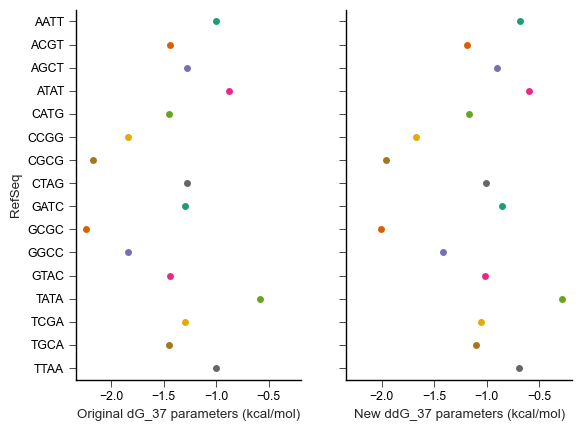

In [15]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
palette = 'Dark2'
sns.stripplot(data=df, orient='h', y='RefSeq', x='old', ax=ax[0], palette=palette)
ax[0].set_xlabel('Original dG_37 parameters (kcal/mol)')
sns.stripplot(data=df, orient='h', y='RefSeq', x='new', ax=ax[1], palette=palette)
ax[1].set_xlabel('New ddG_37 parameters (kcal/mol)')
ax[1].set_ylabel('')
util.beutify_all_ax(ax, x_locator=.5)

In [17]:
lr.metrics

{'rsqr': -4.067551803418677,
 'rmse': 3.2509699459762755,
 'mae': 3.149582435374231,
 'dof': 2003,
 'chisq': nan,
 'redchi': nan}

In [20]:
val_df = modeling.make_model_validation_df(arr4fit, sodium=1.0, model='nupack', model_param_file='./data/models/dna04.json')

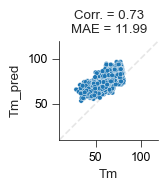

In [24]:
modeling.plot_validation_result(val_df, 'Tm')

<Axes: ylabel='Count'>

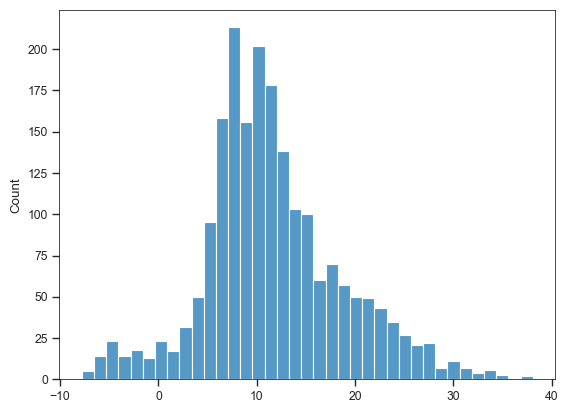

In [26]:
sns.histplot(val_df.Tm_pred - val_df.Tm)

In [27]:
np.median(val_df.Tm_pred - val_df.Tm)

10.677383727087772

In [1]:
import nupack

In [3]:
nupack.constants.water_molarity(T=273)

55.49938103282031